In [7]:
import dill
import codecs
import pyautogui
import time
import pyperclip
from pyperiscope import Scope
from pyperiscope import Pilot

## Overview
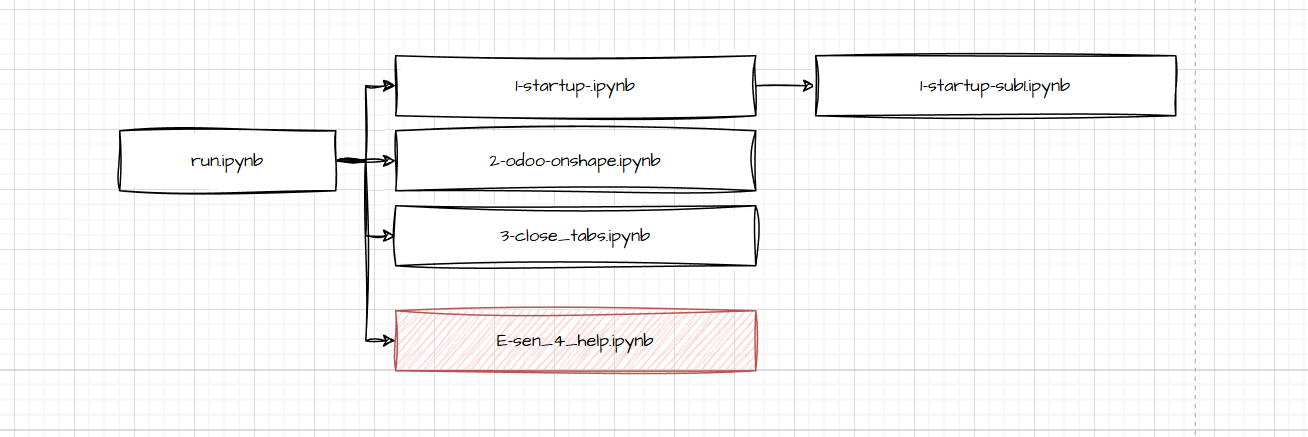

### 1. Startup
* This script open odoo and onshape windows.

### 2. Automation (keeps looping untill all products are done) 
* Then looks for products in odoo in "wip" category, takes the name and dimensions from "Iternal Notes" box (dimensions must be in 000x000x000 format and nothing else, throws an error)
* Now it creates the same name project in onshape and makes the stock block based on the dimensions from Intrernal Notes box
* We take the web address for the onshape product and clena it
* Go back to odoo and add the web link at the end of internal notes,
* Set product category to "All"

### 3. Cleanup
* close the onshape and odoo windows

# 0. Run script startup
If on pyperiscope tab is open start the workflow by running startup (do one time things to start automation, like open software, login if applicaple etc)

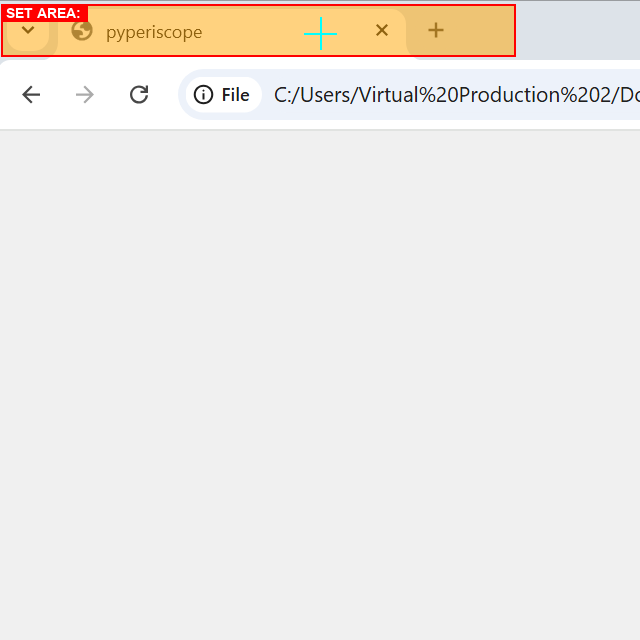

In [8]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASV0HYAAAAAAAB9lCiMBGFyZWGUWCQYAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBZ0lBQUFBMENBSUFBQUIzbThjQ0FBQVI0VWxFUVZSNG5PMmRlMUJjMTMzSGYrZmNmY0ErZWNjSVZrSVdqU1ZubE1oYW80UkdyTk0yVFYzVlZpU3ZwQUdNbUtCMjZsSjUxcTFIeXJwVDZuL014TVoyVk16RXMxRm1VbVhvVnVnQkZrR3U2MWp0YUlROG9vV3U0c2F4SGMxZ0MydEJLNG4zd2dMN3VPZjBqNE52cm1FRnU4cytXRGlma1hidTNudnVPVDh1MHU5N3p1Lzh6ajNvVS9kZDRIQTRITTU2QmFmYUFBNkh3K0drRWk0REhBNkhzNjdoTXNEaGNEanJHaTRESEE2SHM2NVJSRlVhWTZ6SlVHV3FWU3FsSUFoWXdCZ2h0T3hkbEZKUkpDSWhnV0JvWmk0dzZ3OFNRbUkxZUduRGxFcWxRaEd4WVJ3T1o3WEIzRVdJa0VBZ05CY0l6c3o1Q2FISmJCOEFVUW9BZ05EODF5UzJuaHBRaEpsQ0dLRnNvOWFnMDZ6OGtWQUE3OVRNK0pRdkxyOWRacGhScDFsNVZSd09aeFV5TVRVejRmVVJHbjh4UUlBbzBBZzlQU3ZHYm9tN0pha2xJaG5RYXpOeUREcEJpR2NFU1JUSjZPVDA5TXpjU2lyUlpxcnpzdlVDNXFFdERtY3RJNHBrZUdKcVp0WWZ6MHBqN2VoVENtc3MxckM4QTgzU2EvS3pEZkhWQUFBUUJGeVFZMWhKTHo3Ym9QMUtycEZyQUllejVoRUUvRUN1TVVzZmwwRS9BdGFmajlXVkl3UVVZRVZWckRLV21Sdkl6ekhvTlJtSmF6NDNTNmRRNE5HSjZXaHZ6TXZTRzNTWmlUQ0p3K0dzVG5LTU9rR0l4VjFJSUVDVVVrQXI5ZDlvL2k4RkJHc2dSTFJVVjlxbzB5UlVBNlJXb2gwVEdQVWFyZ0Vjempva0JuZnhleEFRU3VQYmc2ZUVyb0VBMFgxbElGT3R5czNTSmNlSTNDeGRab1lxd3NLWkdhcGNZNUlNNDNBNHE0M2NMRjJtT2xKM0lZZlMrTHRzaEZEY3BTWDVoSmNCaEZCQmppR1pkaFJrR3lKSjhVeStZUndPWjdWUmtCT1J1NUJBODU4SjhkYUlKWmltc3hLRWx3R2pMalB1YzhKTEl3allvRjArem1QVWFmaWNNSWV6emhFRWJJd21MSnpvNkQwQ1NFQTZhL0s0bnd5a0lBMC9ralNBcUg3M0VrdXNWb3Y3UWpZT2g1TUVWdHRTb1hRZURJVExGRktybEVrZUNqQUVBYXRWU244Z2VMOENNUmhHS1VVSVlZeW5mYjRQUHZqTnhPUWtFMjJNd0dnMDd0anhkWjFXS3hWYm1ma2NEaWQ1Q0FKV3F4VCtRR2pwWWdpQUFFMVFPR2dCRkNnR2xJNmpnakF5b00xVUo5OE9xZWtsWkVBYjhUUXlnem4zU2U5aysxdGRuOTBjR0JxNnJWWm5DQW9CQVJMRlVDQVErTXE3QmFWYkhqencxRjZqd2NpVmdNTkpMelFaNm1WbGdDWnNTbUF4S0QwMUFNTEtRSVpLbVh3N0ltbGFyWTdDTU9iVy8vdC8rdjcxMzg3TXpzMHBGRXFWU2swcHlWUnJBTUhzTEtHVTNyMTc3OTY5NGV2WFB6ajhkT1czdmxuR2xZRERTU09XOTFRSVVVS1MrWithVW9vUVRydWxCR0ZrSUNVUm9VaWFWa1JzR0NFVVkvVHVyeTZkNitna2xDb0VvYmlvMEx6emtRMkZEK1RuNXdrWW56blg4ZEVudjZPVVVrcDlzN00vKy9rdkppWW1Idit6UDJVM3h1Tkg0WEE0aVdWNVR4VlR4MjVpWXZ6OUs1Y0JvT0k3ZjJ3MFprVjFMMEpwdVp3c25BeWtMaFZuNmFZVmdoQkpKWlJTakZGdjMvV096b3NBZ0JIYXQvY3Z2dk5ZQlpzR0FJQnBuMjlrZEpSK0FRSkFDSFYwWHN6SnlkMVZ0cE9QQ1RpY3RDQkNoeEF0a3hQajcxenNCSUN2NzNna1dobElVOEs0M1JSMmg1ZHVPa0x2akJDYTlIcFB0VHBGVVJTdzhEZC9mZVNKUFkvcnROcFFLRFR0ODNWZGZPZEU4MCtHYm50Q29SQWhoQkJDS1JWRk1SUUtuV3AxVG5xOVhBTTRuUGd5TkRSMDhPREIvdjcreFpmNisvc1BIanc0TWpJU1E3Vjg0QjR2MWxvT3ZrZ0lBTHpWZWRIdjkyT012NzkzejY1SHpjemRLeFNLOXk3OTE3Ly82dEpuTndkWStoRElwSVZTR2dnRzNycHdVYW9ramZCNFBDVWxKUTBORGFrMmhNTUp3L1BQUDkvWDExZFpXYmxBQ2ZyNyt5c3JLL3Y2K213Mlc2cHM0OERLWmFDdnI2K3Vyczd2RC9NQ1dML2ZYMWRYMTlmWHQ4SW1vZ0lqTk9tZC9PUjNONVJLMWFhTnB1OTk5MDhJSWN6cCsyWjgvL2ViM3hKQ01FYno0U0NtQWV3RElhRG9vNDgvbWZST1lqNGc0SERpeCt1dnYxNWNYRHd5TWxKVlZTVXBRWDkvZjFWVjFjaklTSEZ4Y1ZOVFU5d2JwYWxiMEpYQ3BtTmpSVEp3NDhhTnc0Y1BYNzU4ZWJFU3pNM04xZFhWWGI1OHViYTI5c2FOR3lzek1nb1FRaDkrK01uSTZCaWxaT2ZPSFNxVlVsb2dGZ2dFUlVLSUtDb0VCY2FZS1FIQS9Jd09wWlFRY1d4aS9NTVBQMDY3dUZCaFllSEF3RUJqWTJPcURlRnd3bUF5bWRyYTJvcUxpNGVIaDVrU01BMFlIaDR1TGk1dWEyc3ptVXh4YnpTRi80dlR6b0ZFdHdubEFyWnMyVkpSVVhIcDBxVnIxNjdWMWRXZE9uVktyVllEZ04vdlAzTGt5TFZyMXdCZzkrN2RXN1pzaVkreGtUSHBuVlFxbElTRWlqZHNBQUNGWXY1bk5PajBUMWNlbXA2ZVZpbVZnN2R2Ly9MaU82R1FsSFJNQ2FFSVk1VlNOVDR4bVV4ck9aejFBRk9DcDU1NmFuaDQrTkNoUTVUUzhmSHh4R2tBQUVTNHJjem82TWpZbDJjbTduaHVzNE5ibjMvdW4vdFM3elluTHk4M055K09KcTRTVmpRYVVDZ1VKMCtlM0xObkR3QXdKUWdFQWl3V3hEUmd6NTQ5SjArZWxCeHhjbURUQUhxOTNtRFFCNE5Cdjk4ZkRBYURvUkFXOExhdFh5MTdkT2MzdnJIOThlOTl0eUEvVDZGazY5R1FJQ2dOZXIwbUk0T05FaUp2cTZHaG9hS2lBZ0JLWkxCTExwZXJwS1NrcTZ0TFh0N2hjTEFDWFYxZEpTVWxIbytudHJaV3V0SGxjc2tMc3hvWXRiVzEwbm5wWG5hSk5WRlNVdUp3T0tReThtcmw1K1Yxc2tyWWVhazJlWjN5UzExZFhjejR4WFV5Rmo4QkRrY09VNEtjbkp5eHNiSHg4ZkhzN094RWFrQ2tML25wZWIvN24xLzdrZnhQbS9NWDdOTHAxbjlaY0tubi9lN0kybzdSNWxTeFVnZU5NWDd6elRkZmVPR0ZzMmZQWHJ0MjdabG5uZ2tHZzB3REtpc3JYMzc1NWVTUGp3aWhoQkN2ZCtwSFRUK1dUaXFWeXR5Y25DMWJOditSWmZlbVRSc3h4ajg0L0hUbnhiZEhSc2NRb09MaW9rZk5qMXpvN0pyMnpjWmdiMGxKeWNEQUFEdG0vbmRnWU1Cc05sc3NsdmIyOXIxNzkwb2xUNTgrYmJmYnBhK0hEaDFxYm01dWJXMEZBSWZEWWJWYU96bzZ6R1l6QUhSMWRkbHNOdWxyUlVWRmJXMHRLeW5kMjlQVFUxaFl1TmllaW9xS3paczNNNU04SGs5blp5Yzc3M0E0bXBxYXBEb2xWODdhYW1scFlhYTZYQzZyMWRyYjJ5dVBNcjMyMm12VjFkV3NUbFlBQU9ycjYxa1Q1ZVhsZHJ1ZGZXMW9hSkEvRUE1SFFxMVdTOTJzUkh1R3BDMGVYZ1BFb1orT0VIcmxsVmNvcGVmT25idDgrVEk3V1ZOVDg5SkxMNlVrUmliRi9ZUEJrSlJTRmdxRkJvZUdQSGZ2WHIvK3dmTi85MnpKcG8ybHBROGUrM3VieitjTGhVSkdvL0czSDMweU1qb21DQW9jNWJJSnQ5dmQwZEVoZlcxdGJXV2Q1ZnI2K2dNSER0aHNOby9IdzV5MXkrVnl1OTM3OXUyVENsZFhWek9QREFEMTlmVTlQVDF2dlBFRzgvVTJtODF1dDB0WG01dWJyVmFyeStXU3pody9manlzQmpDVGpoOC96bzRMQ3d1WmQzYTVYRTFOVFMwdExmSVcyUUZyUzVJcnM5bmMwdEppczltT0hqMHFOYkY1ODJhcHZObHN0dHZ0VFUxTjdJemRicmRZTE5MVnhzWkdwOVBKbmtCVVQ1S3p0bkc3M1ZWVlZXd2NnQkFhR3h1cnFxcEs0SUFnTXQ5VHZ0dnkwTmFINVdmdWVHNnpBY0dmUC9IOXJkdStKcitVa3hkWlJDamRCQ2crQ2FNSW9WZGZmYldtcG9aOVBYTGtTR05qWTZybVNiS3pqSUdBWHhSRmhJREtBQUJLeEpuWjJhNjMvd01BUkVJSUlWcXQxbUF3aUtMNCtTMDNRamdZQ2hvTnhxaWFNNWxNa21ObFdDeVdvYUVoQUdDT1ZlcU1YN2h3d1dLeHlIMjNYQklBb0x5OC9PYk5td0RBb2tQeXE2d0pWaTJqckt4c0NaT1kvTWhQOXZiMm1rd20rZENFc2JndHFYSjVsdGVCQXdma0JYYnQyZ1VBckludTd1NEZWNlVud09Fd21BWU1EZzdtNStlZlAzLyszTGx6K2ZuNWc0T0RWVlZWYnJjN2hZYmw1dWI5d1VOYjVYODJmaEhWZktCd3c0SkxhM0ppQU9LN2JxQ3hzZkhvMGFQUFB2dnNpeSsrR01kcW80SlN1bjM3d3puWjJZS2dXS0JEVEFzUXhuZnUzQTBHUXdMR0NDRlJGQ21sb2tpdS8vb0RqSEZlYnM3MjdkdmltTzlWVTFQVDA5UERqcDFPNXdKM2VUK1lEeTB2TDE4UWNJL1F0MTY5ZXRWaXNiRGJwY2pQL2U0TmUvNSs0NHpGTUNXdzJXeHlVN3U3dTIvZHVoVmhEWncxajF3RDJ0cmFTa3RMUzB0TDI5cmFFcW9FUEdFMGN1SThlU3ZGSWxJRm9kUm9NSDd0NFczdjkvVElmeG1VVWl3SWdrSUlCVU5Zd0NGUlZDb1Y3RDFRR0tQMy92Tzl6Mis1Q1NIYnRqNWtOQmhGUW9RVkRHVnUzcnk1Y2VOR2RyeC8vMzZyMWVyeGVGalBlbkZuWEk3a2tZdUtpZ0RnZnFIL1NHQ1JKUmIwSHhvYVdpS1hsTFcxZ0FVamlTVk1aUlpLOHdvY3ptS09IVHMyT0RpWWw1ZkhOSUNkWkVwUVdWazVPRGg0N05peHMyZlB4cmRSbmpBYU9XdHRGVEY3SzlIK2ZVK29sQ3I1THdOamJQbjJILzdUUC96d3hYLzg0ZDgrODFkS2hVSVVSWXd4eHFqM2Y2Ly9zdXNkUW9oYXJYNXEzNU1RNVZ1VjNHNjMzR215Q1lEOSsvZXpyMmF6MldReWRYWjJ0cmUzeXllSEdRdlcxam1kenVycWFnRFlzR0hENHFzeHNIZnYzcHFhbWl0WHJnREEvdjM3M1c3M2dtUWsrQ0xjSkVXdTVJYkpQWHR2YjYrOFFIdDd1eFRnTXBsTUM2NXlPSEpPbkRoUlZsWjI1c3daU1FNWXBhV2xaODZjMmJGang0a1RKMUpsR3dmQ3lrQUtSelNFeEtGcFNtbVcwVmhYVzZOUUtBUkJZR0tBTWQ1UStNQkdVL0hta2swYkNoOVFLQVJCRUtaOXZyZmZlZmVuUC91NVNFUkJFT3BxYTR3R1F3dy8vcUZEaDZSanE5VnFzVmprc3dYVjFkV25UNS91N3U1ZUVIOEhBSGtFbjZXRXNtblZ3c0pDdTkxdXM5bmtYcHRscGk2THgrT1J2MVhpeXBVcmp6MzJHQUN3ekNVMk5HR1hIQTRITzJienZWS1NxTXZsWXBQRzhtcWRUcWRVd09Gd2RIZDNQL2ZjYyt4cmMzTXpteE9XQ3RmVzFpNDdudUNzSDRxS2lzNmZQNzlBQXhpbHBhV2RuWjFoaDZTY3BCRW1LQ1FTa3FCWDl5MUxYRjdtZ3hBaWhPNHEyemsyTm5xdW81TUNDSUlBQUI5KzlIRkJRVjVCZmg0RkdCa2VIZkxjY1YzLzlTMzNJS0VVSTJUZDkrU3VzcDB4dkdqYVpESTFOemRMeWZJMU5UVUxJakQxOWZWTlRVMExKb2NaUFQwOTVlWGxVajN5SkV1bUJ5d3ZreUhQUjFxQ3dzSkNwOVBwZERvWDI5UGEydXB3T09RdHNsYnE2K3QzN2RwbHRWcWxWN3RJU2FVU0xTMHQ3ZTN0VWdGNXdNcHNObmQwZEZpdFZ1bVZBSGE3UGVad0ZvY1RQMkxaS3Q2WWxiM255WDBBVUZTY3FEVU5xdzMwcWZ2dWdsTkZCZG5xRk8wOE0rY1AzaDRldjkvVkI0c0xJcTlLdnUzTW5OL1A1b2RWU29WZXI2T1VUazM3MkwrUFVDaVltWkVSODdZekRRME5WNjVjdVhyMTZoSmxXRnI5Z3VnNWk5cXZKUHFmTk1MYXorR3NCajRidkxmVTVkUzgvRC85dGh3SU14cndCME9wa29GQWFKa3Q1U0lISVVRcC9kWTN5N1p0KzJyN1cxMzluMzUyNTg1ZFFIaG1MZ0JBRWNKKy8xeFIwWVlITjVja2VoTktGbmJuUHBURFNUYXA4Y1pwcGdFUVZnWm1adjBHYldieVRXRk54N0UycGdSR2cvRXZmM0NZYlVrLzZmV3k2UWVFSUNzcFc5SjdQQjYyYUNzUmxYTTRuR1ZBQUlSQ2NsSjNLSVUwM0lFU3dzckFyRCtZa3IwWUNhR3ova0I4NjJUT25SQ2kwMnAzZjdzOFhLTUVZNXdJRFdDeEZBQ1FMOURsY0RoSkpaYlpnVmhKengwb0llemNBQURrR0hWWmVrMlNUWm1ZbWhtYm5GNmlRRlJ6QXh3T1o4Mnp6TnpBUElnQ1Rid1dVRUE0MGhmYXJUTENKOGhQZUgxSjNvRkxKR1RDNjF1aXdQTGJUM000bkhWR1pFdDhLRTd3aUlCU0FFaFhEWUQ3eVFDaDlONllONWwyM0J2MWtpVWZZcXB5V0RrY3pxb2x3dDRoQlNwOXhoMEtGR05JMDNBUTQ3NFBjWFl1c0hTSUpvNk1Ua3d2T3l1ZzRLTUJEb2Z6WmFKeUN3aHdJbHcxQXB5Mnc0QjVsbnFJRTFNelU3N1pSRnZnOWMxT1RzOHNXMHlsVE9yZU5Sd09aL1dqaWk2MW5TSkFjWFhaTkIxWENTeG1HUzBkSHA4YVRlU1lZR1JpYW1SOEtwS1NtZ3hWNHN6Z2NEanBpRVlkclZ1Z0NBR2dsUWFJNkx3QXJBVU5nRWplTURvNU5STUtpYmxaK3ZpR1pVSWhjWFJ5MmhmWlFnRUI0MVN0YU9Od09LdVdETFVTWXhUMXU4Z29ZTUFVU0l6SnBCUXd3Z21hYVVnSkVVVmFmTE4rMzZ4ZnI4MHc2RFRxRlFkbi9NR1FkM3BteWpjWCtTMWFqWHFGalhJNG5EV0pMalBERzMzc2VyNDdQOStiajNCeEFaVzJ0bHhMR2dCUjdUY3c1WnViOHMwSkdHc3lWV3FsVXFWVUtKVkNKQWxiSWlIQm9CZ0lodnpCNE14c0lJWlUxQ3k5TnRwYk9Cek9laURMb0lsQkJ1YVI5a1VHTmpTZzBzZjhWU1FWUXZDRkFxdzlvdTdhaTRSTStlYW1JSXErL0FveDZqVThUWWpENFlSRklRaEduU2FTTkpNbCtNTHovLzVEZHBCbWU4akV3R3AzcnhpajdLU3ZaK1p3T0dsRXRrR0QwMjNEcjFYRmFwZUJnaHdqam1Zdk1BNkhzOTdBR09mbkdGSnRSUnF6cWoxc1hyYWU1NGx5T0p4bDBXYXE4N0wxcWJZaVhWbTlNcENYcFV2Vis2NDVIRTdhWWRCbTVtYnBVbTFGV3ZMLzNsM0x3dUkvbUc4QUFBQUFTVVZPUks1Q1lJST2UjA1jbGVhbl9wcmV2aWV3lFjEXQAAaVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQW9BQUFBS0FDQUlBQUFDRHIxNTBBQUJHR2tsRVFWUjRuTzNkZTF6VWRiNzQ4ZmQzQm1id0FxaGdyWUl0cUdYdUxtWWlscVlrbG1tbFZxS3UxL0p5TnRlMnpEdTJrbTFlS2pSTHJjMmpuWXJ5dWdybUpVOWVPdUdsOUNqU1VUeXI2UytEc3dKbVlDbUlPc0RNOS9mSEY4Y0JCaGl1SDZ6WDg3SGJRMmErODUwUHc4eTg1bnNkYmVWL2ZDUUFBS0IrYVdmUFhWQTlCZ0FBZm5WTXFnY0FBTUN2RVFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtPQlYxUnVZVEtiR1BwWkdWb3ZGMjJ3Mm04d21rNlpwbGQ1SzEzVzczV0YzT0FvS2k2NWVMN2htSzNRNEhOVWFjS1VEOC9iMjl2THllR0FBR2hyajdhTEk0U2dvS0xwZVVIajF1czNoME92ei9rVTBYUmNSMGJUaUgrdngzdkVyVW9VVGNaZzByYmwvRTcrbWpXditaTlJGY3ZPdS9weVhYeXV2SzJOZy9rMGIxM3hXQUJxZ1MzbFhMK1htTy9UYXo3QW1taTY2aDQwMUpqTnVVdXNqd2ErUXB3SDJiZUxUd3ErcDJWeWJxNnp0ZHNmRnkxZXVYTDFlazVrMGFXUU5iTzVyTnJFdUhmZ2xzOXNkMlpmeXJsNnoxZVpNcTd0d3ErdkMralhVbkVmZGF1YmJ1R1Z6djlxdHI0aVl6YWJiV3ZqVlpNbTF1VitUMndQOHFTL3dpMmMybTM0VDROL010MVpXZEdsaUxNTldONkthSnJwSWpXWUJlTElOdUdVTFA5L0dQblUzZ29CbVRiMjhUQmN2WGFucURRT2IrZm8xYlZRWFF3TFFNTFh3YjJvMlYrZnR3a2tUVGRkMTBXcGFUcTM0Lzdwb3dncHBWRThseTQ3K1RSdlhhWDJkOTFMVjVXQi8zOGJVRi9nVnFzYmJ4VTJhT0hTOWRwZGFkWWZPNm1oVVQwVUJibVMxQkRScldqL2pDR2pXdEpHUHhjT0pHL2xZQXZ6cmFXQUFHcHFBWmswYldUMTl1M0NsNjdVZlMwM1RhajNxK0pVb044Q2FwdDNXd3E4K2gzSmJjejlQRGh5cS80RUJhR2h1YStIUjI0V1RWdnpmT3Vta1poeTJSSU5SUmVVRzJMOXBvMXJmNjZwaVpyUEpyMG5sYTVYOW16Wm1yeXZnVjg1c052bFhaU05VWFcrbDFVVHE0Q0FwL01KVkVHQUZoOVY2c290amxWNTFUaFdjOTZQV1R3a0NvQjQwdEVQL1dRQkdWYm5mQzlwcThhN254VitEMld5eVdyeHRCWVhsVFZDTmdlbTZybW1heVdTNmtwOS83RmpxcGN1WGpRK3FKazM4L2YwN2QrN1V0RWtUNTJRMUd6NkErbU0ybTZ3V0wxdEJVY1dUYVNJTzBldG81WE1wdXVnbTBWZ1Nob2ZjQjdoSkkyczlqOFAxcmlzSWNCT1BkOVF5R0ZtOW5IczVZZk8yNzlQU016T3pyRllmczVkWkU4MXVMeW9vS0xoOTUyM3QyN1VkTW5pUXY1OC9EUVp1TFkxOXJKVUdXSyt6VGI5bGFkUVhWZUUrd0Q0Vzczb2VoNGQzYmJWV1lXQkdVUC83Y1BMcXRSdXVYYi91NWVWdHNWaDEzZEhJMmxnMHVYYk5vZXY2aFFzLy92aGo5amZmSEJzemF2ajk5MFhRWU9BV1V2azdsYWJwRGtkOXZxaDFYZGMwRTRjR3d4UHVBNnhrL2JNbmQrM2w4Y0FjRHQxazBuYnUyck14Y1l0RDE3M001dUNnVnVGZDdtM2Q2amN0V3dhYVRhWU5HeFAvZWVwYlhkZDFYYysvZG0zVkIvR1hMbDNxMzYrdmNjUGErRlVBMUszSzM2bXE5Wkg2MHFXZnY5cVhKQ0s5ZXZmeDkyOVdwZHRxR2lmbWdLZktDYkM2M1l3cnZtc3ZzOW1UbWVpNmJqSnBSNUsvU2R5eVhVUk1tdmJrb01kN1A5akwyTndySWxmeTgzTXVYdFJ2MEVRMFRVdmNzcjFGaTRCdUVWMVlEZ1p1Q1I2K0lWVFY1VXMvLytmMkxTTFNxZk85VlEwdzREbjN0Vk80Q0ZqeFhYdllSVTNUTHVmbWZ2VEpHcnZkYmphWi8venMrQUdQOVcvYXBFbFJVZEdWL1B4dDIvL3pyYVh2Wm1hZEx5b3FjamdjRG9kRDEzVzczVjVVVlBUUkoyc3U1K1pTWDZCMlpXWm1EaDA2OUx2dnZpdDcxWGZmZlRkMDZOQ2NuSnhxekphVlZiaWwvUUlQcUxVN0hDS3llY3QybTgxbU1wbWVHUFJZdDY3aFJtaTl2THgyNy9tdkhidjJmSitXYnV3YUxTNVIxM1c5b0xCZzg2ZmJuVE81aFp3L2Z6NGtKQ1EyTmxiMVFBQTNwazJibHB5Y1BIejQ4RklOL3U2Nzc0WVBINTZjbkR4NThtUlZZd05VcVlVQUp5Y25qeHMzem1aejh6VmhOcHR0M0xoeHljbkpOYjhYejVrMDdYTHU1VlBmbnZiMnR2ejJqamFQUFB5UXcrRXdjcHQvTmY5NDZ2ODZIQTZUU1N0ZStXelUxL2lQcG9tdS9mUGtxY3U1bDAwc0JBTzE1ODAzM3d3T0RzN0p5Umt4WW9TendkOTk5OTJJRVNOeWNuS0NnNFBqNHVKcS9VNTFkYWZHVUhqWHVJWFVOTUNuVDU4ZU0yWk1VbEpTMlFaZnYzNTkzTGh4U1VsSlR6Lzk5T25UcDJ0NFI1N1ROTzNFaVZNNUYzL1NkVWVYTHAwdEZtL25xVFlLQ2dydERvZkRidmN5ZTVsTUpxUEJJc1g3VE9pNjduRFlmN3IwODRrVEoyKzV0ZEN0V3JWS1QwOWZzR0NCNm9FQWJyUnAwMmI5K3ZYQndjSFoyZGxHZzQzNlptZG5Cd2NIcjErL3ZrMmJOclYrcHdwZnhiZmNHd2lVcVB6ckNDdldybDI3WHIxNjdkbXo1K0RCZytQR2pmdm9vNCtzVnF1STJHeTI4ZVBISHp4NFVFUjY5dXpacmwyN1doaXN4eTduWHZiMjhuWTRpb0pidHhZUkw2L2lYOU92cWUrbzRjT3VYTGxpOGZiT3lNcmF1djAvaTRxY0J4SHFEb2V1bVV3V2I4dlBseTdYNTJpQlh3T2p3WU1IRDg3T3poNDJiSml1NnovLy9IUGQxVmRFaW84QnJzekZpemsvbGR3Qy9jUDVMT01mLy9xLy83TmRMN0ZjMFNJd01DQWdzQmFIaUYrem1pNEJlM2w1clZ5NThySEhIaE1SbzhFRkJRWEdtbWVqdm84OTl0aktsU3VkQ2F3Znh1WmVYMTlmUHovZndzSkNtODFXV0ZoWVdGUmtNcHM2M24xWFJOY3U5OXdUMXYrUmgyOXJHZWpsYlp6WlF6T2J2ZjE4ZlJ2NytCaEx4cDdmVjJ4c2JLOWV2VVFreElWeFZVcEtTa2hJeUxadDIxeW5YN0ZpaFRIQnRtM2JRa0pDenA4Ly8vVFRUenR2bUpLUzRqcXhNUWZEMDA4LzdiemNlVnZqS3VNdVFrSkNWcXhZNFp6R2RiYXVsN3ZPMDVpSmNibHpicTd6ZEwxcTI3WnR4dURMenROUTloRUFYQmtOYnRHaXhVOC8vZlR6eno4M2I5NjhMdXZyNmNtWkQzMjEvKzNGcjduK2IvMmFlT09xZFo5OFdPcXFRMS90OSt5K3F6bG0vS3JVUWhkTkp0UGYvLzczMmJObi8rTWYvemg0OE9ERWlSTUxDd3VOK2c0ZlB2ejExMSt2LzdVeERvZnVjRGh5Yy9OZWkxdml2TkRiMnp1Z1JZdDI3VUtqSW52KzlyZDNtRXltc1dOR2JkbitXYzdGbnpUUmdvT0R1b2JmKyttV2JWZnlyMVZqdkNFaEllbnA2Y2EvamZLbHA2ZUhoNGRIUmtZbUpDUU1HalRJT2VXNmRldGlZbUtjUHc0Yk5tenAwcVdmZlBLSmlLeFlzU0k2T2pveE1URThQRnhFdG0zYk5ubnlaT2VQdlhyMWV2cnBwNDBwbmJjOWRPaFFxMWF0eW82blY2OWVvYUdoeHBET256Ky9aY3NXNC9JVksxYkV4Y1U1NSttTXFIRmZ5NWN2TjRhYWtwSVNIUjE5NU1nUjEzWGFpeGN2SGpseXBERlBZd0lSbVRScGtuRVgzYnQzajRtSk1YNk1qWTExZlVBQUo2dlY2dnlBVzlmdkRQVjJBaXlnZW1wbndWVFR0RGZlZUVQWDlZMGJOeVlsSlJrWGpoNDlldjc4K1VxMmhUaTM3eFlXRmprUFZDZ3FLc3JJekR4LzRjSTMzeHliTnVYNWtOL2UwYjU5MnhsVEorZm41eGNWRmZuNysvL3ZQMC9sWFB6SmJQWXlWZkV3NkhQbnppVW1KanAvL09TVFQ0d0Z4RW1USmcwWk1tVHk1TW5uejU4M01wbVNrbkx1M0xrbm4zelNPZkhJa1NPTkZvcklwRW1URGgwNnRHelpNcU95a3lkUGpvbUpjVjY3ZE9uUzZPam9sSlFVNXlVelo4NTBXMTlqU0RObnpqVCszYXBWSzZPTEtTa3BjWEZ4eTVjdmQ3MUg0eC9HZlRrL0tJU0hoeTlmdm56eTVNbC8rY3RmbkhjUkdocnFuRDQ4UER3bUppWXVMczY0SkNZbUpqSXkwbm50Z2dVTDFxeFpZendDVlhvazhjdDI3dHk1RVNOR0dNdSttcWI5OU5OUEkwYU1xTU9GWU0vZWU3cjNqT3h3OSs5Y0wvbmhmSmF4RVB6b2dDZnU3dmg3MTZ0YUJIcTIvcG4wd3dPMWRoaVNwbW1MRmkwYVBYcTA4ZVA0OGVNWExGaWdhaytFNXMzOEN3cHNkcnRkMDBSM0lTSzZ3MzcxMnJWdG4zMHVJbmFIdytGd05HblN4TS9QejI2My85Ky96bW1hcWJDbzBOL1B2MHAzMTZaTkcyZlNESkdSa1ptWm1TSmlKTTI1QVBycHA1OUdSa2E2VnRNMXhpTFN2WHYzdExRMEVUSFdSYnRlYTl5Rk1WdERSRVJFQlVNeXd1OTY0WkVqUjlxMGFlTzZPRzRvZTEvT21idnV3VDVreUJEWENicDE2eVlpeGwzczM3Ky8xTFhPUndBd0dQWE55TWhvMmJMbHBrMmJObTdjMkxKbHk0eU1qQkVqUnB3N2QwN2h3QUlDQXUvc2NMZnIvKzY0c1EzbE42MWFsN3FLRGNDb1JiVjhIUENDQlF2KzhwZS9QUC84ODNQbnpxM2RPWHRPMS9Xd3NOKzFhTjdjYlBZcTlRbkFxTEJtTXYzd3c0WEN3aUt6eWFScG10MXUxM1hkYm5kODh6L0hUQ1pUWUVDTHNMQ090WGdVd2VqUm93OGRPbVQ4ZTgyYU5hVkNWUjZqWHQyN2R5KzFZZFhEcWgwNGNDQXlNdEs0dVhNOWMzbTNkWHQ1ZWN2V1pSa05uang1c3V0UTkrL2YvNjkvL2N2RE9lQVh6N1crNjlldmI5KytmZnYyN2RldlgxK25EZVl3SkRSd3RiOXZsSFBOcHlvT1hmZjM4Ly85N3pwK2RlaVE2OHRBMTNXVDJXejJNaGNWRnBuTXBpSzczZHZieXpoenVzbWs3ZjVpOS8vOTY1ekQ0ZWg0ZHdkL1AzKzd3Mkd1d2VKN1dscmFIWGZjWWZ6N3FhZWVpbzZPUG4vK3ZMRTBXWFlCMUpXemhVRkJRU0pTM2laZVR4anJzWTJOdTVtWm1SVWNvV1RjVnltbGxwNHJHS294UXVmMlk2Q3NHVE5tWkdSa0JBWUdHdlUxTGpRYVBIejQ4SXlNakJrelp2empILytvM1R2bE1DUTBjTC9BTTJFWlo1Tis2c2tCRm0rTDY4dkFaREpGUHREajVaZG16WjB6NjdtSi8rYnQ1V1czMjAwbWs4bWtIVG42emRadC8rbHdPS3hXNitBbkIwb1Z6NFo5N3R3NTExd1pHM3FmZXVvcDQ4Znc4UEEyYmRwczJiSWxJU0hCZGZjclE2bXpsS3haczJia3lKRWkwcnAxNjdMWFZzT2dRWU5Hang2OWI5OCtFWG5xcWFmT25UdFhha2RydWJGeTI3bWUzSFZncmswOWN1U0k2d1FKQ1FuTzFlbHQyclFwZFMzZzZxMjMzb3FJaU5pd1lZT3p2b2IyN2R0djJMQ2hjK2ZPYjczMWxxcXhBYXE0ejR6QzlTY09SeTNjdGE3cnpmejl4ejA5MnN2THkydzJHeGsybVV5dFcvM21qamJCb1NHL2JkM3FOMTVlWnJQWmZDVS8vN1AvM1BudnF6NndPK3htczNuYzA2UDkvZnlxOGVzUEd6Yk0rZS9vNk9qSXlFalhyY0lqUjQ1Y3QyN2QvdjM3UzIxbkZSSFhMYlhHZ1ViR2prdXRXcldLaVltWlBIbXlheStONDUwcWRmNzhlZGR6VXU3YnQrL0JCeDhVRVdPdmJHTngzTGhxeFlvVnhyK05QYXFjaHg2bHBLUVl1Mlc1em5iTm1qWE9DVmFzV0xGLy8vNFhYM3pSK0hIcDBxWEdYbGZPaVo5Kyt1bEtsNkh4NnhFVUZMUnAwNlpTOVRXMGI5OSt5NVl0YmxmREFMOXM3bGRCMngyT092cWFrVXJWeWttWU5VMXpPUFJ1RVYxKyt1bml4c1F0dW9qWmJCYVJFLzg4ZWR0dGdiZTFETlJGY3JJdlpwNy9JZVdiLy9uWHVReUhycHMwTGZySmdkMGl1bFRqNndqYnRHbXpkT2xTNThHdm8wZVBMclcrZDlLa1NYRnhjYVYydnpJY09uU29lL2Z1enZtNEhycGpsTmc0MnNmZ3VxOTFCVnExYXJWbXpabzFhOWFVSGM4bm4zeXlZc1VLMTNzMDdtWFNwRW5kdW5XTGpvNTJucExYZWFpUzAvTGx5eE1TRXB3VHVLNGVEdzhQVDB4TWpJNk9kcDVRTUNZbXB0b3J6NEhhNDlHNU9FcnhiOWI4c1lGUGlraFFjRjBkb3d5SWlIYjIzSVd5bHdiZDF0eGE2VGRkMTQzcnRzS3M3Si9MdTdadDhHMmV6OG80MWZOL0gwNWV2WGJEZFp2TjJBUEw0dTNsNjl0VTEvVzhLL25HSzdPb3FMQ1JqOCtZVWNQdnZ5K2lHbDlFR0JzYnUyL2Z2Z01IRGxRd2pYR1liS210cE1iVzJacHM1YTAzYnNjUE5BVGZaL3hZMGRWcXZweVhyd1NHUjl3dkFkc0tpMVFGdU9EbXVTRnJTdE0wWGRmdnZ5K2lZOGU3RWpadisrN3M5ei84Y0VFMDA5WHJCU0s2cHBsc3R1dEJRYTNiaG9ZTUdUekkzOCsvN3I0RzJOaThTcjJBK3FhbWc5UVhIbkVmNEt2WGJINU5HdFh6VUp4M1hZdHpNeHJzNytjL1lleVlLL241eDQ2bFhzN05OVFl6YTVvMDgvZnYzTGxUMHlaTjVNYmljaTNldGRQNTgrZU4wMS9VeGN3QlZFSVRjZWhTUDdzbDY3cG9KZ0lNRDdrUDhEVmJZVFUyaGRhY3c2RmZzeFhVN2p5TnJEb2NqcVpObXZSOG9MdTdPM1dZVEthNnFLK3g1bFpFWEU4eUJhQmVWV2NyY0hWcHJIeEdGYmpmQml3aUxmeWJOdk50WE0ranVaUjM5YWZMVnlxWW9FcmJnQUg4NGxXeURiaVlwb3RlOXhYV1JUTjUraFVRUUFYSEFWL0t6YStWSFpJOVozYzRMdVhtVnpDQjJmd0xQR29aUUUxNGRzaSticXJqcFdCZEZ4SHFpNm9wOTducjBQVWZmOHF0ejZIOGVESFhVZUhUVjlXUlVRQWFMQTgvbCt1aU8vOWI2M1RSVFNaaDVUT3FxcUxuN3JYckJSV3ZFSzVGRnk5ZHFYVHJyeGRMd0FCS3F0TGJnaWFtdW9pa0ppWVdmVkVObFR4M0wrVmR6Y3UvVnRlRHlNMi9kdm5LMVVvbnMzalgvcG1yQWR6U0xGVTdZRkxYUkt2VldPb2M5WXRxcS96RFkvYlBlUmZyY2prNDUxSmV6czk1bmt6WjJNZFNkOE1BY0N0cWJLM3EyNEt1YVNKYVRWZEg2OFhwcGI2b1BvK1dLUy9uWFMwcXNnYzA4NjNkbGNCRlJmYUxsNi9rZTNiZ3I5bGtVblZ1RUFBTmxvL1YyMlRTcW53T2VWMU1ZdExGVWMxRGxIUXhhYVk2MnFLTVh3OVBWK3JtWDdQbFg3UDVOdkh4YTlyWVd1TlZ3YmJDb3R3clYvUHlyM3Qra3lhTnJUVzhVd0MvU0UwYitlUldmVXRaOFNKczhSS3Nod2NMMzdoSm5lM1BoVitWcXFVMEwvOTZYdjUxczhuVXVKSEY2dTF0OGZieTlqWjdjaGlBM2VFb0xMUVhGQmJaQ2d1dlhpdW94Z0ZPelh5YlZQVW1BSDRObXZrMXJrYUFpeFZuVk5QRVdCelduZjhwdmxaelRxVEpqZllDdGFJNnk3SjJoeU12LzNxZVZHSDV0WWI4ZlJ1ekN6UUF0N3pNWnYrbWpUM1prYk1DTjVwNzh6OHUvNmp2Y3dMaVYrSVdxSnJKcERXdjkzTnlBYmlGTlBkcmJLcWZzejBEdGVjV0NQQnRMZnhOSHAzc0JzQ3ZsTWxrYXRuQ1QvVW9nS3BwNkdFTGJPN0wwVWNBS3RXa2tUV3d1YS9xVVFCVjBLQURITmlzcWFwdlJRUnd5L0ZyMGlpZ1dWUFZvd0E4MVVEUExXVXlhYjhKYU9aajVjQmZBRlhnMzdTeHhjdnJ3aytYcTN4a01GRHZHdUlTY05QR1BzRzNCMUJmQU5YUXlNY1NmSHVMSm8xOVZBOEVxRVREV2dMMjlqSUhOdmR0Vk9Wenl3SEFUVjVtOCswdC9LNDE4Y241T2Erd3lLNTZPSUI3MnRsekYxU1BRVXdtcmJHUHRaSFY0dHVFRDYwQWFsTmUvdlZydG9LcjEyMnNsRVpEVTNvSjJHVFNtamJ5YWV4ajhmYjJNcHROSEZvSDRKYm0yOFNIVC9ab21HNEcyR3cyTld2YTJLOXBJNDNvQWdCUXg0b0QzTGlSOWJZV2ZpenZBZ0JRUDd4RXBKbHY0eGIrSER3SEFFRDlNZmsyOXFHK0FBRFVNMDNYMlRNUUFJRDYxaEJQeEFFQXdDOGVBUVlBUUFFQ0RBQ0FBZzNyVkpTNDFka2Rla0dSN25Eb0RsMTNPTVNoczQ4QkFMaEhnRkVMaXV4NlFaR2pvSkNUL1FHQXB3Z3dhcVNneUhIVlpuYzRWSThEQUc0MUJCalZWR2pYcjE2MzIxbm1CWUJxSWNDb2p2enJkbHNoaTcwQVVIMEVHRlhqMENYdmFoRUx2Z0JRUXdRWVZWQllwRis1VmtSN0FhRG1DREE4ZGMxbXYxYkFhbWNBcUIwRUdCNHBLSEpVV2wrelNmUDJNbm1ieGR1cndaM2d4YUhydGtLSDNTNEZSWFh5R1VJVFRSZUhydk50MmdBOHhaY3hvSEpGZGozM2FsRUZFNWcwclpIVlpQVnVjTjB0eSs3UXJ4VTRDbXB4RHpKTjB4MjZhRUo1QVZRSkFVWWxITHBjemk4czcybWlhZUxqYmZLeG1HK3RKYjhpdTM3VlppK3kxL1RKcjRtbUM2OGdBTlZCZ0ZHSnZLdEZoZVdFU3RPa2lZL1owdkJXT0h0QzErWEtkWHRoemRaSTY2eDBCbEJkdCtSYkorcE5rVjB2cjc0bWsrYmJ5T3NXcmErSWFKcjROakw3V0tvNWZrMUVkS0crQUtydFZuMzNSUDI0YXJPN3ZWd1RhZXBqOWpMZjh2bHBiRFZicXJYcFdoZGhxeStBbWlEQUtGZEJrYU84cmFSTmZoSDFOVlRqZDlGRTJQUUxvSVk0REFubHVucmQvZUt2MWR2a3lWS2ozVzdQek16ODhjY2ZiNy85OXRhdFc1dk41dG9lWU8zUVJKcjRtSFB6cTNDQ0VWM1k2eGxBVGRWaGdDOWN1S0RyK205Kzg1dTZ1NHNheXMvUDF6U3RjZVBHcWdmaXh0V3JWLy81ejM5bVpHU0l5RzkrODV1T0hUczJhOWJNdU9yQ2hRdTdkKzhXa1RGanh0VGRBQXJ0dXR2VFRXcWFOTFpXbEZKZDF4TVNFclp1M1pxY25HeXoyWXdMclZaclJFVEV3SUVEaHcwYjFnQzNtNXBObXRWaXVzNXBSZ0RVbzdyYUN6b25KMmZhdEdsRlJVV0xGeThPQ2dxcWk3dW9vU3RYcnV6ZHU5ZGtNa1ZGUlRWcTFFajFjRzQ2ZnZ6NHBrMmJ2dm5tRzBmSkwvbHIyN2J0dUhIaklpSWlVbE5UWjgyYUpTSTdkKzZzdTJHVTkzVUxqYTBWN2JoMDVzeVpXYk5tSFR0MnpQZ3hJQ0FnS0Nnb0l5UGpwNTkrTWk3cDNMbnptMisrMmI1OSt6b1ljbzNvdWx6T0wrUVUxN1VxSTJGVTFHdVpnOS9kRmRmRHF1RGUxdzZNV3BMKytMc25sdmFvL3p0WEt6TitjUCtGTWl0cDg1amd1cnNUMjFjeEF5WnRidjF5MHNmRDZ2QmVmdG5xWkJ1d1VkOGZmL3l4c0xEUWJuZS9HbE01dTkxZVZGUjA5ZXJWcEtTa2E5ZXVxUjZPaUlpdTZ5dFhyb3lKaVRsNjlLakQ0Ympqamp2Q3dzTGF0Mi92NWVVbEl0OS8vLzNMTDcrOGRPblMrbmxJM1o0eHltelNLcWp2eG8wYkgzdnNzV1BIam5YczJQRS8vdU0vamg4L25wS1NzbTNidG0rKytlYjQ4ZU1yVjY1czM3NzlzV1BIK3Zmdm41aVlXTVBoNVo3ODc1TzVOMzdZOTBKSVNFaklDL3RxTWtOTmswWVZMdG1YeTVaOWVzdUNQdzNzZm4vWW5WMXUvTy8rM2d1T1ZuN0x3d3ZENzd4LzNtRVJ5VnJkcjB2WW5iTy9jamRWWnZ6Z3NEc0hyODZvenRocVY4NzZaOEx1Zk9iRFZjK0UzZGxsMVBxY2NxWTZPUFBPTG1HOWw2ZlY2OUE4azUwVU95alMrQU1OaVVrcTlRdlk5ci9TNDg3Qkg1d3RkV25XbHd2K05MQkw4VisyeDZEWkc0L2xsWjF4enA0M3gvVTJuZ0QzOTV1MDluaXU2NVhHSDlmbGYxMEdqMXVRbEdtcjdkL3VseVB2ZVB5MGZyL3ZFblpubDdEdTAxYVhmc0N6VmcvcUVqNGxLYmZrcGJuSEVtWU82aHR1UE1LL2Y5ejlJNXlidW5ISzhCN0ZmNFhoc1h1eVNrNlNkM3o5N0NFM1hzamh2ZjhVVjNxQ0VveVh3OFpzY2ZNbnZ2UCszdDJILzNueHRtK3pLLzR6MS80cWFHZDlmWHg4RmkxYWRNY2RkOVQ2WGRRS2YzLy9CeDk4Y08vZXZVYURHOEp5OFB2dnYvL3BwNStLU0ZSVTFCTlBQSEgzM1hjYmx6c2NqdVBIanlja0pLU2twT3pjdVRNMU5iV3VSMUprZDc5bXBJSnpYU1VuSjgrZVBkdmhjQXdmUG56aHdvV2x0dmo2Ky92MzY5ZnZvWWNlbWo1OSt0YXRXMmZPbkJrYUd0cWxTNWNLUjdIdmhaQm50cGU2ck4zY3IvNXJmUEQveklsNGFxMU5obnljL3VhREh2OVNsZkwycXZLNmNWdmErdWRIelUzSkUvSHQyUDJKeUVEandzeGpLYWw1QlpYZTl2UDR4SUtnc1dQdXE4WlFsVWhidmZLRVBQejZxS2Z5L212eGlkVEV2VGtqaGdTV25Xci90cDBpSVdPSGhJcEk4SkMxLzI5STVUTzJwYTZlOU5xS2xwTVB4dFhsb3FydFlHeS82Vi9lOTdkdEgvVHd6VDA0YitqMFFmSnUwczFGODlTNEtkdDluMTAvb1ozcmJiSTJqaG93LzNoQXA4Zkh2dng0bUcvbXJnOFc3NTQvOUdEeUJ6c1dSL282SjBxTEh6NW80Wm1BZXdiT210SGJlaXordlkrWGpPNTlZc1hlTjNyNnVjekpjbGZVZ0E1K0lpSzJ6UDI3ajM0OHZmK09nU3QydlZwaW1vWXNZMWRzelBLMHZ1K3ZIZHY2eGtYV25uRjdUc1RWL2wxbHh2OXA5RUladithek1XMGxMWDdhK0tGL2txUU56a1g1bk1SWEZwM3F2bWhOVklsSDd2QXJENHplTG0yN2o1NHpLQ0lvTHpsKzVacVBwL2MvTW4zYnRsR2h6bWx5RDg3cy9mek92SkFIbnYzcnNJNjJ6OTlac3ZXNUFkL09TVXdZV3p4SmNzeUQ0emRMU0srUnN3YUhCK1dsckY2K2JzMXpBNUpkSmlpcCtPWHdSTXNiRjl6OEU0dllzbzd2VC9sNjFkKytYdlczVHMvR3I1alpxWnkvY3kwSDJGbGZxOVg2K3V1dmg0YTZIWGxEMGJ4NTh3Y2ZmSERmdm4wTm9jRUhEeDdjdkhtemlFeVlNR0hvMEtHdVY1bE1wbnZ2dmZmZWUrK05qNC9mc0dGRFZsWldYUSttdkJNbWw1Y291OTArZGVwVWg4UHh4Qk5QdlBIR0c4N0xpNHFLZHV6WU1XREFBS1BIWGw1ZXk1WXRFNUd0VzdlKytPS0xlL2Z1OVdUUExHdkxsamVmdmNGV0VaR1d2L3VkeVAvY2UyKzdjbTlVSFNaTjh6SnJWVGc5VmxyOE00TVdudkh0Tm4zTmlsSDNWUFdkTkh2N21pK2swN3lSRGZvbDR1cnd1aldabHFGeC9hd3RjNFoyZXkzMXlQWXZzNGNNYTFscUl0dm42M2VMaEkxNXZMWGJlYmlYZldMamdUTjVqOWZtWU12SytleWpyYmJvRDFjTUNoV1Jsb01Xejl2VmRlcTJyK042OUJFUmtXOFh2N1JKb3RmTTdGRHFWcGJPZjkyMmRraG9jYVdqSGgzY2IyYjM2VHZuZnZUYzNzbkZmN2pzaE5pRlozd2ZmM2ZiMGg1K0lqSWdxbi9rN1A0VGRyKzRlRWpLL0s0M1p4UThNQ1p1MUkxdGNXL2tyUDlUMU56dHM1WkhINHp0VkllL2N5MzZQbW5ya2ZNaGZldmhubEkvV0h5bTA3emRVKzhMRkpIQW1hK08zenhpNDQ2ME1STkRSVVJ5ZDhYT1R1bjZ4dTVIUzczY2JDRkRQOWczOThhbm9qNTlod3hiT1hqUW0wdmUvbXpJOGdIRmY3emt4ZE4yNXQwMWErZUdNZTFFUlBvTTZORnBVUFNpaFgvYitQakh4dFBZMWpaNlJjcWNHeCtKb3ZxTWlQNmdYL1RTaGU5OFB1S3RSOHR1UVhHK0hKeVhsUGdUaTRqWU1wTG1qNTYrZGRYWThTM0xxM2h0cm9KMjF0ZmIyM3ZCZ2dVZE8zYXN4Wm5Ya1JZdFd2VHExY3RrTXFsZEYyMnoyWll2WHk0aVR6NzVaS242aXNpRkN4ZFNVMU5UVTFPN2RPbFNQMXRQN2VWRXlHeHlIK0NFaElTTWpJdzJiZG9zV3JUSTlmS1BQdnJveFJkZmpJK1BkNzB3TGk0dUtDam8zTGx6Q1FrSkhveWxYY3lueVRkOVBDcFlSSUpIZlpxZW52N3BxRnJmOU9SZGhlT1JqaTBjdGZDTTcrUHY3bHhiOWZxS3BNVi9sQ3E5Unc5MnN3elpJQm5MNnlQSDNDY2lnWStPNkM1eVl1c1haZFpDMi9aKy9vVkl0K2crcGNPczNyY0hVcVJ2ajRnYlAxbzdkZzJSTTVuR2l2MnpIODFjbGZmRTBobjNsTDVSNnlkam5mVVZFUkcvcUNjR2lHU2VPSjVkZkVGYS9FZXBFalpsVGcvblU4QXZjc2FVZTZSZ1E0TGJEUXFHd0JFenhnZEszbzY5Mzlid3Qvcmx5VGlSWEJEU3A1dnpkZEhobnZzay9kUjVFUkhKKzNMdUsxOTNuTDRndXN5ckpuTGNYSmQxRWlJUytuaDBCNUd2RDU4dS90bTJhL1dHQXN2d0dXTnVmbWdQSFRNbjJpSW5WdThvWHFEcE9YRk95UlVTb2YxSDNDVnlNUGxVMlZHNnZoektaUTJPV3JCMy9mZ2dPYjN3dFMzWmJpZXB0UUE3Nit2bDVUVnYzcnl3c0xEYW1uTmRDd3dNN05tenA2WnBDaHY4K2VlZlg3cDB5Yy9QYjl5NGNXV3YzYjE3OTZ3YnZ2dnV1M29ZVDFWM1JUSzI2VTZiTnMxcUxmRlJjZENnUWYvMmIvODJhTkFnMXd0OWZIeW1UcDBxSWhzM2JxemhPR3VkbDhjbjlzclpzamd4VDdxL1BLOUhSZkcxSFl6dDNpV3MreXRmbGQ0U2RIUjEvSG5MOEpGdVBsbDdjdCtIbDAvdUYxbThwYXI3OEhuN1hVSm95L3B5d1orS3Q1L2RHVGtrcHNTV3NLK21HRnVhODQ3SC82WDNuVjNDQnEzTnJIU0dCbU41ZldMeDhycTE3NkFva2RUNFhabWxmdDA5MjVKRUhoalJyL2dOTW1QdHdEdTdoRTA1S0M0L0RvelBrdXlrMkg1ZHd1N3NFcnMvYTNXL0xtRlJTOUpGWk1menhnQm03cGZpaldyOTFwYWNmOWtMYlpsNzNoeDNZK1JoWFliSDdpbHZ5M1FGc2xaUGZlZmk0RGRlanZUb2p4RVlHQ0NTbDFmOHFHWjlkZUM4dE8wZFVlSURSMkJFM3hDUk02ZlB1cm41RFIwaTdoUEp5U29lN3Y3WnhpK2VlMnp0bjd0M0NidHp1SE9UdnkwaktXN1U0T0xObG5kR0RweTBQTG5zVzNsdTZ1cEpONmJwL3FlNFBUbWx0bis0M1kzQTNZV2xIcy9Cc1h0eWlqZnFUOWd0SXVrTEI0VGQyY1Y1cTYrbWRDa3poNUtiVWJzUGowMU1LN0d4OXVadm1qQnpVSGxiemQyejdYOHpka2ZJclBkR2ViUlRiOHZBUUpHQ2dpdkZQeDQrbUNUU0o3SnJpV251NjlGSEpQM1k2YkszTmdRR0JvZ1VGSlFkVzhtWFE0VTZQRGVqdDBqS0J6dEtyTGU4c2NXNmRnTHNySy9KWkpvN2QrNjk5OTViSzdPdE43ZmRkdHNERHp5Z3NNRUhEaHdRa1Q1OStwUUttQ3FPcXV3YmYrblNwU05Iam9qSVF3ODlWT3FxMjIrL1BUWTJ0bVhMMHN0RGp6enlpSWlrcEtUOC9QUFAxUmxmeG9jUGhZU0VQUFJodVRzbVplK2VON3huaDVDUWtKQ1FEaEdQemRpZDRlRWVMK1VzNFpkbFM5bDVST1R4VWFWWGhYbDQ2OC9XYlNwb05YcHMxOG9uTFNNemZualU2UGhVMzZoWmJ5OVpObTlzaE4rWjVPK2Q3N2RwcTRjT2VQSGo5TllqL3Jyc3ZkZG5EUTdOMlR5OS85QzFwZmFIeXZsczl1aUZoeTZLaUszU0dkNlliNm5sZFd2dlJ4OFcrVDd4eTVKdjMxOXVQaVRTKzRtK0ZUNkpiU2ZlSGpwOTYvY2lJallKNkRsdnliSjVqd1NJeUQwamw3MjNaTmw3U3laNHZ1WnMveXY5bjF1WFpvejg3ZWxSZm1lMlBqYzRkci83djNWbzV4QTVuSExjK1NBYzJadHVDZThVTERtSnJ5dzYrOGlDT1I3dXA1MlRldmlpV01JNkZhOThTVTg5SmRLeFE2azM0dENPZDRta2Y1dFo5dVkzNTVPVExSTFl1c1NpWFBhdVdVT1hmSjBqSXNXUGY4NW4wNktpcHE4NVpubGd6dXZHSHpUdmkvanhQWWF2ZGszNzJiV2p3c2N1K2lJdjlKbS9MbnZ2OVZtUkJaOC9OM2ptWmpkN2lsVW1iY3VvdnYyZlc1ZHE3VEhyN1NYTDN2dnIrTWlBM0p3Q2tic212TGRrMlROaEloTHcrRitYdmJkazJYdC83ZWwyRFlmdDlOdURIaHc5ZDNkTzJ5RXZ2MWY4WE5vNk83ci9sSU9sRTNacTdmaFI2L0o2elZqMjNsOUgzK09iOWNXUzBaTzJGWDhXQ1E2OVc5S1RiKzU0ZGZTclBkSzExMTNHUnZxQUdhOTd1bC8zc2FQSklsMjczV1g4bFBuOUNaR1FUcVdmV2gwNnRSVTVsVlhlSHlyMWNJcEllTmN5VDhncXJiNnlEaGpZdjBUbWJkOHVIdjdBME5kMlpvY01tMWNMMjRCemNuS21UNS8rNDQ4L2lraUhEaDFPbno1OStuUzVIeW1jNnZRWTFsSk9uanpweVdUTm16Zi82YWVmbEd3UE5vNzMvY01mL3VEMjJqRmp4dFRud3lVaVZUbzJ6ZGdtZmNjZGQvajVsYTVSWW1MaXhvMGIvL2pIUHc0ZVBOajFjajgvdnpadDJwdzdkeTRySzZ0NTgrWTFIbTlKWno5ODdLRjVKNlhkZzBPR3RCVGIyWDNiRTU3dG1mRm04b1lobGE4WE5YbDZqUEtwbzhsaXZDOVV5TnBqd2FGdkZwUytOR2RyL0Y2NTU2OWpxck1KKy9UR2xXZWs3UXNmSll3TEZSR0o2ak5pWXU2TnQ3ZmpMeit6Nk93ankxTGU2R1A4SWZyMmUrTGgyVkhQTFptWDJPK2ptMnZ0em55d3lqSit6ZTduN2d1MGlvaWNmcnY4R2Q1Z0xLKy82cks4Ym4xMHhDT3p2dGk5OFl1c01jNjljckozYlR3ZzhuQy9QaFduYlBQS3JSMy90bTNYSU9lRzFkQ2dyTGRsOThYZ0huMzZWblVuckxEeG0rWk03WHhqeTE5azRKL0RYOXE2Y3RlVXlFRmwzeHFESGgvYmRlSGZac1dFLy91TU1NdjN1MklYbitndzgvVjdjbmY5ZVhiS0EyL3Y2K1BaQjZuYy9XOHVQUzZ0bngxWnZMSTZPeWRIUk1yNWZYT3ljMFRLZVk4K3UvMkRJMklaM3VOdWw4dStYZldSOWRsVlNaTzdHbjhZeWQ0MmMrcmV2STR1ZXhMMTdUZG1Sc0s0SHE4dG1yQzhaL0ZHNkp3dGM1ZWt5czFObTlLMzM1aG4xdzdwdjBTa3hDclpTbjI3K1BtWGoxenA0TExQVVorK3hUdlEzZDAzNm03ckx2bjRoRy9uSG4zNmxydDEvL2lDUDMxNHFtbi9tM3VvUmZVWk1TNzU1ZUhqTnp3ZisvQWg1N1pZRWRuNTV2WlpPemNYYjR2dDI2L1QrQWRuSFZpNSt1eWdxZTFFcE1mbzRVMUhMNXkyT3ZqVlI5dmFVdDk4WlpOMTRJb0JnZDh1Zm1hVDM5aE5FejNjWlNKdDljTEVBdWs5YkVEeDQ1OXpOa3NreFAyMEdlazVJbTZXcXMrdWpkdFFJQThQZWJUMCswYlpsMFBGT25ScUt6dFBaV1VhOTNMc3pmR3J6dmcrL3U3T3BUMzhhbU1uckVXTEZsMjRjTUg0OTZsVHAwNmRjclBHdkt3R0dHQ25xMWV2SGpseTVNRUhhM0VIMjBwY3VYSkZSSm8wYVZKdjkxaXhLZ1g0MHFWTEl1SThUNGlyek16TXc0Y1A5K3pacyt4Vi92Nys1ODZkTTI1Ym9iUHplb2JNdS9HRHNSTjBoZE5uZlBqc3ZKUFdnYXVTMzNuRWVGUE52ditwaURuL0hmZmh5U0V4djZ2c3pqdytSMGh1WG9GSVlNdHFiY0U5dSs2RDR4TDE5c0RxYi83TnZlaVNTR3Z4NXg3YnJnODJYQW1aTTltMUpYNTlSejVoMmIzcHdBbUpqcnB4V2JyZmlPSTlYQ3FaNFEzRzh2cjRVc3Zya1VPR1duWnZpazlJRzF1OE8xTE8vdTFIeFRKMGJMK0szNWZTTThJLzNEV29kblk5aXh3MTFmVkh2N0FIMnNyWE9YbnVGNEZiRGxxMktTOTJ5a3VEZWhTSXBWWFV6UGhsWTMwL0gvL1MxOTMrbGpUQU4zZi84aGRqNG8vbWlGaGFSY1crdTNoRWFObmZ3bmIyby9FVGR1ZDFuTDUyNW8zaDIvSnlSRUk2aHJpOXd4eTNlOExiOGpLUGJZdWQ5RTY2M0RWcllvbUhOTjEzU05MTXJzNC9URnI4eXFQU2F2emJvMG84VmkySHpIMzJvMEdydG04NU9YbnE3MFRPcmx0eFJGby8rM3FKRDNQdFJzVU1mMmY4QnJlREtzL0JEMWFkbDN2Kyt1L3U5eFh5Z0czWEJ4dXV5TU92THlpeExkWTNJblp5MUlhWGtqYnZ0UTI0K2NRSWVQWlZsd0g3OWhuY1hRNGN5dnBlcEoySXlEM3pOeThyZUQ1MjlJQkZJcjRkQnk3YjlXclBzOHY3cmNvYnVtbnkzYmEwTFRFdnpkOXhwa0RFdCtQSVJXdG11TnVOUE8vTEtjOHNPdFcwL3djM0c1bVhWeUFTRXVyMnJhTWd6ODNxZ3R5a21VT1huUFo5WkVWYzZlZXorNWVEcDJ5ZnIwek1rOTZMNG94TlY3VVE0T25UcDArZlBqMG5KMGRFV3JWcUZSalk0SFlyOFhCSTE2NWR5OC9QRjVGR2pScEZSRVJVT24wdDh2WDF2WFRwVW02WkpRKzM5dS9mdjMzN2RqOC92NWRmZnJtT3hxTnBWV2l3c2VEcmRtV3ljVENUMjBPYUtzaDJLYTU3UVFkWCtxRXpZM2ZDV1JIWi9teW5ra2N3WldlNDN3dWlwQ3FlbHFaYWgzSW14Ni9Mc2tRdkdGQzlqUTBkbnB4NDE0Y0wxNDN1bHpOcnpzUmhrUzZkT0hYMGE1R0NoUVBDRnBhNWtmUFR0NGhJU1A5ZXJxK0g4bWRZckx6bDlhNlBEclpzMnJCcnk5bkpVOXVKU002WDYxUEVFdjFvcFVkVjlZMnF6ZGVXTFMxNXo4RXZENXo0OWxoS1dzYkZpd1VpY2lMTjdRS05pRi9uVWN2M2puTCttTHRuZHV5QnUyWWxEUW84dHJESGhGMGQ1cXphK1hoSXdmN1hSczJPZnRGMzM3OFBjQTJKTFRQeHBWR3o5MTY4Wi9xMnRhTktOU292Mi8zNjNxREFnSnMvZkwray81MUxidjRZMkgzV2gyK1VXcHNhTXFDSHl4OG01L2l4ODJLSjdsTm1OVW5vZlYxbDFmYlVVem55dThDY1l5ZXl4REswYitscXRtNVhsYjNRUmVUazBXU1JEaVVHVUVXbmpuNHQwdlhoOE5MUEgydFlSRWRKT256MFcrbm4zTWN0b25PSnZjMnRmcjRpOG0xbWxvZ3g3TUErY1JzTzNqekFLZTJEMGZGNWc5K042Wnl6WlZUMHk1a0RsKzE4dDVNMWZmVnp6MDRhWk5tMGQ3THJXZ1RKVFgxNy9OZ1Bqd2M4OGQ3bWtoOEZwSGpMZmRtWFhha05BU0s1eDVaUEdocWZHamh3bVp2anhLcXgraW92SjFla2VESDZkUEora1c2OUk0cUhVUXNCdnYzMjI1Y3NXVEp0MnJTTEZ5L201K2ZQbno4L09MaGhuUmlsZCsvZWxVNlRsNWUzZCs5ZUVmSHg4WW1LaXFybjgxTUdCUVZkdW5UcDVNbVRuaXgyZi9IRkZ5ZE9uUGpkN3lwZG5LcytrNmJaUFc2UmNhYXpjK2ZPNWVibWxsMExMZUxtTy90eWMzT050ZTV0MnJTcGJQYnRZajZ0YktHM0pKdUl0Qnk0Y09IQWttdU9najE1dkR6ZStOMDJMRVIySng4N0xYMUxIN2hTMmVoMnJkNVEwUHJaa1NVajFEcTBvOGozSHMwZ2RPekhPNE5lZTNISzlrVVRkaStTa1A3ei92YnlpRTUrVXJ4UTN1bVpKUlBLSnRBdnhPVXQ1cTVTeXdIbHp0QlEvdko2UlBSQXk0YkVuWnZUcHM0TWxleTlXNCtMWmZqQVN1TWEwam5FbzkvVEEybUpmeG8xT3lWUExBRWR3M3QyN3RmbmhaRFVoYS90OUhBM0xOdkJSVEc3Vzg5SUhCTnMrM3hoWXQ3RHIvLzcySzVXRVlsK2E5R0JMcFBXSitVTWNLN0h6dmw4MG9oWlg5aTZ6b25mTnJia0FaM0JvWGVMN015ODZQWWVmUDFjM3V5ZEI0a0dodldKREgvZ1BqZEwySGUzZGExbVFWNk9TSENJbXlLMnZTdmt4dUsxTGUraVNPdlFtaS96NUdSZEZJbG9XOFZzdXlwM25WRHIwTFlpcDBvdVpWYmx3MmRtL0V0TE14NVp0cW1IOWV6eUZVZGFqZC81YXA5MkloSTQ5YjNwWDBhOXMvSFk1TG1kYnd6QkNHZlF3R1VIWHkyMUgzNW81eERaY1Q0blc2VHNXNGxmZ0V1bzg0NHZmbjcwcWhPdEJ5OUppb3R5ODdoV1kvVlY5dW5VSExFOEhCWWtJbklscjZCNEJ6RVJxYTNqZ0crLy9mYTMzbnJMYVBDMGFkUGVldXV0aHRiZ2l1WGw1U1VsSlJVVUZQajQrUFRwMDZmK3p3NTk3NzMzL3ZPZi8weEtTaG8vZm56RisyRVZGaForODgwM0loSWVIbDUzNHpGcDR2blp0cG8zYng0ZUhwNlNrcko3OSs0aFF6dzQ3NEtJY1M3cjhQQnd0OEd1QmJsKzdSNTU1UDZxMzY3azJUOHJFQndXWVpGTk8zWjlPN1BEM1pWUGZWUE81blZKRXZheSt4VjlGM095blorVWIwbzdsUzdTUGZEbTVkYWd2cThtL1BPdm1mc1RsaTVjc25QdTJLOVB4aCtjMzhsNFY3TUZkNmhnSzEwNXlwdWhTTVhMNjUySGpBNU0vSERIOXJTWmt5MDcxcVZLcS9GajYvR28xdXlFMk5rcHRzZVhmTDNVZVU2R3JOWHZpSWNCUHI1Zzl0YVdMMnliR0NweSt0dGpFakl4elBrYmhuWU9rY1VuTXNVSWNOcnFRZEdMTXNKZjN2bnVzSFpsSDRTQTFvRWkzNmRsU2cvWFplNjBVMmRFN3VyVTF1V2lNZ2VKVnM0cWN0YmQ1c21jOUN5UmlKdUwxM2s1SHEwNXEvVE9LdHhvWGYwNXVOdmR6SFBaMjJJWHB2ZC83LzArZm1MYmZ6cEx3aUtjaTU3Qm9YZExRZHJaSE9rY0tDSzUrMmYzbjdEYmQvaTdYODkzYzJCQ1lHQXJrVU9udnk4VjROT3AzNHNNRHIzeENPZDlOZVh4U1R0OFhROHBMcVVhcTY4eWQ4UWZGY3ZRQWNVdkRhc1U3em9RS0ZLTGh5RVpEUTRJQ01qTnpaMDJiWnF4ZkhOTFVGNWZFZW5mdjcvSlpNck56ZjM0NDQ4cm52THZmLzk3VVZHUnQ3ZDN2Mzc5Nm00OEpvLzNCamFNR0RGQ1JONSsrMjNudHkvY21JK2JKOWoxNjlmZmZ2dHRFUmsyYkZnTnhsaU80SHZ2dDRyWTFzNzc4T2Flb3JhemF4UCt4Nk5iMnowK0dYU25DVE5ESkRNK05yNUtwMXcwenA0ejhva3lsYjI3VjdoSXlzN0RaVmRtcG42OVg2UnRqMDVsVnUwRlJZNWF2Q3R4U2x2SjI1RDRsWWgwRE84cWNuci9pZXFlNHJETURPWEc4dnJZa2VVczEzWjRjbkFyeWR5MTVXeldsK3ZUSmFqZms5VTlNMHFaOXpPTGI2REk5MmRLUHJqcHFhNHJDVTRkVFJYcE05ajFqRWc1YVI2KzdaeGNQbXVENy9pM2pmM09iSGxsQStibmF4VVJzWDBWODh5aWpFZVc3WDNmWFgybCtHaWlVd2RUU3p6b09jbDcwaVdvUjg4YUxZUzA3blNQUlFvT2Zsbm1XS2EwUFFjTHBGV0hqbFlSQ1dvYkpuTHg2UEZTSHpweXZ2NHMzZlZucTIrQVNQcnBrcXRZMG82NVROTXh2S3ZJMFM5U3luL3lWSmFjOHVaZ1MvbnlpRWpuMGp1S2V5YnY4NWkvSGUzMTZzdDlmVVVreitabW03clY2aXNpa3JGMi9JVGRyV2NrYm5OWFh4R3hkdTRSSXZMVjRaSzdCeDgrK0tWSVZLL2lSWm5NK0Q5TjJ0RjZ5czdONWRXM3NwZURPMmZYdnJnd1hUcStjR085MUYxZHU0a2MyWnRjL0REVjVvazRic1VHTjRUNmlraGdZT0FmLy9oSEVkbThlZlA3NzcvdjltelBEb2ZqL2ZmZk43NkFZZUxFaVhXNnJiMjg3OGN0N3l4UlR6NzVaSnMyYlRJek00MXZpWENLaUloNDhjVVh1M1hyNW5waFRFeE1abVptbXpadFBGeGNycUo3WTFZTjlCTTVPZStoRG84OU0yUEdqQmVHUjNSNGFNNCt6eFlTeWpzRm1CdEJZNWZNNmlpbkYwYVBXcHhhYXVhMmpHMlRGeHgwY3h2ajdEbnVkbE1LN0R2a0FaR3Y1Nzd5ZVlsTjFYbkhGNysySmtlNlB0dlArU0c5NUk0Q3JWc0hpVmdzdmlMU3NzY1QzVVFPTEl6ZDcxcHhXMXA4UW5KRnYwZjVNN3l4dkQ2aC9CMXpRZ2YzYXkzbnYzeG4rY2J2YjV4K3NocUNRME5GSk5kMTU2bkF1enNIaU96YXV1Zm03NUsyOHMyeVh6NlNsWG16UFdueHIyMnE5QVNnSWlKcEgweU56eHYrK3RUaWpSS3RPM1dXOU1QT0R5NjIxTVBweGNISTN2WEI1aXVkWnM2b1lCL3BubU9qZmVYUS9BVkhuWU0zOXBUdStrSk56M0YyejhRWFF1VDhoMU5MSGtXV25UQnYxWG5wTnJGNEcyVGt3S0VXU1YzODVsY3VmMFJqQUs0Q080WUZpSHkrMmVYOHlXYy9pdHZoTWtYTGZzTWVGdmxpWWV3ZTk5dXpqZlhlNVczdE51WXc0WEdMZkZIcTZaZVh2R0I1a2pRZE9yR1NYZlBjeXQyek1QWkErUHk0ZnNiREg5Z3V4Q0lua3AyZlNNNGVUYjN4UWVUNHluZE9XNkpqSnJwWnNWOHN1TitFYm5KeDFac2JiMVlwYmZYQ3hBTGY2QW5GaTdPcEh5dytZeGsrWTRMN1Qxb2lIcndjU3JKbDdubGxZUDhscDMzRDU5ODhkam53MFltUFdHVHYvQmpqMEt4YVBoWGxyYlV1T2pjM2QrL2V2Y3JyYXhnelpzei8vdS8vbmpoeElqRXhNU1VsWmVMRWliLy8vZTh0Rm91STZMcWVrcEt5ZHUxYVl3L3pIajE2REJnd29FNEg0KzFsRW5jcm9RdUtIRjd1VGg3cDVlWDE1cHR2amhneFl1dldyWTBhTlhLZUMvcisrKysvLy82YmE0THRkdnZzMmJPM2J0MXFNcG5lZWVlZE92cUdZTDhIMy9ucTAzdG56Rmk2KytTK2hKTWlmdTN1SDc4d3hvUDEwUTVkcjhKNUtFVkN4NnhabFRYMDJUV3J4ajZ3cW1tSFhsRjN0eFFSVytiaHZVY3pDM3lmaVJjUnNSMk03ZjM4VmhtNFl1K3JQYTBWbnZ6WnI5L0xieVFNbmIxM1ZvOHVjZDBlNlJsc0ZjbjVkcytoMDNuaSsvaTd5MjRlUkhSaWZ2anp5ZDBHVGhqUk84aDY4Zmo2ano0OElCM21HRWZGQkQ0NWIvcW0va3QyVG5qdzIxNWp4NHdJODgzY3UzSGw5cU01ajZ3WVc4RW5uUXBtV09ac3QyVzFHeks2YmZ5aUhidEZ3bDZ1MHVrblM3Z3I0aDdaZVdEaG54ZkxtT0NEYVVHdlRvaVV1MGVNN2JCcXljN25CbWM5TTNIQ2ZaSzhjdVdhZ3ZEK2JkTnZOdmkrUVUvNDd0NDZkOFNvc3hNbjNDZkgxNi83OEZoQTE3Wnl0TEpONlpueEx5M05IcmppNWprZ0F4K2RPSERSaElVekUrK2FHK21idC8rMStWODBIYnFwbjFWRVRoMDhLdEw2czNkaWo1V1pTN2VSQzZJN2lJaDBucnpvOFYyVE5qemI3OVRJNXlhR3krSDQ5ejQra2RkeCt0eXlaMnVxcXVCUnkrZnNIclJ3eWFEZmIrOC9jOXlqUVpMNVJjSUhtMU11K2o2eVlvVnorM1RYS1NzZTJUbGg5NlR3TXc4OE8zSllaem0rZnQySEJ3S0dEZy9aNUxvWDlPK0dUT2dZdjJqSDlFRVp6a0hhSWg0UFNiL1pZT3VqY2U5KzNlLzVyYzg5ZVBQSnNHTlgybjJ2TGgvUldrUWt1RU9FUlRhdG1oWWJQT09CakJUYmlCbFBsbjVqdC9hYzk5WVRoNS9mT3VIQjVHNGpueHNiSHBoell1UDZkVitmS3Vnd0o5RzVtYllLYkFjWHhld09uZlBaazg2blgrZHhVem9tTHBxNnZPZDdJME1sZmZYVStLeHVmeHZUVGtTeVVvOFVpSnhZSGZQSzF0SnpDZWsvWTF6UGxtSzhPdGIwWHpJL2FuRHluSW1QQnVaOC9zNlNuZDgzN2YvQjVPSmR3ekpPSkJlSUhGOFhHMVA2L1BQU3R0K1VpVDBDSzMwNVpHeVBpemxUL0ZFdCsvUlhoODljTEJCcE8zRFptaElicEsyUmM1WU5UcG0wK2ZrSERvZVBubHo3WDhaUXFzR0xGeS8rN1c5L1crdjNVbk81dWJsSlNVbUZoWVVOb2I0aVlqS1pYbm5sbGJsejU1NDhlVEk5UGYybGwxNFNrWkNRRUY5ZjMrenM3QjkrK01HWUxDSWlZc2FNR1hVK0dFMU1KamNiUkF1S0hPVjlHZkI5OTkzM3hodHZ6Sm8xYThPR0RVZVBIbjNwcFpjaUlpS2NtM2d2WDc1OCtQRGhSWXNXR1dmeWV2MzExenQzN2x6WktCNThKejM5SGJmWEJJLy9yL1R4RlV6b2QrLzRWZjgxdnZTdEtsTllWTlV6Z1BsMWpkbDFhUFNlbGZQZjJaNThZUHRwRVJGTFFNZmVzK1pOSGhaWnBrYVZuZnc1S1ByOW5aMjNyWmdidi9YSTdxMUhSTVFTMERaOGROeXJVL3EyZHZsTWZ0Y1R6NFIvdTNuN29xbmJSY1MzYmZqbzk5NmY0dHpvMjI3VTJwU3cxVEYvVy9GRi9Qd0RJdEkwcE52SVpadGVjSE1VbUNjekxIdTJXemRhUHpvMmJOSGNFelU3L1dUZ3NCVkxVaWU4dEhYVlMwY2xZUHdtRVJFSkh2WGhKb21kOGs3U3g2KzkrTEdsOWNNdnJJbUxTaDI2KzJhQXJUMFc3Rm9pRTE3WjZweGdiMVRxMEFHVmZBdlZqVzJLUFYxK0sydmtxOXZla3o5UGlZNHFFQW5zUFd2VGpqR2RiMTZiZFdUNzFpTmw1bVBydHlEYStKZHZ6NlU3MW5SK1pkYmlkZk9mV3llV1ZsMmZXWklRNjI3L25hb0xIZnZ4MTUwVDVzOWQrZVhDbDNhS0dETmZPek1xeUdYd2ZwRnY3TndVRmp2bG5hUlZyMzB0bHRiZGhpdzdPS1BEanNHYlNzeXA5WmcxOFJMejB0SXYxczEvYnAwbHFQZVVUYS8yT2ZiTVR0ZUZZTDhlQy9aKzFtZnhLM0hydHk4NlV2eGttRERXdWFXNTY1UzEwM01tTGRrNmQvcFdTKzlGWTkwTjk4WWMzdDY4YnY1ejYwVEV0K01qTDIrYU02eHoxWTVJTmhSdnBCL3Iram95Zm92cDQ2UGlSU3dkQmkvWk9jL2xjUzQ0azdUNVRKblpoSFI0WVZ6eDg3L2RxSVNEcldNbnZMSjE0VXM3eXhsYndhbTlXOHNlUnR2MnJra1RlMVQrY25BZGdDVWdwUFBBQ1JNbkRvdHNYV1o2MzU1eG4rMTgrSjNZTjdldG1WdFgzd2Q4NGNLRmFkT202Ym9lRnhmbndaNnVDdVRtNXU3YnQwL1R0SVpRWDZlQ2dvSk5tellsSmlaZXZYcTExRldCZ1lGanhveXAwMDIvcnE3YTdHNi9vTDZKajdtQzcwUktTa3FhT25XcTgramVnSUNBNE9EZ2MrZk9PYjhQdUhuejVtKzk5VlpVVkZSNWMxQkZGN21jWCtTb3V5OEVUbHY4K0tCVkhSYjlyN3NUdXpkRXRzOG5kWjkxYXV3MjU3Y09BTDllZGZSeXFLc0FpOGdQUC95Z2FkcnR0OTllUi9PdnVmejhmRTNUR2s1OW5Rb0xDMU5TVXI3NzdqdmpyMk15bWY3d2h6K0VoWVc1M2FlcHJzWmcxL091RnBXOTNLUnAvazByK3Q2KzY5ZXZKeVFrN042OSsvRGh3ODU5c3F4V2E3ZHUzZnIxNnpka3lCQWZINSs2R1hLTlhDOXdYTFhWNFJjdEg1MzMrMmUzRGw1VjRodHlHckxzaEZFOVhwTjV1OWVPYUhESDlRUDFyYTVlRG5VWVlOenFmc29yZEh0NVk2dlp4MUw1UndHNzNaNlZsZlhqanorMmJOa3lLQ2lvanJiNDFncGRsOHY1Ulo2ZkFWc1hxZkpYQndOQVNRUVk1YklWT3ZLdnUxa28xRVI4RzN1VnQ2ZjByZWpLTlhzVjluOFdFUkZkMTh1ZVlBUUFQRmQvcXpSeHk3RjZ1ejhlV0JmSnUxYmsrU0d6RGR4Vlc1WHJLKzVPN3dVQVZVS0FVWkhHUHU3WEcrdTY1RjIxVitsYkN4dW04dlkxODRSZTVlOU5Cb0NiQ0RBcVl2RXltY3M1SzVaRDF5L25GMVZqMmJHQjBIWEp1MWI5K29xSXBtazBHRUMxc1EwWWxYQTQ1SEorWVFYUEVxdTNxWkhWNVBFMzZUWUlCWVdPcXdXTzJqam9TQk1hREtCYUNEQXFWOTRoU1U2YUpvMHNKaDlMdzkzUDJjbnUwSy9hSElXMXZPRE9idEVBcW93QXd5UGw3Ukh0eW16U0xGNmF4Y3RrYm5nN1NPdTZGQlk1Q3UyNnJiQk8xcGxybWpoMElneWdDZ2d3UE9YNS9rb21rMlkyYVNaTk5FM1R0Q3AvelgydDBUU0hydXU2T0J4Vk84bHpqZTlXUk5kMC9WYmRPZzZnZmhCZ1ZFRkJvZU5LWmN2QkFBQlBFR0JVamQyaDUxNHQ0bGtEQURWRWdGRmxEbDJ1WEN1cXo1VzZBUERMUTRCUlRiWkN4elhiTCtaMFdBQlEzd2d3YW9RTUEwRDFFR0RVZ2lLN1hsRGtLQ2lzdzYvVEJZQmZHQUtNMm1SMzZBVkZ1c09oTzNUZDRSRGpLQ0FBUUZrRUdBQUFCZmd5QmdBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNuajlLK05mcXNjQUFNQ3ZEa3ZBQUFBbzRPWHY2Njk2REFBQS9PcXdCQXdBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlQ0LzR0OHBVY0pBOEZFQUFBQUFFbEZUa1N1UW1DQ5SMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKEsESwRNBgJLOHSUjAthcmVhX29mZnNldJRKwf7//0rj////hpSMCWFyZWFfc2l6ZZRNAgJLNIaUjAhjcm9wX2JveJQoSwNLAE2DAk2AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTUMBSyGGlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [9]:
step.find(confidence=0.99)

found: 1


In [ ]:
if step.found_locations:
    startup_automation = Pilot("1-startup-.ipynb", step_timeout=2)
    startup_automation.run_workbook()

# 1. Run the main automation

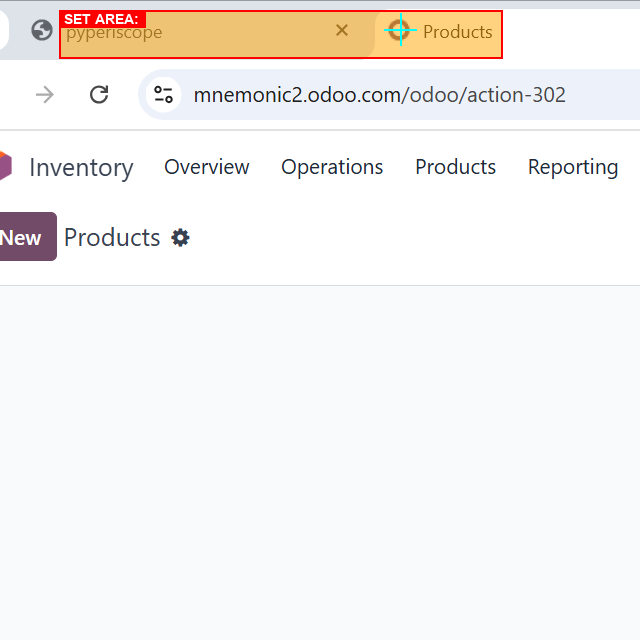

In [11]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVgK0AAAAAAAB9lCiMBGFyZWGUWBQVAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBYnNBQUFBd0NBSUFBQUFIQzBQbUFBQVBsRWxFUVZSNG5PMmRmMURUWjU3SFA4ODN2eUFoQ1pBRUJJd0ZpMUNvdG5YWktpa1Ziblp2NzRmTG9YZDA1bWE2WEJ6UFZzZDZrN1grb3Y3WXprM0hYNkJTWktaMTNFcXZzUFIydGpPY2lxNTNOenZUMjVoaTBEdnN1cllvU0xlc0NGRklVSDRJSkNIZjUvNTQ2bmUrQkFnaGhpYXRuOWVNTTgvdjU1T0FiNTduK1h5ZTc1ZDgxWDBQRUFUNTFxRUFRSUZ3TFBXNGNJUWthRlhhT0dVWXhrSm1SaHBwQXhEa0NZV3dmendRRHVqamlhWXFWcUZQVUVzNExqeVdJVE9EaW9rZ0VZVUFwUUFrOUpWbWdrYVZvRkdGMVNaa1JsQXhFU1FLb0FCTU4rZUlQbDZ0aVl1ZEI0T1E2Y0ZsUElKRUIyVE9pcWxWSzFFdXYyVlFNUkVrYXFCejBNellHTGxPR3plUHhpRFRnWXFKSUZFRXBSRE1VcE1Ra3BTb21YOXpFSDlRTVJFa21pQUFaSFlma0RaT2laN3hpSUJmT29KRUdmenNUYlI0ZkJraDBGZU9JRkVHbVNYV1NDR1hTU1NockhVRzdybWN2WDM5dlgzdXNYR3YxMHVBS0dJVnlqaVZQRWFldEhDQlBpMUpKcE9GYlBVVEFpb21na1FkTkdDb2tTcEdIdnhRUE04RHBSTmVIOC96ZHpwdnQvM3Z0Uzh2WHg4ZkdWUElGWVNRVWZlWUlUVkpuYUIrcnVBSHNYR3hTbldjVkNvaEhFZkkzQU9kbmd3STNwSkVrR2lEQWlVeksyYUtJVDVXRVpSb1Vrb0pJZmY3QnI3Njh0Wi9mM3h1ZE9paDF6c0JRQ21sM3l4aUNRQVFRa0Fta3lrMWNTOFgvOFV6ZWJuSnhoVFdNVHdmNXZzRnJqRVJKT29JckZYU29MZmt2TS9YMTlQWGZ2WEx6bXNkSTRQRG5uRVBaYzU0UWlRU0NRRDRmRDVXNHB2dzhUemZkdms2ei9PY1JLSkwxaE1KS3VZMG9HSWlTUFFSYUlrSlVva2txREVvOVUxTS9PbUxXMy80N0txcjY1NTN3a3M0d2hFSklTQ1R5K1F4Y2dCd2ozc21QRjVLZ1ZMZTYvSDJkdHptZ2RmcUV1TDE4WVNUNFRKektxaVlDQkk2QXk3blI2ZE92bXBldnlBbDFhL3FycVAzMyt2LzdmWE4vNkxXYU9jOGJrQ2xDbExJZkQ3ZjZNUHgzNS8rM2ZDRElhL1h5d0VuVnlvTUM1T0xTbjZjdW5oaFlwSU9BSWJ2RC9iMzl2MVh3N20rTy9jOFkrNVI3M2ozclQ4LzZEK2IrOE9sTW5sMHlXVnJhMnRwYVdsalkyTmVYbDRFellqMjZLSUJsL09OMTh3ZjE5VkcyaEFFbVlhNjJsOTIzbXAvOThqQnU0NWVjZmxkUisrN1J3NTIzbXIvOElNVGtiS3RyL3Z1OVV0WFJ3Wkh2QjR2QU1TcWxVdnpueThzK2RIQ3A0M3h1Z1NaWENhVHk5UUptbVJqU21ISmo1Ym1QeDhicHdTZ1hvLzM0ZEREanMvYkJ1NDVnNStycWFrcGZUSW5Ua1RzZzg4cjBhNllDQkxObVAvNWRaM2VNRHcwVkgzMGtDQ2FkeDI5MVVjUERROE42ZlNHc25VYkltVmIzNTI3MXo2NzZ2VjRLVStsVW1sQ3NtNlo2WVVmRkw1b1NFdFd4Q3BZRzVsY0hxOVBXRjcwNG5PbUZ4S1RkVktwbFBLODErTnArNy9yVGtmZlhHZTAyKzFkWFYxZFhWMk5qWTBWRlJYNzl1MEw5MmNLQStucDZVMU5UU0YzajNiRlROVHAzejlWLzdQSS9kb2hTQUIwZXNQV0hXL3A5SWFod1VFbW1rd3Vod1lIaGFwSTJlWjFleDRNM09jNFFvQlFTbGYvMDVxRlR6L2w4L2w0ZmxLSVBNL3pQcDh2ZVZGcTRkb2ZVMG9KRUVMZ2p5M1huTDF6V0dQNmtaZVhWMU5UMDlEUTRIQTRIdnR6aEpQSHR5ZmFGUk5Cb2h5bWpCcXRkbWh3c0tyeVlGWGx3V2lRU3dBWUhSbjFqSXhUU2dsSFpBcTVJVFZKcFZaSkpCSnU4dlZLanVNa0VvazZYcDIyMkNoVHlBbEhLS1c4WjJKc2RPeHhaazlMU3dPQTN0N2VXVnQrdDVqUjgvTnhYVzM3emJaM0RoMTc0eld6VVBqK3FYb0E2T3hvcjZvOHNHN0RwcFdtQXFIcXd2bXo1ODgwdm4rcS9ySzl1YTcyNVA2S3FsOTlkS3I5Umh1cjNiWnJiMlpXdHRDWWpjRFMyVG01UDkvK0Zrc0xmZmVWYndNQU5zVWJyNW1MMTVhdUxsN0QyaHcvZGxnWVZsd3VIaE1BOWxkVUplcjBBRERnY3JMUkdHS3pXZFc2RFp0Y0x1ZjVNNDFUeDJSTS9RWVFSSXhPYjlpNlkzZFY1Y0dSNFNGS3FWcWpqYmhjQXNEWTZCajFVcDRIanVQa0NvVldIeStaMmNtdVVNWVlZcExrQ3JsbjNNM3pvSkJJSnJ6ZWNGbXliOTgrcTlWYVhWMWRXbG9LQUhhN1BTVWxoWlUzTkRTd05rYWowV2F6K1hWTVQwOFgwbzJOalVKNnFoZG9XcitRdUh0TlRjMlZLMWZZZEJhTHhXS3hGQllXMXRmWEE0RFpiTDU0OFNKclZsNWV2bm56NWdDZlpSWmYrUnV2bVFXTk9IN3NNTXRtWm1WbjUrUzJYTEtKRmJPbCtXTHgybEloVzMzMGtIbjlSaWFGRjg2ZnJhbzhJSWdtazBVaCsvYnU3Y2VQSFJaRWsvVVY5TTZQdDNkdjEra056S1FCbDdQRjNzekttVjRMWTE0NGY1YVZzN2tFbFdTcTJ0bHhVN3pOLzIzVGYrUVhGSXIvR0FBQUUwMG1xWUtHZmx4WEsvNUNFRVNBM1MrTXFzQnZRZ2dWdlEyRGtGazJsSk1iVCtvYkFsZXVYQUVBc1g1dDNicTFxNnRMeUs1YXRRb0FoQkt6Mlp5ZW5pNklxY1BoTUpsTWduNHhRUXgrZHRaZTNMMm5wMmYvL3YxYnRtd3htVXcxTlRVbEpTV0NHUmtaR2N3TWg4Tng1c3lad0NNSCtoS2QvZjNiZHUwVnNvTDhBVUQrUzZ2YWI3UU51TDQ1NmVqc2FIZjI5K2VMQkRTL29GQllWSzR1WHBPZGsvdmJjNmRadHE3MlpQSGFVcUhXdkg1ais0MjJ6bzUyb2U5UFMvNWhXcmxrSnVXL3RJcWxFM1Y2Sm1TZEhlM256elN1MjdCSlBDTWJnYzBsS0h0bVZ2YTZEWnVhYlZiQmNnRFE2UTNDb2pJeks3dDRiYW13M3Z6VlI2ZXljM0tGV3Fhemdod2pDTVBsN0s4K2VuaGtlRWl0MGNhcE5TUERROVZIRDd1Yy9aRzFTaXFUK2FpUDQ0RHl2TWZ0N3UrNTZ4NGRuNm14MSswZGREM3d1RDJVcHh3SFJFcGlsYUUvN0tPcHFhbWlvcUttcGtZbzZlN3UvdVNUVDRUc2lSTW51cnU3eFl2Syt2cDZvOUg0M252dnNXeDVlWGxoWWFHdzNNdkx5eXN2THcvZWdOTFMwckt5TW5GM1FTTDk2Tzd1ZnVXVlYxZzZKU1VsOEFJVEFpdW0zbUFRYjZVQklEc245NzdMQ1FCTWc0UWwzbVg3WjlrNXVXS1pFNnNuQUN6SnptRy9RRXdaeGJWc0NwZEl3cFpNbnRUUHBMcmFrMks5QTRDT2pwdDZnMkhsNUJtbm5Vc1kvSlpJb0FVSlptUmxQUU1BYklyMkcyMSt0Y0kzZ0NBTUpwY3VaNzlHcTkyMmE4KzJYWHMwV3ExUUdFSERZcFd4UkM0bGhGQ2VldDJlM2o5MUR6OFltc256ODNENFlWL1BQYS9iUTNsS0NKR3JZcFNxT2IrVzBtUXlzZEFpaThWaXQ5dkZJbVUwR3RuaWtXRzMyOHZLeXZ5NkZ4VVZXYTFXbHI1NDhhSWdaSXdWSzFZRWFVWnJheXNBYk5teUpaakdScVBSWXJFRTd4RUtQWUs5WUZYUnJmWWJVTHdHQUpwdDFuVWJOZ1hUaXltaitHQlJYRDRyN3h3NmR2ellZZFpkMkN6UEpHSFRqam5UNm5VcVREVHJhay9XMVo2Y1ZKR1RHK1FJeVBjZXNWeHUzYkdieGJGdjNiRzcrdWdoVmhYQkEwMTlhdEt5L0JldS92NEtCVW9Jc1o3NTlDZi8rTGY2MUNTL1pzd1IxTlA1NTkvOTVqOEpJUlFvejlONFE2TDhVUVJTOEFoNzZsbjUrdXV2RnkxYTVGZkluRVh3MkI3dG5wNmU0QnZiYkRhejJXd3ltU0NJUTB5WXEySzZuUDM2UnovK2xhYVhxeW9QRExpY2JMMDJkWWtuUmhBMW5VNFBJcmRNQ0xEREFYWkFlZC9sREJCNHBKdHVpb0hacEZuUVdXYWhuNE1MUWNUVWYvaUJ5OW12MW1nRXVRU0FCU21wVzNmc2Z2ZklRWmV6di83REQ5N2N0U2NpdHVsVDlMa3ZMcjErNlhPZTkwMU1UQXpjYy8zUi9nZVAyNVB4YktaS281TEo1UURnSGhzZkdoaTgwM243NXRXMmdUN1h4TVFFNFloTUxudnVwZVZKQ3hmTW4yMFpHUmxUQytla2RHR0UrWCthbXBvc0Znczc3Z3pRZUpaelRMRytzTVBLbGFhWFdUWXpLMXR2TUxUWW0xc3UyY1ErSDRaNDJ3c0F6VFpyZmtFaEFDVHFkRk5yUTJDbHFhQmdWVkg3elRZQVdHbDYyZG5mM3psbFRMYmZGNDRPeElhSlJiQ3o0NmE0UWNzbG0zRENvRGNZL0dvUlJNeTZEUnN6bDJTL3VYT1AzeTNKQlNtcGIrN2NrNTZ4ZU4yR2paR3lMVEZabjcwOFI2VlJ5ZVF5QURJMk12cEZ5elhidWYrNTErMFl2ai9rOVhpOUh1OEQxLzA3WDkyKzJQVHBGeTNYeG9aSEFVQW1sOFZwNDVhWmxodlNrdWZQTnBQSkpIakpCYXhXNjZ1dnZnb0FLU2twUnFPUitZNEVUcDgrTGFSVFUxTmhzc0tLMCt3MFlGb2ZUb0FsY0VsSlNWbFptWEFzTUJPenVNK3FqeDRTMGxXVkI3Snpjc1VubS9rRmhTM05GOXR2dE9WUFdZV0pUeHVQSHpzTWo3elBpVHA5OGRyU3V0cVRZb0Y3ZS9mMndHWXdCbHhPOFhYSjlwdHQyYy9rQWdEejNiTUZMNnU2Y1A0c1N6TTN6dVZIb3RuWjBjNThRZUpobTIzV3l5S2ZlL3VOdHAvKzNkK3pySG45eG1hYlZlenFPWDdzOEt5clZPVEpJVkduMzFhK2QrcWxjZ0JZa0pLNmErKy9ocmlYZWl3MzlhTXhLSlZJSlg5VHRzYTRKRjBwVTFDZzd2SHg3czdidGUrOGY5Unk0T0RydnpqNCtpOXF0bGYrK3QyNk8xOTF1OGZIS2FGS1dleUNwOUtLMXY2bFNoMHJrUWIxdkkvUVlKdGY1aTVubU0zbTd1NXVZVk84YytmT2hvWUc0YXBsVTFPVFdHR1pwQjQ1Y29SbEhRNkh4V0lSajE5ZVhsNVJVU0hjN1dsdGJSWFNZaTEyT0J6aWkwbFdxN1dvcUNpdzVZRjI1WHFEd2J4K294Q05XTENxeUc4THZMcDR6Zmt6alg0K0g0WVFVOG5HRVVma01Pa1V4MDZLUGZJQlNOVHBtMjNXWnB0MXFqMC8zLzdXaGZObnhUT3lXVllYcjhuS2VxYXE4b0J3RnVrWEdRb0E2elpzYXJsa0V4cUlUd3d5czdLMzdkcGJWWGxBSEswWjhua0NnZ1FMQ2VubDVYNWpFQ0tSU0JkbFBUVjBmNUFqM08yT3J6MXVEMDhuQU1BMzRadHdlMEgwdERkQ2lEeEcvdFN6VDJjK243VjQ2UktKVkRyZllWSmRYVjBzb29obEN3c0x4YkZIYkoxb3NWZ3FLaW9Bb0t5c3JMR3hVUnhnWkxQWm1KY0pBSXhHbzEvdDVzMmJWNnhZVVZwYUtpaXAzVzVuQ1JZVzJ0RFF3T0l4R3hvYUJDMHVLeXNMdkNXSEFFOFVGaUxZQTNRV0lzREZtMXdoQ2ozNmxXVmEreEVrNGdSK292RGloZjdlbXhuSG9aUVFjdS9PM1p1dGJaK2QrM1IwNktIWDY2VVV2bm5LT3dDd1M1RkFaREtwVXFQNnE1OFZQLzNza3NRa1hWUUZsa1lWai9XME4zWkVpSEtESU9HRkJIdys1aHpHSVlSU2FrZ3h4UDkxd1FzRnk2OWQrdnhhYyt2dzRMQ3JwMThwajZWQTNSNjNRaDJUczJMWnN6OThQbnQ1RGlmaHBESUp6L01jdnFoeUJrSlh6QUdYazhXTmg5RWFCRUVBZ0pDd25HU3lvUWlSU0JRU2lVUWl5VnlXclVuUWVEeWVzZUZSOTVpYkFwWEpaQXBsakNFMVNiZkFFS09LQ2RPYzMyZENVVXpocHJiNE9nMkNJR0dCVWlBY2djZTdwRGdWcVV5YW1wR1dtcEVXM21HZk5QRE5hQWdTYmN6aTlnbitIQk1KTzNoYWdTQlJSR0NmRHdDRTlxWnlKRnpndDQ4Z1VRUWhKUEJ1UE1qWG9pSHpCQ29tZ2tRTlpQYlk5ZUJmdll2TUIvZ3VTUVNKRG9MejlNaGwrSDgya3VEZkt3U0pQQVNDRGNCVXhzam4yUllrRUtpWUNCSlJKbDNCbVFVSnh5bmtzbmsyQ0FrRUtpYUNSQVoybnh2bWNobFJwWnp6TXl1UjhJS0tpU0RmRWhRb0FLVkFnUkJnOTdubmVMVW5YcTJhSDlPUVlNRlRaQVQ1bG1CSGxRUWd0UHM4V3JVU0hlVVJCMzhBQ1BJZGdPTklnbnJPTDk1QndnNHFKb0o4QjBoSzFPTHpoS0lCL0JrZ1NMU2pUMUJqVUZHVWdJcUpJRkdOUGo1T293cjkxZUZJZUVIUEQ0SkVLUnhIRnVqaVl4UVlnQmxGb0dJaVNEUVNwNHhKMU1haGN6emErSC9JYjdlREdacHNJZ0FBQUFCSlJVNUVya0pnZ2c9PZSMDWNsZWFuX3ByZXZpZXeUWISXAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQnhha2xFUVZSNG5PM2RlVnpNK1I4SDhQZDNwaWFxU1hTZ1JObVVLSXRRUWtRVWRtUERzbzdjeHk2Ylkxc3NsbVZsSGEyajNYV3VYV2ZMejdHMHJKeEZLOGVXWFhLVjBOSkJCOVZVbXFtWjcrK1BxV21xS1pYeUVhL253OE9qK2M3MytNeDNqdGQ4UHQvUDV6UGNscDkvSlFBQUFIaTl1UHVQbjdJdUF3QUF3RHRId0xvQUFBQUE3eUlFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0JBcXhiMnlSRVJrWUluanVONTRsUkxBS0J1NFlrbm51T0llQUVuNEhraTRtdjJBQUtCUUxlZXFMNk90cmEybHBaUUlCUUlPQTRmRi9DdTRES3ljcDVMY2hTS0duaGZjVVE4VHp5SHZBVjRDeW56bHhQVVRBb0xPSzVoQTcwRytybzFzQytBdW9uamVWNHVWNlJuWm1mbjVyM2FuamhTOE1oZWdMY2NUNXlBK0ZmTFlMMzZPc1lOeFVJQkxvSEJPNDNqaTk1SjZSblptZG01MWQ1UGpiZE5BY0NiNnhYZThRME45Qm9hNk5Wb2FRRHFwT0lBSnFMTTdOejBqT3lxN29MbkNWZHRBTjQ1ZkhWNmR4Z2JpZzMwNjlkQ2FRRHFuaEpOUUEzMGRhdDhTWVpEK2dLOGs3Z3FCM0FEc1M3U0YwQ2w5RFVZSTBQOSt2VkVsZDBhRGM4QTc3S3E5UHFvWDA5azFFQy9GZ3NEVU5kbzZBUmgydENnY2lNQk9GTFVlSGtBb0M3aGVhcE1SWmpqT05OR0JyVmZISUM2UkVNQUM0VUNBNzFLTkJOVnZRRUtBTjQySEJIMzhuYXdCdnE2NlBNTVVJcm10NFNodUJKWGdxczFkRmloS0xmV1hNRmRBUERtcXNRYnR3RXUvUUtVb1hrbUxLRlFvQ1BTbHNyeXk5dU1JK0tyV1AzbGVaN2pPSUZBa1BzaTk5N2RHRW0yUk5uL1dzQ1J2cjY0Vld0YjNmcTZxdFdxdG1zQVlJaDdTVzhRSFpHMlVGaWQ2dSt6cCtscFNTbXBTU25TRjNuNStma2NjVHIxZFhUMTlVVDFSS2JObWhpYm0ycHJhMWU3MUFETWxUc1ZwVjU5blFvQ21LL2lFQVJsckdablM4NmRQWmVVbEpqeTlLbU9UajJobHBBalRpNHZrTWxralNLTW1qV3o2TjJudDc2K0dCa01VTGRVL0lHZ1YvbCtuY3FXTUo0dnlKY3JGSXFFdUVlMy83NSs2MHAwWHZZTEhaRU94M0c1MGhjbVpxYmlodUoyM1RyVzE2K3ZLOWJYMGhKeW1NQVM2cVlTNDREVjVVbnprMUtmbDdkWmxXYWNWQWJxemVnYkovNzhVeXFWYW1scEt4ZnE2dW9TUjlJOHFWU2F4M0VjeDNFaWthai9nQUgyRHUyUXdRQjFTTVVmQ0UxTkRPdnJWQ3FEbFcvODV5blA3dCs2ZDNMdkg3bFpPZm41QlVROHovT0ZWV3lPaURpT0kyMXRiVjBEL2U0ZjlHcnQyS2F4UlZOOFlrQmRWRzROdU9JbW84cS8waFVLWGlEZ0xrVmNQSHZtaklMbnRZUkNFeFBqMW5adGpJMU5HalkwRkFnRXAwK2Rldmp3QWMvelBNKy95TXM3OHZ2dkVvbWtxMHMzNVlaVmVTd0F3RWJGYjFTdFNyYy9LK1R5bE1TVW1HdTM0cTdIWm1kS1pIa3laUTJCNHppaFVFaEVjcmxjdVVSZUlGY29GTGV2UkNzVUNvRlFhTlRZbUJQaTR3THFtUElEdU9JdWk1V3JBUE04THhCd3QyN2VDZ3NOSlNJQng3bjI3Tm14VXlmbDVWNGl5bjJSbTVHWndSZmhpRGlPQ3dzTk5UQXdiR3ZmRnQ5cUFlcUdDajhRdElUQ1N1MkQ1K1VGQlE5dTN2djNyMnZwOFUvekMvSTVBU2ZnaEJ4SDJpSnRVVDBSRVVuelpBV3lmSjRubmxma3kvS1RZaDhwU05IQXFLR2hzU0VuME1iSEJkUXQ1UWJ3UzJxZmxYdWRjeHlYbloxOTdGaXdYQzRYQ0lTRFBocmN0cTA5RVJVVUZNanlaWkZYLzc0WEc1dWFrcUlNV3VYL2NybGNvVkFjT3hiY3dyS0Z2ajZHN1FQVXBHZnBhVHQrM2pMU1ozeVRwbWFsN25xU25CUzA2OWZKbjg0UUd6U284bjRyL3JTb1hDN0s1Zkxjbkx5dzMwOUxNckx5OC9NRkpCRHA2cGcwYTl6VHE0OVp5MmFOVEkySVNQSThNelVwSldUUEh5a0pUMlV2cExuNWVZL3YvWmVSZXJSTkozdHQwWnVWdmxGUlVVT0dERGwwNkpDam95UHJzc0FicWhaSDVza1ZDaUlLQ3oyWEw1TUpCQUxYbnE1dDI5b3JGQXFGUXFHbHBYWGwwcVZMbHlJU0V4T1VYYU5KN1YzSzgzeEJRWDdZdVhPcW5kUWh6OUxUUHB2a3MzZm5kdFlGQWRCZzUvYXRjZmRpMXExWjhTUTVTWDM1aytTa2RXdFd4TjJMK1dYYkpsWmxTM244SkRyaVduWm1kcjRzbjRqcWkzWHRuZDkzOWVyZDdEMExRNk9HMmlKdGJaRzJ1S0ZCWTR1bXJsNjk3WjNmcjYrdlM4VG55L0p6c25KaS83bjk3R2xhNVk4VkhCeHNXZEttVGN3ZU9MeXphakdBQlJ5WG5TMTUrUENodHJhb1NaTW1UczVkRlFxRk1tNWZ2TWlOdTNkUG9WQUlCRnhoNDdNeWZaWC9jUnp4M0lNSDk3T3pKUUswS1FIVUhKOEprNDJNVFNSWldlc0R2bE5sOEpQa3BQVUIzMG15c295TVRVYVBuY2lxYkNrSlQ2Ny9kUzFmbHM4cmVDMHRyWWFOalJ5NnR1L28ydG5FdkxGT2ZSM2xPdG9pa2FGeHd3NDlPN2ZyMnI1Ull5TXRMUzFlb2NpWHlXNUhScWNscDFUMWlKY3VYWXFQajQrUGp6OTA2TkNxVmFzV0xWcFUwNCtwQmxoYVdnWUhCN011QmRTS1dneGdqdVBpN3QzUHpNemtlWVd0bloyMnRyWnFxbzM4L0FLNVFxR1F5NFVDTFlGQW9NeGdvc0t4aER6UEt4VHlMRWxXM0wyNE9uZFJwNUdSOGNhZmQ0MWk5eWtHVUFFalk1Tlpmdk9OakUyeU1qT1ZHYXhNMzZ6TVROVmRyTXFXTDVWbFBIc3VFSEFjY1R6UER4Z3pxTmw3TFpUWHBOUlhVeWdVY3JtOGNYTXoxOEY5ZUo3bmlPTTR1bkg1ZWxwU0ZXckFwVGc2T2dZR0J1N1pzeWM1T2ZtVkgwZE5ldFBLQXpXcjNHdkFOU0luUjZLdHBTMlhGNWlhbUJLUmxsYmg0ZlIwOVR3OCs3L0l6ZFhXMGtwSlRibHcvcnhjTGkvYWlGY29lRTRnRUdtTEpCSkpyUllQNEIya0RObzEzeTNMeXN4Y3Uzb0ZFV1ZMc3Bpbkx4SGxadWZLc3ZONG51Y0VuTGFPeU1UTVZFK3NKeXpUZ1V0NXhVcHNLRFp2YWFHdEkxTEk4M2llVjhnS1h1UytlSldqbTV1YkUxRlNVbExUcGsxZlpUOEFsVmU3QWF5ODNLdFRUMGRYVDY4Z1AxL0JLd1NjZ09jNExhSFF5c3BLdVU1TGErdm9HemN5TXJNSzhtVkVuRkNvVmIrK05xL2dpZVBLR2FLczJkNmQyMlB1M2w3MjNmZWZUZkpSTGR6NDh5NGlpb3VOV2J2YWYrekVxVTVkdTZudSt2UFkwV05IRG0zOGVkZVZTeGQzYnQreWZOWGEzVHQranJselczbnZuTGtMclcxc1ZTc3I5NkQ4MjlhdXpjd3Y1aXYvVm0yN2FONGNJbEllNHJOSlBoOE1IakxnZzBIS2RUWjh2MUsxVy9YbDZ2c2tvdVdyMWpZeU1pYWlaK2xweXIwcHFSZGJlZGZZaVZQVDA5T09IVGxVZHA5S1pjOEFnRG9qWTVOWmZsK3RYYjBpVzVMRjg3ellvQUh6OUNXaUY3a3YrSHhlb1NDQlFDRFMwV2xnYkZnMmZWVjBkT3VaMURNVjZZaGtlVktGZ25TRXdvTDhjaWNPcXFwRml4YWRQMzkrL2ZyMVE0WU1JYUpMbHk0cFUzblJva1Y3OXV4UnJtTmhZUkVlSGw1cVEwdExTOVhmaHc0ZFV2MWR0a09XeGk1YTZwc0hCZ1pldlhwVmVUaGZYMTlmWDE5WFY5ZGR1M1lSa1krUHo0VUxGNVNyelpzMzc5TlBQNjJoeHcydld5MEhNRThLaFNJdk8yL25yNzhXSDFKTHEwR0RCczBzbW5YczZOalV6RXdnRUF6OHdPdkNoZENNakV5T09OUEdqVnZiMlowUFBTZVZ5cmhLVFBKZXltZVRmRlNScytIN2xjcWIxamEydG5adExrZUVxd2Z3NVlzWFBoZzhSSFZ6ZmNCM1B1T25LSlAxejJOSDE2NzJWMld3TW1WVk54ZC85Y1dHNzFlcU1saTVyU28rUzFuODFSZEd4aWJLSWoxTFQ3dDg2YUp5dVRMK1Zmdjg4OWhSNVhMbHNWU2hxd3pwdU5pNzZtM2F4NE1QTzNkelZmOXVRVVRLREZZbXRDcVM5Kzdjcm41Q0FGU1VremkrVVNQOWxFTWgxRzYrNUFKWnlaWExuVk9va3E1ZXZVcEU2bkU0YTlhcytQaDQxYzBlUFhvUWtXcUpqNCtQcGFXbEtwdVRrNU83ZHUycWlrTmx2bGIrNk1yMTFUZFBURXhjdm56NTlPblR1M2J0R2hnWTZPWGxwU3FHbFpXVnNoakp5Y2xIamh5cC9tTUcxbXIzOTBrRWhlOEtQajgvWHk0dlVQNlRTdk5TVXA1ZXYzNDlhTytlcEtRa2p1TXNtbHVNR3UwelllSkVuN0ZqaHc0YlZyOWUvWXlNelB6OGZFRVZmejRsTFRWMXp0eUZxcHVxTkNVaVo1Y2VNWGR1UDBzdnZFb1VGeHVUbHBycXJKYkh6dDFjVlZYZUFSOE1zclZyYy95UDM1VTNkMjdmOHNIZ0lhcDdmY1pQaWJsek95NDJSclh0UUM5dmplbXJMSkt6U3cvbDM0Mk1qSlc1R0JjYmMreklvYkVUcDZvZlVia0g1YkZVWHhTc2JXekhUcHg2TWZ5OHF1UkVaR1Jzb3FyeVd0dllmakI0aUtvMnZIdkh6N1oyYlZUM0ttTmJsZTRBU3VscHFlc0RWbVpMc3NRR0RmVEZCdG1TclBVQks5UFRVdG1XU2t0Ylc4N0xCUUxpRlFxWlZKcWErRVNhbTFmZXl2blMvTXowREpsVXhpdDRnWUE0TGE2K2J2Vi83eUU0T0hqVnFsV0JnWUdxSlk4ZlAvN2YvLzZudXJscDA2YkhqeCtyVjNsMzdkcGxZV0h4MDA4L0tXL09temZQMWRWVlZSbDFkSFNjTjI5ZTVRc3daTWlRMGFOSHEyK3VTdHhTSGo5K1BIVG9VT1hmVFpzMlJmVzNUcXZkQUJhTHhUS1pWQzZYY3h6eGFvaUlWOGlsVW1uNGhRdEVKRmNvRkFwRi9mcTZldnI2Y3JuOHlaTmtnVUNRWDVDdnB5ZXUwdUdNVFV6VTI0Mkp5TmF1emZQME5DSlNScHFxQW5ybDBsKzJkbTNVVTFNOWpJbW9sYTJkOHZOSUdiVHE5eW9Qa2E2V2lLMUtIclJVa1hadTM2SWVuMFFVRzN2WDJNVEVxZVFSTlI1THRmTjdhbm12U25RbEc1dldSS1E4Uk15ZDI2WHVWWjBCQUNWbCtxYW5wUm8wYURCbjdvSTVjeGNZTkdpZ1dzaXdZUFYxNjNNaUxZN2plQVdmTDVVbFBYZ3N5Y2dxcnhOV2ppUW5KZkZwdmxUR0szaU80MFI2OVhUMUt2RWJiaVYxN2RwVk9RYkoxOWYzMHFWTDZwbG5ZV0doZmpINDBxVkxvMGVQTHJWNXo1NDl6NTgvci96N3dvVUxxbHhVNnRLbFN5V0xFUlVWUlVUVHAwK3Z6TW9XRmhhK3ZyN29uUFYycU1VbWFKN25yVnRaR3hnWVNDVFpDb1ZjdllGSU9mSklJQlNrcDZmbjV4ZG9hMnZ4UEMrWHl6bU9VeWdVTVhmdkNBUUNmYkcrZGF2M2FyQ0pyRnVQbnZkaTd0QUhnNGpvWXZqNXNST25WbVlyWmRDcVg1UlZYLzVTeTc3N2ZzUDNLNVdicTFxR3kwdEVqZnNzcjI1ZGxqS0RkMjdmc25QN2xoSjMyTFdwNUI3Z3JhZWV2clA4dmxKT3h6SEw3NnYxQWQ4cDcySjRNZGpZek5UQnVmMjFzS3M4OFJ6SG5UOXlydS93L3NabXBxVldVemFNSmNiOWQzci9DWTdqZU9JVkN0N1FwSkdvYUtoUzVha2FrRi9xNGNPSHpaczNMN1ZRMlcrTFhybXZjbUppWXVWWERnOFA5L0h4NmRxMUsrRUNjTjFYaXdHczRIbDlmWEhMbHU5ZHYvRnZxZlFWQ0lVQ29iQWd2MEFnNE9RS2hYYmh0U2lCUU1CRlhQenJ5Wk1uQ29YQ3lxcXR2cjVZcmxBSVh5R0EwOU5TallzK1RaeTZkbCs3MnY5WmVwcXlObG0yQXFwT2xaRkdSc2FrMWtPcUdwUXQ0Y3FMdTgvVDB5b1lvV1NrNlJEUFhwYjBxdGhXbHJCVVh6TUFkYnQrMlphZWxpbzJNRkNsTHhFMWFXbzJ5KytyZFd0V3BLZWw3dnBsMit5NUM1aVV6YmlwY1p2Tzl0RVIveWdVOG9LQ2dtZFAwMjljK2xjbWxWbTF0ZFl6ME5NV2lZaEkraUl2NjFsbVF0eWp1OWR1UDB0Skx5Z280QVNjdGtpN25Vc0gwMlpOYXE5c3FrNmo2cW9VbkRWSTJSVXJPRGpZMTlkWGVhbVlTVEhnMWRWaUU3UnlOdW1lYm01YVdpWG1hQlVJQkIzYWQ1Z3djZExFU1pPR0RCMm1KUlRLNVhLQlFDQVFjTGR1M2Jwdy9vSkNvZEFXaVhxNTlhYVhUa2xkVWxwcXFucGNLUy8wT25YdHJyeHBiV05yYkdKeStkTEZ5eEhoNnQydmxOVGJlSW5vWXZoNTUyNnVSTlRJeUtqc3ZkWGcxTFZidHg0OVkrN2VKaUtucnQzVFVsUGp5dXhUMmJpdGFpZFhMNWg2cHNiRjNsVmY0WEpFdUtvNTNkakVwTlM5QU9yR1RweGkzY3AyOXBjTFNrMUYyYVNwMmV3dkYxaGF0Unc3Y1FxcnNqVnFiR3pid1U3UFFFOWJwRTNFdmNqT3ZYbjVldmdmb1U4ZkowdWVaK1hMOHZObCtSbnB6eFB1UDdvUWZPN201ZXN2SkxsRXBDM1MxbStnNzlDMWc0bDU0OW9yVzlldVhWWDluMVhPbno4L2N1UklJbXJhdEttRmhZV3lHNWZLNzcvL3J2cmJ6TXlNU2dhMit0L0twbStOM2FrcXFLQjdlWG1OSGoxYTFRWU9kVkc1OGFaUVZOU2xzSklkRG5tZUY0dkZIM3pncGFXbEpSUUtsVEVzRUFpTWpVMmFOR2xpWm01dVltS2lwU1VVQ29XNUwzTC9Dci93KzZHRENvVmNLQlIrOElHWHZyNStOYm8xcmcvNFR2WDMydFgrdG5adDFLOEtPM2R6dlh6eFFzeWQyODVsNm9qcVYybzNmTCtTaXZvVk56SXkvbUR3a0ozYnQ2am41ZUt2dnFoTVlaNmxwNm5QU1Jsejk3WnQ2elpFcE95VnJheU9LKy82ODloUjVkL0tIbFZYaWpJNExqWkcyUzFMZmJjWHc4OWZVZXROSFhQbjlzQVBQMUxlOUJrLzVXTDRlZlZlVnh1K1gvblNPalM4T3hvWkdjK1p0N0RzUk5CRTFLU3AyZHlGMzFTenBlZVZPaUFYN1lQbmhWcEN6OUdETEZwWjZtcnI4TVJMOC9JZXh6M2F2bXhqZ0svL2lzbGZyNWo4ZGVBWHEzOWJ0elBoL21OcFhoN1A4YnJhOVp1ME1PODUyRjFQWEYrb1ZhbWZmS2dlWlV1dnNpTzBrbytQeitQSGoxVXR3RjkrK2VXZVBYdFU4MWtHQndlckI3WXlvZGVzV2FPOG1aeWM3T3ZycTc3L2VmUG1yVnExU2pYalZWUlVsT3B2OVdoUFRrNVduNjdyL1BuelBYdjJyTGxIQ2E5YnVVM1FGVS9DWE1sR1lZN2pGQXErclgzYnJLeU1zMmZPOEVUS2dYMzM3OGMxYk5Td1VVTkRudU15bmoxUFRVdTdlK2YyMDZkUEZUd3Y0TGhlYm01dDdkdFc0K2NJalUxTWZNWlBVWTJDN2Rhalo2bjIzZ0VmRERwMjVGQ3A3bGRLcXJHOHl2Mm9EOTFSSnJINm1GMzF2dFlWYUdSa2ZESDgvTVh3ODJYTE0vT0wrWDhlTzZwK1JPVlJCbnd3eU1hbTlkclYvcXJydUtWR0pCUFIySWxUTDBlRXExWlFieDYzdHJHZE0zZmgydFgrNnFPRXE5MTREbEJaSEYrVkh5a3RaeDhjSnhScU5iZHBrZlU4VThBSkhzVStsRWxsQ3I2QWlPUUY4Z0pwUHFuOUhDSEhjYUo2b2hadDM3TiszNmFsZlN1aGxsWnRqNmVLajQ5WERqMVMzblIxZFZVZnBLU3N4ZnI2K3E1YXRZcUlSbzhlZmVqUUlmV1JTT0hoNGNvT1gwUmtZV0ZSNnQ1UFAvMjBTNWN1UTRZTVVRWHpwVXVYbEg4b2h5UHYyYk5IT1E1NHo1NDlxbWdmUFhvMDJwL3J0SElIeitWSjg1TlNuNWUzV2NXL3YxMTZaWjduT081bTlJMFRmLzRwazhtVS9hQzF0WVM2ZW5vOHorZm12bEMrY3dvSzhuVjBkUG9QR0dEdjBLNGFmYTlVRTNGVXNJNXFJZ3YxRmwzVlpCcHZmbEJwTEQ4QWN4Vi9JTFJzVnJvalZibjc0WG1PNDU0bVBMa2JkZnV2UDg3bFp1WGs1K2NyaDAwVVZyS1ZNMDhTcDYydHBXdWcxMi9VQisrMWJkWEkxT2lOR3RBTVVFbmwxb0JsQlFVVmJNWlZJWDhMeDhqYk83U3p0TEk2ZC9aY1FzTGo5TFEwVGlDVTVSY1E4UUtCUUNyTk0yM2MyTXpNdkhlZjN2cjY0dHA3THlrdnJ5SzlBR3BXbFQ0UUt0b1B4L0U4YjlMVXhOQ2pXL3R1SGE1SC9IUDlZcFFrVTVLZW1Lb3JxczhUTDVWSmRjVDE3TG80dE8zMHZtMEhPNEZRb0tVdFZDZ1VWWjB6QU9CTlVHNEE1NzZRVnJBWngxWHRvby95ZmFXdkwvWWFOQ2ozUmU2OXV6SFpPZG5LeTh3Y1IySjljYXZXdHJyMWRhazJwK1o1bHA2bW5QNmlObllPOEM2cjZnZENoYnZpT0tGUVJ5Z1VDb1hXRHJZR0RRMWtNdGtMU2E3MGhaUW5YbHRiVzBlM25vbVpxVkVUazNwNjlXcm9tQUJzYUE1Z2hZSi9JWlZWc0JuUGNhVGdxL1NkVnhtckNvVkN0Nzd1K3gwNmFEcW9RaUFRMUViNnFtWlhWcDlrQ2dCcUJNOFRKK0RvMVdhQ0xFdExXOHZNeXR6TXlyeG1kd3Z3NXRCOERUaERrdnNzTS90bDI5WkF0d3NBcVB0ZThsRlErV3ZBQU84VURSZE81QXBGUmxiT3l6ZmxPTDdHbXAwQW9FNTZhWDlNb1JCWFp3RTAwL0RlU0VuUFVsU21OWWtuQVdyQUFPODI3bVcvV2FaVi9rOEtBcnpqU2dkd2VrWjJ4VmQvMVJYMm9RS0FkeFAzOGlrNHRGQURCaWhIaWZkR1ZzNkx6T3pjcXUyQTU5RVFEZkF1NGlzMUFaWkl1M1ovZEJ5ZzdpcCtiNlJsU0xLeVgxUmpGeHh4bGZnZURBQnZENDQ0L2lWdHo0VjA2NGxxdXpBQWRaUVdFUlVVeU5NenMzTXFIUGhiTWI3b2Y3UkhBN3psZUw3eUhUQ0ZBb0dPU0x1MlN3UlFSMm1sUHMrUzVPVFZ5TDQ0SXVJNFhzSGp1akRBMjRmbmllT3FOdU9Wbm02VmY2TVg0TjBocUtuMExjUXIwNWRUZmtkVy9xdkovUVBBNjhJVFQ4cTNNTWNWVGFWVHRiZXpvVml2ZG9vRzhEYW9wZjRSUFBGVU01UERBZ0FqeXJjd1IxUzlXYTRhaUhYUkJScWdBbmg3QUVETkV3aTRobUpkMXFVQWVLTWhnQUdnNXBrMmFvQmZLQUtvR040aEFGRERqQnVLTWZvSTRLVVF3QUJRazR3TjlRMzA2ck11QlVBZGdFbHFBS0JtQ0FSY0V5UERlam9ZK0F0UUtRaGdBS2dCK3JyMUdqWFFSN2RuZ01wREFBUEFLOUhXRWhvM0ZOZlh3VVZmZ0twQkFBTkFkUWdFbkc0OW5mbzZJckZlUGRabEFhaVRPTDVhUSt3QkFBRGdWZUNDRFFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQnpJVDFkcElyZUZrQnIxRHdDcDVYS0VqQlk4SVZBSUEzQ3dMNHJWSWc1MlVGQ2xtK1FvRzRCUUI0c3lHQTN4S3lBa1d1Vks1UXNDNEhBQUJVRGdLNHpzdVg4N2w1Y2pucXZBQUFkUW9DdUc3THlaTkw4MUh0QlFDb2V4REFkWldDSjBsdUFTcStBQUIxRkFLNFRzb3Y0TE5mRkNCN0FRRHFMZ1J3M2ZOQ0tuOGhRN016QUVEZGhnQ3VZMlFGaXBlbXIxREFhV3NKdElXa3JWWHVSQ3Y1QllwOE9lVVhLR3F0RVp2amVaN2phbWZmQUFCMUg0Y0pHdXFRQWptZmxWdFF3UW9DanF1dkk5RFJyc0lFWjlKOHhRdVpvZ1lIRG5NYzhRb2lSQzhBUUlVUXdIV0dncWZNblB6eW5pNk9vM3JhZ25vaVlUVXFuVHhQZVRKNVhyN2kxVjhMSEJIQ0Z3Q2dNaERBZFlZa3R5QmZydm5KNGpqU3F5Y1VsZC9nWEJteUFrVk9uaHd2QndDQTF3TS94bEEzRk1qNTh0SlhJT0RFOWJWZU1YMkpTS1FsRU5mWEVsVDNzaTB1OXdJQVZBa0N1RzdJbGNvMUx1ZUk5T3NKdFlRMWszNWFRazYvZmpYM2hWa3dBUUNxQkFGY0I4Z0tGQVhsVkgvMWFpNTlsYlNFbkY0OVlUVTJSQTBZQUtCS0VNQjFRRzZlNXVxdmpyWkFWSlVPejVVazBxNWFQMm9BQUtpR04ySWNjRTVPRHNkeHVycTZyQXVpUVc1dTdxMWJ0eElTRW9pb1NaTW1kbloyaG9hR3lydWVQbjE2NnRRcElob3paa3p0RlNCZnptc2NJc1J4cEt1anVhcGFVRkFRRXhNakVvbGF0bXdwRkZhbk9sdGZSeWdycUlGTzBRQUFVQjcyQVp5ZG5SMFdGaVlRQ056YzNPclhyOCs2T01XdVg3OSs0TUNCYTlldUtVcGUzbXpac3VYNDhlTTdkKzc4OU9uVHZYdjNVaTBIc0t5YzMxcW9YODZJbzN2MzdvMGVQZnJwMDZkRTFLeFpzejE3OWxoYVdsYjFvQUtPNm91RTVWMTRCblZKL3h2NndiZUpIMjRLVzlwZGgzVloxQ1R1OFBiMHA3bWhoOGMwWTEyVU9pTHg0QmV6ZHRMSVRkOS9WSGZQV01LSkwzMTNaN2pPKzJuVyt5TFdaWUZLWUIvQWNybThvS0Nnb0tBZ05EVDBEY2xnbnVlM2J0MzYrKysvSzI4MmI5NjhRWU1HTDE2OGlJK1BMeWdvZVBEZ3dkZGZmKzNwNmRtelo4L1hVQmhaZ1lZQUZncTRlaUlOcmNUWjJka2pSNDVNVFUyMXQ3ZFBTRWhJU0VnWU1XTEUyYk5uOWZUMHFucGNIWkZBbWw5NzgyUzlxNlFKb2V2bi9YRDBhcnlFaUVqZmRxRHYxOHVHdm0vQXVsaDEzUE9qaTZmOFRPTjJMUnZZa0hWUlh1NzJUeU9XWDNWZXRITldHOVlscVFteStGTWJmemtlOVY5U1JqNFJhUnUyNkRaNXptUlhrMUx4bjNQM3hFOGJELzM3TURlZnRIV3R1azVaT0tGYlk3VlZaS2tYdC8zd3YvRC9rbkx5aWJSMXJkcDlQSG5pUUFmRDEvazRHR0Vmd0EwYU5PalpzMmRZV0ZodWJ1NGJrc0hidG0xVHBxK2JtOXVnUVlOYXQyNnRYSzVRS0s1ZnYzN3c0TUdvcUtpUWtKQWJOMjdVZGtrSzVKckhhWmQzalhiSGpoMnBxYWxEaHc0TkNBaVFTcVd6WjgvKzg4OC9nNEtDSmsrZWZPblNwY3VYTDVmZHBIbno1a09HRENtN25DUFNFbklJNEpjeSsvamd0WThydVc3Q3dRbHVLMjRZTzNoT1dkQy92VGp4K0svcmo2OFlmU0Z5VTlqSzdzamc2b3YvTXppT09zN29Xd2ZTbDJRWGdzTnlqQWQ3dlhyNnltNGRYTHZqb09Hd2ZkTzZxSlkxNjcvbWNQOVgzbk5WcE55NStFRFhwcytJajFzMm9PZi9oWjBJQ1Zzek16NGxZTTFRTTlVcU9aZC8rTXovVXI1NXU0R1RYTTN5THgwSnVyQiswbjhwbTc0cmFtbElQZTQzYzhmREJxMmNQTWU1dHRCTnVYUWtLR3JIZ2p1eEN6Zk1kcTV5dmFHdVlSL0FSTlN3WWNPZVBYdWVQMy8rVGNqZ2lJaUl3NGNQRTlIRWlST0hEUnVtZnBkQUlPalFvVU9IRGgxMjdOaXhiOSsrcEtTazJpNk14dW92RVdscmFlNXpmT2ZPSFNKeWMzTWpJaDBkblg3OSt2MzU1NTgzYjk0a29zdVhMMi9Zc0tIc0ppNHVMaG9EbUloRTJnTDgySERORXJWYmR1aVhUNndLMjZyN2Vnd2FPTi90czFQZmJwbDY4a3NydGlXcnc2SkRUcVhvOXBybFVoY2FYVE5PQjk4ZzJ6RURXcjc2cnRKaXo5eUl6K242Nmp0NkpjMzZMdzFVUmI1THQwRTk5MDd6TzdKejEwV3YrZDBLbjQvYk85WmZ5clVhc1Q3UXk1eUl5TVhOT2ZqTFQvY0ZyVC9SSzZCL1F5S2lmRjNiTWFzRCtsc1ZydS9pNWhtNWV0TGFpRzNCZzUwL2VkdmZGVzlFQUJOUm8wYU5ldlRvY2VIQ0JiWVpMSlZLQXdNRGlXanc0TUdsMHBlSW5qNTlxcnkyMnJGang4akl5TGk0dU5vdWo3eWMwVWRDZ2VZQWJ0YXNHUkdkT25XcVg3OStQTStmUG4yYWlKbzNiMDVFenM3T0dqZFIzcXVSdHBEak9FSlhySnJUekd2ZUp5VVdHUFQxNmsrbmp2NGJuVVpXeG93S1ZjZkpMaDY4a0d2NjRRQUgxZ1dwakFjbmpzZFEreS83MUlXNmV2V1k5WEp2ZW1SbmFrb0tVVE9pd2hxL2JxL0p5dlFsSXFKbVh1UDZCSDl6OWt4WVF2K1BtaEdSbWR0MHN4TDcwTy9VdHlQOUhYN24zbk95ZW52UEZCRzlPUUZNUk1iR3h0MjdkdzhQRDJlWXdTZE9uTWpJeURBd01CZy9mbnpaZTArZE9xWHNkZlhhVkRYN2hnMGJ0bjM3OXFOSGo0YUhoeGNVRkdSbFplbm82SHo4OGNkRTFMVnIxNjVkcS94MVdTamd5aHVDWEZMQzNnL2R2cWVGeHc3MmlGdzBlMFhJSFJtUmtkdXlyV3Mrc2RMSnV2Ry94U3RXSFkrVkVZbnNQbHl6Zldsdms5SmIvVEV3WnRXc0ZYdXVwaE9SMk83RDVlcnJFQkZSMXI4SHYxMGNHSElubTRoRTVyMW1yVjg2cHIzNGxRNU5SR1d1eUZxNkQxMjh6TGR6OFRwSnV6MCtXRTFmaEp6MGlGbisxYktkVWVsRUpMWVp0T3JINVgyTlM2enpvTittZXl1N0YrOVljdjAzLzI4RHcyTFNaRVFrTXJiNWJQdStpWm9iSFkyTWpJa2tFbW41cC9abGhWU2VvQnU3NTMyejZVeThoSWlNSFVjdiswNVRxM2pwVXZYMysyN3VFS3RTamQ5Wi94NzhkdkdXYzNmU1pVUWtNckw5NFBNMUM3MUtyMVJ4Q2IyWC9ycktyZWdFdmV5Z0YrWTdURHpsdWYzYTF4UTRjOTZPeURRaWtjM29UZHZtdVlvcE5WVDFxakJ5LzJMRHFsRWFMcFkvUDN2OEdyV2ExRis5cWlSN0dyRmp6YUdMRDVKejg0bTBkYzBjK296NzdKTU9qVXR0ZVB2MzlkdVBSQ2ZuNXBPMnFYV3Z5WjhQMVBUUW5rZWYyTFl0K04rSG1mbEVwTjNBMG5YRVo1TjZXdW1YV0tkU2h5TWlvbHZCWjFQMVhLZTdxdXJxc3BRTHU5Y0hYWXBQek0wbjB0WnIwVzNXbk9uT3BaN2FqRnRIdCs4NGVDTys2Q0xyc0tYZmRibjJ4YXlkeVVSRWRHbk5oNWVJaUhyTU9UQzNFeVVFei94MFg1THk3OG9XTCtuM2FYNUJOR0w5NXE2SlAvMnc0MnhjYW41NUphbU9XNWR2RURsMkx2bjFxSzJ6SFoyTnVwZFFHTkpsR1Rac1FKU2ZMM3YxNDcvaDNxQUFKaUpUVTlOdTNicGR2SGlSVlFhSGg0Y1RVZS9ldlhWMDNvZ2VyVlVkQ1dSdGJiMWx5NVl2dnZqaTJiTm5SR1JzYlB6OTk5OWJXRmhVdXdCVm5GN2ozeTJqMWtSYmZibDBnMDcwOXNDZzBNVkRab3AyZE5zNWJwTm81THlOVStuS2p2VTcvNWpwSWRwemJlSDc2bHNsaEg3cHRTUEpkZHpxY2NacHg3ZXNQbDU2bmF3TDh6MG5ucExhOVp1N3pzTmNFdjIvSFR0V0R4dDRZL3Z4TmE3aVZ6bDAyckU1WHJQREpDSWJ6NFhmOVRlbnhETkIydy92bUhBbVltN0l2akh2cVpjditkeXNUN1ludUV4Y045STQ3ZVJHLzFOSFAvTVdIYml3dUgwNUp5RXJjcG5YbEFPSlpOUmw1TmZMSEkybFNYOGYvaU14clp5VlU2TWowMGprN21CZXp2MlZLdVQ5dmFNOHY3OUJSdTNHTHBqb0pFNDhFN1Q5TSsrLzdYU0kxTTZQTkdiZHNFOSt1Vk5VcXJUby8rM1ljWFQra0hQaFA0YXNkeW5LTmVuZE5XT0hiWTBsWThmUnl4WjBOazYvL2x2UUw0ZS84VG9kVWNGVjZvZUhKbythSDFWVVFsSGF2eWRQUEVpWFZ1R2dSRVNTNDB1OExzVDM5LzMrWStuSmpmNm45a3djSWRyamwvVHBGemVjdmxpOTBUanRjT0RxTTkrUC9sUWN1dGVyVkR2Qnc2TW43bEc3V2YwTlZVdWVYMWc1YTgyTlhPMm1uVWRPN1daS0tkZk8vbm4yanhXVGJvd3N2dWhZMkZzNFByOUJLODh4QXgxMFU2NmQvZFAvcTN0VzJrVHFReUZsRDNjc21Ydm9QMjFUNjE2VHhyUnRtQmwvOXN6eHMxdm1Ycjd4NWMrZmQ5R3Z5dUVLOXhkeDVHeXV5UkRQdHFvbGw3ZE1YM1BKME5aMTJNeDJwcFIyOGJkOVlmNWZ5YjdaT051eEtLR3piMitkdWZ4MGlyYUpyZXU0eVhhR3NyUmI0ZWVUbnBPSnM4OHMwNlNMMjNiL25XRTk0RXRQR3lJeXRkYjQ3RlM2ZUtsWFZ5LytNK1g5QVo5NUdtWmNPaElVRmViL2xmYUtuNmRVdVYwaEp6WTZtVXcvYkYrNDg2VDRCMFRtclVxL3ZKdTFNcU9veElRa0lyTXlleUNpak5zeG1hVFh5VkxUbDVpM3kyc040TnUzYjFkbXRZWU5HejU3OW94SkJpdkgrOXJiMjJ1OGQ4eVlNYlU2NHFpc2FqVC85dW5USnpJeThoWEhBYXNJT0s0SzlmRDQ0OUd6UWc1UGZJK0lQSG9QZEpqbStOWEYrZU11OXZqdTRpOGVCa1RVMTYyZHpzQmhXdy90dWJEd2ZWZTFyWFp1YWIzOStGNWxtdmIxNkd3K2NOaldROXVQK1FWK29FTkVsQm84YytJcEk3OURCNmNxTDUyNjlmN2t3KzBlUTlaL0dqajZWbkdhVnZuUXFjRmZ6ZzZUMkgwUkhEeXFzUExVMTJPTTM4SHhMaXRXVHd6c0h1WmJYS042RUxUSjdzZVFnOHJBY092ZnhjeGowSTREVzA3TzIrU2g2VXVhNU1Tc0tRY1M5VDNWdmgvMC9tQlVPU2RNOHBkLzRBMXFPbUZjTzgzM1Y2cVFhVWNXZjMrRGJJb2p1YS9IbUNsN2gzcCtyeDdBMTVkUC91V09lcW5jZW44eS91K3ZSMHpZTjJPUis2WENVLzF2d0lTdHNlS0J4ZW5ZdSsvUWlWZjhoNDArOU9rOHQwaU5qL2QyNExUNVVTVkw2S2FxZkZmcW9FUkVkUEdZZE1PbG5iME5pcy93TDZPL01KdnkyOGt2YlltSStyb1lUK2c1TjN6SGlRU3ZrcU9xYnY4WmtxYmJaMW8zVlpYeStaazFhMjZvWFhFa2N1MzUwU2NuRmt6YUhiVGt0L2JibGRjVU0wNnQzeDJmMzZJNGhGeDdmalEwK010UDk1VUk0T2pkM3h6NlQ3ZkhuSTF6T3luN0FuVno3VDg0ZXZPWEN5NnNXZU80ZDZtTHFMS0hLeXJhaVpCL3lYcmNJTXZpUmRyV0ExYU1HVi9VM2JlYmN3UC9UN1pFL0haaG5LTjdReUtpbk5BMXkwK242THFvZFVmcTV1NUZSRVR2ZDJ0bWtoSzArKzhNazdhdUxsMm9ISlV2WHVMWkl5M25iQXhRUGxJWHQ0NjdQcHNaY3ZwZ3hEaUhLbHhabHoyOWQzSG5EeHV2R2ZkZE1hUm96eG1wR1VTbTJ0cWExczk0bXFFeGdITXU3LzVmREprTTZkTzI3SDF2bTljNjRkSHR5bEhXM29nb056ZjM2dFdycjdPRTJkblpSRlNOUVR1MXBIclhYN1cwdE5xMmJkdXFWYXRYVEY4aUVwUnpzYmtjUGFhT1ZsWExESG9ONmtGRVJoUDhQRlIxbmRZRFBZeUk3ajRvMlh1dHg4TGxhblZaNVRvUEV3dlhlYmhqU3lUMW16ZlZTdTNUMzJyUUZFZVNSVVhlci82aEgrN1lFa2xOSjZ3YlZhS1hoOG5ReFZPYVV1SWZSMHA4VSt6NjlTcTE2bG9iRDA5am9nZmw5TUJMQ040WVRxSVJhMHZVempXVFB0d3krZFBqMmJZTGY1ejludVkxS2xYSSswR2JycExabE85SzFOcmZHelZ2aE5vbnAvVGs5bjNaNUY3aVBCT0pPeS95ZFNNS1BSd21KU0tTbnRoeVNFSzlTanhZSWdNbnYxbnVSR2VDejJscUpmOXI2NDRrY3ZoNit5Z05uV1VxZGRCQ1J1UEc5MVlkVlhtR3Flc3NYMXZWVnIyOXV4TEYzM2hRNGdqS0hzWDkxSG9VUHp3YWZJK01COC95S2xIbGF0eC84aEJqU3JrUXB0ejh3WWtqTVdReVpHcUpLbUF6cjNGOVNsUi9MeDQ4bTB2dHBzenFwUDVob09jd1lWUkhvbXNYTHNvcWZiaEN5cTdhbmlXNmFqdjJINjgrMkVhL1ZSdHpvdXpjWE9YTmhMTkhycEZ1bnpuVjdneGNsZUsxRzZmK1NGdTZkallrZXZwZmFtVU9jL21IWVIrT0hQYmh5RkdUbG14ODhQNkNud09tT0toZWU3azVPVVROVEV3MWJaZWJrMXQyb2V6QmI5LzRYOHExR3JGd25HVmxEbDdIdmRZYXNMRnhwZnFadkhqeElpY25oNGpxMTYvZnVYUG5XaTVVQ1dLeE9DTWpJeXNycXpJclg3aHc0WTgvL2pBd01QajY2NjlycVR5MTFBZEtMcGZIeHNacWEydGJXVmxWSE5LS0tnMURzblN5VVl0SkhiRUJFVG0rcjM3dDA4Q29iQzZWM0twd25mZzd5VVJXUkduWC8wMG1TdjYwMWFteWg3dWJTUFNleHAyODlOQnAxLzlOSnRHUTNtV1N6OHFwRTIzOTQ4YWROR3BUOUdKdDJhbDFpZktKalEySUhzUWtFcFZOSGVtL0VmRkVnL3AyS25OUHFmV1Nqc3dhKy9XWjlIWUxELzB5cnJ5ZW5wVXFaTnEvMFVra0d0YTM5RTdNM2xPclc5eUp2RWpVeWQyeGRCVld4Nkd6SFlWZWlieExIdTlUek44WGlMcjA2bHhtcFhaT05uUW02dTg3MUw5OXFidGkvcjVDWk5ldm04WnJoWlU2YUtITzdXM1YxaEFiR3hBWmxEanRPZ1psWHpobGV4Um4zTHVaUm5wOTJwZnBZMnpsMElvT1hib1hrMEV0RFovSDNFa2wzYjZPbHFYV01XeldRTzFXM0swWUl0dE9iVXBYQUVXdE9yYWdhM0gzWXNqTm9WS0hLMXhVWGxkdFdkS3RDNUVYYjk2THZ4dVhtcEtaa1U5RS95VVNtUlBKN3Q1T0luTHBVZTBCUzFVcG5ua0xteElsRXhucUVTV21LVXRDRkxudXc3VVJhbmVialEzWW9CcG9aT3M1NjB0SElzcDRjT2xpK0lVVmt5NVlEbG4wemJoV3hYR2VreU1qS2x1VE5teFlLZzlrS1dkK1dMZ2hLc2RxeE9vQXIvSXV5cnhkWG1zQTkrclY2NlhyU0NTU3NMQXdJcXBYcjU2Ym05dHJucC9TM053OEl5UGo5dTNibFpsazQ4eVpNOUhSMFczYTFPSjRlZ0hIMWZndjlKNDllM2JldkhscGFXbEVaR3BxdW5yMTZncWVseXBlaE5aMDVmemxUVmdWWFcrWFNkS0lqUHQ5dmN5ajdKYzNNN3RxSDFvbVNTTnFacW5oQzJGTEcwdWlOSWw2OXc5UjVWdmgwdEtTaVN4dEt4NWtrbnJTMSt1clVLbmozQU9IaTd1U1ZiZVFVa2s2a2RsTHVsQm5TV1JFeGlZYVRxRlZTNkk3RWdrUlViWkVSbVNpNFV1eWVVdExvbGlKaG0rbDZVbHBSRTVXbWo4ckszWFFJcHFldlplY2RnMDlpbk56c29rTVRRekxydHk0aFJsZHlzbkpKVExNemNraGFtRHlrdTYxdVRrNVJLYUdaZGN5Yld4RzlGOU9UbVVQUjBUbGRkVk9QUEh0Z28xM2NrbmIwTXF1ZmV0T25ZZWEzZHU1KysrTXdudFRNMUtKbXI3Q2RkREtGNCtJS3E1a1d3Lzhjb1o2UTdkdVM3V250V0dyYnE2dGlJaGNYUWFPbzhTRFg4M2F1Y1MvOGNZVi9RMkp6Q3pOS2VKcFptcGhrSmVnMjFEOUdVNE5YYjU0NDVYOE5tT1h6aDNhNmsxcGdxeDFiMVluTElsRUVob2FLcFBKNnRXcjE3dDM3OWMvTzNTSERoMXUzYm9WR2hvNlljS0VpdnRoNWVmblg3dDJqWWdjSFIxcnJ6d0NqbXAyTnNnSER4NTgrdW1uTXBsTU9WVldTa3JLMUtsVFQ1OCtYZDVncERmZ1J3WjFpTkowelBxNmRYLzVxbFhjN2YzNHRMS2ZDMm54U1VTZGpZMnF1MThSVWZ6RHRISzdkOUw5dlVNOXYwL3FzaUQ0bDZGV0wrM29WOWxDU3RKZTBtYWpRMFJwcVdsRXBlSXdMUzJWeU5qTVdMVlNhcHFHbFZMVGlZek1OR1Y4ZVp0VS9xRFZWcVpITVJGcGkwUkVLYWtaWmMvWTg5UU1JaHREMVRGek0xN1N3MWFiaUNnbDR6bFJxUXgrL2p5VnFJR2hhVlVPcDZtck5qMC84ZFBHTytRMFkrc2lsNkpESlAxK3NEaUF0YlZGUkttcHo4dC9MYjFFNWMvR1N4bmF1THJZVkc1Vjg2RkRPdTljKzNkMEhQWHZSR1JzMkpqbzJuOHBwY3FRY0MrSnlNVksxVWlUOUx1dlgxQ0szYmdOOHdhMnJBdkR1V3ZNRy9Tak44elRsNGc4UFQwRkFrRldWdGJPblRzclh2T25uMzRxS0NqUTF0YjI4UENvdmZKVThSSXNFZEdCQXdmV2FYTGx5aFVpMnJkdm4wd21HelpzMkxGang2NWN1VEpnd0FDcFZIcmd3SUh5OXNiOEJ4bk0ycjB2SW9yNHUxTGQ5NnE0VzFuRXVmdWw3M2g0T2tKR1RXM3RxdGtKM3J5OWc0aGtGMDgvMUh5M05HTFJzTytUQm40ZnNyY1M2VnU1UXBxM2RDQktqN3hlcXB0MTJzVmo4Y1czN0J3N0VVV2VpU3A5R1ZjYWRlNHFVWHRiS3lJaW0wNWRpSzZHL1YxbXBiL1BSQkU1dE5ad29icThUU3AvME9wUzlpajI5Q3paVDhmRTBsYVhjcTcvKzZEMDZnK2pydWVTc1dWTEVSR1pXMWtTWmQ2THppaTVTc2EvbDVQVmJyWm9hMHNVRTNtN2RFN0xibCtPSTJwaDA2eXloNk9pcnRvRDFicHFFeEhGeE4wamF1L3VvaGJ3R2FscWhUSnRhYTFMdWY5R3hXdDQrRVNGK1ZxUnloYXZOb2xzSEpvUzNTNVZobHVYN3hDMTYxTFlIaUQ3Wi9YaW9KU3VYMjc2K2gxTFgzcHpBdmhOU0Y4aU1qWTJIajU4T0JFZFBueDQyN1p0Y3JtRytxZENvZGkyYlZ0SVNBZ1JUWjA2dFpJWHRxdW52Ti82cldCczdzR0RCemRvb3V6Tzl1alJJeUxxM2JzM0Vlbm82UFR0MjFlMXNLejhjaWJDZkszZUgvS2htTkovbWIrM1JLWmxoZTQrOWtyemtMMC85WE5MU3Y1bGRzbmRwaDVjdGpXWnVrd2RVMDZ2cUpkclAzSzBPU1Z0L1dyN2ZRMmhsSGJzMTZNU2gxa0wzU281NzJTbEN1bjY0VEFSM1ZnVDhKZGFKVGpyUXNENjYycWJtSGhNSENpaU0vNkxMcWkzKzByK1hoNFlTdnJEcGlxN054djNuOXBQUkdIZnpvdFFyMDVuWFFsWWY0YkVJOGIxMS9DTndiai9KNzJJd3I2ZEY2cWhCbDZwZzFhVHNrZnhRUFVleFVSRTFIYVFseG1sSFZrZm5LaSs5T21KYllmU3lOYXI4R3F4WTU5ZWVuVHZ0OTFYczR0WFVmYThWV1BZYTJoWFhicXhkWDFranRyU25PaGY5bDRqWFU4dlpiL3JTaDJ1c0t1MlZ6ZE40Wkw2TkVQMWQrTEIzYWZWRCtiUXA1OHBwUjdhc3ZlQnh0cTZpVWt6S3J5K1dvN0tGZTlWSklYK2RPSmh5UUlrSGp6ME4xRjc1OEtPL2VaOStyZWl6RDgzbmtoUnJaRVF2T05zcnVvYzB2TUxCOEp6VzMweXBzdGJQdWVHUm05RUUzUldWbFpZV0JqejlGVWFNMmJNelpzM282T2pEeDA2RkJVVk5YWHExTFp0MjRwRUlpTGllVDRxS21ydjNyM0tHUjlkWEZ3KytPQ0RXaTJNdHBhQU5EVkN5d29VV3VWMG5obzZkS2pHU2ErNmRPbENSTW94d2FkUG4zWjNkMWNvRkdmT25DR2lsaTAxdnhYTCt5R20xNnU5NzJydnNFOFBmKy9WOWRTZ3FTTjdtMHV1LzNad1QzaXMyY0pqcnpRaXJObW93SVdudlB5LzkycjdoK2VYNC91YlUrS1pnOXNQUjZXTCsyM2FWSHF3YVZWWXpkNytSYVRuOStzOWU1N29NZkxqVHh5VTQ0Q2w0L1l0ZHFXNzRWRkVUVThFTENrN2lYaW5zVXNIdHlGS09EaktiY1dOOXhlRUhCeHFYdGxDZHBxMXFWL0l4Rk9mT3NaMm16THk0L1owL2JlZ1g4S05obzJ3UExCUHRYdWQ3c3ZXRHJveTQrakVubjkzR2ZuWk9FZmp0T2ovL1JaMDhZN01kdUVoMVlCbUhkZUZHN3lqUGowOG85c1Z4OUcrSXpzYnB5dFB0Y3p1aStCdml3WktsU3loemdkTE40VjdmM3I0aTI1WEhBZE5IZHE3Y0J4d3ArV2JocHBYN3FEVlV2N2t6ODI4NWs2NjlPWFArMlo1bis4ODBrczU4dlgwaGJoVXZhNWZmdU5ldEhxYmNiTzZYdlcvdE1ZbnZyMlhlNitXRkgvMnpQRnJlcjM2TkQxOXRuaFBJdWNKMDN2Y1hoTytkbktNZFM4dno4Snh3TmVTODYxR3JKL2VwdktISzNmeTU0NnVMbnFYSW43K2FrR0MxMEFIaWo5NzVuaU1YaXR6dWxlY2xwYWpsbzc1MTNmM2tabVRyM2IwN05lbmhYSWNjTDdYOTlNZGlZaGEyVnBUK0kwZFMzNmovb2IvUGpDYlBlNzkwb2VvMU5sNEpSblJ1K2VPT05ISzFiMXZSMk5LdVJOeDVzSy9pZm02UGViTVVsMGFhT2crZmV6WldUdDN6NXAyZTlqUXJzcEJ4a2w2WGI4Y1czUkNZdTdjSXpLNXZPK25zczFHdHA3VCsxdldSREhmV093RE9Dc3JLelEwTkQ4Ly8wMUlYeUlTQ0FSTGxpeFp2SGp4N2R1MzQrUGp2L3JxS3lLeXRMUVVpOFdwcWFsUG5qeFJydGE1YzJjL1A3OWFMd3hIQW9HR0M3R3lBa1Y1UHdaY2RnWk5kVDQrUHZ2Mzd6OTgrSEJZV0poeXFxeEdqUnFOR0RGQzQ4cjU1Y3hFL1pxSnU2ODZGdUsrWXViaWswZjl2enBLSkRLMjZiMXN4OWVmYUJ6Q1h3Vlc0M1plYkgvdzI4VmJ6dmwvRlVKRW9xYWR4bjYvOTBzMzgxZWNnK1c5VVh1akhQNjNlTVg2NHp1K0RTY2lrWkZkcjNuRlgzR1NJdy8vRVZsbUkrbkFwWU9yVzBnRDE1VWhCeHdXemZvaGRPdUtpeVF5NnpKMFE0U2Y3WEh2RWhjV0RGeVdoeDNydldiSnVzTkIzMzRXUkVSaXUzNWZIMWo0Y1lsZVlNcFQvY09pZ09BOWk3L1lRMFJpRzg5bE83NytwRjM1VmZhaVRmd1BIdldQT2twRVlzdE9VMGNhVitHZ1ZWZmg1TS9tZzc3N3FlV0piZHVDLzkyNTVXOGkwalp1MVdmR041TmRUTlhXMW5QK2ZQMktGaHZYSC9yMzBPNS9TZHZFMW5YV3p4UE53Nzg0WFdKUGVsM21idmpKZWZmNm9FdGhQLzk0bWtoYnIwWDdTWXNtRDJyVHNBcUhLMy95WjlIN3N6Zk1FZmx2dmhpeWUzMkl0a25ISWQvODNPbVduOTg5OVhXYTlWK3p2Y1h4bjNiLzc5b2ZPNjRSa2JhaFZidHhSZDJ5R2c3Ni9NdUhLOWVmL1dQalRXMFRyMFVhVDFWbHpzWXJNQnU0ZEVicW1rTVhMK3piZUxhd2VDTVgrZ3gwTHZGclNPWkR2L3VwMmVZMTZ5OEZiWWdpYlYzTGptUDhaL1czS1RtYldPck5DMkUzeSt4ZTF1bHREMkNPZVNOalZsYlcrZlBuT1k1N0U5SlhSU2FUSFRodzROQ2hRN2xGZy9KVWpJMk54NHdaVTZ1WGZ0WGxTdVY1TWcxQnFGZFBXTjV2SWxVc0lTRmh5WklsWjgrZUphSStmZnA4KysyM1ptWWFza3lhcjhqSncrOEJ3eHRIZG5ISnVQVUpINjdlWGhkbTZuL3cyMmN6L3pEL2NzZEMxM2Z0NmlaVUJ2c0FKcUtjbkJ5TzQ5NmM5RlhKejgrUGlvcUtpNHRUbmlXQlFHQnZiKy9nNENBUXZMNXI1L2x5WHBKYlVIYTVnT01hNkpmem8waVZrSnFhcWxBb0dqZldQTWlCSjhyTUxtRGVBd3Vnak9jbkZ2anNwa2tiVnd3eVpGMlVsN3UxZnRJM2x6dDlzMi9hT3pDcEUxVERHeEhBVUxGbmtueU55M1YxaFBWRXRmSlZJRStteUpXaStnc0FVSXZlbEY3UVVBRzllcG92OTc2UXlpdjNVMFZWVXlEblh5QjlBUUJxR1FLNER0RFIxandlbUNlU3ZDaVFWMm0yeUplUkszakppNExxN0JGTktRQUFWWUVBcmh0MHk2a0U4enhKY3VVMWRiRldydUFsdWRXZCsvSTFYaGNIQUhnTDRCcHduWkdaVTI1bGwrTklyNTVRcFBWS0VTakxWK1RrMVVLTE5nQUFhSUlBcmpNVUNzck15YS9nMmRMUkZ0VFhFUWk0S3ZlTVZ2RDhDNmxDV2hQVGJ0VFN6emNCQUx4OUVNQjFTWGxEa2xRNGp1cUxCUFZFVmZnWjREeVo0b1dzaG45eWllZDVydXJmQXdBQTNpa0k0RHFtTXZOakNBV2NTSXNUYVFtRTVVd2xUVVJ5T1M4clVNZ0srSnJ0dzFWTSticENEQU1BbEFNQlhQZVVOemRXV1FJQkp4UndBbzQ0amxNMkR2TThyK0JKcnVBVnRaUzdwWEFjOGNSeFBFL2NtL0RUaGdBQWJ3NEVjSjBreTFka1k1NUlBSUM2REFGY1Y4a1ZmRlp1QVo0OUFJQTZDZ0ZjaHlsNHluNVJVQnVUWVFFQVFHMURBTmQ1MG56RkMybHRkYVVDQUlCYWdnQitTeUNHQVFEcUZnVHdXNlZBT2Jnby96WDFjUVlBZ0dwREFMK2Q1QXBlVnNBckZMeUM1eFVLVXZCNG5nRUEzaXdJWUFBQUFBYndDellBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQnJRZUpUeGlYUVlBQUlCM0RtckFBQUFBREdBcVNnQUFBQVpRQXdZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0lDQXo0d2grUXZXeFFBQUFIaTNjTElqSDNNaVo2SERBTTY4RlhHb0VBTUFBTHdPWE41ME95b1FjaVl0aEQySEMzc01JUjFkMWtVQ0FBQjQrM0Y1NDIySy91UUVOcDJGZzJhUVZYdUJqZzdUVWdFQUFMemwxQUtZU01ycnBPaTN6VzQvekt5bmM2UG1wbG9pTFlZbEF3QUFlSXNWUnF5Q0JNOEtHdDZSdFU2V05KVStqVEc0a2RxeXE1MXQ3L2ZGcGczWWxnOEFBT0N0eE9XTnQ4bmpkV0x5YkcvTDdHUzhpQ2RPZVlkQVM5RFF3c1R4NHg1V1RyWnNpd2dBQVBEMjRlNk9jcjhqczBzcE1GVkZyem90SGUzM0J6bDFHdEh6OVpjTUFBRGdMU2E0K0tMYjA0TEdHdE9YaUFxaytibVp1ZFhlKytMbDY1eDdlNGVGWDY3Mkh1Q2RreHN4ejgzWmN2VEJ4NndMOGk3Q3lhOEpvZk9kTGRzc0NXVmREQ2dwYWRkb1YwdTNnTkRxQjFyTjA4cm50Vm1YNGMxU1VDQy9jUEhxb2FNblprejFzYk8xWmwyYzJpSjlGTEZyZTlEK016Zmluc3VJaUJwYXVyZ1A5WnMxdEdORDFpVjdLK0QwdmlrZUJibDdCc1lWM3hZWnRHbzMvTE1GZmg1bUdPbFJQWTkvOGVrUkVLdTJRR1R3dnB2ZmwzNCtIY1hNeWxSbm9aOXphVEtaYlAvaFkvY2YvTWZ6UE91eTFCSlozTDc1M3NzaXNraGs4TDdMY0hjRElrcUpEUTA5RU9COStGZlBsYnMyRHpSaVdUcGRsMVdobDFleExNRXJlck5QYnpIWnRaMkx2OTVxN0hmUnowMjFyTTZmZk0xMDdIc050ak1nSXNwTk9uY21jdHRzN3lQRDFwNWQ2bUxBdW1DVm8rbVpZa3pjMXNQTlhubjZudDg5RW5weThlalFFUC9mZ3o1NlExN2JSSTlPemx2MjY3MGVhdytQTlN0YVpPYXo1NElQeXpKcGdBQis1enplT2NsOVZTelpqenU4WlpwYWhXeUI5RkhZNHMvbTcvL1NaNmJ1dmcxdStESmJUWFhuOUtaRkhRMjc5ZHlEZFRGZUJ3dFAzMVVUaWo2STVlbTdwZzVjZk1EL0IrL2pDOTluV3F6S2VnT2ZxYWFEWnkrWTNMend4cXJuWVRNSHpUKzY4dGNJTHo4WElkTnlxZHlQMkI4UmIrM0N1aGd2ZzdrbjN6RlBndWNGeEZMemNjZC9tMWFxT1ZTbmVhOVZ2NjBjSkU0L3VtVExOVG1qNHRWMU9MMXZQcUdSejZ4eEpwUitKRFQyNVN0RFpUVHM5ZmxvUzVMY3VKWEl1aVIxemVzTzROdDM3N2wvT0hycXpJWFpPYm1SLzBSUCtHeWVpL3RRRi9laEV6NmI5OC8xVzhwMWVKNWZ1WGF6YzIvdkh6YnZMTHVIQTBmK2RPN3R2V0RwbW9LQ3dvOHhxVlQyMjRIZ2owWk9jK2t6eEtYUGtJOTlacHc4RzY1UUtOUzNVblVIeTg3SjNiRHhWNC9CWTUxN2Uzc01IcnRoMDQ0WEwvS1U2NlNtUFJ2OHlkVGVINHk2SG4wbk95ZDN3bWZ6bkh0N2wrcEVwbEFvenY5MVpkS00rVDA4aGp2Mzl1N2hNWHpTalBubi83cFM2bkRxRC9Qa21Rc0Roa3h3NlROay82RmpIb1BIZmpCc1lrSmljcWtIVlZBZy8zTFJkOTM3RGZ2clV1U3JuZUNYZVB6bndRaTUyR2ZwdExZYXY2aUtleTJhN1VCcEIzZGVJS0xZQUU5blM2ZUFpRkpwOFNqSXZZMXo1L1ZGSDE1eXliVjlTd1oyYzdWczQyenAwTGVIYjlDMTUycUgrOFhIc28zUHRrZVVlaWJBdllPenBjT0tVeWZuVzdaeDl0NlhYdXJJb2ZPZExkdk1QNXBMUkJFejJ6aGJlZ2VwOXdPU1BncnpuelRDMXNIWnNvMnpaYmZKODA0bVNaVjNYQXV3YmVQcy9rdVMycnJwKzhjN1c3WlpFcUpXN01lLytGaTJtYkUvcmZMbnFacXFjbnBWQmZQWjlvaXlyZ1ZOKzZCdjRUbWNGQmp5cE5TV3NzY25BMGNxVjJqajJ1NlRnSkJIc3VJN1E1ZFl0bkdlR1VwWjE0UEd1emxidHZIWnB2d2NsQ2FGckpyaHJueHFsRnM5VVQrdXQvOWRJam81dm8yelpSdG55L2tSUktUeDVOUHo2RjN6SjNkMmNsWVdyL01uQWZ2dlNkVHVUdHJtN1d6cEhmUlluaDZ5YWtibkRrWFAwWm1TVDdFa2Z2K3lvcDEwNk9zKzZlQ3RxcHpZR21iZnpvVW85WW55QmFGVy9tVWpMTnM0V3k2SktGcFA5dmhrNE1oQnl0UHViTmx0eExRZklsUExmSG1TUGdxYjk4bEE1WXZUOXVNbHU2NUxTdDRmTWJQNDlGYTRVUGxXY2lzOG5LM2I1Qi92VnZCTUVUMkpEUEFkMFU1NXdwMEdEdlNQU0gzMU0xTmRPbHFpMG91ZVIrK2FQN21vZUNPbS9SS2RWWHpxVk9kY2N1MlgrVDJjQ3RjWnVTcXN6T2w5NlZOUWRDWWwwZHVtRDdSczR6eHc1N0daYlp3dHA1OGtvcmdBYjhzMnpzcTNXT0ZCMVRySHFYMDZCWTcwZEZXK01nY3VLMU9HNTlIYmZJcytmRHhuQklSTDRvbzJmSFhNYXNBSGZqL3V0MkRGODR4TXgvYjJlcnIxYjkrOTkrV2k3Njc5ZTVPSU9JN3IxZDFKUzBzWStVOTBsaVJiZlN1cFZQWlhSS1NXbG5CQVB6Y3RMU0VSU2JKei9CYXQyTEJwUjNaMmpvTjlhOHNXelpLZnBpN3hYK2NmOEZOK2ZrR3BnNmFrUGZ2Y2I4bVJZNmNzV3pTemFtRWh5Yzc1N1VEdzh0VS9LdGNVQ0FRbVJvMGFteHByYTJzTE9LNVJROFBHcHNhTlRZM3JGVTNNS2NuT21UbHYyYnpGcTI3ZmpUTTFNWEp4NnRqUTBPRDJuWHRmTFZtOWN1Mm1zb2Nqb2pPaGZ5MWY4OU96NXhrS25qY3hidFRPdm5WYSt2UHIwWGRLcmZiZjQ4VG8yekhOekp1MnRXdFZReWRZby9TSThGZ1Nld3gyS25jTkV4YzNhNktRaUdnaW0rRWYyNURrWkVqSnJ3UnhSdy9Ha2Rsd1QrVUVhcExRaFNPOC9TT294N1FONjFZdW0rS29FeDdvUFdoSmFNbVBJR24wWm0vZmczRlNJcmxVMjkxcmtKQ3VIUXN0OFdHUkc3Yi9PSkdIcDZmR21jZ2ZCSGtQbkw4dHdkaG40Y3JOSzMySDJ5VHRuKzN0L1VzOEVkSDdMcDVDaXZzM1dxcGFPZTNpMFN0RUZCRnh2ZVNqYnUzaVlseVpVL1FxcW5SNmk2V2NXZEo5NHNHc0hsTTNyMXU2ME5zMjcwclF0TDRsM3Q1eHYwenFNZnZndlNZZkxsdTNjb09mcC9XVGc5TUdUdHIyb09TdU0wN09IQjBZK3BTSWlPUkVSS0ZMdktmdGVXamdQbTNEdXBVYi9Od2EzRHc0N2VNVnlpNmdwcjE4TjYvekcyUk9SQTZUMTYzY3ZHN2w1dEdhaC90TGIyNGU2RHA1OGNuMFZ0NSttOWV0WERiRnNjSGRnL01HalpoWjZqbW10SkNGUGwvZk5adXlkT1VHUHcvcjNPajl2ajZMcnhYZG1Sc3hiK0NJZWI5TDdFZjdiVjYzZEtHWGJlYVY2SlNYbmMxYWxKYVdTbVRTUlAwRklidjJ3K1JwKytLSmlBcGZUT2xIWjMvVVkzWlFsSTdMd3BYS0Y1NGtaTk9NenA4RXhhbDlRR2VGcnVnK2NQNyt1MkxQMlVzM3IvT2IzQ1JtOGVqcEFkV29Xa3NpRncvcTY3MHNOT1c5RDVldFc3bDVwYStQZ3pRbHRmeG42bEhRd0w0emZvdzI3di81MHMzci9HWTRpVzlGeGVkVjgzVFVnTWNKeVVRR0JxcjNyeVJpNXFESmkwT2xib1hGbzVDQXlkMFhSbVNWMkNndFpPRUk3LzlsZTg1ZXVYbWw3L0Eya29pZDh6dC9vdjdscjFKUGdYSlhSeGRPOWc5Tkp5S3AzR3JLdXBXYkp6Z1FrY2xBdjgzclZtNWU1K3RXL25zLzVjeVNBZjZ4Rmg4djNMelNkMUJ6NmExOTgvdXNWSHQ3UGdnYTZEclpQMVRTMXR0M3c3cWxDNTFvLzJjalpvWmtsN3U3cXRyODBmS0svNTNmL0NkZlhWOS91OWJKN2FQUUM1ZFVTMjdkaWUzendTaTNnU00vL0hqU3BTdlhsQXZ6OHFSTHY5dmc1UGFSNzVkTDgvS2tQTTluWmtsOHBuelIwM05FMUQvUjZqdU1qWHZZYjVDUHo1UXZNck1rUE0vTFpQbkxWZ1YyN2UzOTA5YmR5ZzE1bms5K21qcHB4bGZkK2c0OUhmcFhxWko0ZkRSMjRiS0EzTndYeW9YLzNMalZiNUJQdDc1RFZTWGhlVDRuSjNlSzc0SStINHk2ZFNkVy9kREtZem01ZlRSdDFxTGtwNm1xNVRHeEQ3eEhUdXZhMjN0bjBLRlNEM1A0dU05SFRwaTU2N2ZETWxtK2N2bWZwOEs2OXZiMlc3Z2lQNzlBZmVmLysvMjRrOXRIRzdmdHFlSUpycXFMYysyZFdud2VrbGZoT3I1MlRpM21YZVI1bms4KzhKR2RrODNTdjlYdWpWbmo0ZFJpMUlFVW51ZDVQdVYvMDF2WWpma2hWbHA4Ly8xZis5ZzUyU3kvb2J6MWFQdVlGbmJEKzN3MFlPcmhoM2xGai9qaVV2Y1dkcE4ySmhkdmxCY3lyNFdkKzllWDFRcncwZDVIeWxzRk43N3U0V1RqRjVwWmZNS3lUdmk1dDdDYnZpK1Y1M25wa1ZsT0xld1hueXU2TisvWXZCWmR4dlJ4ZCtxMExxWndVVUdvcjUzYXpWcFV4ZE5iZUg2Y1duUlpmT0paOFJwNS8yN29idWZVWWxabzRYNmkxampZdWZ1R1pCV3ZrUlhxMjhXcHhiaWp5bWVCUDdlNGhaMVRuNC9HREZqM2Q0cmFzYy90MkJTbHR0dk1ZL05hMkRsOThyKzBvZ1dKV3o5eWFtRzMrRnpaNHBVOCtTMTZMRDZuZG5BKzYrK3ZQWnhhMk04N2txTytIeWVIZVJjelZldEViMUovQ0huSDVyV3djL0k5cmJhVFoxbVovR3Z4Mzk0K2RrNTl0aWVxTDd1M1pZemE2eTF4NjBkT0xiekc5T2sxYjkvOTRsZHl5dittdDdCekdyRDlvZnFHS2I5TmIySG4xRDFROWRMU2NINHl6eTEyc0ZNL3NTV2VjVjd6d3F3am56dTFzQnZnVytKRXEyaDRwbTZ1KzZpRjNmQWY3aGN2eVh1V1ZlRUxyOFk4Mmo2bWhkMllyZitwSFRyMjF3SDJUZzZMTHhZVklHM2ZPS2NXSC8xNlQ2MUFoZWM4U25tcjhEVlQ4bjB0alZyelVRczdwNmtoaGM5Q3BaNkN3bGZzbUFIRE5sMU1WZnNnVXI0cFNqenZwVTlqNGJ0UC9la3JpRmxUNHJXZHRtK2NVd3Y3TVZ2VnpqTi9mKzhBZTZkU1o2RGEyTlNBODE3a1RSbi9pWE9YRHNxYk9qcWlUNFo1TlRBUTMzLzRYMnBhT2hFWmlQV2RPM2ZJazBvdlhvNVMzekR5bitqTUxJbHo1dzRHWW4waXVuMzMzcm56bDNwMDZ6SjUzQWdkbmNJMmtDYW14cFBIRGRjU2FwMDhjMEhWVEYxMGw0bWY3K1Q2OWVzcGI3NXZiK2ZtMnJXZ1FQNzN0UnN2TGJQeVdGWXRMSlovL1VVVDArSXZWRGF0ckJaOE9WMm5uczd4a05DMDlPZnFtOFQvbCtEaTVEaDYrR0J0N2NMT2JvN3Q3UnMzTnJrVEUvZmthWEVGUUNxVlhmanJxcjZlYnMvdVhTcDErbDVCbnB4SVYxelpBUmhOM0FaM0pPbnhzT0pXNkx2bmpqNmlqaCs0bVJBUnhlN2NIa2xlMDJhMFVtdDlhdm5oWkNlU1hvMVNHL2dSLzdqOTBzMGZXZW9VdGNxNmVIam9VUFNSTUZVVHBTd2tKSXpFSHA2ZE5CUkJlbWJ2cmpRYnY4OTdHUlEzNm9vOVAvSFFvY2lJZjRsSTVPbmVpK1FSb1VYMTNZandNSEtiNE9kSXFSY2lDNzlLWDQ4TUlYRi9WeHVxZlZVN3ZVVTZ6dmIxVkx0Z3JQUCtORDkzb3BPaG9YSWlraDNkZlRDcjlYZy9EN1YrVytKZVk3M0VkQ1VxU3UzVkhhZnJ0V05XSnhPMVk3dU5MWEVkMnNDaG5UVlJpcVM0c2VDbHBHZjI3a29qejRVTFMzUWFFM2RhT0xzWHljT09oS28xZzFPdmJ4ZXJkU3EyN3ozSW5PaEJ2SHBUZHBaRXJkTGNVTXlrQjdKVWtoVHh5eHp2OWJGa1AzNnlla1BGdldTWGxTdUh0MVM5a21OM2JvK2s1dU0yVExCVTM5eGtoTytNNXZRNCtKeXkvVnpqK1RGdzgvWHJXTVZpUGZyamh6T2tNMkpwRlh2bnlUTFZ6cWhPd3lxLzhGNUI4cEYxSytZdFdURnZ5WXFaazd4dEIyMU9jVjF3ZUxGTFlRSHVIdmp4Q2czNmZKeTFXb0dzdlllNmtDUWlNbDV0Snc0THYxQi9YNHM2ZmpiVmpTamtqTEtOdlZKUFFhRzdPc01EcDdrWWwya0dyd1MzZVdwUG45Q212NmNaeWVNZlB5bCtJQlpURmsxdXFiWkJ5NUYrQTZ0eEhNM1k5SUp1MU1pd3ZZT2QraEt6cHFiTm01azkvTyt4cXMyNVovY3VoNDZlVUxaQ0srTldLcFZGWEk1cVlDQjJkK3VtWE9mQ3hhdlNQS21udTZzcTRaU3NXbGdZR2hvOFRreVdaR2MzTkN5ZXp0cXh2YjFoZytJM1BzZHhuVG82SERsMktqWHQyVXZMZk9IaTFSY3Y4dnIxNlc3VXlMRFVYWFkyNzlsWVc4WEVQbmowT05IWXFQZ3pUMTlQMTgzVm1lT0tKemt4TVc3azFLbjlrV09ucmtmZmFXYmVWTG53VVVKU2JOeERPMXZyOTZ4YXZMUVlOU0JYSWlXcTNIdlZhUGdudlJaL2VUSWswcy9GaVlqb1ZzaXB4OEplZmw1R1JFUnBkNjg5SW5vMHh6SzQ3SVlQSHhPcHhsQjc5aWdaclU1ZWs4MFAvbmdzTkhYRVVCTWl5ZzA5Y3BJc1B2WFMySC95Vm1RVWtjVGYwOW0vN0YyUGtvak1kSnhjWENnc0lqS2VPbHFTUERJMGxOd1d1N2hSTHdxK2NTMTNwSVV1M2JvUUlSVzZ1TDIyL3E1Vk9MMUtaaTcycFFadmlEcTJ0NkV6RHg4bkVqV1BpWW9na2dUMmFCTllaa1BsQ29VM3JIdTdtSlJaUS9vZ01pUXNJdUpPYk5TL0R4OC9TWmNTVVd3OGtWbVpGVFc3RlJsRjFNbk5zZlRubW81OXU3WVVGdkZ2REExMEtGelVxblhiRXBjUDlCdUlpZTRXdmd4MFhMMEdHWWNkWFR6Q08zYnF0eE05MjFicmcvSlZ4QVY0V3dZVTN6Ung4ejI4Y3FSRmlWVmMzTlR6T08zdXRVZWtNNnBibVhrQWJCeWRpQTdjdkpsR2JZM0xPejlHRnMySXJwWGVzZ0xTNkJ0eFJNUGROSDBETFVkYnI2RnR0d2R1R3pjaTVYUGZ6MGU0V0wvdVg1R1YzRG9aWEJTQlJwN3JqbS8yS0g0TnAwYmZmRXowZUxyejBiTGJQVWdpc2l6ODI5elJzVW5KZTNVZFhGcFQ2UDJreDBRV2xYc0tDclYyYzJ0U2VyM0tzWFMwSy9IMEdSam9FOFhlKzQrb0pVbnZ4ejhtR3Q2KzlIZDNhNXNhK3piUEpvQ2JOalp0MkxERXp6eHd4QW1FSmFyajcxbTFzTE8xanI0VkUzYy92bU43ZXlLNi8vQy9PekZ4ZHJiV3padVpFWkZVS290NzhKK0M1Ny82Wm8zR296UnBiRktxQm16WHV2U3pxU1dzVks5NTViRzB0SVIyTmhxbTV0RFZyVy9ldFBIMTZEdlBNakxWbCt2cjY1a1lsL2hzNVRpdVgrL3VJYWZQbnpyM2w3dGJkMld0L2E5TGYwc2syUU04M0ZTVitGcGphVzlQUjY5RTN5S1BjcitqSjhiSEVWbTNMUHlNMW5IejlCU0c3VDhadWN5cEUxSHNpZU5KNU81YmVLVTJOenVGeUdTZzM3ZnVaUyt3bU5rWC8yMWovMTZwZTIwR2U1bjl1T25raVNkRGZacVFORFEwbE14bTlOWDhtczZVU0lnY0pxOGI1VmptTG9OV3hrUkV4cDNjV3BQL3BSdXBVeXhOcm9mdGwvUmE3U2JTeVhWeG9SWG5ydEFndDZTSWlDUnk5MzB0b3lPcWZIcUppRWkvUVVXVlFVbW1oS2pqeU0xajJwVzVTOTlhN2NTM3RTb1pxL0w0L1o5Tm54ZWVUbUtqdGs3ZEhOMWRQamVQV2I3aVpKWDY2V1JLSkVSR3BtV2ZYbk5MYTZKYjZqVmFvYWlpN3h4aWx3MUh0OWt2V2VLL2M4WEFuU3RNbkVaKys1MnZaelUvTWF0RE5RN1l4TTdGcFl1TFM4c3liN1RXSmVmY3ljMU9JYkpvcW1GVXEzVUxHNktzckZ5aUNzNVBGYVU4VFNLeXNhN1MxKytXSXc4Zk4xdnM1NzgvWU03UkFKRzFsKy9xaFVOZjQwd1lOZ3REZGsxdVR0SzB5QjltemZseHRzL01uNG9IMStWSnNvak1CaTN3N1YvMks2RzVXbGNEc1VGRkwvektQUVZGeGJHMEtMdGVwWWgweXMvQTZqd3ZWY1FtZ0FWQ0FWZk81SmNxT2pvaUYyZkh2Ni9kdUhnNVNobkE1Lys2bXB2N1FoVlVjcms4VHlvVmNKeWhZWU5TTldBbEU2TkdBa0dKVUs5azNKYWxQRlk5SFIwREEzMk5LMWcwYTBwRWp4UFV1K05TWTFOalBkMzZwZFpzWlczVjB0SWlKdTVCUXRLVDk2eWE1K2ErdVB6M3Z5WW1SdTNhdm9ZZnZUQnpjVEdqbXllUFhQSHJXRTVIb2RUdzBGc2s5dWxrV1hoYjE2Vy9PNFVjRDR0WTJNbmxldkMyUkxIUDhsNkZIN1ZDMGlGSzFUWHo5S2p5YUR2cnZ2MHNOdTA0RXBidU00S09IQXlqam41alc1ZXpxZzRSU1UzdGUzbWFsLytnWE0xb2EwUkVycGYxaFFpcDB6Z1hYU0xkZGk2dDZJZUlhSEpLaXJoSmJtTmRYa3ZyWE5WUGJ6bFNrNU9KbXBLUWlLaWVrRWhtM05halY1VStZbElQK004TGx3MWFkM3FEcXUzNlVkQVBWUXhnMGlHaTlKUTBvbElabzZFVDA4czBkSmdjZUhqeTg5ajlXd01EOWdSTjZ4dTc2dlNQdzE5WEJwY1lCMXdaUXRJaGlrdE9MOXRha0pxY1RPU29GcnJTckZ5aVY2eUFDb2tvK1hGYWNYdEdaZWcwNzdYcWY3MldQWXJZdFRIUVB6akFPeUwrY0toZng5YzdERmZIdUpQZjFwV3BublAyTHdrWTNHbHBZUVFMaVNpcFhvdGVuajJxdXIvMHg0bEVMUXAzVXVtbm9GWmxaMmE5ZktWcWU2UEhBZmZvMnNuWXFLR3lGVnFTbmZOMzFQWEdqVTBjMnhkV3JqZ0JKeEFJUkNMUjhxL25ITjIzdGV5L2JUOStWN2E1dUhxVXh5b29rT2ZsYWI2RTlqZ2htWWlzV3J6OFExS3NyOWUzVDQrTWpLeHIxMjhTMGIzNzhiRnhEN3QyNldqV3RIR05GTFZpYmIySFdwTmsxL2RsdXhFU0VaRWtiUG02YUdvK3hLZTRCaWNhNU9XaDdBdDk3Y1JKcWZtUTRhcG9NWGR3RkJORjNLak9lSkxXWGo2dDZkcXgwTlMwaTBldmtOc25YbVcvS3l2WjIzY2lpbzM0VjFiTy9VUkViVjFkZENqczNKWDRpQXRKMWowNm1SQVJXYnAwRVV1dlJzVmRpUWlsVHA1T3I2bk5zK3FubDRoaUk2SkxQYnJZYytFU01uZHhNU2NpMjQ2ZGlHN2V1RmJGQ1d4di9odE41REpZL2NweFdsTHBHWjVmOXZYYjNyNFRVV1JvVk9tVEw0MktpQ0J5dExPc1dwbUlxS0hOOEhrL25sM25vU09QM0hVeTZlWHJzMkx1NENnbWFmakZ1TkozeEo0TGwxQnpTMlY3dTdXZERWRlVWSFRKVmVTUm9TV21nUlkzRUplK0hFNlA0dFhmTlJZTzdYUklFbnF4L003VDVUOVRPczFkSnEvY2QyYVdEYVVkM0I5UjdtcTFTTmRsbWIrWFFkckptZjZGblp3dEhOcnBFSjJMZWxsZjhMdGxYdFYzTDRaS3lNU2xrd1ZWOWlrb2wxWU5mT1cyYU5XYUtDbmlacWt4ayttaDUycHNCUGtiSGNCTkdwdTJzMi85MzZQRXVQdnhEeDQrZXZnb3dhbFRleFBqUnNwNzY5ZXIxN1N4U1o1VWVqKytKZ1prVmFoK3ZYcFd6WnZsU2FVeGNRL0wzcHViK3lJeCtXazlIUjNsdGVxWDZ0VEJvWUdCK0srSVNLbFVGbkhsR3EvZysvWHVybjZwdUJZMUg3blp6NFp1Qm5wL1ZtTEFMaEZKSHdWUDg1cC9OTmRtNGNacEpacmpYRC8wRVV2Mm45bDhKRmhpNGRXN2JmRWREb085akNoeHgxemxpS0FpV1dlQ2pyNThQTDdaNEk4ZDZGcll6dDlPUlFoN0RYWXJOeUJOZXZSekVWTG9LdjhTdzE2azhkdjJxSTJPNnVneFhFd1J3WnVQM0xVWjdsNzRmYm1qaXd2ZGkvemhaUFJyR1lCVXBCcW5seWowaDhBSXRVY1g5OHZ5SHgrUjlTZGViWW1JakhvUDZFUVU5dld5RWtNNHBQZUNkcjM4MHpicHNXbzhzVHgrMjhxREpiODhtbG0zcE1JS1hEbE1CbzRjSktZUS81SW5YeExwdnk2TWpJZE9jYS9zMXhycDh4SmR2d3lhTkRVZ2FxRDdKay9HN0RCNXFnMDkyakd6NUdzN2RWL2dqNC9JWmVJdzVUTm80ZUhWc2N6M3JiaWRnYnRLRE5HeWRYUWl1aGx5dEhqWW1DVGtoMTlMNUVwSHI4bk42ZkhXNVQvZTAvaEZVOE16bGZXOHhERXN6TTJJeERwNlZYbUlOVWVueCtlckI0cXpndjM5dzJWRVJPOTdERGVtMU8zTFM0eVVrMHRDZHA0cytSVXdMQ0Fnc3ZoVkxZL2Z0bmpIWTdLWjRxMjhHbFdwcDZCY0xTeXRpVEt6WG0yOGtFcy9IekZkMnhpby92clBDZzBNcU1vRi9vcTkwVk5SYW1rSmU3aDBDYnR3V2RVWHVuL2ZudXBCMWRueC9aRFQ1NCtIaFBaMTYyNVk0WlcwcXVKNVVpaEt6QVh0NHV3WWZPSk04UEV6L1hyM0tGV3h2aE43UHpidVlVdExpMWJXVnBYWnVWVUxpM2IycmFOdng5eU9pYnY4OXorVjM3QkdXRS80S1NoMThzaWRnZDZ1djFvNHViaVk2eEJSeXAzUTBKc1NFbHI2L1B4VGlTNS9SQ1RzTk5oTHZHdmZqbDF5aDJYRFNseXA3ZWk3Y1BpWk9mc0RSblFPOTVyeWtZdEY3dDM5aHcrRjNteTZNR1RrUzR0aDR2Nmh5N0lWUDI0bG5XRS9EcXJneTJ3VHIyVitmN2l2T2puZU5jWnR3dERoTnVMSEVYOXNEWTVNOVZnN3VYZ2xCemMzMm5VOExOVjgzR3BWSTU2VGl4c3RPWHFjVENaMnF1NzFvZXFvOHVrbHkwSHRiNHowbWpGOHpJZHU1cEtvQTBIYklwTEkzbmR6MFJ5Mkp0NStDNC82K0FmUGFYZW4xNHhQUE8xMWswS0REKzZQU0JyMDA4Z0tKcloxR2VobEVCeTgrSk1aajZjT2RhUzcrMzhMaW1yVXlab2kxVC8zN2RzN1VIRFkxN00zazdkeHhBT3pWWitXdVpTZzYvTHRTcThJMytEeHJ0RXVJMGI2dERkT2lRM1p2eWZzVnE3TndxTlZhTzFNK1gxNmp5M2tOdHBydUkyeE5ERmk1NDdnVkdPUDFaNXZ6THpCbWxpTVhiYnduSTkvd0FqYkVBKy8wVzRXVkhqYURieldiaDVXVlBJbVExZjdCYnNIQkxxN1J3d2Y4NkdiY1hybzczdjMzM2Z6R1JpNzY3aHFUeUxQWVY0R1o0SURob3k0OS9uNC9zYnBKN1p2RHJWemM2T1RhdlZrRzcrTnZoRkRBZ084QjU1d0d6SjhZR3RUYVZMVW1SRHBzRjNMZWhCcGVxYWlWdlVkLzIrbjRSOS82R2F1a3hJYnZHMXJCTm43K2pDYldWUHN1ZGpQTFdUSi9vVUJuaUVMM0hRZC9KWjZuZkFOOWg4MDhJVDNxTEV1WnBuS2w0MjViL2hZdFkxYWVYUzhPYWZQZU04cEg3bFk1TjdZdGVOZ3hDTnE2N2RNTmNObHBaNkM4cGpidUlocDEvYkY4NXBNYzBtOWtUZklkM2hWbXZjTENUdjVyZlE0TXYza2VOZVlRWitQNzI4dXVYbjg0SS9oWnBOSDJHemJWL1c5YWZLU0FOYXVwNjNYa05IWEtpSWk2dHl4blVVenMwdFhyd2tFQXF2bXpWcGFsVGlMWGJ0MHNHblY4bTdzL1RVYnRuMzF4YWY2ZW9VZjVCbVpXWHYySFhGMzY5YmFwblQvbjVlcVg3K2VzVkdqNjlGM29tL0gyTGNwenB2T0hkdDE2dGp1OHRWL0ZuMzcvWkt2WnFwR0lzWGVlN2hpelU4RkJmSXhuM3drMXEvVXVkTFNFdmJ1NlhMeFV1VFI0NmYvZTVRNGRlTElTbTVZUThRdTgvYkZEQXY3WWYzZS9WZE9LcHV0ZEJvN3VIMDZhdUhFWGhxN1UzWWNOTVJrNzQ3VWpoNzltNVRlMDZxUXcyNnJsbng5UE5qL1NqQUp4U2IyTHN2MitQbFU1clZ1N0RuY2ZVWEVHZkZ3ajVkMC9yUWV1KzJHUTlEY3BiK0diQW9JSmFLR2xpNGpWaDZlVlNJdFhIcjBvdUF3blY3ZGlpdm91cDA4blNqMHltc2FnS1NtcXFkWFpQL1pUMk50L0dkdVdiSmZRaVMyZEJtN2NvTmZMeE5WdkFrdEorODg3cmpUZis3MmlCK1hoU2wvejJmeXVoOHJucGhmcDhlQ3M0R2ljVXVDdHkyTDNDYTI5Sno2MDEvdTBkNmVKU1pWTVJtMmNuUHM3SmtIZHN3TUY1bDgrcFBHL1JpNExmanJ1RXZBc3MzNzl3Vk0yMG1rSTI3cjRYZDRYdFYrMXNtMHk5QkJwN2VFYkEwSWxST0pqZHE2K1IyZTl6cDdERldMOHJRZkNQaDZTNFQvL0pORXBOT3kwK1IxUDViNkdTWHJDVCtIbXdkT1d4YThQeUJ5djQ2NHJjZlV3NEZETS8wUDdsSmJSL1ZjSEExWWNsUkgzUGFqWldjWGlwWUhueXh4dUpZakQ1OXoyTFVxTU9Ea2pzVm5TUGxXV2xUVS9hZnNNMlh2TWRMbHpoLzdBeUwzRTFGRFM1ZlJLNE5tOWJKZ09BK3oyR1AxNGo4Nkx3bWV1ZTdER3dzZGxDK2J4ZlBXSERrY09QTkE4Wk5lNHF1dzBOWnYrOUNRaGY0QkM0T2xjdEpwMldseTROS0Y3bXJKV3JtblFETmhKNyt0dmluek51OWZObisvdU5lR1Q2cjVzQXpjbHY2MXgzYnU0bCtQQml3NUtoUmJPSDI0K1lSdjJ6OTl0bFZ6ZjZWeG16OWFydkVPZ1ZEUXFJVnB4NCs3VzNXcGZ1ZWd4Y3ZYblRvWHZuTHAzRjQ5bkpWTGJ0Kzk1L3ZsMHZkYXRsajMzU0pkdFE1S3Via3ZabisxL1A2RC93TFhMR25UdW5nMktKN25WNjNiY3VUWUtTS2ErZG40VDRaK1dPb1F0KzdFK2kzODdubEdwcmEydG9WNUUxTVRvOWk0K0l5TVREMTl2Ui9XTEZFRmNObVNLSVdGWDU2L1pIVy8zajJXTFpxdFduamk5UGx2VndZU3g3V3dNTmZTRWs2Yk9LcWJzeU1SUFUxSm0vdjF5cGg3RHdRQ1FkTW1waTBzek9JZS9KZVc5a3lvcGZYWjVORWpobnlncXAyWDl6QlYwdEtmVDUrek9ESDVpWjZ1N28vZkwyMzFubVUxVHpIVVpZOS84ZWtSUU1vT3BRRHZqS1J0M3Q3KzVCdCtlT1RyYkoycUtkZjgrM3J2dFYxMTRjZmhyM3h0UzBNTldDQVVHRFJwK0Y1M08xdTM5OFVtRGNxdThEb3BwNlU4Rm5MV3NJRkJqNjRhcWtwdDdXeUNmbG4veSs0RDU4NUhQSWgvL0NEK3NXRURnNzU5ZW93Yk5hUXlYYUkwOHVqVEl5TXphOGVlZ3cvL2U5ekFRRnl2WHVIM3JjYW14bHNEVjV3OGUrRzNBMy84OXpneE1lbUpza2RWTlk1bDFNaXd3L3R0LzN1YzZOakJ2dHJsQkFDQTEwdlpSOUxldmlaNmxwU3NBWE9rYTZqZjBzV3VsYXU5a2FXcFVOUFlIcWdSeXBwOThQSFQva3Y4M0Z5N3NpNE9zSUVhTUx5VDZtNE5XQmEzZFpMNytsaHJ2OE5ucWpTd3JSekZFU3NRQ0pxMHNlZzRySHRqRzNNdEhlMVgzelZVSUNuNTZhV3IxeXlhbVRtMExXOEFMQUFBTUpTMGJmemtJK0p1THUwZEhjMTFwSWszamh3OUdIcFBSaDJMKzBpK0lpMGlFb3EwREpvMGJOT3ZZK3ZlN2JUcXZlNVo0dDVORnlMK2ZwcVNObmJrRVBXcEt3RUE0STFoN0RLZ1craWVpN3RDZzdmSnFiRC9vNy92NTE0MkJqWFUzNDNiTy9XSDk3cTFhZVZxMzdDNXlXc2FpdnJPKys5eDRwejV5Nld5L0kzcmxpbW4xUVFBZ0hjTmwzejNzVkVMVTIxVWZHdGZidTZMYjc3YkVIUHZ3YlBubVVTMFpMNnY2bGNsQUFEZ1hhUFZ4TFlaNnpLOEt6Z0JKOG5PZVpxU1ptN1daTlpuNDd0cjZ0UU5BQUR2Q0k3bitaZXZCUUFBQURYcWpaNExHZ0FBNEcyRkFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRDNPeUJVMW1YUVROT0lEQnFiTlRWczRmYmtINnN5d0lBQUZERDN0d2FNSzlRcENXbm50ci81NHJKWDZjbHA3SXVEZ0FBUUUxNmN3TllTWnFibDVhY3VuVnhJT3VDQUFBQTFLUTNQWUNWSkptUzBFT25XSmNDQUFDZ3h0U05BSmJtNWwwS0NXZGRDZ0FBZ0JwVE53S1lpTktmcHJNdUFnQUFRSTJwTXdITUt4U3Npd0FBQUZCajZrd0FBd0FBdkUwUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ09DYWxMVGIxN20zdC9QeXk2d0xBZ0FBYnpvdDFnV29DWCt0YzE1Y2NxWm9vYmFSdGNPSHd5WlA2TjFZeEtoUWRWdnE1YzIvUmowam9rYU9VeWM1RzdFdURnREEyK2N0cWdHTDlNeE1ETTFNRE0wYWFaTThQejNtMm83bG43cC9lalJlenJwZ05Va1dmLzdna29sZkJUMnEzY1BFSHd2YUVYSTJPT1JzY0ZEUXlWbytGZ0RBdTBuTC85am0ra1FrZTNMbDIyLzIvMVBxM2pIempuVnJUUFQwekxSVjZ4a1VybXE2VHorOHlMbm9oaXc5S3RoL2VWQkV6TTdwUDdROFBzdUJaY0ZxVWtyRXJxQ1RENXZaMXNLdTAwTldUei9RMEhmTlpKZEdsSlNZVUxRNElUNlJxRGxKTG0yYi9FUDJ0QjluOTJwVUM4Y0dBSGozRkRWQmk1bzRqaDl5K3A5RHo1aVdwdWFJakJ5SHJsMlo3ZjFwY05MeE14R2ZPN2dJV1pmb3pTWTV2ODVuOWVWMG9qa2pvenZaeW01RUY5OFZ2SFJha2pWRjNrNGhvdmtUYWUzdTJTNzZ6TW9KQVBEV0tHNkMxbXJaYS9Sb1k0WkZxWG0yN2w3TmllUVA0eE5abCtRTkp3c1BXQjVlK0hPUHNvVEk2QlJaaVh0VGxPbExSSlFaUG45ajFHc3VIUURBVzBsWkE4NS9rYU5kWDAvYmN2Q0VBV2RYLzVuTXVFdzFTRlN5NGh1eDNIdk9PZkpZZG5ocCs1aWc1ZXMyWDAyUldZODl2SFdRV2VIOXNxUy9ncmZzL1RNaUxrTWlWL2JrY2h3MWF1elE3cHA2Y3NtZWhtMVp2L25jZy9qTWZCSnFXN1p4bnpaM3JFMlp0WkoyKzNyL21rQzk1MTR1Ymg1WHVyeWs5K3FUMUdQdHVka3VKZStReEp6NWRXUHdIekVKRWxsaEdhYk9tdVZsZTIxSjc5VW5DMWRKQ0J6bkhVaEVSQjdMRGkvdFRrUkU4b3pvMzdjRzdvdUtmcFpQUktJR3pkcDFIYlpnYmc4enFnUlJENzhsa1pHTHcxLytrOHNOZXF6OHpMRXl1d1FBZ0lvVkJuQkN5RTJqSVIwYTFXdlo3Zk8rbHhlY3JyQWgycmo3bktsOW5acUk5YlNKaUhLeUVxLzh1Vzl0V0NKUm8xbmZMSEp2UXBSMVorM2NiZWVVSzNlWnZIdUNYVU9pcC85c21yamxIaEVSTlpxemZGRnZZOHA3Y0dibzZqOXI4N0dSL0hsU0toR1pHcG1VV3A0UU5PZXJ3RGpsMy9uRkMyZDhFUmlUVDZRdE5ySHExVVlVSC8wZ1B1Wnk0T0xMZS92TzNmZVZzMWg5RHc5UHpKbXpMU0tUU0tSblp1dGdRdytpWWs3TUgzZlhvL3NybGpnbjRydlA1NXpPSUNKeG8yYWRyUFhTNGg3RXgxdytlRFhGeTFiYnlNVFFqRWp5TEVNaUozRWpRN0dRaU1oSVZGVDRUMzBENDRqcUcxbzZ0RFRPZkJEekpDRXlKREsra2dGTUpPNCtjcFIxZU9FNUlTS2hZYWZ1am1iMVNmb282dVR0RE5WcURpTkdvdjBaQUtCR0ZGMERmcjdsOU5YVnc3c1kxRy9YZi9qZzA1dU9sTGUrdlhmZ2hPNHRkWW1vSUMrZkJOcGFlZ2JtdlVkOFpxejkvWUxUejg0blAzTnYwb2dNR3JjM3BuTnBSRVJOYlJzMUpDS2l4azA3RWlrRHVMdWxNUkZSMHYzYVRWK2krS0FkQjdPSkhCdzcxUyt4WEhwcXgrWVgvZGZ1SCt0aW9xclo1a1I4OTFWZ1RMN0lkdWhQL2lNZGl2b1p5UkxQTEo2eE1lejA2dWt0QTNjTmIxYTRWUDV3ODhKdEVabGs2YlZ3MitlT3lpQWsyZFBncFg0cnp1ZThTb0ZqdDN3eDUzUUdOWEplc0dHV2w3bElWWWFnYUcwaVI5Lzl2L2hTUXRCRTM4Q0h6Y2F2RFJ6WnZIakRwS0RWZ1hGazFIdnV2cStjQzhzamw4V2Z2eWJUY0pBeVhpUkVYbm9ZZit2STN1TDB0ZkxkK3YxSXE4SmI0M2QvTWVMWGg4cS9vL2R0Q3pMcGFkTzhZenNyUFJFdXF3TUF2SUxpYThCWGxoMjk4NXlJZEZzTm1lRlV6dHF0WmczdDNsS1haRSt1clZrMGQram5jNzJuYlR2enBJQ29mcnUrUTl5Si92bm42WE1pb2thV1BRczNHTmk4Y2VGZlJvMUhLLy9vYTk2WWlPanBnL08xOEhBS3laN0VCSy8yOWZuMUlRbXRmR2YxTHpXTU5ld3FMZHcwV1MxOWllS09CcHpMb1FiOWYvcXhPSDJKU0dUdXZuS2xseGxSN042amtVWERtV1RuOXU1NFF0VGxzMjJ6aXRLWGlFU052Wlo5TjgyS3FpLzE2SnI5S1NUc3VIVEhYRlg2S3Nzd3pyTnhCZHNSVWZ4L0NVVFVxWmR6Y1htRUlzdmV6bVdieE11SytONTN4dkoxQWI4L1ZMVS8yL2pNSHFuMlFDekh6UFpWM2N5OEZyaDgzWXdwWS93dlZXTFhBQUJRUHZWeHdCZTNIWXA1UVVRTjdmdk90OWUwY3JkZWprMkk2Tm5WMy9hY1QxTXV1clArNHNNY0lqSm81dEtGNk9xOXg3bEVSSTJiOXlJaW9nR3RteEJsSmQ3TEpkSTJhdG1GaUtoRFN5TTlJa3A3V3JTSEduTnV0WE52YitVLzE1RmZyUWhKa0ltYWpWeTViR1RaVU96cDdsR3lIVFgyN0pra0lodnYvZzVsYTNXMjdrT3RpTEtqSWdzcmlMTFFzOWVJeU9NRGQzR3BOWVhOZW5WdlZucnpTa3NLT1J0TlpEWjhsRWZWMjNqRitucEVGSEUyWEZJVGc1NnRyRW85aW1hV3IvTEZBZ0FBTkNrNUU5YVIzYWU3TFBCcXA5dW82NGpSWFJidHVWcHkzYWEyalJzU0VUWHFQbnZ0c1RJN3F0ZUFpTUp1UHhuUXJxV1ducEZsQjZKLytyYXcwS2FjQjFHM2RNMWI2WW90N0J2UjFXZmRtellpb3FlUEw1WWVjL3pLUkhwbURiUUwvMjdVc2wrZlFWNWVEbWFhNXNHeWFWRXFZREx1M3M0ZzBtdm5vREUrbTFsYUV6M01TSDVDWkV0RWlROGZFcEd0WXh0TlJhait4R0t5NkZzSlJIb3VuYXFUZFE2anhycUViSXc0djY1djlKOGp4NDhiMWRmVzZCVW1BSHY0TUlGS2ZKTklpSDlZL2IwQkFJQkdwUklqTGV5SDgrMSs2RzlaejdqZDJER3RTZ1d3VXdQbHRkU0N0Q2ZwWmE1MXZrak9KQ0xhYy8vcHNKYm1RdVBHM1lrYTJqYlJJM3J3S095NHJ0TmdpOGFtVGJzVEZiUXdJaUxKZi8vY3EvR0hVbUlpam9xVXFlRmxaMmNUVVVPemNxYVlzR3pXakNqaDRhTUVvbVpFVDVOVGljalV1SWJubzBoSlQ2Mm9EQzloNHI0MnFISFE2cDgyWDQwSit2NnJvUFhhTm4xbnJKelZRK1AzajFKY3Z0aTlyLysxK0pqemEzNitwbXlGanQyMUxxaDc4VFhnK04zckFsVUIzTUJxNUtqQjdheXNYTnBYcTV3QUFGQ2tUSlV0K2VpZUk3YnpSN1RVYXRIRmExTEpXdXAvdVMrSTZoTmwzZmh4MWRyeUdwRFBKeVQzTlc5R1JpMEd0ZEpySWxaZTYwMDJldnEwVytQR1J1YUR1eFEwMWliS2ZYTGpham1iTTZGTlFpTEt6bnFoK2U3NGhBUXFIZHM1RXVXNWVCa2RmYjBhS2NQTE5YSVl1WEx6ME5TWWtIMDdkaHlQaVExWjV4MzNkTittb1pZdjdTcFZYOC9Tc1llbG8wMVMyS2RGUGNNZkJrNlpFS0dwRjdTbDEyemZvZFZ2WmdjQUFCVU5jMEUvMi9QTFh3L3lpYlROUFR1VTZMNzB6NU9zUENLaVJwYnU1ZGZUMHE3RnB4R1JWbU1MSnpQam9tdTlNZkZQYzRsMGpkcDJhTnlRS08vSmYwZHE5RUc4cXNZT2JmU0lNcUtpTXpUZG14QWZSMFNHVFF2SE1qV3p0U0tpQnc4MXpaQ2NudjY4MUJJakUxUE54M3o0SUtaa0dTeXRxUHd5VkpiSXhOYnI4KzhPSC94dXBCVlJYTkRtMDVYcUIwMUVrcitDaW50QkU1RThJL0w4MmVDUXMrcnBTMFR4d1FjaXNsK2xnQUFBVUVqamp6R2tCZjk2OWFtTXFKNTJ5UXJ5MGRzUDhvbUlXbmFiK1UxLzg4S0Z4cTJHVEppM2VVYXZvcFh1WFgwaUlhS0dMZTBhRXoxL2N1TWZJcUt3MjA4S2lCcDFzRGVnMXpFQXFhb2NlamlMaWFMM0hvZ3UyNGtwNXN6QmgwUk4zSHNYenIvY3pNRkJqeWpqMElITHBjTXQrL0xCYzJXYTVrMGFtaEZSZEhTcFBTZjlkVG0rNUlvdS9mcVVXNFl5WkJXdm8yODd0RmN6SWtwS1RhbHdQWldvTGNzck1Rc0hFV1dHei8rK3pBTUhBSUNxSytmWGtQN1pIWHpoU1VHWnhXZldCZC9MSWlKdGNhZEJYeHo5WWZYQkgxWWZYZjdwK0M2Tkcyb1hyM1F1NWtrT0VlblcxNk1YajJPdUtSZnVTVTZud2tTdjFRRkkxZVE0Nm5NSG9zd1QwMmNFUmF2TlFpSkxQRE4vZm5BUzZYbDlQbFExcE1mQmU2aU5rQ1RuZnBwLzhHRnhGRDJMM2p4bjljbXlEY2pXamk3NlJLa24xdXdxWGxseWFkdWN2UW1sMTNRY05ONWFVeGtlbmRrUjhyVG9Wak96NWtTVWNERXFRMjNMak9pUXkvSHFoNVluaElVbkVPbTFhMVBKNW1MSHFZdDZGTFoyQ0UwN09aaVd1SFlzTXUzVXBxZ2UzNkRIc3MrZDhRdVBBQUN2cnR4dXUzZldIN3pSZGtiSHBpV1hKcC9lOUVXbTE5UUJUdTJhMUJkcGF3bUpaUGt2a2gvY09INHdySGlsMDNmdTkyL1ZUcGNvLytudDAwVUxyejU5MnExeFk2cVZBVWcxd05ETGYybnNwMHNPeGh5Y1BQU28yS1NabzNJbXJHZjVSSG91bjMrM29LdGE2RFFmdE95emE5Ti9pSTdZK0lYcnI0YVcxaTJOTXgvRUpHWklyRWF1SEhsaC91NlN5U3AwbVBwNXgrRHZyc1h1L3NJOTJOQzJlV05KNG9QNFp5S1BaWi9aTHQ1NHNzU3F6VWF1WFpwVVhJYkd0bFo2YVhFUDRwL2wyNHdQSEZlMGtvdExSenAvTFhyajFMN0hXdHJXZjJycDg0dGYxK3pvQTZzRFY1TzRrYUdSZVd0TDJkMm9oeGtTR1JuMW5qNjEwck5HaXJ2UDNyZU14djVNdml0bjkycENFZDk1enlsNjZqd1diVjdhblNTWHRrM2YrSHpVR3Z3YUVnQkF6ZEJhK01HMGN1NjZ1V2Z5dEQxbEZ5ZGZEZjdtYW5DRk93MWJNQ2VzOUxLWUhSUExPOUNiUWQvQmI4Y3ZYaUVIQWc5Y3VQSG9ZZGg1b3ZxR0RqMEhqSi9rNVdKZXVzcG4rZEhTZmRaSEF6WWVqWWpMaUkrK2x0VEF5bTNxYkwrUEhDUkJGOHJ1V054MzBlK2liVXQrdlhEalVVWjBkSWJZdktQdjJoa2oyOTlkVWs0WlBIN2Z1K1hvaGNqRWhNaFVFalZvMXVrakw5K0J4UlZaVWQrNSt6Slh6Ly8xV3Z5am1NajZwdmI2UkdUcU1tem9qYU5ub3VJeTRwOWRqaGRxRzFsM0hEZHM4b1RlbXFhd0xwKzQrK3pEUlZOcEtqdCtFeEZSTXl0eklpSngxOG03dWxabGR3QUFVQ0Z1OXNDcHJNdFFXV3VQYldaZGhIZEc2dVhOdjBZOUk2SkdqbE1uT1J1OWRIMEFBS2lpNnM4Y0FXOHpFK2RwY3lzMXFCb0FBS3FubkU1WUFBQUFVSnNRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUNCT2hQQW5LRE9GQlVBQU9DbDZreXFHVFhHZEV3QUFQRDJxQnNCcktOYnI2dG5EOWFsQUFBQXFERjFJNERGRGNSdVEvcXhMZ1VBQUVDTmVkUG5ndGJSclNkdUlKNnl6SmQxUVFBQUFHclNteHZBbkVCZzFOaW9xMmNQMUgwQkFPRHR3L0U4ejdvTUFBQUE3NXk2Y1EwWUFBRGdMWU1BQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFER2pGM0h2QXVnd0FBQUR2SEU0cXkyZGRCZ0FBZ0hjT21xQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRENHQUFBQUFHRU1BQUFBQU1JSUFCQUFBWVFBQURBQUF3Z0FBR0FBQmdBQUVNQUFEQUFBSVlBQUNBQVFRd0FBQUFBd2hnQUFBQUJoREFBQUFBRENDQUFRQUFHRUFBQXdBQU1JQUFCZ0FBWUFBQkRBQUF3QUFDR0FBQWdBRUVNQUFBQUFNSVlBQUFBQVlRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRENHQUFBQUFHRU1BQUFBQU1JSUFCQUFBWVFBQURBQUF3Z0FBR0FBQmdBQUVNQUFEQUFBSVlBQUNBQVFRd0FBQUFBd2hnQUFBQUJoREFBQUFBRENDQUFRQUFHRUFBQXdBQU1JQUFCZ0FBWUFBQkRBQUF3QUFDR0FBQWdBRUVNQUFBQUFNSVlBQUFBQVlRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRENHQUFBQUFHRU1BQUFBQU1JSUFCQUFBWVFBQURBQUF3Z0FBR0FBQmdBQUVNQUFEQUFBSVlBQUNBQVFRd0FBQUFBd2hnQUFBQUJoREFBQUFBRENDQUFRQUFHRUFBQXdBQU1JQUFCZ0FBWUFBQkRBQUF3QUFDR0FBQWdBRUVNQUFBQUFNSVlBQUFBQVlRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRENHQUFBQUFHRU1BQUFBQU1JSUFCQUFBWVFBQURBQUF3Z0FBR0FBQmdBQUVNQUFEQUFBSVlBQUNBQVFRd0FBQUFBd2hnQUFBQUJoREFBQUFBRENDQUFRQUFHRUFBQXdBQU1JQUFCZ0FBWUFBQkRBQUF3QUFDR0FBQWdBRUVNQUFBQUFNSVlBQUFBQVlRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCaEFBQU1BQURDQUFBWUFBR0FBQVF3QUFNQUFBaGdBQUlBQkJEQUFBQUFEQ0dBQUFBQUdFTUFBQUFBTUlJQUJBQUFZUUFBREFBQXdnQUFHQUFCZ0FBRU1BQURBQUFJWUFBQ0FBUVF3QUFBQUF3aGdBQUFBQmhEQUFBQUFEQ0NBQVFBQUdFQUFBd0FBTUlBQUJnQUFZQUFCREFBQXdBQUNHQUFBZ0FFRU1BQUFBQU1JWUFBQUFBWVF3QUFBQUF3Z2dBRUFBQmhBQUFNQUFEQ0FBQVlBQUdBQUFRd0FBTUFBQWhnQUFJQUJCREFBQUFBRENHQUFBQUFHRU1BQUFBQU1JSUFCQUFBWVFBQURBQUF3Z0FBR0FBQmdBQUVNQUFEQUFBSVlBQUNBQVFRd0FBQUFBd2hnQUFBQUJoREFBQUFBRENDQUFRQUFHRUFBQXdBQU1JQUFCZ0FBWUFBQkRBQUF3QUFDR0FBQWdBRUVNQUFBQUFNSVlBQUFBQVlRd0FBQUFBd2dnQUVBQUJoQUFBTUFBRENBQUFZQUFHQUFBUXdBQU1BQUFoZ0FBSUFCQkRBQUFBQURDR0FBQUFBR0VNQUFBQUFNSUlBQkFBQVlRQUFEQUFBd2dBQUdBQUJnQUFFTUFBREFBQUlZQUFDQUFRUXdBQUFBQXdoZ0FBQUFCaERBQUFBQURDQ0FBUUFBR0VBQUF3QUFNSUFBQmdBQVlBQUJEQUFBd0FBQ0dBQUFnQUVFTUFBQUFBTUlZQUFBQUFZUXdBQUFBQXdnZ0FFQUFCajRQelc5MGtLdUdKaHFBQUFBQUVsRlRrU3VRbUNDlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoS2ZLCk0hAks6dJSMC2FyZWFfb2Zmc2V0lEqr/v//Su3///+GlIwJYXJlYV9zaXpllE27AUswhpSMCGNyb3BfYm94lChLK0sATasCTYACdJSMCWNyb3Bfc2l6ZZRNgAJNgAKGlIwLY3Vyc29yX3NpemWUSyCMCmltYWdlX3NpemWUTQAUTXAIhpSMDG1vdXNlX29mZnNldJRNuwFLHYaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [12]:
step.find()

found: 1


In [ ]:
if step.found_locations:
    while(True):
        try:
            startup_automation = Pilot("2-odoo-onshape.ipynb", step_timeout=2)
            startup_automation.run_workbook()
            if not startup_automation.last_error == None:
                break
        except:
            print("could not finish next iteartion, checking if finshed")
            break

# 3. Cleanup
Close the windows not going to be used anymore, if necessary log out before

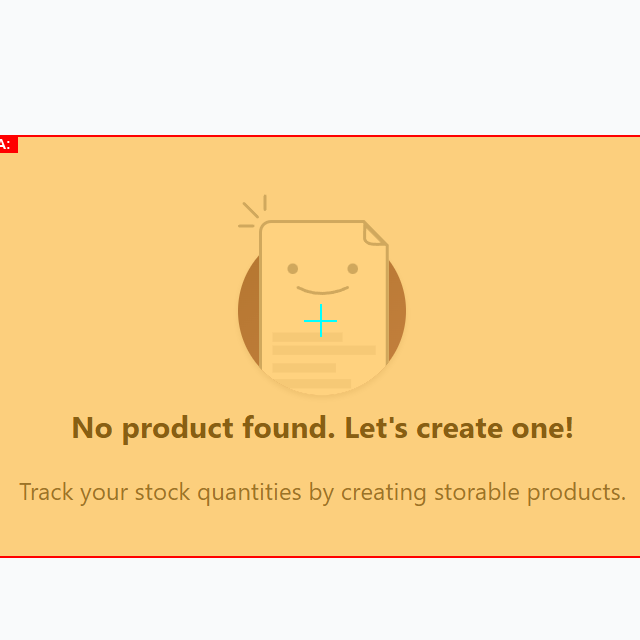

In [14]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVcgABAAAAAAB9lCiMBGFyZWGUWNh9AABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBdkVBQUFHbUNBSUFBQUI2T1V4a0FBQmVLVWxFUVZSNG5PM2RmMXdVZGY0SDhQZXcvSFQ1cFFHaXBLd1NHTFpxa29wblFQNEFyUVA3UVZlaWZNMHJyUXhQMHl6TXkveVZwV0dXV1pxVjVxbm56NHJ5aEN0RjA0QTg4UWVtYnBvUXVxZ0lBaUUvNVlmQWZQK1kzZG5abit6eWE1Zng5Yng3R0x2TXNwK2RtWjE1elhzKzh4bW12dUVPQVFBQUFIUnhkdFp1QUFBQUFFQTdRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkVMOHIxNHFLUzh0cmF1dXMzUkFBZ0E2RVRBTWdjalcxZFZsbkx2NTA3RXh4YWJtMTJ3SUEwSUdRYVFCRTdzclZJdTZIbXR1bzB3Q0FtQ0hUQUFBQWdCZ2cwd0FBQUlBWUlOTUFBQUNBR0NEVEFBQUFnQmdnMHdBQUFJQVkyRnU3QVFEUUF1NWliQ0lLSFJvc2RYRzJkbk1BQUd3VTZqUUF0cTY0dEp6Ny8vNjAvMkhjUEFBQVk1QnBBR3lkajVjblg1NUJyQUVBTUFhWkJzRFdTVjJjeDRZTlJhd0JBREFObVFhZ0MwQ3NBUUJvRVRJTlFOZUFXQU1BWUJveURVQ1hnVmdEQUdBQ01nMUFWOUtLV0NQdGhzdS9BZUN1Z0V3RDBNVllHbXU0eTZaOHZEemxBMlNkMFQ0QUFDdGg2aHZ1V0xzTkFHQ3htdHE2bnpMUDhHbG1ZdFJmTUJ3ZkFOemxVS2NCNkpMUXR3WUFRQWN5RFVCWGhWZ0RBQ0NFVEFQUWhTSFdBQUR3a0drQXVqYkVHZ0FBRGpJTlFKZW5FMnU0bTNnREFOeHRrR2tBeEVBWWEycHFVS2NCZ0xzUnJ1VUdFSSthMnJyaTBuTGhmYndCQU80ZXlEUUFBQUFnQnZiV2JnQUFkSkxhMnZyQzRySWJOMHVyYjlmZHJxMXJiR3EyZG90c2thZTdOQ0owc0xPVG83VWJBZ0FXUTUwR1FQenE2aHN1NU9iblhMNXU3WVowRGZkMGQ0OElIZXprNkdEdGhnQ0FaWkJwQUVTdW9LamsyT2tMVGFqS1dNSzdoMGZFeU1FTzlxaGtBM1FseURRQVluYnA4clV6aWovNGg3MTczdVBuNitYcjNkM0YyZG5SUVdMRmh0bW1nK21uaS84czUzNzI4ZW9lTVdLUXZUM21Fa0NYZ2FNUUFCdDE1VnBSelcyenJzcjJ1Y2RUS25YV3Y5YnBlbUVKSDJqY1hiczlOQ2lvVDIvdmRtNmx1TGk1ZHVNelRYSHByY3lUaXZBUmd5UVNqSGtCMERVZzB3RFlJa3VIQXc0ZEd0eXZqNi93bWRyYSttT25MM0EvOSs1NVQvaUlRZWdnMHFLYTI3WENoMFVsWlJrbnowZUVEclpqR0dzMUNRRE1oK01QQUhHNjhFZCtjM016RWJtN1NSRm9XcTJvdUN6enhIbHJ0d0lBeklJNkRZQXRHaHMyOU1yVklqTW45cm5IMDhmTFUvak03ZHQxdVZjS3VKK0hEdzVDb0dtTEd6Zi9URDl4UG1MRUlHczNCQUJhZ0V3RFlJdWtMczd5QWJKV3YveEdTUm4zZzUrdmw1K3ZWL3UwNlc3aTY5Mjl1cWF1V24wcTZrWlJhZVlwUmRnd3VYVmJCUUNtNGR3VGdBamRLQ3JsZnJnWGdhWlZCZ2NIQk1oNnUzWno0Wis1ZnFQazJLbmZyTmdrQUdnUk1nMkFDRldyTDVqcTZkM2R1aTNwdW9ZRTk5ZUpOVmR2RlAvdk5PNTVEbUM3a0drQVJPaTIrcHFwYnJpWnBTV3ExYmMwZDVVNms2RllrMTlRbEhVR3NRYkFSaUhUQUloUVkyTVQ5NE9qQS9yTXRZbCtyTGx5cmVqRXI3OWJzVWtBWUF3eURRQ0FLZnF4NXZMVndsUG5MbG14U1FCZ0VESU5BRUFMOUdQTkg4b2JpRFVBdGdhWkJnQ2daUVpqVGZiNUhDczJDUUIwSU5NQUFKaEZQOWJrWENrNDg5c2ZKbDRDQUowSm1RWUF3Rno2c2VaUzNyV3pGL0tzMkNRQTRDSFRBQUJZUUQvV1hQemo2cm1MbDYzWUpBRGdJTk1BQUtod3c5SVFVVjUrb1luSjlHUE5oZHg4eGFVckhkczRBR2dKTWcwQWdFcUFmMi91aDdNWDh2aWJQUm1rSDJzVWw1Uy81U2c3dEhrQVlCb3lEUUNBU29DL0pxWWsvNUI1OXVKbEU4bEdQOWFjLy8zS2hkejhEbThsQUJpQk1VWUJBRFJpSHd0TC9pR1RpekpuTCtTZHZaRG42OTI5cDNjUDEyN09VblY4NFU5UjlmVHFmck9rVEpoN3psMjhiR2ZIM0IvUXQvTmJEZ0RJTkFBQVdtSWZDL3ZsMUc5NStUZTRoMFVsdDRwS2Jwbi84bDkveTJNWXV3SDk3KzJZMWdHQVVUajNCQUNnNitGaEQ0eVBHQ1k4cjJTUk00cmMzTXNGN2Rza0FHZ1I2alFBQUFiNGVuZVBmU3lzK25adGRVM2R6ZEpiMVRXMU5lcHpURHEzN3hhNlZWRlYzOUJJUkFVM1N3TDcrM1ZtZ3dFQW1RWUF3Q2pYYmk2dTNWeDh2YnViT1gxUlNkbkI5Tk1kMmlRQU1BYm5uZ0FBQUVBTWtHa0FBQUJBREpCcEFBQUFRQXlRYVFERWhtVlphemNCQU1BS2tHa0FSQVdCQmdEdVdzZzBBT0xCQlJyRUdnQzRPeUhUQUlnRUgyaVFhUURnN29STUF5QUd3a0NEVEdNanNDQUFPaGt5RFlCSThJRW0vOUpsYTdjRkNIRUdvUE1oMHdCMGVYeHRobVhaOHRKYnU5Yit5OW90QWlLY0J3VG9kTWcwQUYwYnY5ZHNibTVtV1hiUHVtM2xsdHhFR2pxS2Vya2cxZ0IwR21RYWdDNU1weHROOG1lN0x2K1dpOU1lTmtKWVA3TjJXd0R1Q3NnMEFGMlZNTkEwTnpmL2tuTDA1RS8vWTRnaHh0b3RBNktteGlhdWNvWllBOUJwa0drQXVqQytRblA1dDV5VWYzMnJxdEJnNzJrRDdqVGNVVjdNdzVWb0FKMEptUWFnUzJJRjZ1dnE5MzM1TlJIRE1FUU1NYWpUMkFDRzZJZXZ2bStvcnhjdUtXczNDa0Rra0drQXVoNVcwUCtVWmRuOW03OHV2bjVUOVRSTDJIWGFBcGFvOUVieGovL2FKMHd6aURVQUhjcmUyZzBBZ05iZ0QvM1AvSHppMUU5WkRFTXN5NmdyTkIxYnFDbTlWVmxlVVZWenUwNWlMK251N25wUGQzZG5KOGNPZmNlMjYvdzJNMFFNMGRtZlQvc0hCd3dPRCtIU0RJTWFHa0JIUXFZQjZHS0U1ektxeTZ0Uy92VWRxUzhjNXY1bG1BNHNCdnllZCszM1A2NVdWdC9tbituWHgvZUJJRmtQVDdlT2U5TTJza3FiV1NLV2lDRTJiY2YrZ01GQnJvTDNRcklCNkNBNDl3VFFsUWpQWWpRM042ZHUrNjYydW9aaGlHRVk5YjlNeDlWcEx1VG1uL2oxZDJFNElLSXIxNHJPL1BiSG43Y3FPK2hOMjhoYWJlYTZOaEhEMUZiVnB1MUk1YTZCNG42Rk0xQUFIUVNaQnFDTDRZczBpcXl6djZhZllsbGlXUkpjTXN4MjBJVlBOYmZyY2k1Zk4vaXJncUxTNjBXbEhmR21iV1RkTnJPcXprMnM0cGN6djU5VW9LY3dRRWREcGdIb01saHRhYnRTU0t0Q1EwUWRXS2NwTEM3VHFYWUlGUldYZGNTYnRwRjEyOHlvTGtKakdJYU83ajJncy9nNjlLMEI3azdJTkFCZGc4NVpwOE43ZnlpNVVVeWE0ZHo0ZldSSDdTeHYxOWFaK0cxWnVTMmVlN0oybTFsUzkzUDZzN0EwL2R0RE9BTUYwS0dRYVFDNkRQNFF2Nnk0OUtkdmZtVFVWUmwxYllicmV0cFJQVkR0N1NVbWZpdVJtUHF0dFZpNXphb1NtdXIvbWQvL1ZGN3lKK28wQUIwSG1RYWdDOUFaa09hbmJ3NXE5WjVSOWFGUlgvelVNYnRMRHplcHhNN29GcU4zejNzNjVGM2J4c3B0WmxsMWJ5ZHUyYkFaM3gvQmNEVUFIUWVaQnFCcjRJL3ZyLzJoUEhQMGhGYUZwbFBxTkg2K1huMzlmSXo5OXQ1ZTNoM3lybTFqM1RZem1qcU5xcmZUK2ZUVE4vS3VvbFFEMEVHUWFRQnNuVTZSSnYzN245U2puNUJPN3htVzlKOXJUNEg5L1B4OHZYU2VkSEYyQ3BFSHl1N3QyVkh2MmpaV2JMTmcwQ0ROd3ZwZlNnWktOUUFkQkdQdUFYUUIvSkg5bFF0NUYwNmM0NjVzWW9oWUVnd2R6SEtWR3JianhxZng5ZTdoN2lyTnZWSnc1WHBSWlZXTnM1T2o5ejBlL2ZyMHN0bEFRMVp0cy9wS05QVkRJcFlvNTlSditiOWZrUVgzeDhqQ0FPME9tUWJBcG1tR25XRlpsbVdQL2Zkbllsa3V0TERFa09BQk56VVJNUjE1WSs1dUxrNURCdllmTXJCL3g3MUZ1N05XbTFtV0dJYmxReWEvdkU3KytJdi8vZjM0VE1NSzdtb0JBRzJCYzA4QXRvNlBOUVdYcjE0NGNVNjM5NHpxZ2JwL0RZTWJjOXNLM2Q1TzZySk43dWtMaFZldTg0dlYyczBFRUE5a0dnRGJwZE9UNXZpQlRPNFJDZjZqNmxtajNrUGlydHkyUkt2UEU5KzloaVU2ZlRnTHZXb0EyaDB5RFlCTjQ4ODZsWmZleWo1eWdqL1cxNi9OYUs2eHNYYWJRWTNSWGw2YWE2RE9wMmRYL0ZtT0M2QUEyaGN5RFlDTjBpblNuRDV5bkgrT085Wm5CWDF0U1BCLzdDRnRodWI4RXNzWDBWU0RDckhuMGsraFZBUFF2cEJwQUd3WEszRG01NU5hUi96cU9vM3VLQ2lvMDlnUWJua0o2bXFDOHBvaTQ0eHcrVnE3cVFCaWdFd0RZSXQwaWpRWFRweTd4ZDF3a2J1RGtPQXFKMDBmR3ZWcnNIdTBJVHJMaStXZm92S1NXem1uTHFCVUE5Q09rR2tBYkpUd0lQN2NMNmQxanZKSnJ6YWp1ZTFUaDQxUEF4WXh2THhJczd3dUhEK0xVZzFBTzBLbUFiQjF0NnRxRk1mUHNlcCtHQ3lyVjV2aG4xTlZCTEIzdEFsNnk0dFZkYTFSTDhuZlQvNVdXMzNiMnMwRUVBOWtHZ0NiSXp3WjBkemNyRGorcTlIcm0zUnFONnJSM1ZDbnNRazZkUnErYTQydzR2YjdpZlBOemMwNC9RVFFMcEJwQUd5UjhIekVieWZPYVkwOW8vcFgwemREcnhzTjlvdTJRZEI3Um5qM0orSHl1blRxQW1rdmJnQm9OV1FhQUJ2RjdlU3F5aXN2bjg4MVZKdmhMNEFTM0ZaSWMvd1BOa0RZZTRhMEJoWG1sMWYrYjNuVkZWVUlOQUR0QXZkN0FyQXR3bjBieTdJNVp5NElod1ptR1laWWxtVVkxVjJFV0dJWWxpVmloUGVBN3ZTZFkvWHQyck1YTHQ4c3VSVWc2ejBrMkNadUJXVVRUV0pabGlGaWlkVzd0eWpEYXBaYTN0bExReUtHYWIwSXFSU2dWWkJwQUd5TzhGcVluRjkvVnhWaStMMGl3L2VaWVlqaGJzYk5rbGJLNmV3RzN5eTVsWmQvZzRqT1hzakxVOTdvNmQwOXdMKzNyM2Yzem00SFVmWHQycno4d2p6bGplcmJ0ZHd6ZWNvYlZzczBETU1Rc1l5aFRrNE13N0NxcFhibC9CK0R3eC9pU3pVSU5BQ3Roa3dEWUl2NFRIUDVmSTdxTWNPUXVoT0dPdDhJT21hbzZqU011ampRcVhwNmQzZnQ1c0xGaU9yYnRkWDV0WG41TjN5OXV3OE9EdWkwWk1PbG1iTVg4blNlRDVEMTdwd0dHS0srYTdwT2xZYUV2V3RJcWZpRFg5d0lOQUJ0Z1V3RFlFTjBUanhkL2YxSzNlMDZUVzJHaU04ejJxVWJuUjg3bTJzM2wvR1BQTVJWYTRwS2JuRlBGcFhjS2lvNTVkck5KVURXdTZkWDk0NElOOVczYTIrVzNLcStYWGV6cEl4L1g3NUpBYkxlQWY2OVhMdTV0UHY3bWtrelVKQ21vTWJxTFRwcXFLMHZ5TW52YzM4Ly9vVUlOd0N0ZzB3RFlGdUVsOEFvZjcrczFYdUdpQ0ZXVTZFUmxtbUkwVlFGckxFM2RPM200dXJ2RXVEZm0rdkl3cDJLSWxXL2xqeHVncDdlM1YybExtM01OM3lPRVo1ZzBtbUpqWFRyWWZuc29qUHVzMmJSTVVRc3d6RFhMdVgzdWI4ZlRqOEJ0QkV5RFlDTllsazIvL2ZMREtNVFV3ejBudEdyMEZoemoramF6ZVhoWVE4TUdkaGY1MHdRZDA2S244WlY2aXp0NXNLSEcyazNGeUp5bFRwenYxV2R4cXFwcTdsZFczMjdqb2lxYTJwcmJ0ZnFGR04wQlBqM0hqS3d2eFVMTXpxMHV6eXhETU53QlJqdDgxQU1FVjNQeWNkMVR3QnRoMHdEWUhQNFVzMjFYQ1dyZlo3Q2FPOFovclNHcGl4Z1RhN2RYSVlFOXcvdzczV3o1RmFSdWdjeHIvcDJiZlh0V2lMZDUxdjNSaDEzYnFzZENDbzByT2FxTk5YbGFudzU1a2JlVlhTcEFXZzdaQm9BVzZIVG1hYm82bzJHMmdiVldDYnFhMlFFWFRJNG10cU02dmpmbG5hSS9BbXBoNGM5d0owektpcTUxV0s1eFp3L2E5TTVSa0N2S3FONm1nUmRwQmhpR3VvYWlxOFYrZnBydWpNajNBQzBBaklOZ0EwUmRxWXB5THZPSGRYcmp6MmpHdlpFNi9wdWxtV0pZVmk5QzJ4c0JaOXZTTkFucHJwR2RUYXFSbjJ5aWZ1dHEvcFVsTFNiaTZ2VWhZaGN1M0UvTzl2T3FTVnpzSUxlTTRMbHhUS0NPZzAzMG5DUjhvYXZmMjkwcVFGb0MyUWFBRnZFc3V6Ti9BTER2V2MwbDg2UXdUcU43ZThNdVh4ajdWWjBBa2JRMjBuMURQK3ZzRTdERWx0eXRRaGRhZ0RhQ1BkR0FMQXRmS25tNXJWQ3dXMjJWYmQzNGtzMndscy9rWG9pSXRZYXd3aURNZXFiY3BQKzhoSk1SQ3dSbFZ5L2licytBYlFSNmpRQU5xcTBvRVF3bG9udTVVOUVKT3l0b2RXUDJQWUxOWGNIOWZrandlRFA2bVhGWHc3RlYrREtDa3V0MkZRQWNVQ2RCc0FtNkhRUXJxNm9xcW1zNGdveTNMRStWNXZScnRDbzc4MU5MS3V1MExDRTQzeGJvYjdRU1djd0ljMzkxRlZMbFNXVzJOckttcHJLYXAzVndBcU5CdWpLa0drQWJJWHcxRVBaelZMVkhiYjVmOVIzNWhiZWhsdDltMmYxWGJyNTIwQ0REUkF1S3ZWZ05hUmVVb0tscW42NnZQaFAwbDROQU1BaXlEUUFOb2RsMmZLU01uVnZETzRaN2hla05YaXc1Z2YxRHBBVlRBSTJSMU9oNGYrbmZwcUlwWXFTY2tRWmdMWkFmeG9BMjhMdDFjcExLd1QxRnQyeFp6VDNmT0p1K3F6Nmw1OEVoUnBid1YzVHBGa3NnZ3Z3ZFM1UVk0aXAvTE9TY01vSm9BMlFhUUJzQ044RG82cXNuTisxNlk4OW95N09NRVFzc1F3UnFYN0psMnZBTnJDYTJveFdpWTFoQlZsSFBXVjFlU1cvQXVBTUlrQXJJTk1BMktLYWlpcmhZTUhDc1dlMHJtOFNWbWkwTHFRQm0yQk9uWWFmNW5aRnRUWGJDdEQxb1Q4TmdQWHBYTzNDc214TjFXM2pZOCtvdTlrSWU4L3cvV3JRb2NhV2FLNU0wKzlEdy9KVHFQNTN1L3EyVHU5Z25JY0NzQWpxTkFDMnFMYm1OajlZc09IYURCRUpCaGhXbFdtczFWd3dSTHV3cHI3d1NmMHJWZjFHTUJ4MGZVMmRsVm9LSUJMSU5BQzJRbmlNM25DN2p1OGdvejZlMStzOXc5ME5TbGl5MFhRZUJ1dGpWY3VMWlZqZHhNa3kzQy9WZmFSWUlvWWFhbFdaQmpmb0JtZ2RaQm9BbThPeTdKMzZCbTVnRTgwdXo5RDFUWXlnQ0NBb0I0Qk5VTmRwRE55RWl5R0daWFRyTkhmcTcrQmtFMEJib0Q4TmdFM2dkMmJjRHczMWQzVHZFYVRUZTBiWW9VWXdWQzEyaWJaRnIvZU0rbWxXK3dlV2lPNDAzQ0c5TlFFQXpJYzZEWUF0YW01dUZoN2xhNDg5bytrOW8rcGFJN2pQazlZZG44RzZ0Tys4YmZDZTZjS2x6RFkxZDNJREFVUUdtUWJBRmpVM05SR1JzYkZuaEwxbldPMVRVeXdSZytON0c2RmRsUkgybmxHZk5kVDBrU0tXbWxsa0dvQTJRYVlCc0VWMmpCM0xza2JHbmhGYzVTVG9qWUU2amMxaGhPUFRDRWFDMWhyc21lRlREanBEQWJRUit0TUEyQ0xHVHV1U0p5TEIyRE9DVVduNWJobGFVS2V4RVlLeFp6U0QwWEQvMVo2TWlGaVdHRHRrR29BMlFaMEd3T2F3TEN1eGx6UTNOeHNlZTBhcktzTWY3VFBFc3VyeGhzRW1DTzdJclg2R0w5U29hak5hVlJ5SlJJSit3UUJ0Z1RvTmdDMnlkM0JValJ1c1BzNW5TVFY4RGF1NVhiZmdlRjk5bnlEU0hvZ1dySWhWTHcrdElwdnFkNm9KU0wzRVdKYTFkM1N3WG1NQnhBQ1pCc0RtTUF6ajZPeEVEQkhERU1Nd3BQcVhZUmlHU1BVdk55V3Blczh3Nm44WjFWUmdmWXg2cVhFTGt2OGZhUzB2elZKemNITEVzZ05vQzJRYUFGdmszTTNKMk5nenVrVVl2a0xEVlFOUXBMRVp1cjFuQkkvNCsyK3pnb2RPM1p3NnZZMEFvb0wrTkFDMnlNVzFtL3BZbm50Q2MwMFR3N0thM2pPcy9rVk9PTkMzRlZvakRPbmNvMXRuU29ZaEltZXBTeWUzRUVCa2tHa0FiRkUzTnlteExLdmRrMVF6OW94MmJZYUlCTDJKY1o4ZzI2RVplNFlFb3o3enYxWVBMY1FReXhMRHVMaDJzMDR6QWNRQ21RYkFGa2s5M1lSWHpUQ0NPbzJ3UXFOZHA5RytFZ3FzVHpQMkRNc0s3OThsbklMN0QwTkUzVHhkcmRCR0FCRkJmeG9BbThBWFY3Z2YzSHU0Rys0WG82blFxTW8wd3NGUHdPWUliOW5GYW5yUkNKN1ZjUFYwSTcwMUFRRE1oem9OZ00xaEdNYTloNmVnL21KaTdCbjlMamVHZTJ5QUZhZzcxR2d0SW42Y1p6NjdxUHZadUhYM1FJNEJhQXRrR2dCYklid00yOU83aDJaUEtPdzlvejA5eTdLTSt0WkIvRTJoREE4dURKMlAxYnIwU1hNR2l0WGM4SWtFL1d3OHZEMjUxK0dDZklEV1FhWUJzRDR1blFpZjZkSHpIdTNlTTRaNy92SjliaGhpV0FZVkd0dWlmd3NudmtLalZVOVRweHdQbng1NmZ3RUxGTUFDNkU4RFlGdTRZM1NuYnM1dTNkME5qajFqc1BjTWY2eVBJbzN0RUk0OW8vc3I5Yi84QW5iMWRITnljVUtGQnFBdGtHa0FiQkhETUY1K1Bvd1dmdkJaYmdyK1lpaCtpR0hWdnlqVzJBaCtzR0RWUS9XL21zR2crVUdpR2FaSHIzdVFaZ0RhQ0prR3dJWUliMjdnM2NlWFZkSGNHSWhJYzR3dnJNM3d0eFppMFozR1p1aGMzeVNzelFodTNhVmFiajM4ZkFoM3R3Qm9HL1NuQWJCRkRNUDQ5dTB0MkxjSnhwNFIxR2xZd1NDMWdwN0MxbWd4NkZIM2R0TFVhVml0SVd1MG52THU0NHNvQTlCR3FOTUEyQXFkZ1VsOFpYNWtwUGNNcVo0VDlLRmhTZnNpRzdBNWZIMk52NFc2Wm1CaGxuejhmUW1EMHdDMERUSU5nQTNoenpzd0RITlBMeStwdXl2ZmUwWlFxbUYwKzlCb2J0MU54R0IzYUVNWTlVMjY5SllYbzE1ZURNTlFOL2R1M1h2ZXd5OTZMRUdBMWtHbUFiQUp3dDBZdjFmckhkQkhVSHJSSE5UcjFtWllWdDFOUXpnbUNsZ2ZxNzZ3U2QwZml1V1hIci9VV0tLZS9meElMODBnMlFCWUNwa0d3RVl4REhOdm9ML3EraVpHZlgyVG9FTEQvNDgwRlJyTjlWQmdkUWF1YjlJc1J2NTN4QkQxdnE4UEVneEEyNkdQTUlCdEVWNjkzVGU0SDJuZnoxblZMMWh3dDJmVnY0ejZKdERxMFlUTlVWdGIyLzRmd05wY1hGeXMzUVFWN2o3cWdydXA4d3RKc0x5SWlNZ3ZxSy9XVmZzQTBDcklOQUMyaU51MytmcjNkdXZ1WGwxZXBYMk5qTzUxTktxcm54ajFKVFNXRUZtc2NYWjJ0bllUTkJqdG9wbjZlaWQrTWFvdVVaTjZ1bnIzOVVXYUFXZzduSHNDc0NFNlIrb013OGdHOXRjWmU0YmwrMkdvL2hVK3JScjN4THFmQWpqODJETTZJOUtRZHVlYWUrLzNGeTV4aEJ1QVZrT21BYkFWK3QyRUdZYnBQM2lBMW5VeW1qNDBmUGNNcmYrcSttaUFEUkF1SHEyZU5kcWRhL3psOStsSEdjUWFnRlpBcGdHd09jS3VGUUZEQmpBTW96djJESDk5RTZzZTc0UjBwZ0Jib0w0ZWpiUjZSUWxHRjJZWk84WmZIb0RPTkFEdEFwa0d3TGJvbklad2NIUUlISG8vdytqWFpnUkRuZ2hIR2NZUnZ1MFFYTm1rVTV2aG4rZzNPTkRCMFVIbmhLTjFXdzNRZFNIVEFOZ2NSbHRneUVDdHNXY0UzVFJVZlRTMEt6U0c3Z01OMWlDc3pXaHUyQ1VZVFlpbGZrTUNkUmEzdFJzTjBJVWgwd0RZRUoyRGRXNG5OMkRZQS9hT0R2ellNL3E5WjNRcU5OZ3YyZ3I5Q2cyamVZS0lzWGUwRDNqb2ZqN0tvRlFEMEViSU5BQTJpajl3dDNld0R4NGg1MGNTVmxkaERQU2VVZDhIR29VYUd5SzRsenBwZDY2aCt4NEt0cmUzUjRVR29MMWdmQm9BbXlNOGF1ZjJkZ05IRGxiODhxdnd0dHpxR3p3ekRFTXN5MDNjbWx0eVN5U1NkbXc1Q0tuN09Xa2VxNWVYS3NBRURSOG9MTklnMlFDMEVUSU5nRzFoR0c3c1dkVk96czdPcnJtNXVXOXdmNjgrUFV1dUZqR01lc1EyOWJEQkxNdVFwamJEalRWc0xoY1hGOXNaZFZkOE5BTTdxeDd6eTR0bFdlYWVlMzM4QnZoeml4aDloQUhhQmM0OUFkZ3VQdFl3RERObzFJT0dlcytvcjRoaTFLT2ZjQmRDZ1EzUXVoZVhidldON2crVjZ3Y2FBR2dMWkJvQVc2UnpMWXlkbmQyZ2lJY2NuQnlGMDZoN3o2aHYvVXpxTzNhRHJUQndQUnIzcjRPVFkvRERnL2xBZ3hOUEFPMEM1NTRBYkk3TzZTZU9rN1BUNElpUTdFUEhXWll2eEdpZDJSRGVWOGhNZFhWMTdkbnV1NGJaZDVYUzZqM0RQMG5FM3Yvd1lFZG5KLzAwZzFnRDBCYklOQUEyU2ovWkRCMGJlanJ0T0dtdWZSTDBvZUY3Q3JNc2EvWitrV1Zaa2QzRHNoTTRPRGlZbldrMHZXZUVUeExSb0lnUXBCbUFkb2R6VHdDMlMrZkVoS2QzOTBIaEllcm50WDZyN2xHRGZhTk5FZlI1RW93cEZQendZSGN2VDV4MUFtaDN5RFFBdGtoNCtNNzFwK0dFUklZU3FXL3ZUTnA5Tk5UUW9jWjJhTzdGeFk4b1RPeWcwU0g4QWtXcEJxQWRJZE1BMkM1R2o3ZGZ6MEhoSWNUdkNMVnJNOElMYk1EcStOb00veDlpbVB0SERiNm50NC8ra3JWMll3SEVBSmtHd0VicGxHb1k5WFcvd3g5OVdITjlrK3BmNGUyNk1ZNndyZUJ1eHFXK0pSZDNneWYyd2NnUmpPQVNiaFJwQU5vUk1nMkFUZE1KTkhaMmRqMTYzak5zL0NpdENnMC9CQXJ4OTRFRzY5TjBjMUlOR3NRTUdUZmMwNmNIdnloUnBBRm9YOGcwQUxaTHYxVERHUkVkN2lKVmpmK3JmU2NoQXplQkFxdlI5S0VoSXRaWjZqTDAwWkVHVHpraDFnQzBDMlFhQUZzbkxOVndYS1F1SXg5L2hLL0thTVlURmp3QjFxZGVLRnhKN2FHLy9zVzVtNHRPNzJDa0dZQjJoUEZwQUd3YW8zZjdKNVpsV1pZZE9tYkVwUk8vM2NpN3BocWZobVZaSWtaVnByRmdOMmxuaHdPYkRzT05GY1N5TE1QNDl2T1RSK0J5SjRDT2hVd0QwQVV3MnJkdTVvUTlOZWJyRDdhUittN2RETXYvYUM3Y3c3SmpNWXo2VnR3MDR2RXcvV3Vka0dZQTJoY08wUUJzblU2dkd2NVkvOTRnV1Vqa1NOWFZUbnpYRFJhOWFXd0l0eXdHalhtbzEzMTlVS1FCNkdqSU5BQmRnL0RnbnQ4N2h2OHRza2N2YjhGZHVibmJRR00zYVJPNEM1NjYrOTRUK3VRait0MW9rR1lBMmgweURVQVhvSDhCRkxlRGxFZ2tqendUeFErQ3dnMkRna3FOamVBR3B2bkxVNDlJSkJLRC9ZSVJhd0RhRnpJTlFKY2hURFA4RHpMNWZjTWZleGgxR2h2RUVEMDRma1NmZ2YxMUZobUtOQUFkQkprR29HdlE2U1lzUE9oLytNbXh2UVA3a21aZ1lkUnBiSUx2ZmZlT2lBazN1TWdJUlJxQURvQk1BOUJsR09zc2JHZG5OeTcrcjA0dVR2eXd0ZFp0SnhBUnd6RGhreUtGeXdobm5RQTZHaklOUUJlajM2WEd6czd1bmw3ZVk2Yzh4dC94eWRwdEJIS1ZNTjE5dmZnRmhFSDJBRG9CeHFjQjZFb1l3UkI4Uk1RTndjZjlPMkNFdkt5bzlNUi9mekYvbjFsYlc5dlkyTmhoamUxd2JtNXUxbTZDWVk1M0dnY09DUkoybzBHUkJxQVRJTk1BZERIQ1BTSzN2eVR1bWllV0hUbnhrWXJpOGt1bmZqUC9yOTI1YzZmOW05Z3BiRFlaMk5VM1JJd1pwbi9XQ1hVYWdJNkdUQVBRSmZGMUd1NGhxemIrK2NlcmJwVmJzMlYzdC9yYjlYLzV5eUI3ZTRtZE5xUVpnRTZBL2pRQVhZL09OVkRDdmpVU2U4bUVGNTYwZGdQdlhzMk45VzZ1M2ZUNzBPQmFKNEJPZ0V3RDBDVUpPMmNJT3d2YjJkbDVlSFh2NStWaDNlYmRuYTVmdVNaMWQ5VlpIT2hHQTlCcGtHa0F1akNkamhyOG1ZNmc0SDY5M0xwWnUzVjNsNnQvWEhXUU9xTVBEWUFWSWRNQWRGWENNMUQ4cnBRdkR3eCtNTWpMeGRIYWJieGJYUDBqMzhuZFJXY1JDTHZSSU5ZQWRBSmtHb0F1ekdDczRYZXJEdzBibUoranRIWWJ4ZTlxYnI2VGV6ZWROSU5BQTlENWtHa0F1alpHNzU0SndqMnJrMGUzL0Z5bHRkc29abGYveUhkVVYyajRtWTkrd1FCV3dkUTNkTlhSS1FDQXgxM0lUVVROQWsxTlRkeS9EVlcxZmUvejEzOVZiVzB0OTZvdXFsczNLL2NadXBaMzFjSFZtY3N4T2tVYVVnZE42N1lRNEs2Q1RBTWdFcXlBZnF5NWM3dStUNzgrMW02anFGeFhYcmQzY2RRUE5PZ2FER0F0eURRQUlzRlZYSXpGbXVibTVxYUdPOTdlWGc1TzZEamNWbmZxRzBxSy81UTQyUnZyRkl5elRnQldnVXdESUI0dHhocUp4TTZCbFhoNGVWcTdwVjFZUlduNUhXcHFhbTVHb0FHd05jZzBBS0ppTE5id3lZYUkyTHBHMzc2OXJOM1NMdW5tMVVMV1NhTGZGeHVCQnNBVzRMb25BRkhSdnd5SzMvdEtKQktKUk1Jd0RPdG9kLzN5Tld1M3RPc3B1SHl0MmRHT241TjIyb01GSTlBQVdCM3FOQUFpcEZPdDRRczIvRW1vNXVibTV2bzczcjQrRG80TzFtNXNGOUJRMTFCYVhHcW43a0JqTU0wZzBBQllIVElOZ0RqeHNZYUltcHViZGM1RGNmbkdqbUZ1bDFkNytuUzNkbU03Zzd1N3U1MWRheXJUSlFYRnJLTmRjM096enNrbUx0RHdsMjBUQWcyQXRkbGJ1d0VBMENFWWhtRlpsdnZYenM2T0g0ZEdlSTF4YzNPemszdTNzcHQvZW5yZkZiR21GYTVmdVNaeGNiUmpXZUhKSnY2a25qREtJTkFBV0IweURZQm82ZXhsdVlxQ1RyaGhHS2FicDF0RHc1MzY2bHEzSHU1V2FLV3RLaTBzWVIzczdMczUyZW5oTWczT053SFlHbVFhQUpIakN6WkV4QmRzR0czTnpjMk9yaTdscGJjODd2SEVIcnFwc2Ftb29Nak95ZDZ1bWZRdmJrS1BZQUNiaFV3RElIN0NXRVBHazAwM0Q3ZUdPNDIxZDAwUEc0T0tydDVnbkIwa3pnNG1hak1JTkFDMkNaa0c0SzRnakRYY3oyVG9QRlJ6YzdPTHAydDlmVU5EVGQzZGRpcnF6OEtTWm5zNzFsSENFQWt2YTlMSk5JUU9OQUMyQ3BrRzRHNWhzRnJEUnhuOVUxRTFWVFhVekVvOVhLM2I3RTVRVVZwZVcxL1BTb2hwWm5YR0JUWjR3VFloMEFEWUpHUWFnTHNJdHljV0poc2k0dmJaT3JHR1pWbkcyYW01dWJtcW90cU9ZYVR1VXV1MXVnTlYvRmwrdTdhV2xUQjI5bllTUVlneGVMSUo1UmtBRzRkTUEzRFgwVDhQeFQwVXhocStoR1BYemJtNXVmbDIxZTJteGthMzd1STVHMVYyODg4N1RZMU5ER3ZuSUxIVFBzRmtvaTh3QWcyQUxVT21BYmdiNmV5YitSRER4eG8rMDNBLzJEbmJTVmlIeHFibWhwcGFMMTl2YXpXN1hSUmZ2Mm5uNG5DSGJXUWtqSVF4SEdYMEw5VkdtZ0d3ZlJoSEdPQ3V4bmNUWnZVSVJ4L21INnBHOEt0dmxMcEt1MWJacHFxODZuWlZEVGxKK054bW9qQ0Qzak1BWFJFeURRQm8zVWpCV0xJUnhocnVCMGRIaDhiYkRaNzNkSGZ1NW16dFQyQlUzZTI2aWovTEpkMGNHaHJ1Q0lPTHdhb01UallCZEduSU5BQkFwRjJ3SVpQSlJ2Z0R4OG5Sc2JHMlh1cm01bW96RjBuVlZGVFhWRlZMWEJ6ckd4cUVZY1ZncGpIV0N4aUJCcUJyUWFZQkFBM1R5Y1pFck9IWTIwdll4bVlKMmJsM2QzZDBkdXJreGpmVTFWZmVxbXltWnJLM2EyeHMwaitScEJOb2tHWUFSQWFaQmdCMHRaaHM5Q09PRVBjU2UzdDdhbWJaeG1ZbkowYzNUemVKZmZ0ZmtkRFUyRlJkWGxsZjMwRDJkbVRITkRZMjh0SEVXSm94aUpCbUFFUUJtUVlBRERPWWJNaEl4T0hEamM0RS9Nc2xFb205dmFTcC9nN2J4TnJaMlRrNE9qZzZPVHE1T0ptVGRab2FHK3RyNnh2cUd4b2I3alExTnpNU1J1TGswTmpZMU5UVVJJS09Mem9aeFVTVTRTY2dwQmtBRVVHbUFRQlQ5Sk1OdFpSdmRBS056Z3VGZjVQRGRXeFJCUXp1dmRSdnlHVWw0Y1NNWGdkZW5aaGl1aGlqLzNKQ21nRVFDMlFhQUdpWk1JV1lFMjZFejVCZXNqSDRnd242NGNOWW1pRzlaRVBHb3d3aHpRQ0lDOGJjQTRDVzhmdCtWdnUrQ296Z2RwZ21mdEIvU0laeWtvbjNKWk9CaHZUeWpmNEVCbjhBQURGQnBnRUFDekNHN2hoRmV2ZjZOdjJ2d1I5YWZGUDlIOHo1bDFDWUFiaHJJTk1BZ01VTWxtMFl3VzJrRFBiQ01mZ0R0UlJyVEpScXlIaDgwWTljNW44NkFPaWlrR2tBb1BXRTRZYTBJNFh3R1dNSnhwd2lqYzRibWZtenNXY0FRTVNRYVFDZ0hRalRnMDYrSVVIRU1UaWxwWCsvRlU4Q3dOMEFtUVlBMnBsT3F0Q1BPRHBUbW4vdXFYVVRBTUJkQXBrR0FEb1dRZ2tBZEE0N2F6Y0FBQUFBb0IwZzB3QUFBSUFZSU5NQUFBQ0FHQ0RUQUFBQWdCZ2cwd0FBQUlBWUlOTUFBQUNBR0NEVEFBQUFnQmdnMHdBQUFJQVlJTk1BQUFDQUdDRFRBQUFBZ0JnZzB3QUFBSUFZSU5QQTNlWHF4bWQ4KzhyVi8zOW1vOUxhRFdxRnhzcnplMWYvYmN3bzFhZm9QeXI4OVVNbDFtNVV1eEREMGdFQTY4RTlMQUc2bElxc2hST25iMUVLbm1tc3pEMWJVR3V0OWdBQTJBelVhYnFNdzNQbGdrTll1ZThMcVJYR0pqMjBBQWU3SWxXd01WNDcwSUJ4MmwrWkJZYzd2d1hLcmVIcUJvUnZMT2o4OXdlYkkxZ2xmUHZLZmVlbVc3dEJZb05NMDJVZGVuZmhnVXByTndKYXBiNHk5OWl1cFhHUHgyeXliRDlYdDIvMTBuT0N4L1orWVUvRVRwa2NPY2k5ZmRzSEZxaXJ1Snk1ZmZYZklxYmo0S0VGamZVbDV3NXRuQnMvWUFGMjVOQlJjTzZwNjZwTS9zZTcwYWZlai9hd2RrUEFmTVhwQzE5NGM4czVWUmdOSEczWnEzL0pPQ1I0RlB4bTJ0ZHpBOXFyWldDeGtpUHZUcG1kZkw2eW5vaUlnaU90M0J4YmRuRkwzSUtseHk1emM0cGlyZHNZcTVMMUcwU1VhKzFXaUJqcU5GMVpmZXByUzlLTm5vRUNHM1Q3U3VhNVZsZlhDbkxQQ2g0RlJFVWowRmhWN2FWZjFZRUdUQ3M1eVFjYUVBaTg3MTVyTjBGc2tHbTZ0b3JreGN1T1lGdHhWN0ozY3JKMkV3Q2dUZXp4Slc1bnlEUmRYZW5PMlIrY2FyUjJLd0FBQUt3Tm1hWnJHaE01anYrNWNsZjhPMmROVEd0WTJjV2RheGI4YmN4b2Y3NEh2bnhDZU56aWpVY0s2aXo1TTFxWGxrUnR2VXBFRlpkM0xwOCtJcEI3OHFFQlk2WXZUZFgvbStrSmdzNy80UnNMaU9wejl5Nklrai9rMjFmdSsrU3VxMW9UMTE4OXNuWHBDL0dEdU4vMmxmdjJIVFZvUkh6OG11VHpaU2FhVm44MWRWMThqUG9EOWg4Vk5YZlhLUlBUYTEwc0prODRaTWx2T1RXWEQyOWNyRFZMQTBjUGlsbXc4VmdwOFNPdlJLd1dua3JQZlcrQzFxeHJvVzBUbGw0U1BIbHA5UWhqN2JGbzRiYjJneHRZOVBVRnFjdW5oNnNXazdGRno3Rnc2WFNheHNyemV3VU42L3ZRZ0JIeENSdlRyMm9WUXdzMlJzbDkrOHBIdkhkUjhPVEZwUkY2bHpqSnBtVmNWUlJkVlJSZFZXVE05Tk41bDRTNHh3Y0ZxbWRnLzFHRFJzVEhMMDgrWDJOQlkrdnkwamN1bUI0K2JCUy9JUHlIVFlpYXV6V3pTRFdCOW5nL0N3NFRVVm42cXJqSC9mdktmZnMrOUpwMlY5MDZaZnJHQmZ6aWsvc0dqZzZQVzczek44T25TdXZ5c3Jhc1dmQzNNUk1HOU5lc1kxRXZyTk9kWHJYK0pDUUxuMHhPTUhveFduM0I0WTJMTldNdjlSMDFhTXowcFhzdlZsaCsyRmFuVE4rNGZHN1VDTzJabzk5Q2p2YmxTTng2WG5GeVZ3Sy9KZ1NPTnJXS21yWGFjTzROd2luampvUk0welc1eDZ4Y0Zjby9xdGlTdU9xY2lhbTFOVmFlV2hQdisrQXpyMzJjbXBsWHF2blNWUmJrSGt0ZU9tMkNMR0p4YXBHSjE1dFNuN2MxWnVqanIyM0tVbitaNnl2eXNqYStNa0gyNU5aY1UxdWwrdHlOL3hmK2VxcXFkMEpOQS8rTE9tWHk5R0VQalppMmV1T2hzeVdhdmd1VkpVVm5EMys4T09yQjBYL2JlTlpBajZLS3M2dWVIRFhpbFM4T24xTi93TWJLODhudnhrUXMrRytIN0RnclQ2Mlo3aC84ZVB4N3lWcXp0TDYwNUZ6cTByMFhPdUl0RGV2SWhXdGFmVkhxOUljbVROK1VsYXRhVEtwRlAzSGpaZDFKTzN2cG1DMHZPWDdrcUtqWEJRMmorb3FpczhudkpZd0lqbCtWM1U2WEdhcmZKZm5ZNVJKK0NUVldsaFNkUGJ4cDF5OW1EcDVZY1hiVjA2TmtZeEtXN3NyS0xkWTByTDY0NEh6eTZwMEtZNjlLVDRoSVdLdnEybEpmcC9tZVZXWXVmMXdXa2JCMEY3LzRpT3BMYzQ5dGZlMnhVWU5lU1MzUit2SVdiSG42SWRtWTZRcy9UczNNSzlDa2pjcUM4NGUrZU8yeFVTT1daTFd1azEvRnNkWGh3UlBpMzB2T3pPTS9VV1ZKWHRiRzE1OFpNSEpCc3ZucmJYM0J6bGRHeXlJU2xtNDZkTDVJZStZYyt1SzF4MFlOaU45NnFvVW1WcDVLZW1iQTArOG04MnRDZlNtM2loN1dmNkZscTQyVHMrREtuRUg5L0FqYUZUSk4xL1I3QVUxWnZuUXcvN2hnN2N4MTU4MDZsS2s4L1Byak1SK2JyT3NvazZlUGl0K1laM21yYnFVa1BMSGE4SW13N05VeEpvcEoxM2JOMHpya1ZjdmJPakZpY1dxeGliY3N6WHd2UHV4MTdZN1NqWmMzeHNldnpUYlV6YWd5ZGVsR1EyL1VKcFdINXo0ZTgzR1dEWFJyNnNpRmExcmpoWSttTGtnMXROTS8vOTRycTRUbHBjNWVPbWJMMnhvMVp2RmhZeXRiNDltMVQwNXZoL25XZUhiaEU4YmZ4VXdWNlFrUHg2ODlhWEhHT3BUMFpyS0JGMVVlbnZ2NDN6YnBSVSsxa3RRRk9sK3hlcE05bzY5dW1aNnd6K0syVlJ4YU1DTE8rSkZQY1dwQ3BLRThvYS94OHNhbko3eVdXbXJxdlRKV3g0eGJiT0t2VmV4NzkrbFBEYTJLbGFueHJ4L1NLajIyY2JXUm1HZ210QWF1NWU2Ni9HWisrc2EzRWF2UGM0K3VmNUd3TVNiakgvMU52NlprNTd6NFpPRzMzY2w3VkdTVXZ4TlI1Zm5rUStjMVI0MW5sNzY2OWE4cDAvcGExS0xpaStlSnlDbDRYR3h3VDZxL2V1UlFacEZtMjFleEpXbkxLenVlOXpYd3V0enR1d3c4MjNoMjRSUHFUNmRxTFBlWHFTNC9LL21ZWm1TWGtyMkxsMFVmK0hDTXFyZmQxVTBMdEFaeFVYOUduVmUxbDZ1YnBtdlBVaUwzSWVPaUEzb1MxZVgvbXFxKzNNTW42dlhOZmFxb09PM05KYW44b2JqM0UyK3RldFNiaU1pdHY0K0o5NUQvZmZOblVVUWxxVXZlVGVhM25qN1JLNWRGY2EvcUt5ZnE2SVZyV2w1cU1oSDVoc2FPOFhNdStYWG5JZUVPc21ESHZvdHZKZ1p6RHpwNTZaaXI4ZUtxcVlLVnpUMWk3aWV2VDMvQW5XNzl1dkxGdVR1VjNMTVhsNzZiT3ZtcmFBL3lHdmYyMmo1VlZQemo2b1g3K0RiN3hTNTdJOXFIaU1qamZpOWo3MU9YdW1XTFlIZmY5OW5sbStkRytEb1NVZVdsekl6a0hWbG10TFZnWTN5Q2RqUng4aGdjSHYyQU8xSDkxZjlsWkNxTjVZblVMZHNOUEZ1eGI3Rnd0VkUzcWY1UzhydlQzMU5GbVlya2R6OTdJZUxOd2NMWE9RVkdUbnRoYXRTNEI3eGRpR3FMMHRmK1k3RjZSdEhoOS8rVis4U2NRT0pYM1RPZnZiTDFGUC9TNGRNMnZ6Q1VpSWo4VkgreUlqVkJPSWlvTFBiRFQxK084bldxL1NQMXRaZFdaM0lmcURKMTRlZC9QNkZla1l3NTljNEwyaXVZKzZESXlFSGVSTGNMMGxLek5BV240dVNFZHlMUGZoRGhiT2lQSE42WHFuNWhmYzdoMUZQQ3lISWc1Yjgxa2JGU0lySjB0WUhPZ0V6VGxjbW1iZmhuU3JpNndwR2J0R0R0WTZZSExEbjc0UkxoUmpQNHpiUi96eDJnN25qL2J1bk9seDUvN1pCNmczanU4OCtPVFZzNXlySVdPWTE2NjlDL0p3ZXFWcXZLdzNNZkYyd3V6KzVNS1hoK2hwRmFxMC8waHp2ZWloM2c3dHhZWDVKZjVVWlVzbmVkY092dkVidjJ4QWVSSHVvVmRtWDI2cGdudDZyN3BwVHUvRGg1NFpqSjNrUkVaejliSXp6QTB2cU1IMTc2WW1MVU9xMmMxRWFOV1orOUwzdzdyK2dQZHF4LzFrK3pvU3c3dTJwZkhSRTVCNFJHQnhBcEMxWUpNbzNuQXhIUjBXWVVuMzJEbzZPRGlRcXVyUlZrbXU0RHgwVkhDbkpKaHk5YzB6eGlONXhZRzhGdHVKY2NXREQ0eFZRK1JKWDhmcm1PZ3AySk9udnBtSzB1OWZPMTF3V3QycmRCOVQzeWlmeHc3MXM1STk1VjdZOFBKYWNXUjAveGNRcU1pQXdrdW5ydGM5SmtHdmZCWXlLalpTMjhVWEdoTUxmNXhUNFhPMGgxTWErWGQyei9zTmhwTGJmMTJMOVdDdmZaUHRFZmZyTjhpa3h6K1V6RnlYWEpSdStVNFRUczFRMWJab1o2UzZtdTRuSnhMUkZkL094OVRTY3BweWZXcG4wUXlTMUU3NWtiTmw4YjliZnQzRHBUOE5tM1o5OGNQSVNiekQzOGpaUTkwNGIxRURZajlzTlByNmZGZktGYXQ2OW5ITDQrSi9CZWZ0VjFUQ1ZCcHVrVEdoMGRJV3hXN3FaMW1vNDFUdEdiOXk5WFJRQ2ZhZDk4Y2QwL2JoZTNMbDM5TXZsVTRsdkRUTXljNHVSVld3U3gzajE2Yy9yNzBYdzdWNXhkK3JmNGplcXFZY1hlejNlOUhtSHdLSXNvZU9tUnIyZHk2MERqeTJzZmUxeFFhN3lZazBjMG1NamkxWVo3NE9YVGgwaFl1WVIyaFhOUFhWdmdqUGNGWjZBdXJuclZaTGVWY3orbkNHckdmVjlkcnRubkVaRzkxNVRGTHdkcUhsZW1aRnA2SW1ESTByVjhvQ0VpOTNIdnZqRk84T3Z6Q21ORjJPQ2wzN3cvWllDN014SFpPM2tIZURsVGZjWWg0UjQ2Y3VXN21rQkRSQjRoYnl3Vmp0eVZuWlhCZGE3TXk4b1VmRWJ2bVl1RW45RjV3RXRMcHJicm1MdEhrN2NJM2k0dzhhdk53a0JEUkQyR3ZQbDhxTzZyT2tLSEwxelRJbGUrRzhFZmlYcE1tREpGZUkzcXRWSlZFdXZrcFdPMnc0Y0VuWjlIVFk0WEhoajRQaGltcWFGbFpacmZjYzBRbjE3Q0NGdXc5c25IWDl1ZWxXdEp2K0REZTNjSlptSHdtM3ZlRndZYUl2SVlQdWY1Q04xWGNaeGlQL3BtZnFpM2xJakkyYU4vWDEraXZJeFV6VjdaZmNwemtjSnl3ckFSSS9pZjY0LzlxdTdHN2pkbHNTclExSldWbGx6S1NrMU4zYmg4OFd0ZlptbjY1MUJsdVFWZG95Nm5wbWlpbnRPVUtWbzFqU0VQaG1rYThlc3BwYWsvVlBlLzlFekJ3K2gzbDBjTGc1ZkhrS1VMb2dXUHp4NHljc2JZK3gvTFovTHJnSDMvZUsydmNNRlY5WEZGcTFZYkp3L05PdTdYMTFSNUZsb0RkWm91enI3L3pJL243Qml6VGxXeE9MYzY0VitSYVRJakV4Y1dDRG9ndW8rTDBLdml5aDRNYzZKYzlkZTg1RVlKVVF1VlhpMEJqNFRwSFBSSWc0Y0gwR0UreVJTVmxoQjU2Nzh3OHU5LzEyMXp3ZFVyZ2tlaklzS2x1aThhUENLVWt2bmNVMUJjUWlRbHVwSW52TEFvNmk5RGRGN1Z0NDhmVWJ2ZFUrTHFIOEtUTE1IeFQ3Wnc3cThEZGZUQ05TMWc0Q0N0QmVUbEx6TjBNTnE1Uzhkc0JkZCtGenc2dG5oUTM4WEdKczFWRmhDMXZsK25jMlJNTkIxSzVSODNYdDc1MXZTZGI1SFR3T2lGQytiOGZZeWZ3Vk1od3FibS9pWjRORGdtMW9LTGFQeGVlVUh2Vkl2V0VxbmM4clI4aTdGWFg4ckxKVkxWQmN2T2JsbWV0T28vWjQxZmpxVFo4WnZoZW83Z1lLZCtTN3l2MFVaY3pMbENKRFA2aDY1ZEUzNGZROGY5UlcvMGw4R2hZWlRLNTU2cmhhVUdsMmI0RUsydmhyZVB3Wk9KYlY5dDNEMXhWNVAyaGpwTjF4ZncwbGVDYzh6bmx5L2VlYzN3aEZldkNML3dmdjRHd29XWHY2d05MVEV3Q3B4V0ozK3FyakpZRlBlK3Y3L2VwbHhyTTBlK1h2cU5OYmlodWFyVUNobEIvWXkzdGozay9pR3NkdlFQdE42Z29CMitjRTB6YndEQVRsNDZac3M3Wi9hNWdMbzJqZ1VsamZ6dys1ZUc2UjFMMWw5SVhUcXR4Y3NEaVNndlI5alUrL3BaMGlrcVdQOHFZdTFRYnBvNkR1ZHRqWG93Zm1HeWlVQmpJZVVWODA4NDFqV1orcTMyeC9IcXFWOEY4ZkV5cXpKaVZ0ZmRUbHh0d0d5bzA0aEI0TXpsYzNjK296NnptL1hhRXNPVDllM1huNGpmQnhma2wrZ2Y4V2h2TWR1QldadGdUM2Y5bzVWN2d3S0lUQlo0dEhlUUtpN2RoSCtxc3R6OFkzNUphd2IwOVBIeEkrTEw1cVUzaTRtc1ZFeHUvY0p0MVFkdm5kWXZuWTdsM2RlSGlLOHIyTHQ3ZTdrWm03U3ZYcjNRVWg0aGMxSXVQbjE0eTdwVmExTFA2NXo2eUY0ZDg4NkRsNWJwbHErRVRmVVJOdFZZNGRNd0p3Kzl4dnYwOGhPc051VGs0K2R1OURqWHk0bUlTTHRYYkVEMDB0Zi8vdGZoM2g1U0x3OXBlb0xPT0RSbTh2YnFLN3dGa3BPWGQzZWo2NlNQbzZtLzFQZSsva1Q4WnNIUTkvSDZsZmE3MTFJclY1dHhheFZGYTl1dEVhQURtVVlVN0lQZjNQaFNjc3dYcHNadEk2SmVmdDVFNmpNVWxZZlRMOUp3N2JNUGwzNFZubzBPdk4vQ3dhRXVuVGxWTTAxcm81K2RsU2I4Z3hiYzNNU3ZiejlCcGptV25sRVRHNnUxUmE0L2xXV2dScUpkdkNuSVBGMUtnNFhQVkdiK3owZy9rbjRCZ1lJTjYvay9DaWhTVXlzK24vMnJ3UmY1M251dklOTms3VXd0bmZLODBXdGVPbGFyRjI2clBuanJ0SDdwZEN6dnZ2Y0pkazRCTDZlbXRldEZZZnFjL01iTmZIL2N6UGZyaWk0bWYvSEJ5azFaL0huRGlwMHBwNVlOTWQ0TlZydXB4NzVOS1lvMTBzdlZMTTY5dlowMEZSaUtYblZnZytsYmNaNUwyNkhwZnhPOUkrMzljZncrcE5WeFFYcHZYNjFHTEQrLzFraUhvSmIwNlNQTU5GbUgvMWMvNVFtdGVGUjMrb3l3SmpUb3ZyWU1EOVBwcXcyWUFlZWV4R0x3bkEwdDdrMEhoc1lJdnVCWFAxNnNOWEJDNCtXTjg0V3B5Qzk2aktWZitFTUwzeEtNWTFGL2VlM2lyY0pPSG1HaDVuYzNjUW9QRng2dGF2OWxvb3BEaXhjZUVEeWVFUFV3dDIwZEhCb21lUHJVZTZ0VEJYMFZTL1l0WG5iRXlCdmFrL0Q4Vis2MmJ6WGovWlFkK3V4THc1Y1plNCtORk81K1RpMTVaWlgycUNGMXhlbExQeFYwZHU3bTFsUDRMdjlyNWVoa0JyUjY0YmJxZzdkU3E1Y09VY1d4MWFwaHBrZk0zZG5PNCt0NERSOHVXTlV2YlZsMXlLd0trb3RXZmZGaXhvbVdYM1YxNytxTmdqWEUyVGQ0eXVMTnlZbUM3MFY5cGNsVndpdHFndkI3Y1hiaGpIWGFnOXZXbHh4YXZUYWR6RFV3VkpoaGt0ZTJkUEtyV05CdHk4bGRtQmZPNzl4cC9CU1NoNGR3MHN3czdWR3M3aDgrV3RpSVQxbzlEcEJ6YUtqdys1ajZsdllnTkJYcHI3MGxIQ2M3TXZJdnJYd2pJbXIxYWxOeTROMm9RTGx2WDduL28rOTIwQUNZZHpQVWFjUmoyTnNmUC85dC9CWVRYeXY3MEZjV0JHOVp6aDhLWDF3NjVxSDEzQkFtdHdzeWY4elNHc2s3Y3M0ckF5eHVRMFZ5d29Cam9iRmovSngxUm9NZ29nRXZ2ekxjZ2ovbC9lekxVOVlrN0ZSL25JcmtoQUdwcXZGcGJ2NTI2TERXM2EzOTVzNk9WTzJZZlNKaVIxSG1NZlZ2NmxPblA1akJEVkJ4OCt5aHd4ZU16NTE3SHh6bVJKcHpBZGUvaUJwNU5uYWNvUThpNUJzNzc5blA0L2Z5bDQ5ZVhQdjBxTTlrb2RGLzhYUG0yeG03WVNrL3ZZK1gxcEhja2NWaFQyZEYzVWRYeXg3ODhNdkpiVHJJYS9YQ2JkMEhiNTFXTDUzaTVPbHhXMVc3ektKRHJ6M3hidEN2YituM1NqSHBVTUtJQ1FaT1hBVC9QWFhyNU1ENGw4TStYcXl1WTVVbXZ6RG1mT1MwRjU0ZUdIamZnMzNyTDV5LzFsRDhlMXJxdnRMSWJadG55alF2OWRhNmlJa092LzU0VEVaRUVCVlVoQ3pmL0x5UjQ0R3lFMHRmMzdwKytMVFg1ajhkYzU4N0VaWC9rZmJaWHNGWjFBRURBdzIvVXYybTJ0OExPdmRGeklPNys0NEtEK01HSWtyTk9GOVpIL3ZWR3liL2hvQTA4cFhudlZMNTY1L1ByUTRmbVQ1bFJ1eTRBZjBIUGVCMDllVGxpdnFDa3lrSGQzbS9mT245Q0NMdE01WDF1NlpQYzFzNUsyWVFYVHk4L2ZPbHFTYmlyNWYvQUNMKzJwL2lyVEZSQlZOR3VOODg2L1RDajIrTkk2ZllseVl2UExCTEhUOHVMaDB6T21YeTh5OUU5QXNjTXRENTZxODV0K3F2blU3N2RxLzNtNHEzeGhsNUF4V2Q3Mk5sYXZ3ZzFRcEdKWG1wUjdYNkFQWDl4OHV4YlR1VDJKclY1dEs2NkJkVjkzNnB2N0JyK3N6KzU3K2ZiUGJaUTJnWk1vMkkyQTladVdWeTh0TzdUQnpuOWYzNyswdFRubG1xR2NXMXZ1Ulk2czVqZXRPNVIrLzRxTFdEUkJWbEpSc1lRaTk0NlVZTEM3UFNpQ1ZyWTlOZVNOWWNGOVpmUEx6THdMbUpRZi84VERBYW1OZVVkOS9ZTWtZNFdGL2wrVVBKL0VNUGQvZUtTb1A3emlFdnpQVGI4ckZndTF5cytTQ0RCZ2VmUDJmd3RJalR1TGVYVHptYXNGTndsVWU5TWl0WmFleFRoWVpOb0oyQ0NsUEp5ZFNkSjRrR0REVDJBdk8xZHVHMjdvTzNUbXVYenJrczRZa3pxdnoxMUhVYUpyUG9yZXNyaWd6dGREMGFpSWg4WTFmK2MxZTRaakRyK3R4RFh5elV2YXRYc081cG1SRVIwWlNzdVlpSlNrL3RTejVGRlBoQUMwMHBPYmwxWWR6V2hZWitOZTRmVDdYd05kSC9YbERsVllNTDJqekRYbHNlKzYxZ0VML2lySjN2WmUzVW1ZZ2ZOMEg3STFka2ZKR1E4WVhxZ2J1WFUyV3BUZ2NoTmI5eFkveVduaFBNLzd4RE8vT0lLUG9GN3VIdzJSdGkwd1JqV1pXZTJyWDZsTzVtSkpwYXB2OTkxRnJCTkFhL3NlTzFObC8zMTRyVjVscUJWZytCN0YvUDBlUVdnaHBZQXVlZXhHWDQ2eHVlTlhrR3lyNy96RzhPYko1czZoeVFSL2diS2IrOFA2NFZpV2JBbk0zL05MaVo2UC84N3MwekxleWNRMFFla2NzenYzOWpuS2xldC8ybmZIazBiYWIyeHdtWTlzMVhzUVlQZmJ5ZjNiRGpIMFpQcUFXKytwbGdzQit0VjMwejEvZ2M4NGo0OFBDT3BlRm1kcU54aW4zTDBnS0QyVnE3Y0Z2NXdWdW5kVXRIKzZRVnVZK3dNTkMwTEhEbTF4bXJJaXc3WXBaR0xqSFZuOWRTWG1ITC9yUDVpWmF2N3VXK0YySHRkUm13UjhTR1h6YlBEREN2cTdnMDhrT0RRK0s2UisvWTlyeUpOQlk0ODYwcHByN0k3dVBXL3VlYkdlMnhzbkhmeHpHbXZvOTluMTE3L3Z0cGdlM3hOYlI0dGVuanB6V1hRaDQwOU0yRDFrT21FUm1uY2N1V1R6RzlzYlAzaW43L1A4cjB6U3RmalJ6a3E1blV5YWQvMk9RM052OXc3TktPYWNOYVdhSnhHalR6Ni9OZlRnc0xVUDlaOS81aE01YW4vZnFmbGFOYXVRSDJDSm0yNC9peHRNL2VtREtxdnplLzFiVjM5eDRjT2ZmZHpTZHkvL1BoQkFNYkw0L0k1ZWQvM2JFeWRvajZKVTRlQWFFelB6dHc4b01JVTl0VisvNHp2ejJ3NDUvUmcxVDlCSnc4QWlMbmJqMXc4b09JRnVhSHg1Q1pPNDVlK21INTNNZ2gzcG8rQnU3ZXZrUEd2Ym84YmJGMmgwZlo1SlJUd3JZUnVmY1BpM213ZmE2WGF0M0NiZlVIYjVYV0xCMmYyTTI3cDNITmM1SkZmcmp2RFZPRHliWlc0SlFONXkvK1o4Yy9ZOE1DdkRSN2VIdDNiOThoNDJhOHNlUEl2NFVubmpoOW45OXg2ZHUzWWdmejB6dDVCSVErL1pEUkhXcmZaNWR2L3VlMGNZUDl0RmJtZ05EWVY1ZW4vWHIwbStmMUJ6VXd6Q05rMmplL0hrdjc0S1Z4Zy8wMFkxRTZlWGtQanB6N3dkY3JSNXYzVnpSL0xuVHBrV1BuVTNSV1lITHk4UXNjRlQzM2c2L1B2NjlaaHowaTN6OGgvTWhPL2NObXJEMXgrdjF4UFhUL3FoWnB4SWUvSE5nOEl6U1EvL3RPWG9OaUl3UW4ydHpERnY5SGVlcnJEN1ZYWFhMeVVzMmZVOHZOcldkNERKbTU5ZWlsSDlZdW5Sd2E2TVAvS1NjUDN5SGpYbjNybS9UVEp6Nkk5RzYvNHdyTFZwc0JjMUsvbkR6SWlZaklhZURrelJ0eDRxbWRNZlVOZDZ6ZEJ1akNEcytWeC9PWGJ3NTQ0d1I2L2dNQWdKV2dUZ01BQUFCaWdFd0RBQUFBWW9CTUF3QUFBR0tBVEFNQUFBQmlnRXdEQUFBQVlvQk1Bd0FBQUdLQWE3a0JBQUJBREZDbkFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbXNTR0ZPK1pGVEhqMm5XUFdib2RJSFYvNWJNU0VlWHV1V2JzZGR6Y3NCVERJL0JWRGZLc1F0K1dmdnFQQTJnMFJBM3RyTjhCV0ZPNllOMm1iNlZVcUxPbkFuSkdkMUJ5QU5ydTJQeUZodThKMVROSlhyNHgwYWFjcG9VMGFqcS81UitMQkd2bkxTUnRpL2F6ZEdBQVJRcDFHemJWN0x5OVAvdjl1amtSRWJqMDhCVTlLSGEzZFJoRXJ1N2gvL2Z4Wkg2RkcxU3JtenozTTUwNVNXNUMrWTgzMCtmc0xyZDBRTXpVb3MvYXNtRGYzYTVRS1JLZXJyWXB0aERxTlNxOG5GdTk1UXZQdytNcG5FNC82UFpmMDBhUSsxbXZUM1NUbisrMTdGQlQxdExYYjBUVVpubnQ5Sm03WVA3SFZVMEtibEdadDNaYVZLK3VuL2F6anlQbGZwTSszVG90TSsvT1gzZXN6Q2dMN3RUd2xkREdHVjBYUlFwMEdBQUFBeEFDWkJnQUFBTVFBNTU0c2NTMTUrb3pkdWFQbnB5Y09PUDc1c25kU0NxcElObTlUMGxPOWlXb0xqaWZ2M3ZaZlJVNXBUUU1SdVhpSGpKKzhZRVpZTDcwK09GVTVQMjM3ZlA5L2N3cXFHb2drRGowQ1FtYk1uaDBUWktTdlRuWFdPeStzU2F1Z3dPYysyaHh2b0ZOaDl0cm41LzVRWStpM0RlbUwvMjlSbHZTcGxWdm1oYWlmSzFPbTdONjA1K2lWL0lvN1JPVG80U2NmUFhGVzNOakFIb0xYSFZzWHNTeVRSczlQWHhpcTlmZjBudWQ2VlVjdDJmdjIvZG5yRjY3Wm83eERRVlAzZkRLeGw1R1pWM1YyLzlwTis0L25sVmMxRVRsSy9ZTW1MRmdSSjNmaFR2T3Bwa2xiOW13YUVSRkZMZG43OWlqK294UWYvM3I3dHBSc1Jka2RJaUlYVC9td1I1OTdJV1prYndNenpiTFpxMHllbnJBN3Qwa2F0ZVRUdDBkSmpUU2NtM1dLN3paczIzcEtXVlpMNUNpVmg4WW16QTM1YmY2ODlVcS9XWnY0RTVSWjcweFlrMmFnTDdtQjV4dEtjdzd1M2JZbjQwcCtHYmNzWkkvRVBUZjNDYm1iUlBNeTdnVG9yRTBmUFNYSi9ITE5ydjllTEtscUlyZmVRWDk5WWM2c2NCL0JOTWJtWHRZN0U5YWt5ZUwyZkI3Ynk1SXBOUnFLMHpldCsvSmdUbjR0a2NUQlAzanNpL09uUm1qUGRtT0x0V1ZsaXU4MmJOdVVwYXhxMFB1K2xPNVBpTit1a0lRbDdaOHpVcUw5cXJ6ZGt4S1NDNE9uZnI5MllnOERmMVRUY3VFNjQramhKeDhkdHpnaHRBY0pQMnhNUS9LYXhDMW5DaHNjbmxxeFk5NXc0U2RLL2ptbnBzSEljbW5oeTg1dEpiZ3BsYnNuVGRoTlJLU2V0NXB2alhyMU5tY3A2OHcwelhvNGV2cmJzL3VsejlaWkQ0M09rL1JONjc1VWYvM2Rlc2hHem5qMTdYRit3c3NqY3JmTmk5aEdSRG9ibkliQ1l5bWJkdjJvV3NvU2h4NEJJWk1uVDMxcWxJOXdWVEN4UVRCbmJkZjVqSVpYREpNZnIvRG85dmUzL3BSOTR3NFJ1ZlVPK3V1ME9TK085akg5T2syYmh3bFdkZTRMbmpCUkxsekRUR3o4eVpKdFZGTzVZdC9tRFY5elV6cTRCWVhNZUhtbTNxVW5CWHRlTnJoTWpUemZWSjU3OE52MTMyWXFybkVycEtkODJOUHo1azhJTERXMUtsSmJ2cncyREptbU5SUWI1aVdtMUJBUjBaMkdKaUlxMkROMzNub2xPWHJJUm80ZjRVN2xsekxPWk85Yk4wbHhhODhHNFQ2K0p2dVR4TGtwSlVRT2JrRkRZMlNlbGNvVHgzT3l2anNaRnhOazZDS0k2cHd2RTlla1ZWQmdmTkpuaGdJTkVZVk1uTkRyaCtUYzlLekNlTzI5VWUySmc2ZUllazZJVVFlYXF1ek5DWXNPNURlUm80Y3NZbncvZHlwWFppbXk5MjJjL3NPUHN6NUptaVJyN2J4b1VudzBjOVYzRlVSRTFIREgyRlQ1T3hLbmJsT1NvM2ZJcURHOVhjcVZweFFLUmRadnBYSHlQblRQb0RFeGpuVGo3SkhzbTlScnlKaUhlaElSRGV5cGZxWHlRR0xpNXVNVlJDN2VJZUh5M2k2M2J5aXlzek4ySng3N01XYlJSNGxhUWNUQzJYdnpwMFdKdTNPYnBGR0xQbW9oMENqM0o4emVybWdneDU1QlVlRitUcmV1L0p5MVBlSEZNeUVtWDJSUzF2dnhhOUtJM0hvSFJZMzNjNm90T0oyVmsvYjU4dE4vdkxrM01VUm5LOWlnVEg1bDVlNmlQa01mR1NldnpNbE1WK2JzV1RHdk1QR0xGZU9rUkMzTlBRSHpwMVIvYXRXY2Qrc2RGQlh1UnpjVVB5c09MSnFSOWRTU1QrZUZxdHBvWXJHYTFxRGNuNUMwUGNkRk5uTDBHUGZhZ3ZPbmNyTDNyWnQwTkR2cHF6a2pYWW04SnNTRmJsK1VsWm1XTldma0tLMFg1cVpuRkJKRlRKeGdLdERvckRQRS9mMnNuSVJRNGM2amNOL3l1Wi9uRUJIUm5XclZtcXRlaFJ5bDh1RmpaTjNMTDJXY1NmdDgrYzlIcG03WGhQV1d2dXhTMmVqeFl3WlVYL241bUxMS1ZSWXhxcDg3RWZXUU9iVXdRMHd0WmZYbjRpSTRPWHJJSXNMN3VkKzY4dlBSZFpQeXdxS2FXcGpiUkpxakl6ZlowSmhRei9vYk9jZHpsR2tucnI4OXpzL3B2dENZOGJjcTgwNms1OVc0QllRK0V0Q05pSHJkcDM3ZnBvS1VoWXVTenRhUXhNRS9PUFNSM3QzcWJ5aU9YOHhhdnl4cjE3ajUyeE5EM1hUZXlNQUd3YUsxM2VTS1lRemZTUFVTUDUyVnMyZmxQOUpPdjdsM3Z1NWJHRkNSbFRSdFRVcXRkOGl3TVlOY3lwVlpDa1hHOW9SakdiTTJHTmd3Nm0zOExkbEdOUlhzbVp1NFB1Y09PVXJsdzhOazNjdVZXZGtmSlNaR21ORkdvNm9WSDgxZS90ME40bGRhWlpaQ2tmRmo5clFKZ1NaWHhWWi9lVzBjTW8zbGJ1N2ZjS2JmcktRNWs0WjQ4czg1OWhtellzbDB6U0hzM1BLVUpTOGxuVXplZlhiaXZDR3E1d3EvWGpZM3BZUjZUMGhhTTMya2FwUDhTc09Obi9Zb0hBeThTMVBCbnNSRjIvTW84SmtWYTUrVEdWM2xBMFpHOWt6ZXJqeWNraGY3WW9EbTZiS0RQNlkzVWE4eEl3TzV4NlVIM2w1MElKKzhuMXIrN3J4UXZ0a04rY21yWHYxY3NUNXg4d083cHNzTkhqTzFwUERiM1Rka2NSdmVqSldiMk1uVS92VGxOaVc1aGlYdG1qTlMvVWthYmlqeW5ZbUlBbU5lU1l5aDR5dVBaTjhrK1pPdkpBcjNZVTJLanhJM0g2K1Fqbng1eVlwWXpVeW95dHFjc094QXlvcVZBN2V0aVBGU3Q4U2kyVnVkOWM3c2pla1Ywb2o1Nzc4ZDdtbnFFellwUGtyY3JtaVFSc3gvZjhWNDFYRnpZb055Kzl6RUwvTk12YzRrQjkrUXVBMXZDR1phUTg3NkdZdjJIRTQrT0NNa1JtdE9Gbnk1Y24vVXdpODJxeHI1U3RVUEs2UFhua24vNnR2Y2NjOEZtcDU3MnN5ZmtrZ3o1Nk1XZmNUUG53VjV1MStabmZ6ZG11MVIzTnBpY3JHYVZQN3RKL3VEbmsvNkw3OU1tNHJUbGkxNEp5dnpuVTFqVStmS2lSeEhQaktVc3M2ay9aaTVZRlNZWU9WWHBLU1VrR1RvK0ZIRzl3RzEyVW42NjB4VHVXSmJSb1BXQjh6ZXRPTld6TUpQNXdvTzVjdjJyWnliVWtJQnNkdlh4dmx6ejg0dFQwK2F0K2pvOXZmM2hhOTlRalVmV3ZpeTl3aVpPaitFcmlWZk9xYXM4aG81YTM2c3NjcWxRQXRMbVloYklydHptd3l0aDJhTTFKSzdlM05hQmNsbmZMcmhHWFh0cDZsY2NiR0dpSHFFeGlXR1V1R09uUFM4R3QrSDR4SzFENThVR3hZbG5hM3BNV1RxeHlzbSttdm1WUFpIODFkOWQzak4yd08rNEdjTHg5QUd3ZnkxdmNVVnd6QlZJMGZQMzU0WXFxcjljSFBtNENmckk3ZndXMkJqVG0vWjdCYitabXBDaUxwdVZLUFl0Q3poYStYNnRmdWpkTXFCK2h0L1M3WlJpZzJMMXVmYzZSRTY4NnNsWTN1bzNrdTFFVzZoaVVZVjdFbGMvdDBOOG85NWM0T20vUTJGUHlRckpDWlh4ZFovZVcwZCt0Tlk3bUpCNEZ1TGhZR0d5TytwUmE5bzFlUWxudU1qaGhMVktCVHFheU5yTTlkdlVaSms2TnVmOEh0Y0lpTEgzbU9uanRlck1EY1ZweTFidEQ2UC9HTVdyNTBScEhza3BFWDI5Sk5CUkNXSDBwV0NKOHQvUHBKREZCUTNVY1k5VnV6YW5kMUU4aG5DUUVORWp2NnhiNzRXU2xSeFlQZFJyUTIrK1JRMytxMVlhVExRRUZGcGVTRVJ5UVlJVHdFNTlwWUhtbjRWVVZuSzd1OHF5TzJ4K1VteFdxbk9MWFQ2NG1lOHFTbG4rMzZsNmltTFpxK3FBQ1lkbWJCaWhmNXZqYlJCYTBwSDJkU2ttUkd0U29GRVJCVHlvczVNY3d3YUgrRkpsSFBtZDkxSmU4VXVFYVl1dDhjbVQvVWlLbFZrMzJqMXU3ZU0rOVM5bnRGNmE4ZUF1Rm5qcFZTUm1jWnRnVnU3V0lscTdneWRMdHdCa01RbmF1SDBDQWxWSGR5ZlhrdEU1RGg2NGxPdVJLY3lqdGNLWHBlZGNhaWEzTVpQakRCZUhzL2R2VG1sZ25vOXMwUnJuWkY0eXArZkdDS2M3bHFPWS95N2lWcm5KaFJidCtXUVpPamJTWEdhbmJmRU0rTEZXRGxSZG5wV21lb3BNNzdzbG10eEtiZHhQZnl6cEp4SUdoZ2tlSzNFVXk1dmFZeWNzZ09iVW1ySWRjemlsWUpBUTBROVF1WXRpdTFGbFAzdGo3bmFyekMwUVRCL2JXOTV4VERheUo0eHEvbEFRMFNPc3FrenhyaFJ6YUgwbHVOQ1dmZEhrMmFIQ0U2RVNlVXpFcWIySkxyNDQ3YzZ4eTE2RzM4THRsSDh6TlFFR2lKeTlJK2RQMnM0dFU3RDRXM3I4NGlHejl5ZzFYN0hYby9GUmZVMitjcldmM2x0SFRLTjViekd4QmdNL3JVRjJVZC8yclBoczNmbXo1c1UvL3hmMTV6Uit1Mlo3UFFtY2hzL01jcEVCVldsNW5qU2duZXlhbnFNbTc5aHR0eGtvQ0VpNnZIWW94RVNLanh5WExOeEtjMUl1MGdVK21pMDZ2aEErYi9qTlVSRG4zck1VKy9WamhHUGhoRlIrdWxXSGlqMEdqK3U1UUpQN3lDNUI1Rmk5Nm9kaWpJTHNsUEQ2Wk01Uko1UC90WEE4VmxnNUxoQW9zS1Q1MVdETHBnL2UxVUZNQWY1akJWSlQ3UTg3cG5pdkpFMnVBNFkxTFlpYlVOcHp2R2orNzljODltaTJTOU5taHcvL2V0eVExTkpSdzZYYVQ4akd4Qk1SQ1UzU3RyMDdxYWJkdnBrRHBGZjdBU2R0eWI1d0NETnpydVZpNVdJNkpHeG9ZNDZUN21FalI5RjFIVGxFbGQxa01oallyeXA2Y3pCWTVvL25aMStvb3E4bjV4bzlIaWRxQ0Q3ZUFsUlVOeVR1aTNYTXpSNnZLZldFem5aeDZ1SndzZnFya0plZzRaNkVTa3U1UWlmTlAxbHQxakxTN21ONjJIUXdDQ2ltdS9Xcmt1L1pzazM4RlIyTmxHdnh4NEwwZitPQjRUSHlvaHVadXRrYTJNYkJQUFdkak5XRENPTkRKd3dMbERuZllNSERDV3FVdVMwT0M1TFlHU1lYaTFOTmo3U2o2Z2tQMDk3ZHVsdS9DM1pSdjJtTURJenBmTGdWZzdBbUgzaURKSDBxZGl4TGU0bWRMWGh5MnZqY083SmNzRURBbldmcXNuZXNDaHhYMEVERVpHRG01ZlV2OStJaC93VUtXYzF1NTNDSzFlSWFPakFvQmIvdk9MTHhMUWJOVzdoaHM1VkcrUVNGaE8rTHYzb1QwZHo0Z0tEaUloeTkvK29JT2xUVC9KRis1dEZwVVJlZmpLRFI3ZDk3ZzBreXEwc2J5QnF4VWxkK1FCWnl4Tko1RE1XeCtZdVRENitiZm1UT3h3Q1J6MzlvcEVldnRwS3lrcUlxSi9NNENhN2o1K01LTGZpVmpVUldUQjd5MU9XTGNxL1FZSHhTUnVlTVdjN1VsQjR6WGdiV3EycElHWFJzcVRzY2lJaWlVT1A3ajZ5QjRZRzNqaVJubGVqTjZsbmI3MGpKMGNKRWRWVTYwL2Jicmc1WDdCK3hyUHJUVXpWeXNWS1JINytoZzRpSFNWRVZGNVVTaFJFeE8wU2R1OU9QNUxaTUc2c0l4SFZaaVlmcktIZzJLY0RETHhXN1hxT2tzZ3JTTzVsWWhvaUl1clRMMGpuNjhBZHVSNWRFM0hVOUN0Yi9ySmJyc1dsM05iMXNFZk1uTGQvWGZUT3NjeEZNeklkZXdZOU5YbkdjK05saHJ2b0N2eFpVa3hFZ1gwTkh2TDcrY3VJbE9XVjFWclBHdGdnV0xDMm03VmlHR3drMzd1NUZXUitCb3ExamhJaW9zS1NFaUxCaGtKMzQyL0pOdXJxZFRJNk0xdW5JRjlKUkVIeVlNdGYydm92cjYxRHByR2Mzb2FnOE90bGMvY1Y5QmdTKyticzJKRjkxS3ZGc1hYNm16a25sNVpYR3YrZ0FmVTNTc3JPSGZoWkdSb2pNNnRGSXllTWNUdDY1UHNEaWhlRDVFVEtvMGRLeUhYTUl6ckZKQmRIVSsvdDNOcFJrczA3LytJbWo5dncvYU81Qjc5ZHYrdW43SXpkaVJtNy9XTVdtMU9GSW5KME10RXk3UTlseHV6MURBcHl5TDlSazN2a3grelk2U0V0MTh3NFVyZjJ2QmFnNGZpYVJVblpOZjdqWmk1K0lTelFTOVZtcmtORE83NU5tM21IakpjYjNBRHpIVWpic0ZpTmN1TFhxRDVqWTRKM2YzVHlwNE5sWTJONlVNT3hqUFFta2tlRXQxd2RONzJxY3lTR3ArRTd5ZXJwZnc4UldmSmw3d0J0V0E4bFBsRkx2bmprUnRaM1grM2VkaXhuejlyRVBWdmtpVW1MemRuQ21QeGFTWjExZnFtN1FXaTN0ZDNKNUthRzcvYXVxNlhlMlMxdzFPNk5aN2dON2J1TnNwVEpkemV1STc2OHRnQ1pwdTJLMDQ4b2lZSm12QmtuN01sUlZsSXNuTWpKVlVwRWlrdEtDcGVaL25OdWo4ejVlR0Q1cXhzVVNZa3JuVDVaR0dYaXloUmV5R05QOWp5eS9XaVdZclpjZnZidzl6ZXBWNXl3d2lsMWRTVzZkaVdubHZ6MXQ0blhydWNTdVhtMC9ob2VjMGs4QXgrYnZ2YXg2UTNYZmxvK2YyTjZ5dkozN3ZzaXljRHBNSjVVNmtwRWx5N2xVWVQrOGRtMUFpVVJlWFRudm9IbXo5NmcvMXNTN1pvNE4rWEEzRVNIRFVuUHlWdUlOUTRrSWFJcnVVb2FxZmVIRzh5NTNzUUFSZnJSR25LZHNDQnhyUENZNzgreTh0Yjl1UTdBelhucFh5YS9NcW5GbzBxTEZ5c1IxVlFhNkJ2QkhYVEsvRFdIdko3UkU0ZCtkUEhNb1l6eW1DZm80SC9Qa0dSb1hBdC8yZVNxYnBwVTZrWlVKUnVUT0QvRStFUm1mZGs3UVB1c2g0NjlReWN0Q3AzVVVKNjk3YjI1WHl1U0VqZkw5azQzY1NiUDVOZUtXMTdTN3U2bTM5T2l0ZDNNRmNOQUkxMkhQNTM0aklGeWl6bnFxdzBVcWZPdkZoRFJnTDZtLzZZRjJ5Z3VIdVZjS2FCdzNRcHhhN2NrSnQvZEhLMzU4dG82OUtkcHV5czVlVVRrNDZWMS9GaHorcVRXK2ZjZUlTR0JSSVUvL0pCdHh1cnIvOFRpajUrVFVjV1pkMmF2U3k5cmVYb2lXY3dFUDZyT1RNdHV5RDZTV1NYb0hVeEVSUEpId3FWRVo3NzdvVnp2aFEzSGZ6NURKSTE4V0wxbDYrM2pUMFRLQXAyVDBOa24ydGhqUU1PeHo5Z1ZzME9KNlBpdmwweE82RG5xNFNDaTh1Ly9hNkN2VDJGNlJpNlIvR0Z1eEJHTFpxODBaSFpTMG1ncDVhVWtKTzdPYitGY3NrOUlpQ2RSUWNvUnBlNXZjZzZuNko3Z3YxZldoNGl1NU9zOG41MTlYUGp3bXZKU0U1Rlg5M3VFVHpZcC8zZlNkb28wbmdQazNrVEtuNCtYbS84YXN4Y3JFWlZyZDJrbklxS2N3OGxLb3A0aElZSVU1VGg2YkpTRXNvOWtsSlZtL0ZmUlF1OWdJaUtTLzJVWUdWblZXeEkwWUtpRUtDdkw1Q3BrMXBlOUEvZzhFQ3cxZXoxc2lhTm55SXhYWCt4RFZLSDR6ZVJyZXp3Y0tqZjJ0YnFXZFZCSkZCdzZ5blRkekxLMTNkd1ZRNnVSY25rdm90eGZzc3phVWhxU25wNVpwZk5VOVU4cEdVU1NvU01IbTM2cEJkdW9Ya1BrdllqeUR4M08xWm1aVGNxRGgzUjZsL3YxNmtORUJUazZTNmMwKzJlbDFycy9GT0puN04wdFlzbVgxOVloMDdSZHY2QUFJanFUbHNGL1N4dnl0eTE3UDF0N3FqNHhMNDZUVXZXUjVRdjNDL2VqRFRkKyt2SUhBNWRMK01jdjJmQ01qQ295RjgxY2Q3eGEvL2U2ZWswWUs2ZWFRNzhrLzV4UlE4UEhSbXYzSndoNU9qWlFRb3BOYjMyVVZTNTR1aUUvZWRXcW96VVVFQnZISDVySzVDR3VSTXI5bTQ1cXBxektXTGY4aHpic2NmT3lkSG9tVmxYWEVGRXZYMDBOeXIrdkgzRkhoQUk5SG91TjhhQ3FIOVlrSml1RnI2L0sycHk0bzRBOHdwN2pEeWtzbTczU2tZbnZ2eDBxcGJ6a3FYT1Q4MDNHb01BSmp3WVNGWDY5NGN1ejVacG55N0xlV1pSU3FGdUk5aHM2UkVwVXNHMXJabFdUWU1wVlI3UzJtSDFrQXlSRXlveEQvR2R0S2s5UFdyYTkxRlF6VERNNDk5b3laZURFeDBNa3BOajBudGFuSm1xNGtmblJDdlhOOE14WXJNWVVKcS9XV2hXNStVa1U4WDhUdGZvclNFS2p4MHZwWXRhMys3TVVSbnBpNmhqNWYxTU5yT3BONVlwTis0OGJmUkVSRWJtRXhUMG1wZW9qeTVmOVZDajhXRTNsaWgzTHY4emlIcGozWlNkVlh3cTZkaW5YMk5VNkZwSS9PVEdRcVBCclEvT3Q1Zk8vNVlvTTdhNmdUVFdWdFVRU24xN3FEVVd2ZnYySUtQZlNGYTBsNmpYaE9VTmZLeXJML21qeDdseVN4a3cyT1ZBUVdieTJtN3RpQ0FVOE9sVk9kSEg3RzVzVVZjTHZja054K3BvMTM1a1QrRTV1ZjBlNGhXbFFiay9jbU41RXZXSW50NVNoTGRsR0JZMkxsUkhkVEZtK0lWdlRUaU56UXo0b2lJalN0Z29PdWhxVTJ4ZHYxd2t2dldLbkducjNoc0lmZG11U3JzRlZzYVV2YjJGeVl1U0U1eGNkTG0vaDg5c2VuSHRxTzUrLy9sL1lybVdaYVN0ZU9oNGtmMFJHeWl5Rm90cHZWbHpvK2gxWmdza2NSODVmTWV0YTR2cXoyNmMrdWJ0SGdIeVV6TE15SnpOZGVTZnd1WTllTlBCbnBmSVpTNUpLL3BGNE5EUHhCV3BoeUNsU0QxT1drdndkVWNTWU1OMUNhcCtKYXhkZG1ib2k4N3ZGTDZWNnlFYUc5dVBHczhxdkplb1JscFFrSEJoUVB1MjVvTzgyNUtTdGZPbjRycUdQQkhsVzVtU21YL09jR2h1NlBUbUxXdWRtMXFKbGF4dzkvT1NEZzFRRFV0MjRReDVoODU2UjhaUDBHaG5hYTF0eTRlNjNKaWxDSG5LNTdqRHhvM21oUkM0aGlVbFRsYk8zSC84OE1YS2JkOGd3ZVc5dVJLeUtPK1FvbTVVMFo2Um1pMlBoN0pYNFJDMVpVVFo3M3ZxODNWTm4wL1pQWXYyTjdSajZ4QzZlY1h6Nkp1WDJ4SmUrN3gwMFV1NVhyenh4UEtmR2RYVGNKT1h1UFVxdGFlV1Q0MEorMkp5ZHNTNzYxTGNSNFVIdXQzSit6aTdvOFV4TTFPNlVOTTFVSVpQaVpTbmJsRjhteEI4TURoblUvZGI1VXpuNWptR3pZcTZzMzlmS2k0RU56NzIyVE9rMTRaMUZsNll1eTl5ZStOSWVib1doY3VVcGhhTHNEZ1ZNamVPbU1XT3hHdUUzS2I1ZjJ1S1hEdlVPR2luM294dUs0eGRMcXBxb3g3ajVDOGJybmdQbFJwWGN2cHVvWit4b2N3cnNXcXU2bjN4d0VEY0NXMkZEV05LTUZsNHFUMWd4NitLODlWa2JKejI1MlQ4NFpGRHZidlUzY283bkZGUTFVTXh5YmhJenYreEVOUFNSVUVyTE9yTm84cnlJOEh1cmJ3VXRXR0YwaUcyenFOZkQ3OVR6VGJVZWpvdWJsS2U3SHVxcCtlM2Z5eE5XT25EZkM3cDE1ZWV6eXFvR0NuenVPYzArZTJoSWhDUXpQV3ZkVXk5blBOS25wbkxnS3l0aS9YUytWdHc4cVZTZU9KNVQwMEFPOGhrckV2V3VVdEpqMGRwdXdZb2g0Qm16YlA2WkY5YWtmYjA4ZXA5VVBtU0VyRHRWS3MrY3lTdXZhcExObXR4U0E0bWk0aWNxTnlYK2RiZHNaR2cvZC9YTWNReWFtdlM4ck9VWFc3Q044cHUwY09yUHM3Y3JVbFpGSC9ZT0dhWWFEVExmeGNEYzZCRVQ5OVNPNWQ4cGs2YytuUkVTcWhwRnNINW83Rk5OeWQ4cGpiMjdwMXcrbEJzb01yZldiOWFtT1BWRWhsYkZGcjY4QmVrSGxBMUU2ZDlubEkwek9XQzM3VUdkcGgyNGpacnoxYUlKSWIycEt1ZE15bUZGVloreEs3WWtUYnBQYjZnM2lkK2t0ZXMzejUwUTB0dXhPdWRNeXNFangyLzVoRHd4ODgzSGpGMkFJeDJaK05HSzBWS3F5RXg4c2NWcWplcXFiSElkRXp2YXdJYkdiZFNjdlp2bXp3cVh1VFlvMHc4ZVNjbTRVdVlWRlBQeTR0Ui82NmFsSGsrcytIN1JoSkRlRGxYS015a0hNODg0aGlSKzh0R0xnd3lOWEdlbW9MR3p3bVgzVUhGMnhwR1VnMW01ZFg0UmNYUDI2THh2UU54bmk4WUV1dHdwVkdTbEtCcGMrUzJZYk9LR3JVbUpUd1Q1TzVablp4eEpPWGdtWCtJWEVUZG56N2Q2UTN4YU9uc2xmcFBXSnIwWVFKUzNlL3JjL1NhcU5mN1BKSDJYTkRVcVNGcC9JeWZ0NEpFenBkN1JDei9kdXpEVXdMVTFYaFBXYnBrL1NlN3QxbENRZnZESXdSeUhrYk9UTmo4L1FQY1B4aS9aOEhLbzNKWHlGVmtwV1FWdXc2WnUrR3BPaElmcG1XaVNzYm5YaGluZFJzM1p1MlhPSkxtZlU2MHkvZUNSbElPS2ZEdS9xT2ZtNzFtcjNqZWJzMWlOOElxWXN6MHBiaWhkU1R0NEpFMVJUcjJESmkzOGRLL0JDLzI0YTRhSjVFOCthdlJJWGIvbHFsVzlJRHZqU01xeEsvV3kwRmxMNGt4MGsxR1IrRTM2NUlzTkw0ZktQU2hma1pWeThFaGFYazJQb0FtSm4zeVJxRTUrNW43WnlURWljY1dzNGQ2T3RRWHBCN056SGFSdDZxbEtSUHJyWWJYZlV3cy8zWnRvYUQzVTVUM3k2UWtodmFWMzhzNmtIRHlTY3Jha1I5Q1llVWxmYU4xUXhTVnNRVkpjUkUrSEt1V1psS3dDNHRjTXdkZXFVSkdWY3ZCSStqV0hvT0d4Szdac01lL0tRY3ZXZGd0V0RDSFgwTGYvL2VtS0o0TDhYUm9VSjQra0hEeHkvQ2I1ajRwTDJyS2k1UTVoUkhSZjdHZWI1a1QzTERsKzhFaktTU1c1eXFKZVh2emQyb2xHajNOMG1MK05razNjc0hYeHZIQ1pXMU5KZHNhUmxGTzM3aGsvWjg5V1EzTkRJcC8zMVlwNTRUSTNVazNaSy9iTjdVdkNEWHdhemJ2WEtFNGVTVG1vS1BJS21qVDMxYjlxSmpXMEtyYnc1ZlViR1NsekpJZVJmeldqUzc2TlllcU5qMmNQWGN5eGRSSExNbnZGSmUweDUvQUMyc3JZUFZtZ2ZSWHNlWG5lK210RFYzeTdzTVVUQVhjbGJqMlV6ZHFTWk5iK0d3VDBiNzhGWFIzcU5LTFJrUDVqSnBGZmJLVE0yaTBCYUQ5NUdjbEtvdkN4Q0RTRzFWNDZyeVJ5SGZBQUFnMEFNbzE0bEI3WW5VVVVQRFlLTlFNUWtlejlCd3BKK3RRRUkvMkQ3bnBsUC95VVRrVEQ1QzEzbndhNEN5RFRpRVBOOFMrVEZTUjk2dmt1MXA4THdCUmw4dnFETlNTUG05WnlYeGpSeS81eVlYSjJxZkJhbFlheVk1dGYzWlJENVBmaVpHUStBQ0pjOTlUbFpYMDJkVy81UFNXSzdKdDNlb3llUDZPbE85QUNkQVVGM3lWK2ZOcnh6cG5zZ2lxU3pacmQwZ1hEZDRVN1JkbTc1OGJ2ZHVzaEd6cXNuM3R0d2ZselYvSXI3aEJKSStZdm5DcXpkdXNBYkFNeVRWZDNKMTl4SnQvUk95UnUranZQaFhUMVlhMEJpSWpJb2FGYW1aNUhickxReE1UWlp0NGhST3lHemxvNTFXbkhUOGZ5bE9rSGxVVGs2T0VwRDMvME9iSGNwZ2VnWGVDNkp3QUFBQkFEOUtjQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREZBcGdFQUFBQXhRS1lCQUFBQU1VQ21BUUFBQURGQXBnRUFBQUF4UUtZQkFBQUFNVUNtQVFBQUFERkFwZ0VBQUFBeFFLWUJBQUFBTVVDbUFRQUFBREg0ZjZMcXg0MGVmcExqQUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWHSCAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQmhuVWxFUVZSNG5PM2RlMXlVWmY3LzhjK0FnTWhKRFJRbEZUVXdDelhKeERXbFRNMXR4UTYwclpvL2Ewc3JzODNWM0RDL21ablpXclNXdGF0WjZmcFZ2NmJXUnJYQlZoNnkwRnd4dzB6S2hGQTg0QWxTUUJCQllYNS96TXc5OXh3NUNGNHd2SjY3RDJPR2U1aHI3dE43cnNOOTNZYUt5b3NDQUFDdUxDL1ZCUUFBb0NVaWdBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRW5EaDA5ZWJxd3FLejhndXFDQVBCWUJEQmdyNno4UXNhZS9WL3UySE82c0VoMVdRQjRMQUlZc0hmb3lFblREMlhucVFFRGFDd0VNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNyUlNYUUNnNFptdUl4S1J1UDY5QS94YnF5NE9BRGhCRFJnZTZIUmhrZW4vbjI3Nkw1TnBBR2lhQ0dCNG9BNmhiYldLTHhrTW9Ha2lnT0dCQXZ4YjN6YWtQeGtNb0NramdPR1p5R0FBVFJ3QkRJOUZCZ05veWdoZ2VESXlHRUNUUlFERHc5VWpnd1BhY09VU2dFWkhBTVB6MVRXRFRZT29PNFMyamVrVmVTWEtCNkJGTWxSVVhsUmRCdUJLS0N1LzhPWDJQVnIwamhuNUcrYm9BS0FRTldDMEZQUUhBMmhTQ0dDMElHUXdnS2FEQUViTFFnWURhQ0lJWUxRNFpEQ0Fwb0FBUmt0a2w4R21XeWNCd0pWRUFLT0YwbWR3V1JrMVlBQlhHcGNob1VVcks3OXd1ckJJZi9ja0FMZ3lDR0FBQUJSb3Bib0FRTk5WWGw1eDR2U1o0NmNLUzg5Zk9GOSs0VkpWdGVvU05VVnRnd1BpNC9xMjl2TlZYUkNnbWFFR0REaHhvYUx5cDV6RDJRZVBxUzVJODNCVnUrRDR1TDUrdmo2cUN3STBKd1F3WUMvL1pNR083MzZxb3I1YkYySHRRK0lIOWZWcFJhTWFVRnNFTUdEandNR2plN0orMFI1MjduaFZSSGhvZUZnNy85YXRmWDI4RlJhc2FkcVkvdDNwWDR0TVAzY0liUmMvc0UrclZxd2xvRmI0dWdyUGNlam95Ykx6dGJxZ3FNTlZiUU1DV2p1T2ZENTJva0JMMytEQU5qZjJpZTdTT2F5QlMrbFpnZ0xiYUFGOHV2RHM5bSt6aGc3czQrM045WTFBelFoZ2VJaTZUbWdWMTc5Mzl5N2grbWZLeXl0MmZQZVQ2ZWZPSGE4YU9yQVBuWm8xS2p0ZnJuOTRzdURNdG0vM3hjZjE5VElZVkJVSmFDNzRvZ3FZL2ZUTDRlcnFhaEVKRGdvZ2ZldnQ1T2t6MjNmdFUxMEtvQm1nQmd3UGNkdVEvb2VPbkt6bHdoMnVhdHNodEszK21mUG5MK1FjeWpmOWZGUGZhTkwzY2h3LzlXdjZybjN4QS91b0xnalFwQkhBOEJBQi9xMWpla1hXKytYSEM4Nllmb2dJRDQwSUQyMllNclVrNFdIdFNzc3VsRnBhcEkrZkxOeStPMnZJZ0JpMXBRS2FNcHFnQVJHUjR5Y0xUVDljVGZyV1M5L2VQWHRHZGc1czQ2ODljK3g0d1k3ZFB5b3NFdERFRWNDQWlFaXBaZmgweDdCMmFrdlNmUFhyM2NNdWc0OGNQLzNmNzdqVEZPQWNBUXlJaUp5M2pLQnV3MTBaNnFMVWNpT3B3SURXNGl5REQrZWY1RzZQZ0ZNRU1DQWljdWxTbGVrSFh4OEdSbHdXeHd3K2RQVGtydTkvVmxna29Ha2lnQUUwTU1jTVBuamt4TzRmRGlnc0V0QUVFY0FBR3A1akJ2K1NkNXdNQnZRSVlBQ053bWtHWis3TFZsZ2tvRWtoZ0FFMEZzY016ajZVditmSFg5eThCR2c1Q0dBQWpjZ3hndy9rSHQzN1U2N0NJZ0ZOQkFFTW9IRTVadkQrWDQ3OHNQK2d3aUlCVFFFQkRLRCtUSmYvaWtqdTRSTnVGblBNNEo5eURtY2RPTlM0aFFPYU5nSVlRUDMxN05iWjlNUGVuM0pMYlc5TmFNY3hnN01PNVAyWW5kZW94UU9hTWdJWVFQMzE3R2JOMUpUUHR1L2RmOUJORER0bThMNmZELzJVYzdqUlN3azBTVXo2QStDeUpONHhKT1d6N2FiYzNmdFQ3dDZmY3NQRDJuVU1heC9ZcG5XQUpXdTFsdXFPb2UxT0ZaelJoL1FQK3c5NmVSbXU3ZG4xeXBjY1VJc0FCbkM1RXU4WThzM3VIM01QSHpjOVBGbHc5bVRCMmRxLy9Qc2ZjdzBHcjE0OXJtNmMwZ0ZORkUzUUFCckF6UU91dnoxK2dMNTV1VTcyWk9Ya0hNeHYyQ0lCVFJ3MVlBQU5JenlzWGVJZFEwclBsNWVXWFRoVmVMYTByTHpNMHRSc2Q5TWt2YlBGNXlvcUw0bEkvcW1DcUI0UlY3TEFnRm9FTUlDR0ZOakdQN0NOZjNpdGI2dDhzdURNeHZUdkdyVklRTk5FRXpRQUFBb1F3QUFBS0VBQUF3Q2dBQUVNaU5Gb1ZGMEVBQzBPQVl5V2p2UUZvQVFCakJiTmxMNWtNSUFyandCR3k2V2xMd0VNNE1vamdORkM2ZE9YQUc0aTJCQm9VUWhndEZ4YStoNCt3TTNoMVNONzBkSVF3R2lKdEZxdjBXZ3NLank3YnZIL3FpNFJST2dPUUF0REFLUEYwVTd4MWRYVlJxTnh3NXVyaStweTZ4NDBGc3QySVlQUlFoREFhRm5zdW41VDNscDM4TWNjV2orYkNIM0xoT3F5QUkyT0FFWUxvay9mNnVycWIxSy8rdmJML3hyRUlBYlZKWU5JMWFVcVU1c0VHWXdXZ2dCR3k2TFZmUS8rbUozNnZ4K2E2NzZjNnB1QWk1VVg4L2JuTWk0ZExRY0JqSmJDcUZOeG9lS1RkejhRTVJnTUlnWXhVQU51QWd3aW4vM3o0OHFLQ3YyV1VsMG9vQkVSd0dnUmpMb0JQa2FqOGRNVkg1dytkc3I4dEZFNHp6Y0ZScEhDNDZjLy85OVA5TkZMQnNPRHRWSmRBT0FLMFNwVmU3N2V0ZnZMRElOQmpFYURwZTdidUZYZ3dyTWxSY1hueXM1ZjhHN2wzUzQ0OEtwMndhMzlmQnYxSFMvZmxTK3pRY1Fnc3Zmcjc3cjE3dGwzYUt3cGVnMjBUc0J6RWNEd2ZQb216ZEtpYzZuLys1Rllybmt4L1dzd05HSTE2K2Zjb3ovL2NxU2s5THoyVFBjdTRkZEhSN1p2RzlSNGIzcVpsSlRaS0dJVU1ZaHgwOXBQZS9hTkR0UzlGekVNajBRVE5EeWN2akd6dXJvNmJmVkg1YVZsQm9NWURBYkx2NGJHcXdIL2xITjQxL2MvNjVOTVJBNGRQYm5ueDE5K1BWdlNTRzk2bVZTVjJkUWRMd1pEK2JueVRXdlRUQ09pVGIraUlSb2VpUUNHNTlPcXYxa1plNzlQMzIwMGl0RW91cXRkakkwMERMcnMvSVhzZzhlYy9pci9aT0d4azRXTjhhYVhTVzJaamVZT2VXUFdOM3QrL2phTG9WandiQVF3UEpuUjFxWjFxV0pUOXhXUlJxd0Juemg5eHE0ZXFYZnk5Sm5HZU5QTHBMYk1Cdk9RZElQQklGKzkvNFhkNW12VXR3YXVQQUlZSHN1dThYbkwrNThWSEQ4dDFqa2V0Qk42WTUzWno1ZGZjUFBiTTBWTnNRbGFkWm1OWXVtYi8vVkVZZnFIbTJtSWhnY2pnT0hKdE1yVG1kT0ZYLzdyYzRPbHZtdXA5WnJHOWpUV0VKOVdyYnpkL05iYjI5MXZWVkZjWm5QamhQbi8yei8rc3FqZ1YyckE4RlFFTUR5VDNZVy9YLzVybzAyUHI3bmYxeklVdW5ITzdTRkJBZDVlTGcreHpoMnZhcFIzdlR5S3kydzBXbnJvVGR2R3VPM2pyVndXREU5RkFNTmphVFdubzcvazdmbHFsMDNkOTRyVWdDUENRN3RHZEhEMTI2czdoVFhLdTE0ZXRXVTJXR3ZBNWg3NmZlbmZIYzg5UWlVWUhva0FoZ2V5cS82bWYveWw1U3BUc2V2eE5ZcmpjdzBwcW50RVJIaW8zWlArcmYxaVk2SWlyKzdZV085NmVSU1dXWGR4dG5Wai9UZDFHNVZnZUNRbTRvQm4wdXBNaDM3Sy9XblhENlp4emdZUm8rZ212ekthNnNER3hyc09PRHlzZlhCZ1FNNmgvRVBIVHBhY0sydnQ1eHQyVlVqM0xwMmFiUHFLMGpKYnhxVmJIb29ZUmJKMy8zajQ1ME9Sdlhzd054WThEQUVNVDJPOXZOZG9OQnFOTy83enRSaU5wb1ExaWtGMEQweExpNGloTVcrSDFNYmZyOTkxUGZwZDE2UHgzcUxCcVNxejBTZ0dnMUg3UnFSdHIyOC8vNmJidGQyMUFEYnFKaEVGbWkrYW9PR0J0QXpPUDNqa3AxMC8yUGY0bWg5WStvUU4zQTZwcWJEdm9iZFVpSE8rKytuRW9XUGFabFZkVEtCaEVNRHdLSGE5dnp1LzJHNTZKTHIvbUh1RExhZHo3b1hVbE5qMDAydGR3a2FSNzdaazBCTU1EME1BdzlOb2pjOUZoV2N6dCs3U2FsR090VjdyaUZ2VlpZYUZ3WFo3V1VkRTcwdlBMUDYxaU9IUThDUUVNRHlIWGZYM3U2MDd0ZWRNdFNpanJuOVlkUC9uZE41a1dKdVpqVnJ6aFBuaWJlTVA2YnVwQk1PVEVNRHdLRWFkUFY5L2ExT1hzdFNBN2E4MnBRYmNoSmkybDY3RlF0ZHdrYlZ0ajM3N3FpNHFjTGtJWUhnSXUrcnZUN3QrT0d1NmM0QnBkbUhkbUdkcnY2L2xOWnpMbXhDNzdXWFVucEtpZ3JQWnUzK2lFZ3lQUVFERGMraXJSejk4ODUxZC9Va2NhcjNXS2FFYjdUcGcxSW56N1NYVzdmWFR6cjFVZ3VFeENHQjRvUFBueXJKMi9tQzA5QjBhalE2MVh1MDVjMTJMVTNtVDRMQzlqT2J1WU11Vy9QbmJIOHRkM3kwUmFGNElZSGdDZlp0a2RYVjExczd2WFk1MnRxc1ZtNmQ4b0FiY0pOalZnTFh1WUgxYnhzKzc5bkdQUW5nR0FoZ2VRdDhzK2VPdUgyeXU4VFgvYSsxUGRPajY1U1RlTk9oNmZQVXpRK3UzMTRIZFA0bnQ1Z2FhS1FJWW5zTjBSajVYVkhKd1g0NnpXcTgySEZvMzViQzFab1VtUU4vakt6YlRZbW5iNi9DUHVhWEY1MGhmZUFEbWdrYXpwejhSRzQzRzdEMC82U2UzTWhvTVlqUWFEUWJ6RE1OR01SaU1SaEdEL3M0N1YveE1YbnErZk85UEIwOFZuTzBaMmJsZjd5WXhUWFNUS0pMUmFEU0lHTVhvY0pNTWc5RzYxWEwzSHVnWFA4RG1SWHlGUWpORUFNTVQ2RWZHWm4vL3M3bUtxNTNDRFZvL3IwRU1wbHNnR2NVbWtxOTBnVThWbk0wOWZGeEU5djZVbTV0M3ZHTll1NTdkT29lSHRidlM1UkFwUFYrZWUvaEVidDd4MHZQbHBtZHk4NDRyQzJDRHdTQmlORGpybURjWURFYnpWanUwNzVlK1EyL1VLc0drTDVvcEFoZ2VRZ3ZnZy91eXpZOE5CckYwSEZyQ1dOZVphSzRCR3l6VnJpdXFZMWk3d0RiK3Bzd3JQVjllZXJnODkvRHg4TEIyZlh2M3ZHSXhiSXJldlQvbDJqM2ZNN0x6bFNtQU01WjdWVG5lSkZMWFlwR1g5WXUydVVsZk5GOEVNSm8zdS9ibkl6OGZ1bkQrZ3JYV0s2Sy84YSt1VW16MzQ1VVcyTWIvOWx0dU5OV0RUeGFjTlQxNXN1RHN5WUxkZ1czOGUwWjI3aGphcmpHU3VQUjgrYW1DczZYbkw1d3FPS085cjFha25wR2RlM2JyRk5qR3Y4SGZ0NWFzRjJSYm15cU1EcHRPS3NzcjhyTVBkN20ydS9aQ2toak5FUUdNWms4L0lEYnY1NE0yUGI0aUJqRmE2Nzc2Q3JEKzNzQXFUdDJCYmZ3RHUvbjM3TmJaMVBscWFwRVdjMTlzcm1tQmptSHRBZ1A4THpPTXRkRFZ0elBibGFTSmRFVWJ0YUMxbTduTXV1a01Ja2FEd1hEMHdPRXUxM2FuRlJyTkdnRU16MkUwR2cvL2ZOQmdzTXRVSnoyK0RuVmZsYWZ2d0RiK053KzR2dDkxUGV3YWhFMU4wOW95Z1FHdEE5cjRhMGtjME1aZlJBSURXcHQrYTI3TkxydFFkcjY4OVB3RkVTa3RLeTg3WDI1WHpiWFRzMXZuZnRmMVVGamx0V1BiVFc4MEdBeW1xcTF0YzdSQlJJNWxIMllVTkpvN0FoaWVRS3NFSDgzSk05bzJWN3JzOGRWYU42MFZMcFVDMi9qMzY5MmpaN2RPcHdyT25yUU0wZEtVbmk4dlBWOHVZdjk4L2Q2bzhacTRHNEN1N211MGpsRTNEMTdYS3JySGM0L1FEWXptamdCR00yYlhBWHp5eVBISzhrcnpOYU9XRWJPNmJrUVRhNjNYWExOcVNtZHZyVjM2NWdIWG01cU9UeGFjcmJFaVc1cy8yNlJEVjhlaHZtdCtXblRkK2dZeFZGNm9QSDMwWkhnMzYzZ3hraGpORGdHTTVrM2ZBWnlmZTh4VVgzSzh4dGQ4ZWFuTnBVbEdvMUVNQnFQRGNOdW1RZ3RqMGZYamxwYVpHNlhMTEczT3B0OEdXbHFrQTlyNEJ3YjRpMGhnRzlQUHJadE9DM050R0hVOXZycnRaVFRvYXNDbXViSk81aDBQNzlhWmJtQTBYd1F3UElUUmFEeDFPTjk1ajY5MUlLMDRyUUUzL1RPM0tZeFZsK0lLTU9oNjZNM1BhUC9xYThCR01SWWNPVWszTUpvMXBxSkVzNmRWZ2s4ZFBhRzd1WkY1Nm1lSFd3QmJYMmY1bDdONDAyRzVGWkk0YmkvZFFtSVVrWUpqcDVnUkdzMGFOV0I0anNMOEF0MDFvL2FEb1VWRTM4Tm9NMUNyNlZlQld3WkxNN0p1K2pMTHR0SUdSMnR0RzJkT0ZDb3NLbkQ1cUFHanViSWJnVlZhZks2czVKeXBxcXZkVmxiN3YyaURhYzA5ak9aN0FXdTNuRVZUWUJuMmJIZlJ0dlV1VnVhdGFoU2pHTXRMeXNwS1N1MTJBd1dGQnVxTEFFWXpwbStCUEhPcTBIeGZJNGU3QU90dmZtUzV1WTdsM2tqYXpYZlFCT2czbGVXaVlMRnNLZDFXdFR4ZGRQcFg0ZGFFYUxZSVlIZ0NvOUZZVkhERzBvTm9lc2IwQzdHOW1hejFvZEh5U0Qvb0ZrMk10ZTZyL2MveXRJaFJpZ3VLeUYwMFgvUUJvOWt6bllLTENvdDFOVm43YTN5dDgwR2JiclZqL2xkYmhDcHdVMkVhNFd6ZExMcHJ4K3lHcXh2RVVQSnJpZER5akdhTEFFYnpwdlVhbmp0VHBKMkhIYS94dFZSN0RTSkdNUnBFeFB4THJTS01wc0ZvcmZYYU5GNFlqTHBndGl4WldsU2k3UUIwSktEWklZRGhJY3FLeittbnU5SmY0MnN6MmxsZjk3VVpWb3Ntb1RZMVlHMlo4OFdsS3NzS1hCNzZnTkVzMlkxOU5ScU5aZWZPdTc3RzE5STFyTy94MWZxQzZRUnVTcXpqMUIzN2ZZM2FFdWIvblM4OWJ6ZjhpdVpvTkNQVWdPRWh5c3ZPYTlOZE9hLzFpb2h1aWl4ekJWaFZjZUdNYlpPRlpSaTA1VmZtbXJGdVFyT0tzZ3VLU2dvMEFBSVl6WmkrOWxONS9vTFdxV3VwS1RuMCtPcnVEV3l1YVZsSFowRTlvM2w3R1ExRys2OUhSb1BwbDVaK2ZhT0lRU3JMelFITWJaSFFIQkhBOEFSR28vRmlSYVhwQWxMcitkblphR2VEcm5xbHEyaWhTYkRVZ0oxTTBHMFFnOUZnWHdPK1dIR1JObWMwWC9RQm83blN6cnltSHlvckx0clBIMnpYNDZ2dkJOWk50c1Q1dTJseDZQRzFQRzIwL2NFb0loY3JMNHJEbmdBMEY5U0E0U0dxcTZ2MTlTZmJhM3l0UGI3bTdtRGRITkEyOTltQldyYjNPM0o2cHlyOVZqWldWVi9oQWdJTmlBQ0doNml1cWhJUlY5ZjQ2bnQ4amJZdDFFYnQvc0ZRenJhK3ErL3h0WFFlV1B2MXhTalZSZ0lZelJnQkRBL2haZkF5R28wdXJ2SFZqWG0ydVNrd05lQW14cUMvRGxnM2w1bk5kR1VHTFpMcHdFZXpSaDh3UElUQnkyWUF0SWp1R2wvZHZFcGFWNklOYXNCTmhPNGFYK3RGdjZiLzJpNG1Ja2FqR0x3SVlEUmoxSURoQ1l4R28zY3I3K3JxYXVmWCtOclVkN1Y2bEVHTVJ1djlnZEVFNk82RFpIbEdxd0tiYTcwMjlXTnZiMjhHWHFINW9nWU1EOUhLeDljODg1V2xCbVUwM3o3V2NvTmdFZEhYcExSYnozSW51eWJEY3J0Zm8wM3poZmwzNWdYRXNzV01SbU1yWHg5MWhRVXVGd0VNVDJBd0dIeGIrNG41UHIvYVRYN045d0kyLzJ0YVVzdzl2dHF0WncyV093WkRPZXY5bkVXNzU2OTJCYmUydmF4YnpjZlBsMjJINW9zQWhvZG8zY2JQMVRXKzl0VmJyZTVycW1kUi9XMHk3SHQ4ZFkrMHV4NFpkUS85MnZoZDhUSUNEWVkrWUhnSS84QTJsbHFTNlFuckNHZUQwV2p0OFRVNkRubW1DdFZVMkZ6SmJYZG5KTHNsRFFZUmFSM2dmNFZMQ0RRZ0FoZ2VvazFRZ0JqTk4velZodXBZci9HMXJmV0tpRzY0Rm5NSU54M1dhM3hGTjIrWjltdkxKZHdHTVJyRllQQVBiS09tbUVCRElJRGhJUUxhQnVuSDBCcDBOV0I5M2RlMkJtdzdMaHJxV2EveE5ScjFjM3ZybHpEOXh5QWliZG9HS2lnajBFRG9BMFp6cFZWYlRUOEV0dzkyM3BkcnJmdWFLOEQ2aTB6UjVPaW44elphZTM1MXoxb0Z0ZzBTaHowQmFDNm9BY01UR0F5RzRQWnRkVFZiTjlmNE9uWVRPKzlsaEFLMk53UVdiZXk2elgrc2ZjTkI3VUlJWFRSZkJEQ2FNZjBWUkczRDJsdFAyL29lWDl2bHpYZU50ZDZ6MFBYMFdManlqRFlEb2EwTjBVYnJaTkNpNnhzT0NXdHJlaDNYa3FFNUlvRFJMSm1pVlA5TSs0NVgyZmI0T2g5YXBmVVRXKzh2aXliRGNYcG5yZTVyMDFKaGllU1FEdTBkL2dJYkZNMEdmY0JvOWt5MUg3ODJyWVBhQlR1OXh0ZHBqNi8xenNCVWY1c00vVFcrOXIreS9LdHQ0TUMyUVg3K2Z0UjkwWHdSd1BBUUJvTWhOS0tEd1lZMmZaSnBDVzFvdERaSmx2bGZxc0ZOaERiZGxmbWg1Vi9yZEdiYU5HY0dRL3RPVnhHOWFOWUlZRFJ2K3Jra3c3cUVHODJza3dhTFdHdFArbHF2TnUyd2tTN2dKc051dExPKzFxdWIxdHU4M2RwSGRCQW1FMFZ6Umg4d1BJVEJZQWp2MmxsM0l0WmQ0NnVyQVJ0MTB5enBobUtwS0RFY1dIcm9yVFZneXoyQmRZT3dMRStGZFFrbmQ5R3NVUU5HTTJaM0FXaDRaSVM0NlBFVjgzTzZmbCtqMkE2NVJaT2p0VnhvTjY2eVRvMWxsQTdkd29XTGdOR2NFY0JvM3JUbVI0UEJjRlduMElEZ1FLM0hWMWNKTnRqMysxcHZtQ1JpNE56ZGhCZ3NFM2c3YkMrRFpYc1pEQVpwRTl5bVhjZXJ0RTNQRmtSelJBQ2p1ZEtmYzdWVGNPZWVYWFNWV210MXliN1dhelJhdWhiMTE1NUNQYU5sbUxOMlUyZHQ2MmxielNqU3NYdUVPRVF2TVl6bWhRQ0c1ekFZREZkSGRkUGRSdFpnc0szN1d1OHZhNjM3V2tkSFF6a25vNTJ0bTlGNlkyZURTT2RydWhDM2FPNFloSVZtVDMvaFVkZmUzY1gyTGpybWdWZTZlK3lZL3pWWWJyMWptUStyTnNyTHl4ditBNmptNzk5VWJ1cG51bnVWN2g1VzJrYlNiUzhSRVltSTdtcHp3Um5RREJIQThCQ21FM0Y0dDg1QjdZSkxpODdaanBpMUgxVnJIZ3R0c0F5b3JRc1B5K0RXclZ1ckxvS1Z3Ylk1d2pMNldkdU01Z0hyQVcwRHc3cUdFNzFvN21pQ1J2Tm1Wd2N5R0F5UjEvV3d1OGJYcVBVZG12L1ZQMjIrdmxUdHA0Q0pkbzJ2M1pXL1l0c2hmUFcxM2ZSYm5DUkdNMFVBb3hsekhJZGxNQmg2OU8xbE0yclcydStyZFNuYS9OZmNyNGdtUUw5NWJIcURiVHVFdThWYzQ1aTdaRENhSFFJWW5rRGZIZGl6WHkrRHdXQi9qYTgyMnRubWRzQmNCZHpVV0VhbmkwMVB2bTUrTEtQQnk5QXRwaWNkd1BBQUJEQ2FQYnZXU0I5Zm42aisxeG9NanJWZTNhV2wrbm15cURzMUhicHh6bmExWHUySjduMmpmSHg5N1BvZDFKWWFxQjhDR0o3QVlDc3E5anFiYTN4MVhZdm1ma1hidXErenUrOUFCWDJ0MXpxWnQrNnFiYU4wN3hkbHQ3bFZGeHFvSndJWXpadGROY2gwUnU0MTRQcFd2ajdhTmI2T1BiNTJkVjlPNGsyRlk5M1hZSDFDeE5ES3QxWFBHNi9WY3BkS01KbzFBaGllUTZzU3RmSnAxWHRnakRZWGxxVis2NlRIMTgwTmFLR0s3ZzVXWXRzaExOZmMyTHRWcTFiVWZlRVp1QTRZbmtCZkh6S2RtcThiMURmcm0rLzFOME95M0ZiSFlEQ0kwV2hhdUQ0M1F2TDI5bTdBa2tQUDBqZHZmV3paWHVhMGpiN3BPbjMxbHhoR3MwWUFvOWt6R0V5eko1blB5RjVlWHRYVjFWMTc5d2p0MHJIZ3lFbkxYZXlzRTE4WmpRYXgxbnBOczJYVmxyKy9mOU9aTjhyeldLY21Nei9XdHBmUmFEUmNkWFdIaUY3ZFRKdVlRVmp3QURSQnc2Tm9HV3d3R1BvTXZzRlpqNjlsZkxUQmNwV3BhVmcwbWdDYmVicnQyelhrMnJnWXgvUUZtaThDR0I3Q2JtU3NsNWRYbi9nYmZmeDg5Y3RZZW53dE45d1J5MzJTMEZRNEdaMXUrdGZIejdmM3pYMjE5S1g5R1I2QUptaDRBcnRXYUJPLzFuNTk0Mk16Tis4MEdyVXFyazBEcDM3TzRWcTZjT0ZDUTVhN3hhajFqTk0yUGI3YWt5TEdhMi91Njl2YXp6RjZ5V0EwWHdRd1BJZGpEUGUvTGU2N1RUdkZPaEphMSsrckRjVXlHbzIxUG9rYmpVWVB1eG5ERmVEajQxUHJBTGIyK09xZkZKRSs4YkZFTHp3TVRkRHdLSGJ0azIzRDJ2VVpHbXQ1M3VhM2xsNWdUdVJOaXE2ZlhuZnRkdStiK3dhSHRxWHhHUjZHQUlhSDBGZU1USDNBSnJFajRrUXNOOVVSMjM1RkN6cUJtdzdyUE4zV2V6b2IrOXdhcTIxUUtzSHdHQVF3UElyQlFWaEV4ejVEWTBVN2E5dldldlhEYmFHY1Z1dlYvaU1HdzdXRCsxN1Z1WVBqbGxWZFdPQnlFY0R3SEhhVllJUGxrcFdiZm51emRiU3orVi85VFpLWUNhdXAwTjBBMkhyMzVodEdERFRvcmo2aStndVBRUUREMDlpbHI1ZVhWL3VPVncyNGZiQk4zVmU3MUZTMHUrOUFQV3ZYdlBuaWJFTy80VGUxN2RCZTI1UlVmK0ZKQ0dCNEZNZEtzTW5BMFVQOUE4d3pXTm5PTXN3dGdac1NhNyt2aUJoYkIvajMvKzBncHkzUFpEQThBQUVNRDZTdkJKdjRCL2dQdXZNV3JiNXJuUkZMOXdUVXMyd1VVMlBGamIvN1RlczIvbmJEcjRoZWVBeXVBNGFuTVRoTURXMDBHbzFHWS85aEF3L3MrdkY0N2xIemRjQkdvMUhFWUs0QTErR2M3dVhGMTlaR1k3b20yMmcwR2d6aDNTTmk0aG44REU5R0FNTXpHV3h2bUdNeTVKNWhIL3h0dFZqdWtXUXdhai9XRmpkamFGd0dnK1VHU0RMd3ppR09JNStKWG5nU3ZzdkRBOW4xQkd1MXFLdWpJMk5IRERLUGZkYTZHNDMwQURjaHBtM1JaOWlObmE3cFF2VVhubzBBaHNmU1Y1dTBVL25RMzQ5bzN5bE1keThrMDgxM09LYzNDYWJoeiszQ3I0cTcreGJIcmwraUZ4NkdBSVpuY2h3T2JUcWJlM3Q3MzNMZlNPMWlVOVBscHRTQm13alRCY0MvdWVjV2IyOXZwd092eUdCNEVnSVlua3dmdmRvUGtUSFgzSFRIemRTQW15Q0R5QTIzRCt4eVhRKzdUVWIxRng2SkFJYkhzaHVIcGE5TzNYejNiWjJqdW9wMWFpeHF3RTFDK0RWWEQwd1k2blNUQ2RWZmVCd0NHSjdNMVdnc0x5K3Y0Uk4rNStmdnAwMjhwTGFjRUJHRHdUQjA3QWo5TnFMeEdaNk5BSWJuYyt3Rzl2THl1cXBUMkczMzM2SE5CcTI2akpCQWIwTzc4RkJ0QXpIekJqd2Uxd0hEd3hsMDgzS0lpR2xlRHRPL3ZRYkduRGxadU9zLzM5VCtCRjllWG43cDBxVkdLMnlqQ3dvS1VsMEU1M3d2WHJxdVg3Uys2NWZxTHp3ZUFRelBwejk5bTA3dVlob0JiVFFPR25OTDhlbWlBN3QvclAxZnUzanhZc01YOFlwb3NqSG1WVkVaUDJ5QVkrTXpOV0I0TmdJWUxZVldBelk5TkZyYy90Q2Q1ODRXcVN4WnkxWnh2dUkzdituVHFwVzNseTJpRng2UFBtQzBDSFlqb3ZYOXdkNnR2RWM5ZkxmcUFyWmMxWmNxZ2dMYk9QYjdNdklaSG84QVJrdWg3MURVajhieTh2SUtDVzNYUFRSRWJmRmFwbU9IamdZRUI5cHREcnArMFVJUXdHaFo3RG9YdFFiUDZON2RPd1cxVVYyNmx1WElMMGQ4QWxyVDc0c1dpd0JHQzZKdmlOYk8rMXJGcSs4TjBhSCt2cXJMMkZJYytlV3dYN0MvM1NiUWQvMlN3ZkI0QkRCYUZxY1pyR1hBalFPdU81eWRwN3FNbnU5SXptRy80RFoyMFV2Nm9xVWhnTkhpR0J5bXFOVEhnRjlJbThNNWVhckw2TW1PL0hMWTExTDMxVlkrQTYvUUFoa3FLcHZyUlkzQTVUQmRneVFpMVRwVlZWV21meXZQbFhlOXBwdmpxOHJMeTAydmFxYmF0RkhjejMwMDk0aFBZR3RUNk5wVmY4WHlyVWh0Q1lFcmhnQkd5MlhVY2N6Z2krY3J1blR2b3JxTUh1VlkzckZXL3I2TzZjdllLN1JNQkRCYUxsTmQxbFVHVjFkWFYxVmVEQXNMOWZGalpOYmx1bGhSV1hENlYyKy9WcTVHWGRINGpCYUlBRWFMVm1NR2UzdDcrUmk5UTBMYnFpNXBNMVpjV0hSUnFxcXFxMGxmUUk4QVJrdm5Lb08xR0JZUjQ0Vkw0VjA3cVM1cHMzVHF5QW1qbjdmallEZlNGMkFVTkZvNngwSFJXbFI0ZTN0N2Uzc2JEQWFqcjlleGcwZFZsN1Q1eVQ5NHROclhTMXVUWGk1dU5VajZvbVdpQmd5SU9OU0R0YXF3MWhaZFhWMWRYWEV4TEx5RGo2K1A2c0kyQTVVWEtndFBGM3BaT24yZFJpL3BpeGFPQUFiTXRBd1drZXJxYXJ2bWFGTVlleGtNNTR0SzIzWm9wN3F3VjBKd2NMQ1hWMzBheVFyeVR4dDl2YXFycSszYW5MMHM5L29WWGNOREF4Y2FhRDY0SFNGZ1pqQVlqRWFqNlY4dkx5L3RlbC85NVRIVjFkVit3VzNPblBxMWJWaUx5T0I2T0hib3FMZS9yNWZScUc5ejF0cjI5YmxMK3FLRkk0QUJLN3RJTU5YVjdKTFlZREMwYVJ0VVdYbXhvclE4cUgyd2dsSTJWWVVuQ293K1hxM2ErSGs1TUFVd3pjNkFIZ0VNMk5PcXdpS2lWWVVOdHFxcnEzMEQvWXNLejRaYzFaWTRxYnBVZFRML3BKZGZLNjlxY1J6cXpKQXJ3Q2tDR0hCQ244SGlPb2JiaEFSVlhyeFUzbUo2aFowNmVlUzRvYldQZDJzZk43VmUwaGR3UkFBRHp1a3oyUFN6T0d1T3JxNnU5bThiV0ZGUldWbDJvYVcxU1A5Nm9xQzZsWmZSMTlzZ29oL2tiQmZBUXFjdjRBd0JETGprdEI2czVhNWppM1RadVRLcE5nYUVCS290OWhWUVhGaFVYbEZoOUJaRHRkRnVaaXVuMXhvSjZRczRJSUFCZDB5eG9ZOWhFVEVGakYwR0c0MUdRMnUvNnVycWM4V2xYZ1pEUUhDQXVsSTNvdUpmaTg2WGx4dTlEVjZ0dkx4MWlldTB6Wm1LTCtBR0FRelV6TEU1MnZSUW44RmE1ZGlyVGV2cTZ1cno1ODVYWGJvVTFNNXpHcVhQblByMVl0V2xLb1BSeThmYnk3YWQyYzFnSzlJWGNJVUFCbXJGTGtpMHhOVXlXQXRnMHc5ZXJiMjhqVDZYcXFvcnk4cER3OE5VRmJ0Qm5ENTJ5c3ZmNTZMeGtzSGI0RzF3bnJ1T1Z4a1J2WUI3eklRRjFJMDJEc3ZvUUQ5L2x2YlFQSzFIeGFXQXdJRG1WU0UrVjNUdS9Ma3k4ZlBXdm1TNHFmTFM0d3ZVRlFFTTFJZCtVTFNyR05abnNPa0hYMStmUytjcjIxN1ZybldiMXFvL2dVc1h6bDhvL3JYSXU0MVBaZVZGZmNvNnJlL1M1Z3pVR3dFTTFKTytLaXh1WTFqL2c0bWZyKytsOG9xQW9LREFKak5rdXF5NHRPeGNxYmUvYjBWbHBUNVpuUWF3cTJGV3BDOVFld1F3Y0ZuY3g3Q2JERFpwMWNyYmVLbmFXN3lDMndYN3R2YTd3b1d2dkZCUmNyYWtXcXFsbGRlbFMxV083Y2wyNlV2MEFnMklBQVlhUUkweDdKakhlcWFYdEdyVlNxcU54a3ZWZm42K1FXMkR2RnMxL0JqSnFrdFZwVVVsRlJXVjBzcEx2QXlYTGwzU2N0UlY5RG9sUkM5dzJRaGdvTUU0aldGeGtjZGFFdHN0b0wzYzI5dTdWU3Z2cW9xTHhpcWpsNWVYajYrUHI1K3ZuNzlmYllLNTZ0S2xpdktLeW9yS1M1VVhxNnFyRGQ0R2J6K2ZTNWVxcXFxcVJOZFpheGVvYm5KWFcwQ0lYcUNCRU1CQUEzT01ZYWtwak8zUzErNkYrcjlwWXVxTU5hZWg2YjBzYjJnS2R2M0NCb2NSVW5hWjZyNmE2L2h5SVhxQmhrQUFBNDFDSDVtMVNXTDlNK0lRdzA1L2NNTXhLVjFGcnpqRXNMak9YU0Y2Z1liRFJCeEFvOUNDeW1nN2phVkJkMThITno4NFBoUm5vZTdtZmNWdCtvcERHRHN1NFBRSEFBMkZBQVlhbDhIWmJOTGljSWNsOS84Ni9hSEdOM1g4b1RiL0NsVmU0SW9nZ0lFcndXbUYyS0NiWXRwcHo3SFRINlNtREhaVENSYlhXZXY0L2FEMm53NUFQUkRBd0JXbFQyS3h6VC85TTY3aXRqYlZYN3MzcXVYUHJwNEIwRWdJWUVBTmZkVFpoYkhvOHRqcGtuWDkrL1Y0RWtCakk0QUI5ZXdpMERHUDdaYXNmUk4wL1JZQWNBVVF3RUNUUTRJQ0xZR1g2Z0lBQU5BU0VjQUFBQ2hBQUFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQmpCb2NXWFpmZU5jWXkvL3ZXNWFudWtEMWNLbGszL3V2L243WVlQT242REY0NkY4MkY2Z3VWSVB3aEswRHRGVGNqQUdlcmpoajlwaEpLL04wejF3cXlkbWJYNjZxUEFBZ0lwNWRBOTR5UFVaWE9ZZ0pmeml0Mk5XaW0yZFJqZkJRK2NzbTJLWXZYTE05WkdadHVmSWx5RnMxMUZLQW9jdnlyL3o3bzhuUjdSTGhYV1BDcDZlckxsQkQ4dVFBdHJmNXBkbGZsS2d1Qk9xbG9pUm54N3A1NCs1TVdGNjNrL0tGVDE2ZDk0UHVjYXVJSVhjbDNqOStSSi9naGkwZjZ1QkM4Y0h0YTE3OWZmd2t2dW5XNEZKRndRK2JsMDJmMEd1V1I2VU9OQzJxQ2JvazVVOHZqZDc5eXVnUTFRVkI3WjFPbi8zd015dC9NSDl6aXJxMWJxLytadHRtM2FQZXoyejZZSHJQaGlvWjZxeGc2MHYzUDVteXI2UkNSRVI2ajFCY25LWnMvOHB4cytidE9HaGFVNUtvdGpCS1JYYnZJNUtqdWhTTnBDWFZnRVdrSXUycDU5TmROa1NqQ1RwL2FQc1A5VzYzeU0vWnEzdlVjK1JvMGxlcDhnUGZXOUlYN2hWOHE2VXZkS0t1dVZwMUVScFNDd3Rna2VLVXVTOXNaY2R1a1ZyNStha3VBb0RMMHNxakR1SVdGOEFpaGU4OStiZmRsMVNYQWdEUXNyV1lBQjQyWXJqMmM4bTZDUy91ZGJPc2MyZjJ2N2RvMXUrSDNkcE5HNDhYTTJyb3VMbkx0dVpmcU11ZnNSbG9PbkxWRVJFcFB2amUvRWtEbzB4UDN0aHIyS1I1YVk1L00zMnFiaWpnMEdYNUloVTU3ODhhR1hOamVOZVk4THZYSGJGWnVPTEkxbFh6SHA3UXgvVGJyakhoWFFmM0dUaGh3cUtVZldmY0ZLM2lTTnFiRXhJc0g3REg0SkhUMSsxMnM3ek4wUEdZcVp2cjhsdVRzb05ibHMyMVdhVlJ0L1pKbUxWc1I2Rm9WN2pHdjZydi9zbjU2eWliVlZkRDJVYk5PNkI3OHNDckExMlZwMDRidDc0ZjNNbW1yOGhQbXo5cHFIa3p1ZHIwSm5YY09sZk1wWko5NytzSzF2WEdYZ01uVEYyV2ZzU21tU2wvMmNpWThLNHhBLys2WC9may9ubnhEZ09lSXgvY2RpVHI1SkdzazBleXRrMkpzSHVYcWVQdTdCTmxXWUU5QnZjWk9HSEMvSlI5WlhVbzdJWGM5R1d6SmcwZE1GamJFTjBHakJvNWZkWDJrK1lGYksrcm5yVkZSTTZrdnp6dXptNWRZOEs3M3ZpVTdWaW9DM25weTJacG15OG1QT3JXb2VOZWZlOUg1ejBtRjNJelZpNmE5ZnRobzNyMXNPNWpJeDkrMDM1NTgvNHpOVVgvWk1wVWwwUFRLL0szTEp0cnZjYTk2K0Erd3liTmUzOS9jZDNyR0JmeTBwZk5uejV5b08zS2NTeWhpZTNnWk5OK1h2enR1cW5hbmhCMXE3dGR0RmE3amNuVjBaN2JjOVJpQWpnNFllSExjZHFqNHBWSkwvL2dabWxibDBwMkw1b1Fmc045VDcyUnRqMjMwTHFIbE9UbjdFaVo5K0NveVBpNWFTZmR2TjZkaXR4VkNmM3ZmR3A1aG1YUHF5ak96VmoyK0tqSXUxZmx1RHVFS25LVy9iK2hmMGt6OTZpVlZXcS91SkNYTW1uQWpRTWZmSFhaNXIwRjF2NjJrb0tUZTdlOE1YZmtEYmYrZnRsZUo3M2d4WHRmdm52d3dNZmYyZktENVFOZUt0bVg4bEpDL0t6L05NcFp2bVQzb2tuZGV0ODU0YThwTnF1MG9yRGdoN1I1Ny8vVUdHL3BYR051WFBjcVRxWk51bkhVcE9VWk9lYk5aTjcwWTVZZHRGLzBTbStkV3N0Tm1UQm84TWkvNkFvbUZjVW45NmI4ZGVyQTNoTmV6bXlnaXc0czc1S3k0MkNCdG9VdWxSU2MzTHRsK2JwdmFqbWpTdkhlbCs4ZEhEbHM2cngxR1RtbnJRV3JPSjIvTCtYVjk3SmN2U3A5YXZ6VXhlYnUySW9MMXVPc1pQdjhPeVBqcDg1YnAyMCtrWXJDbkIycm5ycGpjSi9IMHdwc0R0NzhsZmZlR0RsczB1dzMwcmJuNWx1anNTUi8zK1ozbnJwajhNRG5NK28zTUtWNHg2dERlNCthOE5lVTdibmFKeW9weU0xWTlwZjdlZzJhbFZMNy9iWWkvNzNIYjQyTW56cHYrZVo5SjIxWHp1WjNucnBqY0s4SnEzYlhVTVNTM2NuMzlicjNwUlJ0VDZnb05PMmlXeHhmV0xmZHhxKzFicXh3bis0UjRrRmFUQUQvbkMvM3o1L1hWM3VjdjNqS20vdHE5U1d4Wk10ZjdreDR3MjJOT1M5bDB1QUp5M0xyWHFxenFWUHZldFY1ZTNqbXF3bHVxdWxIMTgyd3FVeFk1SzRhRXo4MzdiU2J0eXpjL3RjSlEvNWlPeEx0MHNGbEV5WXN6blRXTlY2U05tK1pzemU2TENWYnB0K1o4RVpHRStpS2I4eU42OTZsbjE2Zk9Ddk5XVUx0Kyt2akwrc3I3bGQ2NjlSYTdxcVJ3K1p1Y2JXelhkcTcrTzVKRGJEZUx1MmRmWmZyZDZtbDR2U3BOMDlZL0cyZHZ4QnNUbjRteGNtTFNyWk12L1AzeXgyK0oxa1VwTTJ5TzhRcTNBNDlPN0p5MHRSUDZseTI0czJ6Qm81ei9UWDlkTnJVRWM3Q3o5R2xnOHZ1SGZWVVdxRzc5OXIyYXNMd3VXNytXdkVuTDkzN0QyZTdZa25haEw5c3RtblV1Y3pkeHR0Tk1adWZGblVaVXNTVWZ6ejlZZnlyKzB5UGpyMHpkVm5DdGovMWNQK2FndmRtVEVqUjc1cCtZWU5Iak96bUoxS3lMMlh6UHV2MzhiM3ovcnpxZDZrUGRxMVRpVTd2M3ljaWZyMkhKL2J1S0JWSHRtN2VmdEo2b0JhdlRGNzUrTnFId3AyOExtZk5PaWZQWHRvNyt5N0xwek1YMXZTWDVjTGhqSlFkMWl0b0M5NmYrOExvTDE0YlpoN09jR1Q1TEp1TFpTMmYwZTVWRGVYSThrbTJxMVFrdU4vdzBUMDdpbHc0L0gyYVpmQm5oNUYvV2RIbG5KemU5TXp6YVZvbEoreXVaMS8rYlppSVNGQ1BEbTdlSSthUEs5NGFLVktROXZ4TEtkcWgzbUgwd2hkR21sN1ZOVWFrc1RldWU3bHBLU0lTSHBjNExLSjF3ZmZ2YmRhZnpmUFhmckwvbWFUZXBnZFhlT3ZVMXFYOUwwL1U3V3pCOGRQLy9wZEoxd2ZMMmU4WFBqTDl2VHpUcy92bnZaUTIvcCtqUXlSMCtIT0x1NXlUMDUrL092c1RyY3dSaVM4OFBicURpRWpJdGFHdTN1ZEMyc3FWdW16cStvZjVLNmJIaC91S1NNbUI3ZHRTMW1iVW9xejV5eVpNdGMxUnY1QytRMGRmSHl4U2NlUy8yN2JudVFxL3RKVnJuRHhiL01sYy9XNWpLVkxGZ1pTWEp2M1ZuTHZGS1MrOTlYRDhNMzMxci9PTEd2SGd3eE5IRHI4K3pGK2svR1Q2NGovTnRhd28yZkxLLytiY05TMUt0RjEzejF1UHI5cXR2ZlNtQjFjODNGOUVSQ0xNZjdJNGJhcCtacUhJeE5mKzhkakljTC95WDlLZWV2VFY3YVlQVkpJMisrMC83ckxzU0s3c2Z2RmgyeDBzdU0rSUVYM0NSTTduYjByTHNGYmxUNmRNZlhIRTNyL0Z0M2IyUjdaOGttWjVZVVgybHJUZCtuejlJdlUvWlNNU0EwU2tycnVONTJ0UkFTd1MrZURTLzBrZGFxazc1aVRQV255SCt3dEQ5NzcydlA0STcvM01wditiM3NzeURPK2x3dmNldmZPcHpaYWo5NGUzMzlyeDRNTEJkU3VSMytCbk4vL2YrQ2p6ZGlqWk12MU8zYkc5OTczVS9JY211Mmh5NlRENnRiWFBKdllLYm4ycG91RHd1U0NSZ3ZmZjFKK3FRaElYNy9yYmlCRExGbDZZK1dyQzNhc3MvYW1GNzcyUk1udlkrREFSa2IxdkxkSi9kYlg1aks4ZGVHZk15RGR0UXYweVhjcDQ2eFg5MjRXTy90dmFKWCtJc0I3VlovYSsvTWtGRVduZE0yNTBUNUc4L0pkMUFkejIrdmpSbzJ2UkJoWGVlL1RvM2lMNVJ4ZnJBcmpkZGNOSGo5Q0ZhS052WFBkQ0VwZnVXaHh2T3NzOC84V3N2bytrYVlsZjhQUEJDOUs3dGNpVjNqcTFkaUh0N2NYSGRLWDZaS241T09vdzRyWDNuODBlK0pJNVBEYW5wSjBlZlg4SHY2ajRFVkVpUjQ2K0xkWUFEdTQ3Yk1Ub3lCcmU2UFFKL1plTWlNUUhFdnVZcjBNSkRVdnNNU1R4d1pyTHV1Ti9GK29EcHNQbzEvNDEvLzVJNjJEYTRtL2ZUSEU1TWFuZmdEOHZYVGtsTGl4QUxoUWZQRjB1SXZ2ZmVzWGFzZTkzMStKTmZ4dGgyb2hoVTVhdU9EcjQ5MnRNKzB6K1d4L3VmYVp2UDlOaXdVT2ZUdDN3NElEMittSWt2dmFQWTVzUzNqSHYyOGUyYlRrMkxlcHFiZGYxVFJOZEFIZUpHejA2WGwrc25PVnZXanVEL1VhditIUytPYTg2UFBpdmQ0NTFHN2ZPdEM4ZGVUZGxkOUt6QTl5c25OTXBMNi9VZlFjTkhyMGkvWlhSV2prWDdKMzMrd25MTE8weHhlKy92ZTR2OFU2ckJDSzk1MjM5WUlwcEg3ajAyT0k3N3RTMTR1elB6aFhwSzFMbjNjYjBJTFJERnhGOW01QUhhVEZOMEJaUmsxL1JOVVR2Zi9uUGJydGFmL2c2VmRkMDFQWFA4NjBuYUJGcEZYci8zTWVpckk5TFVyZlh0VDJ3Mzd6Rld2cUtTUER3bDU0ZXJ2djF2aXhYYlRHOTUvM3JsZnQ3QmJjV2tWWitZVDFEVzB2RnRzMzZPQm14OENWcitvcElTT3pUOC9TWDgyZG1iRE9OWHNuTjJLNzdqR0ZUNXVnL1krdGVqejQvc1VGbmpmb3FaYVh1N2FLUy9ybENuNzRpMHI3Zk13L0YyYitxTVRUNnhuVnZ4TUtYNHJYditDR2o3cjlmZjNuRjBVTHoxNFlydkhWcWJjdG0zZWl5d2VNbjZML0ZodDh3eE5vNmtiRzk5b010bk9uUVNmOTlLMy94M1hjK3RTWWpweTREcjdhOHYwNjNDbnMvcytFVmZmcUtTTWhOMHg2S3QzK1ZpVi9pNi8rYUdSY1dJQ0xTT3FSSDEzQ1IzRzFwMWdnSnZ2K0JFZnFLMm9DQkE3V2ZLM1o4YnhrbkdISC9YSFA2WGpoVFdIQWdJeTB0YmRuOHVVKzltMkh0VTVhU29qcDA1eDlNUzdWK0wvRzcvMzZiMm1LL0c0WllDL0g5N2p4M2YrakNmOU8zNng2T2ZtbithUDIzaEpCKzgyYU4xajNldTlsRngxSFluK1pQMGZhQlZqMG0yQnpDK1Vjc1g0THJ0ZHY0aFZqMzhZaXU3aHErbXA4V1ZnTVdrVlk5cHJ3eGJlMndOODExd1I5ZW5mcS9JelpGdWxqNFJMNXVoRWZ3OEhpSHhweklHNGI0U1k1bG55dzRYaUJTUTRPUGpaNjNETEg3T2huUSs2YWVza1dMM1pPRkJTSmhqaThjOGNjLzJwYzUvOGdoM2FQQjhVTUQ3Ri9VZDJDY3BHZ2huWCs2UUNSQTVGQ3VmcGp4eU4vMHMzdFYxeTRSSWcwMmhlZVJYL1J0cmIwbjNGMURGMEFqYXV5TjYxN1A2L3JZYktEUWJwSE92dVpmMmExVGEvbEhmOVk5MmpHM1Q5ZTVyaGJOeWNzWHFmL0FtZFlqRWtiTDVqVHQ4YVdEN3owNzZiMW54ZSs2MGJOblRmdmpzQWluTGFMNm91YjhxSHZVTnlHeERrTnFJeDUvMktIRjFXYUxsS3k4TjJhbHExY2Z5TTBSTWJlNG5ObTdjbjd5eS8vZTYzcHdzaldsYXVGWXR1NmJlY1hLQ2VFdUM3RS8rNUJJcE1zL2RQU28vbmlNRy80Ymg2dHMrOFlOa1RRdHBJK2NLSFM2TllmMnN6azB3am80N1ZPNC9OMG11SzFuVFNMYjRtckFJaUk5SC8ybnJsOWszL3k1N3gxMXZ1Q1JRL3E5TTZLYmt5UU03Ulo1R1NWeE1qV0V6WkEvS1QzbnRHMHM3Tm9lRHVjZG0yTlN3a01kQyt2MHFEaVNaNU9JMGQxZGw3WWg1UHlpcjBmMmlGSTNyVTJqYjF6M2FqY3J5QlhlT3JXVyswT3Rtd1F2WE9ZMTl3RWpYdnY0MFFFT05ZV0tuOUxtUFZqanhRSWlrcHV0TCtvMTNldlNrZC9iOFFJWTIyK1E3bG0rdStXdUdubkRoTmtwYnRLM2p2SU8xYjdmNFVLVnU5L2FmcHpRam83MXl3Nmh0YXB6MW1wczFCWGNiWnFKbGxjREZoR1JxQ256cDc5M242VTNJdU9wNTUwdjFyVjdEeEV0TVBJUEZ6aCtsN1E5dkJ0QXJjNFhiWU1kdndkZUhkMVR4RzNWMmZac2J1YmZSdituU29wcVg1dnlycytVTkIwNlJJaG9yV2VGcDA2TEtHcFRxdi9HcmRjSHI1LzZiNTNHRmRhMWc0aFdZMnNWSEJZYTVHclJyZzR0TVhVVkVqc3RkZis5VzFhKytmS2l0SDEyTGFDWnJ5YThlTU9CRit3YkJ2UkY3YUF2cXFzbUplZjhRaHdLMzZGVGhHNjNFYjhPRWNFdWF6R2hmaUlpdHNPT2VvNmU5NWMvL3U2bXNKQ0EwSkNBOUtsMjEvdldVbGhvVi8zMHlINmhZZTFjN3BNZGZOMzlwYTdYOUJEUlRndk9qc2RqaHhwdUh1WjY3amJERjJlZFhOeGdoV2hTV21nQVM2dmV6eXg3TkNYaEhYZVRPWWhJcDRnd0VVdERaY21XOVAxeWsyMGo1SUh2OVQwb1VkZlc4WXJ4QTN0Mmx6MW9jNGJLek5pay80TjFtUGcwb210M1hRRHZTTjlXbHBob2MvcW8ySjNocFBacFd5M08zLzVkb2ZUVlAxT3kvYjh1K2o2Nzk0elNuUVgyL1pJdkk2eE5SdnN5djNmNm92Q3JyOVlGY01aN2FZWDNQK1J5Qkd6anF2ZkdyZGNIcjUvNmI1M0dGZGIxR3QyWnRPZGphWnNhZElpNEk3K0k0Vk5lR1Q3bGxRc245NmU4ODdlRnl6TzA3b1BpOTFKM3Y5RFA5VGdqMjZMdStERDFaS0tMWVVTMTBycHptSisxYml1algvNWlxZnQ3U3Z5d2FhMjF6M2owMmsydkROZE91dlhPdG9DcnU5b1VZdjYreFM0NnNXdlNwWXMrZ0RPMi9MZmkvcnRzc3Z6Q2QzdjB0ZTArMTF6T1piaFhmTGRwOGxwa0U3UkozMmxMYXp6MVh4ZVhvTnNiajd3eDErWUN0VXNIbDgzVVIzakU2R0YxM1RzM3ozNVdkNzFneGNIRmMxZnBPeWFIeE5XK2k5UnY2RkI5UGNEMkw0c1ViNTQ3K3d2ZDQxRWpiemFkQ1ByR0RkRTl2ZnV2cjZicEJvTVVmREwzaGEwdTNyQ1Y2SnZCYzFaL2FMMnUrc3ptdDk1MWZvVk0yRzBqOU9mSzNjOC8vckx0MVprWFRxZlArNGR1TkZtYm9JNzZkL2x2UGFjc2NLTGVHN2RlSDd5ZTZyMTFSSXAzdkdxZUtHM2c5UGNhK0RybTBKdHUwdTNxQjFhK3ZMbFdkWE4vbTVhYi9kdDIxZnlxSSsrL3VreTNoN1FPNzMzLzNCVXBTYnJqb3FMRTdTNFJPbktVL3JqWU8zdnltN2JUTTFVVWJINTFjZTF2OTNkZG5ENXdVeGJYMUFaK1dqZlV3QzlZSDI3NzNudlBkVXR5U0loKzBlMFp0ck1GWEh2VHJmcEMvTDNlMTF1M2pvdlRINDlwejlwZTdGdWMvdFN6K3BuZVJvejRUVDNmU0VUcXZkc1VmUEhTeUtpWThLNHgzWDc3VWlQTmlxTktTNjBCaTRqSWdPZmVlT2pEQ1N2ZDdBT3Q0aDZmMVh2bGZLMlNzWC9lc0J1WG1DNFZQWisvL2ZNTW00blRSa3g3dkZlZHkxQ2NNclhYanJqRVlSR3Q3YTY2RTVGZWp6MStVeDMrVk5nZkhydC8wZFQzTEIrbk9HVnFyelR6ZGNDbmZ0eTh4ZWFlUWhIVG54eGhUcEVPOFltRFpmc095MjhxMGliZHNNMTBJZUNwdlp1My9PUjY3Vng5d3dBL3NUWUpIbnRuNUtDOWljT2RmUkM5OE1RWmYzaDd3dnZhbFEvN0Y5ODcrSzNJdU5HL2lXaXRsVE54NlR4dCtRNmhOdCtSdDg0ZGNtL0d5R3ZreUprYlhudDMvR1Y5ZmE3M3hxM2ZCNitmZW0rZDB5bVR4cTB5bjk5UGJuN3FycGVpdjMvV3NTZlZyYzFUQjQ1eTBuN1orNDlwcThaSFRYaHN5QnR6TFMwRWhTa1BEOXMzNHNHSDc3MHU2cG9idWxiOHRPOW81ZW1mTjZWOVVqaGk5WW9wa2RhWGh0a01hWll0ZjdrellWdDh0T1FYeDg1ZjhaQ0xMNjluZHMzN3k2b2xOejM0MU14N0U2NEpGcEdpWHphOTliNnVNNlhYZFZIT1gybDVVOXZqUW41NEorR0c5VjBIRHgxaXV1QTdiZHUra29yRWZ6N3Q5bS9vQkl4NC9LSFFOTzNTblI5ZUhUb28vZjdKaWNONzllaHp2ZCtSYnc4V1YrUi9tN3B4WGRoakIxNkpGN0h0c0toWU4rbkJvSVZQSlBTUi9Wdld2RDB2emMxM3RkQnV2VVMwa2NDblZ5V016TDkvWVBDcHZYNFBmLzdzY1BGTGZIVDg3Qy9XV2JKeS83eGh0NmFPZitqaCtPNVIvYTVyZmVUNzdMTVZSNy9iOU9IN1ljOWtQVHZjeFJ1WTJSMlBKV2tUK3BoM01DbklUZnZLcHQrNjY1OGVTN3k4RG9YNjdEWUgzaHo5aUhtcTNZcWYxazJhMG1QZngrTnIzWW5RMUxYb0FKWlcvUmF1SEo5eTd6bzMzNkM3L3ZHVmVhbjN6YlBPUTFSUnNDUHR2UjBPeXdXUFh2dDZmYThjUDVtUjRtUmVqZDd6bHRXeGZTWWcvdm5GaVpzZVRyRis0NjdZdjJXZGt5YktQdi96bG02S2dORDdYM3A2NVREOURCNGwremFuYUE5RGdvT0xTNXllNlBzOVBDVmk1UnU2azhocDZ3ZnAwN2YzdmgrY3RvNzZEWDl1L3YxZlRYMVBOK2F6SWk4akpjL1ZwNG9iTWtyZTA5WGRDNzVOZSs5YmtWN1h1WHBCN2RWMzQ5YnZnOWRQZmJmT0R4bjY5bk1wK1g3M01Sa1FXYWUzcmlnKzZTd2hRaXBGUk1JVEYvN1B1cUhXNmRncWNqYS9NOXQreG0rSE8vNE9qQjh0S2RZaHpWSzQrNU9VM1NKUjE5ZFFsSUp2VjgwZXQycTJzMThOLzlNOU5Sd21qc2VGbEJ4eHVxRnJaOEJUOHhNLzFNM3NjVHJqdmI5bXZHZTNrSGJKbisxSEx0NzJ6dFJ0NzVnZkJJZjZsUlRhZFdwYlJBd2ZGakh2QjkzNno5MzhYcTZJakg3WTlQQ21KNWNtYnRMTkdWQzRlOTJydSsxUEk2T2xabzdIbzgwT1p0WDM2YlZQWGZaVkFQWFliWTdtMjNRVVpuNy9nNHl2NFZ0Rjg5R0NtNkJOYnZyTDBqKzRiWWh1MVdQS3Y3NVlNZDVkVTNESTBLZFR2M2xsZUQzaXQ5ZTBGZi9qZEovdThkRDZGVlBxMktFc0lpRWo1bS8vK09uaDdvWTE5YmovM2E4MlRiSDlPRDBmL05jL0U1MStxUXo3dzlLMWYzTFpyaDcxNTdkMEYxWGJ2T3BmMDEydnNaRDQxN2FzblRlMGxsMi9mb25QMXJYcVZtdjEzYmoxL09EMVU3K3RZOXQyTGNFRDY1aStOWXVhOHNHMmwrUHJWaGNKR1BHOHV3RlRkUlU2NUlWL3I3aXI1Z3RUVE1mRmtJYTZnaVVrZnVrM0s2YjByTjFZdklBUnJ6bWQxQ2w0OU5yVkQ3bjU2aEExNWRuNzNSM0l3Y01YLy90Zmt4dGlaek1kajhQY0hZOWQvN0I0MzhjUFJqWEVZVmpuM2FaTGhNMWFpcjNCMlpIWFhMWDRBQmEvNFMvTXY5LzlrZGtxZFBRci84NUxYN0h3enlQNmhGc1g5ZXZRWThqNHAxZDh0dVBBMmdjSDFMUHk2OWRueWdmNzNuMXdTRS9MbnczdU1XVHkvRTNmLzN2aDRIcWVMVUppSDF5N2M4ZW10NTYrZjNDUE1PMFUwU280ck8rSTZTK3QySlh6NzlkR09UblNRa2JNMy9mOTJvV0ovU3d2OFF2cEdUZmxyUysrL1Z1OHU1TkFxeDVUUHZ4aTdmK003bVB1Mi9JTDZUbGkrcW92dnYxYmZBM3JJNlRmbExWZkhmaHMvdlFSL2NLcy9XTEJZZUg5aHY5NS9xYTV0aU5LSXNlbjd0YVhUU1M0eDVDRUd4cG05SFQ5Tm02OVAzaTkxR2ZyZEVoY3NmNUJVL0g4SWtlODlzblQ3cVpEcXErbys1ZnUyLy92dGYrVE9LUm5xRFdPV2dXSGhmY2JQdm5wdFZ2L1Q5LytiTkwxb2JVSFBudzJzYSsydkY5SXo3aDdiM1I1OXUvNmgva3IvdWZCNFgwamJIYm1ubkdKZjU2LzZmdXYvdldRNC9WNHpvWEVQdml2NzNkcyt0dWp3L3RHV0NlbzhRc042enRpK3Q4K1dIaHI3ZjZLOWMvRnpkdTZZMStxM1E0c2ZoMGlvZ2FQbnY2M0QvYTlZdDJIUTBhOHNrdi9rZjE2REptOGVOZDNyd3h2Yi85WGJRVEV2L2JORnlzbXgwVnBmOTh2dEU5aXZLNjlQWGpJM0gvbjdmN2dOZHRkVi94Q3pldG45L3phMWhSRCtrMVo5ZFdCenhiUEd4OFgxVUg3VTM0aDRmMkcvL25aZjZWL3QrdHZJOElhN2t0dzNYYWJYdFBTM2gzZngwOUV4Tys2OFN1V2VVNzdzNGdZS2lvdnFpNUR5N0psZXN3RTdjcURYay92YXZIakFBR2daYUlHREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS2NCa1NBQUFLVUFNR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRb0hrSDhJbTFNK0pIL2VIRkhhckw0YUYyTHZ4RC9LZ1pHNDZxTGtmTHhsYUFVN1hmTVR4dkZ6S2QrU2V0elZkZGtNdlZxdDZ2UExGMnh0alY3ai8va09RdnBnMnE5eHNBVjlqUlQ2ZE9YWk1WT0N6NW40OFA4bStnSlhGWktuY3UrbFBTeHJLWXg1S1hKa2FvTGd6UXdDNmpCaHpZcmxOb1crMy9RYjRpSWtIdDIrcWVEUEJ0cUdMQ3dabjlueTZaK2NUcjFQN3JwZlpyai9WOGhaVG5wNjlkTkdubXB5ZFVGNlNXS3ZNeU5peVlNZjJEWmw4Smc3MHJ1Q3ZXdndiYzZhNjVHKzZ5UHR5NThBOUpYMFU4a1B6NjJDNE5VQ3pVS1B2ak5SdXlaT1M5cXN2UlBEbGZlMTNHTFAxMFRMMlh4R1VwekZpMU9pTW5zcnZ0czc2RFpyNlRQbE5OaWR6NzladjFTN2JsUjNXdmVVazBNODUzeFViUnZQdUFBUUJvcGdoZ0FBQVVxSDhUZEswY1RaazBlWDNPclRQVGszcnRmUHVGRjFQenowbmtqT1hKOTNRV0tjL2ZtYkorOVgreXNndkxLa1hFUHl6Mjl2R3pKZy9wNU5CdmZDNzd5OVZ2Zi9xZjdQeHpsU0xlUHUxN3hrNSs4c21FYUJmOXk2VVpMejY4YUZPeFJEM3crb29KVGtadFpDNSthUHBuWmM1K1c1ays5Ly9OeVFpNForSEtHYkdXNTg3a3BhNWZ2dUdyUTRlTEw0cUliMGhFeksxam5oaDNXMVI3M2V0MnZCbi93bmE1ZFdiNjdEaWJ2K2Z3dkduWTJzam4zMy91MnN3bHN4ZHR5THNvMFJNMy9IMU1KeGNyNzl6ZVR4Y3YvM1JuYnRHNUtoSGZnRzdSbzJZdEdCZmpiMnJ0TnkrejZZVS9iQklSa1pIUHYvL2NZTzJqbk43NXdaclZxWmxaWnk2S2lQaTNqUm53MndjZVRoalUyY2xLcTl2cXpVdVpOSFY5VGxYQXlPZi84ZHpnQUJjRk42MjZySStXcmw2MU8rOU11WWh2UUV4YzR0VHBzVC9PbkxFa0wrS0o1Vm8vUmNhTG94WnRjakpZejhuemxZWFpHOTlmdldIYm9jTm5UTnNpOHBaeEQweS9LeWJJMi9veVV6L0lFOHRmdjhkNys3dUwxdjFuZjhHNUtnbnFIUDI3aDZjOU1iU0RiaGxYYXkvanhWR0xOa1dPMi9CMllxZTZMR2xWZVRwOStadnZic3crWEM3aTdkT3Q5MjJQekp3WWI3dmFYVzNXbXAzSittanA2dVVaZWVjcUhZNlh3aytuVGxpVDVUMGsrZE5wZzd4dFg1VzdmdXpVbEJPOUozNjhlRXg3SjMvVVduTDlQdU1iRWhGejY3aTVVK1BhaS83REpsU21MRXBhdWVkRXBjODlDOWJPdUVuL2lWSyt6aTZyZExGZGFqallUV2NKMDVKNTY4ZU9XaThpWWxtMzFxUEdzbnZYWml2YnJUVHJmbmpycE9lZTdKNytwTjErNkhLZHBDOS84MTNMNFIvVVBuTFE1RDgvTnp4Q1AvNDBaL1dNK05VaVluZkNxVHl4STNYNXVzL05XOW5icDMzUDJQSGpKOTR6dUlOK1YzQnpRcWpOM203M0daM3ZHRzQvM29tdjFyeXk2c3ZNNHhkRkpLaHo5TzhlblBiSXJSM2N2ODVhNWdHNlhkMTBnRThkRTZQZnc5eWMvS1V1NTZpcW9xeFBWaXo5d0xTa1QxQjA3T1RIcGppTTdjM2Y4SmpUYmVyaSthcWluSTBmTHZsd2U5WlIwdzdaTm1iQXZUTm1qb29xZExjcnl1VWN2QzQwY2dCYlpDMmRrWlJhSmlJaUZ5dXJSQ1Ivdy9RWlMvTEVOeVJ5ME8wRGc2WG93TFk5bVorOE9UYnI3SWFsK2tBcXkveDcwdlRVQWhHZm9PaitDWkZ0Uy9KMjdjek8rT2piY1FuUnpvWkVsbWEvbTdSb1U3RkVUVWgreTFuNmlranNtRkdkUGt2SlNjODRNY0gyMUZtK2ErTnVrWTZqRWl6cGV5NXp4ZFE1WHh5dUV0K1F5UGpidXdkTFVWNUdWdVlueXlaOTl2a1RmMDhlRzFuZmRWR1Y5ZnFVbHo4cUZoR1J5b3V1bGpxOE5tbmk2anp4RFlzZFBLeXpmMUhlN3F5c3JJd2ZDOGZGZEpHcitneEw4SlhqZTdkbW5wSk8vWWJkMkZGRTVMcU9sbGZtZlpHVXRHSm5zWWgvV096UW1NNys1NDluWldadVc1KzA0L09FT2E4bjJhUm1IVmZ2cVMvbkpLM1BxUW9ZT2VmMUd0STM3OU9wVDY3SnFoVGZqdEVqaDBiNG5UMzBkY2FhcVkvc2lYWDdJcmN5WHBtd2FKTklVT2Zva2JkSCtKWG5mNWVSdmVudCtkLzk4c3o3U2JGMmgyeGxYc3JqQzllZjdOTC9sdUV4SmRuYjAvT3lOeXlZY1NMcG5RWERBMFJxV25zNnRWL1M4cW5OYXo2b2MvVElvUkZ5UE92cnJDL21UTTY0NS9sL3pJZ3psOUhOWm5Xdk11L1RxY2xyc3YwakI5MDZMTGc4ZjkvdTdNeFAzaHo3VldieVA2Y05DaFFKSFRVdWJzMmNqTzJiTXFZTkdtenp3cHowYlNkRTRzZU1jcGUrZHZ1TW1QNStSdmJVT1AyWjdzUW44NmUvblMwaUloZEx6WHV1WlJmeURZaTVhVmhrdTZJRDIvWnNlbnYrMTFzbnJyRitzNnpwWUErSXZQWDJZYjFLRDMyOUkrOWNZR1Q4NE83Qkl0SSswcStHRmVKdUsxcytsK243b3ZpR1JNWVA3UjU4OXREWFg3MDVObmZJeUtvYTFyYUk5YXQ4VUdUL2hMaTJGY2V6ZDJibmJkcDE3TG5oRVg3WHhDWGNmcllrZDFkNmJsbFF6N2hiZXJZUmtVN1hXTjYzS2o5MTlwemt2V1hpN2RPdGQ5d3RuZHRVSE0vYXVUOWp5UXNaNjRiUFhKTVVGMlQzUms1T0NIWGEyOTN1R0s1b2hiUnM4ZTh5c2pjcy9OT203NTU1ZjZiOVd6aFJuSkg4NEtMVThyRFlBY1A2K0JmbFpXUmxiVnN6ZGNlMko1WTZPVEU2blB6cmNvNnF5dDh3UFdsSjlrWHhEWWk1YVVoa3U2SzhqTXpYazVMaWExRkdsMHF6WG45eS9rZkhSZHRwOHpLeXNyWjludm5ncUNpM3UySzlEMTQzcmtnQW4vcDA2Wjd1VHlSUEc5dXZyZmFjYjVkaEM1NmZaSzBjVEM5S2ZmN1I1RzlUMXU4ZE02T2YrYmtUSDd3d1BiVkFPbzlLWGpScGtQbjg4WGpsOFM4M1pQazRlWmVxL0ExSmM5YmtTdFI5Q3hZL0VPbHkrL1FjTktKanlwcThMYW01aVkvMHRENTladVBuNlZYU2FkaWdLTlBqd2krZW0vUEZZUW03Wi81TE0rSzBZbGNlVG5uNXoyOW5MVWxhY2YyNlNURk92NDNXNU1TSDY0OUhqbHY2VEdLTW16TmkrWmZ2cnM2VHdDSEo2NllOc255U3l1TlpoMXVMaUVRbFBKNlVJRHNYYnMwOEpURjNQNTZrUCtGV1piMmV0R0puY2NDZ3g1NWZrR2hkQ2VjeVZreDk0WXZVQlF1dlc3MGdJZFJTa2pxdDN0S01GNTljbGw0Y0VEL3psZWVHdG5YM0NhdXlYazlhazFVWkVEL3psUVczbTJza1NaVjVhNlludlp2cjduVnUrWVRIamx2NnRHNmxWV1l2bVR4bnc1YVVqWk5qRTJ6V1pQNjdDejhkT2Z1ZEZlWkNQbjd1czRXakYrOUovK2VIT2NNZmlISy85bXpWZmtrUjY1b2ZPZWQxYmYzTXlsMy8rSk1wSHkxYU05SzB0N2pkckc0VmZmajNUNk1mU3Y2UHRrMnJUbTk2WWRhTEdkdGZYSDViMnZRWUVkOUJ0L1NYakQyYlB0OCthL0FRM2M2ZmxacGFJTjc5YngvcytvUlZucG5zdU05VUZXV3QzbFpwOHdFemw2ODltekQ3SDlOMWxhUXpueXljbmxvZ1BSUFhMQjdYemZUczlLTDA1Qmx6dmxyenlpZERGOTlsWGc4MUhPenRZeWZPakpXaktRZDI1SjBMSGZURXpFUlhiVUk2Tld4bEVkTVdXWjlUNVd3L3JNVVZzVG5yVjJ3cWxwakovMWg2bjZWV1hWV1V0YjlNUk5ySGpVdUtreE5yczlOenk4SnZIcGRrKzEwL2ErbWM1TDFsN2Z0TmZHUEJtRzdXTlpYNStzeVhQOXF5NkxsZTcyaXJ4Y1RaQ2FIMmUzdU5PNFp6NWtMZU9uTk5VcHk1Vm0xYU14di92bVRFU3UwTTdNcDNLMWNFRFgwbWJXcXNwVVplbHJYOGhha2Y1QzFaL09sSXU0WVd4NU4vWGM1UldVdm5MTW0rMkQ1dXlqK2Z2NjI5K2IzTUorRWFpdWhTL29haytSOGRsMjRKenl5MWxyL3l4R2NwV2Q1dWQ4WDZIN3p1WEpFKzRQMzVVYy9PMWFldlNNUTljeDYzYVpyemJudDdmSCtSc3F3c3k3RCs4dTFMVnVhSmQvL24vcTdGZzRpSWIrZmJKdDd1ME5CVWRYclRDM09XNUVxM2hMbUxKMGZiZjhlMEVYbnYzZEVpQlp2VDgzUlBGbjI5TlZza2V0eVlTTlBqckhYck02c2tackkrZlVYRXQxdmlNMC9GaVJSL3NmNHJtN05UN1dVZDc3NWdvZHYwRlpIQ29oTWlFdGxMM3hMczJ6a215djJyUk02a3J2K29XSUx1bUptY2FQTVZKQ2h1MHR6N3dxUXFlODJuZWVhbjZyUjZ6VTBMQVlPbUxsamcrRnNYWmJCWjBqZHlZdktVK0hwOVpSRVJrZGhIN0ZhYWIvVHQ4VzFGc3ZmOGJMOW9wOFRuOVY4Umd1NFlQekZVcERBcjgzaTkzNzFtcGsvZDZUNmJ0L2J0T2U2SjJ3T2tlUHNtMCttaXZwdFZwT3hpLzBuNnM1VjRkeGc1ZTFLOHQ1emIrR2w2dVlpSTc2MWo3Z2tVMmIxdFo3bnVkWm5iTnBkSzBPMWo0bDIza3VXc1g1RmFMSjN1ZTk1bW4vRnVHL1BRbUZqOWNrZXpmU2U4bEdUVFJKbTFhblcyZVBkL0xubWNOV204MjhZL2toZ2prcG1lY2NiOFZDME85cnFyY1N0ZjVuNzRhMEdSU0VCVXRPNjEzbTFqWW1xNkZ2bk1GOHRUeXlSdzJOeUZ1dlFWa2ZheE0rWWtkaExKL1BEekhOdFhPRHNoMUg1dnIzbkhjRm5JamdtdmF1a3JJcjZSRXljUEM1S3l6ZWsxWjl1WmRyOU5makpXMXg0ZUVETjU2c1NPSXZzLy85RHVTN2JEeWI4TzV5aHRaVnJUVjBSOHV5WE9mT0ltcVovS0xhdVg1SXJjTkdXcFRmbDlPOTB4Ym1SbnQ2K3MvOEhyemhVSjROQmhDVTYvVXBYblozNzE1WWFsYjcwNGM4YllDUS85YnRFZW05L3V5VXl2a3FEYng0eDAwNUJpVnJZemVkYUxHV1h0aDg5YyttU00yL1FWRVdsL3gyL2p2ZVhFMXAzV0k2RncyNmI5SW5HL0hXMys1cFgzMzUxbEl2M3Z1YU90dzZ0OTQzODdSRVRTdjZ2blY3Qk90dyt2dWVyY09Ub21SQ1JyL2N0cnM4N1VJZWdydi9zMlc2VHQzYjl6OHMwM2FzVHdLSkVUMys0elg5eFcrOVZyYmxyd2labThJUG11bWlkRHlOcm5vZ3lCdmZwYzNpVnFsWVhaTzcvNjlOMUZiODE1OHRHeDR5ZE0rcURJMlZJQmcyNkt0SDBtc2xkdkVTazRYbkJaNys2K2FOOTlteTBTa1RqSzdxMGw1cnBvYTlMVWM3T0tpTnh5VzV5djNWUCtRMjRmTEZKMTZJQ3BQdWNkazVBUUpsVjdOdTZ3L3VuTTlGM25KT3p1TVM1clFpTDVtVHNMUktMSDNXMWZjZ2Y5UjkvZTF1YUo3TXlkcFNKRGI3UGZoVUw3OUE4VnlUcVFyWC9TL2NGZVp6VnY1Y3ZjRDZPdml4WXArMmp4bStsSDYzSUU3czdNRk9sMHh4Mnhqc2Q0ejZHSmtTS25NdTIrQ0xvNklkUnViNi9GanVHaWtGR2poa2Zadlcvdlh2MUZ6bVZsMTNqOWE5U0lJUTZ0RkpHM2o0Z1FLVGljYTd1NjdFLytkVGxIL1pqbFltVUd4UFN1NTZ3c21idjJpQVRjazNoYmpURmg3eklPWGpldVNCTjA3MTVSOWsrVlpTNmRrL1JKZnFXSWlFOVFhRUMzN2dOdmpNaEszV3M5UjU0NGRFaEUrbDhYWGVPZnozbzNhZFB4c3FDaHp2cFhuUElma2pEMHpmU3Z2dndxZTF4VXRJaEl6cWVmWjBuQVBYZHJiWGVuVGhhS2hFWkVPcTAzZExrNlNpU25wS2hTcEI0ZEVURzlJbXRleUR0bTh0ekVuTmtwTzFmUHYzdXRUOVRnZXg5eE1ZVEtWc0daQWhIcEh1bjAvTklsSWxJa3AvaHNxWWpVWWZVV3BiNHc1L0J4aVpxUXZQUysydXowK1NlT3VpNUR2VlhscDg1NUlUbXpTRVRFMjZkOXV3NlIxL2VQT3I0clBiZk1ZZEcyblIyK2svcDZpMGhacWVPeURjYTA1dk9YVFA3REVqZEwxWE96aWtoRU4yZGZ6MzI5UmFUb1pLRkl0SWpwL0xWK2Zmclc3WlhEYi9NVmtmTHRLUnZMcEhmaXZUMmR2TmJpV0hhZVNHaDBUS2liWlVSRXBFdjNhTHZEd1ZRbitHcFIvRmZ1WDFuendWNTNOVzdseTkwUDJ5ZE1lKzc3T1MvdTJENW44bmJmanRIM2pKLzh3TzJSenNkQTZmeGFjRnBFb3JvNnJVeEZkSXNVeVNzcUtiVjUxc2tKb1E1N2U2MTJES2VGMUlhUDFVTmtoSk5tTUY5dkVaRVRCUVVpdWhPRi9jbS9MdWVvSThmRTVjcXNuL3pEZVNJU0hkTzc3aSt0LzhIcnpoVUpZSWU5OXNRSEwwei9KTDk5djhSbm5rd2MxTVh5R1hhODZYaE0rdm5YL0FtN1JmZXFPRjV3NW9jdnZzNkxTNGlzVllrR2pSb1c5TlhXajcvSWVpUTZSaVR2cTYwRkVqanNGcnRxdXIrdnUvZHVYZDk1dm1yWERCc1VNMjdweDcvTjJmamhrblZmWm01Ym43UnRmYmVFdWJXcDM0djQrcmtwbWUySHFzWHFiUnNkN1hQNGVGbk8xczh6RXlmRjF0d2FZUklRMUpBVE5GYnVYRFFuT2JPczIvQXBjeDhlRWhWcUxyT3BFNjRCMytheWhjWGVIdVAwYktHTjBMbU16ZXFTbjdaSGRia3RvZmY2MTcvOWN1T1oyeExhUytXT2JlbFZFaE0vdE9aR012ZTd1b20zODJXMFVVZ09lbHdsSW5VNTJCdkJaZXlIM2gxR1B2L09MY2N6UHZybit0VTdzamNzVHRxd01pWXBlVzV0empCdUQ2dUExbmEvdEQ4aE5OamU3dWYyVktPTks3UlgwL0MzR3ZqYWppQnhYb2FHUFVmVmxkdDNkNjB4RHQ0ck5BcmExdW4wclhraTBaT2ZHYWZ2ZlR4VGNGcS9rRjlnZ0loa0hjaVRvWkh1LzF6UUxkUGV1SzdvejB1emtwTVcrdjE5OWtnMzQxUTFzWGZjM1hIcm1xOHlzcDZNaWRtNzVlTlQwbW1jdnFFaklEQlE1T2loN0hMcDVuZ0FIejJXSXhJVVV2OFJ2YlhsM1RicWprbUw3NWhVZWZUTCtUT1hwYWZPZi9HYWQ1S2R0SXByQWdJQ1JlVEFnVnlKZC96bWV6US9UMFJDMnBsMmw5cXYzdWovOS96b3dLVHBxVjlNVC9KWm12eEFUQTBaN0NQZUluSW9KMDhHT2Z6aHl0cU1QblVpSy8yck1na2NOU3ZwTnYyMzZWL1BGTlh2enpVQzA1b1ArTTM0eDhmVytIMjl6cHRWUk1wS25QVG5tYjdPUjNhelZpYmFqaDdULy9YOWV6WnZLMHE0U3piK1o0OTQ5eDlYdzE5MnU2dTdGeEFRSkhJdWNsalN6RmpYQzlYcVlHOEVEYk1mK25hT0d6c25ibXhsVWVicXYwNy9JQ3M1YVVYays1UGNOT2k3UGF4TTJ5dWdYYkQ3OTZ6VDNsN0xIY05KSVFOdnVqZnBQaWNWMmRxb0tIWFMvSGY0U0w2STlPcnEvbS9XNFJ4bHl2THNRL2t5MUw3dHJiNW5FcmZ2WGh2MU9YamRVVElSeDZIc1hCSHBFR3J6emJ6c3UyOXQrb3pheDhaR2laejQ3TFBNV3F6cmJuZk5mZU9CU0NuZTgrS1RiNmFmcVhsNWtjaUVVUkZTdW4xVFptWG0xdTNuZE1PdlJFUWs1cGFoQVNKN1B2cXN5T0dGbFR1LzNpTVNNT0pteTJIWXVVTTNFY25MdCtzNHlkeDFtYjFjVnI1ZGJsdndaSnlJN1B6K2dOc0YydzYrT1ZxazZPUC9PT21mUHBHK0xVY2s1bWJUbFoxMVdyMEJzVThtSjk4YUlMbXBVNVBXSDY2aC82TkRiR3hia2Z6VXJYbjJ2OG5la21yZktYVjFaQmNST1hUWTd2bk16SjM2aDBmekRsU0poTGE3U3Y5a1ZkNS92MjA2MWQrMnZXTENSUEsrM2xsVSs5ZlVlck9LU0pIdG1FRVJFY25la3BJbjBqRTJWaGY1dnJmZU50SmJNcmR1TzFPNDdUOVpOUXkvRWhHUm1OOE1FQmU3ZWsyaWUvWDNGc25JY0xzTDFlcGdid1FkcnU4ZFVPdjlzQ2ErYldNbi8vbVJMaUxGV1QrNmZXMzdtK05pWEIxV1J6TTI1b24wamh2c3ZrV2libnQ3YlhjTW0wTEd4SFFTeWZrbW8xWm5TbWZTMDdlZnMzdXE5TXZVYlNMZS9RZjFkZi9TT3B5ak92V0w2U1J5ZVBPV0hMdVZXWlczY2JQZDhMMklUbDFFSkQvYmJ1c1VabjZkWi9QdU44Wkd1SHIzT3FuTHdldU9rZ0R1SHQxVFJQWnMycWJ0VXBXSFY3L3dTcWJ0VWwwU0hoa2VJS1ZiNTgvK1ZIL1NyenorNWJ1Zk9SazgyVzNDODB2dmk1VGk3WE9tdkxtejFQSDM5anFOdWkxR3lqWi9rL0wxdGpLNTZiYlJ0bjFnc2ZjbVJubEwxdkpuWDg4bzBqMWRlVGpsNVplL0twT2VpZU8wTC8yUk1iR0JJbm1mTHYvS3V1UzViVy9PLyt3eTRpRTN3MjdveDduU01oSHBGRzZ0M1hmckdpR203OW82N2U5SVRBaVJjNTh0U2tySjA3LytYTWFLcExYNUVqTGtBZTNMV3QxV2I4Q2dwRmVlaXd1UTNKU0owMU1PdTgzc3FGRy9qUkk1OGNIU2QvY1dXWjg5ay9IaW5OUVQ5dTFSRWYzN0JZamtyMTYxL1Z5VmJzbVh0OW9jM2wwaWUzbUw1RzNickgzV3FxTDA1QmZXRkxvcmhudE8xOTdsTEJrMTVzNVliOGxhL2xlYlR5MVNlWHo3Nndzc3M3clhZck82Y2lMbFZadGQwYlErUmVMLzN4aWJQamJ2dU5HM0I4aitqQTgvemNoeU1kVEZ6cUQvTjlISnJsNVZsTFg4MDUwdVh5UWlJdjVEeHQwUklLVmI1Ny93NVFuOXg2b3F5bG83LzkwTTA0UGFIZXhpN3YrVG93ZHlYSTNkcmFPWXU4ZEVpWno0d05sNnE3a2JxQ2hybSsxWW02cXlrbklSN3c2ZExDZUtUdDI3aTBqT2dVTTJXelIwMUFQT0RpczVrL242M1BVNUVwQXczdTBGMlZMbnZiMjJPNFplejk5T2pCSFp2K2JwNVZubjlNZHk1ZW4wUllzK3FzMjNrMi9YdktnL3cxVG1yVWxhbGw0bG5STEgxL1NGcnk3bnFPamhpWkVpcDFMbkw4MjBsdFBGMm9qcEV5MGltMWJwYWdpVmVXdm1yckZMMms2SkU1MjllK1dKejlaYnY1WTUzUlZyT25oUHBDU05HUFhRbkMxRk5YeCtXMHFhb0R2ODd2OE5XZmZDOWswTEh0MFpIWE5McE9SbFpHV1ZSand4TG03SjJnemRZcjZEWmk1NDRtalNrcjFySnQ2OXZuM1BtTUdSYlV1eXQ2Zm5YWXg2NFBWSG5QelpnSmpKenljWC9DbnBxKzFKRDBzTjE2R0xaZTZDMUpTUFJPS0hEYkZ2VCtreVp2R2NReE1YYlA5bzdxTnBJWkdENHJxYkxuSS9YQzdTZmtoeXNuNjJrSmdISDRqK2FHbjJwb1dQN2x6WC81Ym90aVhaMjlPUHRwMllHTGNtSlVQcTUxVEduQmNXK1laRXhQU05ObCtsZnZ5aWhBeVpjVitrdGtpblFYR2RWcWVjV1AvczJLellHLzJQK1l4NWZVYWNpSDlzVXZMRXZDZlg3SHc3YWNUcXNOZ0JNWjFObDhrWFh4VGZ5Q2VTcCtudW5WZkgxZXZkWWVUekM4NDhPV05KN3ZxSlQ4cWF2eWQyYzNVVzY1STRkL0xPU2N2ejFpUTkrbkhuNkVFeEVSVjV1M1ptbHdYZU9tNXMzdm9OZVRiTHhvd2ZGL3ZaaXN4dGI0N2UvV0g4ME9qZ3M5bGZaK2Ezdnk5aDVQclVUZGFsWXNkT2lFeGRuZmZ1MUFrYmU4ZjJhWGQyMys3c3c3NURua2c0dE9TVGVsN0g0bnp0WGM2U29hTmVuSE5nNGd2YjF5UTl1c0cwdzBoUjN1NnNyRE1YcGVmRWNhWmxhckZaWFlnWU82SDdwcm1QYnU0Y1BTZ21RbzVuN2R4ZmNLNUsyZytmT2V0Mis2NFEwMVF6YTlhTGRFeTh0VGJ0YkRhN2VrUk0zMmpUdEF3bktvY2tUNjdocFRGVEZ6eXhmOGFTakdWajcxN1JyWGRzbjg1dEtvNW43OHpPUDFjcENmTk5pOVR5WUJlUi9yZkV5YWFNUFhQR3o0Z2ZlblhwMmVoWkMxeE9FbGNybHYzd0k4dDZNKytIdzhlTnpiWGZEeDJVL2ZoLzg2Y3U5REVkRjNMMjBOZDc4ODVWU3RRREQxZ0RwbjlzdlBmMjlJdzM3M2xzMnkxZHlrcXVlM3hCWW9UZFlXVmFKeVY1dTNabWwxV0tUOHprQlVrT1k1WWQxR2x2cjhPT29kTTI0WVdaZXg1ZXRPbUQrYU0vQ1lqcE56Q3luWlRrN2RtVFczU3VLdktKOFRVVlVHVGtoREY1eTVOK3R6NXlVRnozWU12SzhZMmVtUHhRWk0wdnJzTTVLbUxzN0lsZlA3a21LL1hsMFZ2Q1lnZVlwNGc1N085a2JiUlBHSGZQMnZrZjVhVk12SGRiYkp4NWFwR0svb24zVktWOGxPZnEzZHZHeFBRM3pSNlRVeDd4eFBKeGxvV2M3WW8xSEx6NTZWL2tWWXFrZjd6dHpIQzNVODdaVWpNWGRORGdhZitjTXlxMnM1ekwzcE82SmV0Y2w5c1dyRXdlZTQzRC9BL2VFV01YTDFreGZWUnNaOS9TN0QycEc3ZnVQTnNoOXE0cHo5emhhamh1d0tDazF4ZmNHaURGMjVNZXFiRWViTDZnU0FLSEpkN3E1S2dJR2p6dC9lVXpueGdhR1ZpWmw3NXhhK3EyUTJkQ294TWVtNXYyZi9iUjN2NnVCUi9QR1JYYjJlZGMzcDdVamR2MytNWW0vZjMxUi9vNG04NmlscUp2ZTJKbzVGVnlPblBiMXRTTkdUa1hJdUxIVGR0Zzk3NDl4NzAxWjFpVS84VVRXUm1wV1pXQjJ1RVdPV2JwcXVTa3U2SzcrUlpsYnR1YXVuSFBZZStJK0hIVE5uem9NRWxOWFZldmQ4VFl4Y21QOUJUSlhUOXArcWR1NnNIZDdrditLSG5peU9pQWl1UFptelp1M1ZNWU5ucjJQOTZmSGVka3BHM29xTVVyWjQ2TkNRdXF6RS9mdUhWanRzK2dKNU5YUE5UTC9nOU9lSDdwWTNFeGdYSTRLeU0xSXo5b3dNU2wvNXdXSCtKK0picmxhdTFkeHBKQmc2ZTl2M0xhMkpnSXYvSzg5STFiVXpkbUhmYUtHUG5BekEyTExVRlNtODNxUW1qOHREWEo0L3JMb1UwYnQyN0tLcExPMFdObi8rTjlwOFArVFplN2lNVGMvVnVYZFNESGtwdDM5ZnpNYlZ0VGR4eXFpSXg3NHZseGJycDJ6YndqeHY3OW5hV1B4Y1dFeU9Hc2pOU05XemZsbHJXUEhwWDA5M2VTTEY5VGFudXdpMjk4MG9JbmJncnpMYzlQMzVpWjR4TndXVU9CUk1SeFB5eU51R2YyUDk1UGNyWWYyZ3NiZE8rbzJNNEJGM1AzcEc3Y21ycTNvSDMwc0JuSjc5ak1YK3MvWkZieXVQaU9QdWZ5OXFSbTVJdTJaK2dPcXhOWkdha2J0NllmOVltK0tYSEJ5cFcxdTQ2Z2JudDdIWFlNdmNDNDUvN3ZId3Z1aXU3bVg1bjE3ZGJValZ0M25wSnVnOGNscjF4UTh5QUdFYmttOGEzbDAwWjNMTmk1Y1d2cXQza1NHRG55c2JrZkxSN2o4a3U1bmRxZm95TEhMRjAxZDhiUXlLQ3Fnc3h0VzFOM243M3E5bWtiVmpsYkc5NHhNLzY1WU1iUXlDQXhMOWtwOFprMXp3OTE4bW1zNzE2VzllM1cxSTFaSjBPangwNy84KytzaXpyYkZXczRlQ01HallqMEZaOUJ2NnZGbUVjZFE0WHIyUkE5MzQ0MzQxL1kzbWxjOG9iYWZISEQ1WEkxWHlzYVZ2Nkd4MllzT2RwL3dZZXphMndQYkpGTSsySGtFeXVUYXhVMjBIR2NtaHVYb3lYZkRha3kvZlB0SWhHSkl5SlZsd1JvT0xuYlV2SkVodDVHK2pwWGZtQmZua2hncit0Slg2aldnZ080OEl2MUdTSzlieHRKYlF3ZUpQUFRMMDVJd0QyalhQUnB0M2huUHZzeVhVUUd4TlE4UGcxb1pDMDJnTXQydnB1U0pRSDNQRlNIRG5PZ3FjdExXYkt4VEdMR1BWaHovNjNIeTN4M2RrcG1vWDdrYXVXWkhTdit2RHhiSk9LUjhYeEJnWHBLUmtFcmxmSFd4UGVMcmlySXlqeDFzZjJ0TXlmWGROOFBvRG5JL3lqcGplOThMKzdKekQ4bmtVODhXZE8xTGkzQ3haT1o2NmRQV0IvVVByTC9nTzdCNWZuN2ZqRGQyVGNnZnVic2laR3FTd2UweEFDV2k0ZXo5aHoyRFlzZE4rbkZCMkl2WnhZeG9NbndxU3pOUzgrVm9NaTRwS1FuYXpraHE2ZnIvOFRDaVg1cnY5eVJtNWUrTVU5RWZFUGF4Z3gxY2RkM1FJV1dQUW9hQUFCRldtd2ZNQUFBS2hIQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ3Z4L016ekpRVE9YZG9JQUFBQUFTVVZPUks1Q1lJST2UlckAAAAAAAAAjA5pbWFnZV9tZXRhZGF0YZR9lCiMCGFyZWFfYm94lChNeQNNKARNagZNzgV0lIwLYXJlYV9vZmZzZXSUSnv+//9KR////4aUjAlhcmVhX3NpemWUTfECTaYBhpSMCGNyb3BfYm94lChNvgNNoQNNPgZNIQZ0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lE3+BE3hBIaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [15]:
try:
    step.find()
except:
    print("The workflow did not finish as expected, user intervention needed")

The workflow did not finish as expected, user intervention needed


In [ ]:
import os
if step.found_locations:
    startup_automation = Pilot("3-close_tabs.ipynb", step_timeout=2)
    startup_automation.run_workbook()

    # Delete all the log files as the workflow finished as it should
    for file in os.listdir('.'):
        if file.lower().endswith('.png'):
            os.remove(file)
else:
    startup_automation = Pilot("E-send_4_help.ipynb", step_timeout=2)
    startup_automation.run_workbook()